# 20180925 Junonia coenia analysis 2 

After finish testing some programs, some more analysis.

Plans:
* gene trees
* Structure
* whole genome tree with 100 segments
* Densitree
* Protein correlates of antenna (Fst test, by trees of genes)

Note: most of the code will not be run within this notebook.

frequently used constents and scripts
```
file_genome = '/home/xcao/w/genomes/Junonia_coenia/Junonia_coenia_JC_v1.0.scaffolds.fa'
file_gff3 = '/home/xcao/w/genomes/Junonia_coenia/Junonia_coenia_JC_v1.0.gff3'
file_detail = '/home/xcao/w/genomes/Junonia_coenia/Junonia_coenia_JC_v1.0.position.base.scf.scfpos.gene.rna.exon.cds'
```

## check existence of files related with Junonia

totally there are 308 samples sequenced. Time to fix this part and get all required data.

### Get sampe_prefix
Totally 308 for 308 samples

In [22]:
file_summary = '/home/xcao/w/20180905Junonia_coenia/20180919Info/20181003Junonia-all-sample-summary.xlsx'
import pandas as pd
df_summary = pd.read_excel(file_summary,sheet_name='all')
df_summary['Number'] = df_summary['Number'].astype(str)
sample_prefix = [e.split('-')[-1] for e in df_summary['Number']]
print('unique sample prefix', len(set(sample_prefix)))

unique sample prefix 308


### check file existence

In [87]:
l_junoniaPrefixes = sample_prefix
import glob
files_fastqs = glob.glob('/archive/butterfly/ready_fastq/*.*')
print('total number of fastq files is',len(files_fastqs))
files_fastqs = set(files_fastqs)
l_junonia_withfastq = [e for e in l_junoniaPrefixes \
                       if '/archive/butterfly/ready_fastq/'+e+'_R1.fastq' in files_fastqs and \
                      '/archive/butterfly/ready_fastq/'+e+'_R2.fastq' in files_fastqs]
print('number of Junonia samples with fastq is', len(l_junonia_withfastq))
print([e for e in l_junoniaPrefixes \
                       if '/archive/butterfly/ready_fastq/'+e+'_R1.fastq' not in files_fastqs or \
                      '/archive/butterfly/ready_fastq/'+e+'_R2.fastq' not in files_fastqs],'is missing')

total number of fastq files is 24045
number of Junonia samples with fastq is 308
[] is missing


In [126]:
folders_vfc = glob.glob('/archive/butterfly/SNP_results/debiased/*/')
print(folders_vfc[:2])
folders_vfc = set(folders_vfc)
print('number of vfc folders',len(folders_vfc))
l_junoia_withVFC = [e for e in l_junoniaPrefixes \
                   if '/archive/butterfly/SNP_results/debiased/'+e+'_Junonia_coenia_JC_v1.0.scaffolds/' in folders_vfc]
print('number of Junonia samples with VFC is', len(l_junoia_withVFC))
print('the following Junonia sample do not have a VFC file against Junonia_coenia_JC_v1.0.scaffolds')
print([e for e in l_junoniaPrefixes \
                   if '/archive/butterfly/SNP_results/debiased/'+e+'_Junonia_coenia_JC_v1.0.scaffolds/' not in folders_vfc])

['/archive/butterfly/SNP_results/debiased/7888_Lerema_accius_assembly_V1.1_withMito/', '/archive/butterfly/SNP_results/debiased/7412_Lerema_accius_assembly_V1.1_withMito/']
number of vfc folders 7684
number of Junonia samples with VFC is 308
the following Junonia sample do not have a VFC file against Junonia_coenia_JC_v1.0.scaffolds
[]


In [136]:
import glob
files_map = glob.glob('/archive/butterfly/maps/debiased/*.map')
print(files_map[:2])
files_map = set(files_map)
print('number of map files',len(files_map))
l_junoia_withMap = ['/archive/butterfly/maps/debiased/'+e+'_Junonia_coenia_JC_v1.0.scaffolds_snp_step2.map'\
                    for e in l_junoniaPrefixes \
                   if '/archive/butterfly/maps/debiased/'+e+'_Junonia_coenia_JC_v1.0.scaffolds_snp_step2.map' in files_map]
print('number of Junonia samples with Map file is', len(l_junoia_withMap))
print('the following Junonia sample do not have a map file against Junonia_coenia_JC_v1.0.scaffolds')
print([e for e in l_junoniaPrefixes \
                   if '/archive/butterfly/maps/debiased/'+e+'_Junonia_coenia_JC_v1.0.scaffolds_snp_step2.map' not in files_map])

['/archive/butterfly/maps/debiased/3284_pxu_genome_snp_step2.map', '/archive/butterfly/maps/debiased/15109G07_3574_assembly_v1_withMito_snp_step2.map']
number of map files 13333
number of Junonia samples with Map file is 308
the following Junonia sample do not have a map file against Junonia_coenia_JC_v1.0.scaffolds
[]


In [131]:
import glob
files_fa = glob.glob('/archive/butterfly/unbias_pipeline_info/step4_postprocessing/map2fasta/*.fa')
print(files_fa[:2])
files_fa = set(files_fa)
print('number of map files',len(files_fa))
l_junoia_withfa = [e for e in  l_junoniaPrefixes\
                   if '/archive/butterfly/unbias_pipeline_info/step4_postprocessing/map2fasta/'\
                   +e+'_Junonia_coenia_JC_v1.0.scaffolds_snp_step2_m2s.fa' in files_fa]
print('number of Junonia samples with fa file is', len(l_junoia_withfa))

['/archive/butterfly/unbias_pipeline_info/step4_postprocessing/map2fasta/15101E01_phoebis_assembly_V1_snp_step2_m2s.fa', '/archive/butterfly/unbias_pipeline_info/step4_postprocessing/map2fasta/17114A12_Lerema_accius_assembly_V1.1_withMito_snp_step2_m2s.fa']
number of map files 13531
number of Junonia samples with fa file is 308


In [152]:
import glob
files = glob.glob('/archive/butterfly/unbias_pipeline_info/step4_postprocessing/final_stats/*.report')
print(files[:2])
files = set(files)
print('number of files',len(files))
l_junoia_with_file = ['/archive/butterfly/unbias_pipeline_info/step4_postprocessing/final_stats/'+e+\
                      '_Junonia_coenia_JC_v1.0.scaffolds_stat.report' for e in l_junoniaPrefixes \
                   if '/archive/butterfly/unbias_pipeline_info/step4_postprocessing/final_stats/'+e+\
                      '_Junonia_coenia_JC_v1.0.scaffolds_stat.report' in files]
print('number of Junonia samples with file is', len(l_junoia_with_file))
print('the following Junonia sample do not have a file against Junonia_coenia_JC_v1.0.scaffolds')
print([e for e in l_junoniaPrefixes \
                   if '/archive/butterfly/unbias_pipeline_info/step4_postprocessing/final_stats/'+e+\
                      '_Junonia_coenia_JC_v1.0.scaffolds_stat.report' not in files])

['/archive/butterfly/unbias_pipeline_info/step4_postprocessing/final_stats/6256_Calycopis_cecrops_assembly_V1.1_withMito_stat.report', '/archive/butterfly/unbias_pipeline_info/step4_postprocessing/final_stats/5732_3614_assembly_v1_mitogenome_stat.report']
number of files 7291
number of Junonia samples with file is 308
the following Junonia sample do not have a file against Junonia_coenia_JC_v1.0.scaffolds
[]


In [143]:
#move files to a folder
import os
for f in l_junoia_with_file:
    os.system('mv '+f+' /home/xcao/w/20180905Junonia_coenia/20180919Info/alignment_final_stats/')

### summarize coverage

In [149]:
#summerize the stat file
l_junoia_with_file = glob.glob('/home/xcao/w/20180905Junonia_coenia/20180919Info/alignment_final_stats/*_Junonia_coenia_JC_v1.0.scaffolds_stat.report')
import pandas as pd
df_align_stat = pd.concat([pd.read_csv(e,sep='\t',dtype=str) for e in l_junoia_with_file],ignore_index=True)
df_align_stat['sample'] =df_align_stat['sample'].apply(lambda x:'S'+x)
print(df_align_stat.shape)
df_align_stat.head()

(308, 10)


,sample,reference,data_amount,map_read%(byReads),map_read%(halfmap),map_read%(byPosition),expected_coverage,genome_coverage,coverage_mean,coverage_median
0,S5473,Junonia_coenia_JC_v1.0.scaffolds,4.14Gbp,12.82%,3.50%,5.19%,0.37,6.59%,2.75,2.00
1,S5744,Junonia_coenia_JC_v1.0.scaffolds,2.04Gbp,50.87%,30.14%,27.73%,0.97,10.35%,3.07,2.00
2,S5647,Junonia_coenia_JC_v1.0.scaffolds,9.41Mbp,35.20%,27.11%,23.00%,0.00,0.02%,2.02,2.00
3,S8278,Junonia_coenia_JC_v1.0.scaffolds,4.06Gbp,96.50%,87.71%,80.86%,5.60,62.79%,6.82,6.00
4,S6644,Junonia_coenia_JC_v1.0.scaffolds,5.79Gbp,97.40%,84.41%,78.79%,7.78,57.59%,10.20,8.00


In [151]:
df_align_stat.to_excel('/home/xcao/w/20180905Junonia_coenia/20180919Info/20181009junonia_align_stat.xlsx')

#### get stats, 20190204

```
import sys
sys.path.append('/home/xcao/p/xiaolongTools/utils/mapFile')
import mapfileIO
import pandas as pd
import os
import glob

file_summary = '/home/xcao/w/20180905Junonia_coenia/20180919Info/20190130Junonia-all-sample-summary.xlsx'
df_summary = pd.read_excel(file_summary,sheet_name='all')
df_summary['Number'] = df_summary['Number'].astype(str)
sample_prefix = [e.split('-')[-1] for e in df_summary['Number']]
ref_genome = 'Junonia_coenia_JC_v1.0.scaffolds'
ls_file = ['/archive/butterfly/unbias_pipeline_info/step4_postprocessing/final_stats/' + e+'_'+ref_genome+'_stat.report' for e in sample_prefix]
ls_file = [e for e in ls_file if os.path.exists(e)]
df_align_stat = pd.concat([pd.read_csv(e,sep='\t',dtype=str) for e in ls_file],ignore_index=True)
df_align_stat['sample'] =df_align_stat['sample'].apply(lambda x:'S'+x)
print(df_align_stat.shape)
df_align_stat.head()
df_align_stat.to_excel('/home/xcao/w/20180905Junonia_coenia/20180919Info/20190204junonia_align_stat.xlsx')
```

### count gaps for map files

#### map file gap counts to numpy array

count gaps and store numpy array in disk for future usage. This will be make future work much faster.
```
import numpy as np

def countgap(filename,strand=0, outfile = None):
    '''
    given a map file, return a numpy array of 1 or 0 showing whether a position is a gap
    1 means gap, and 0 means 'ATCG'
    strand = 0 or 2, the first or the second strand
    if outfile is None, return the numpy array. Else, save the numpy array in disk
    '''
    if strand == 0:
        strand = 0
    elif strand == 1:
        strand = 2
    else:
        print('wrong strand number!')
        return None
    mapFileGapCout = np.array([e[strand] not in 'ATCG' for e in open(filename)],dtype=np.int16)
    if outfile is None:
        return mapFileGapCout
    #else store the variable in file
    with open(outfile,'wb') as f:
        import pickle
        pickle.dump(mapFileGapCout,f)
        print('done')

description = '''
given a map file, return a numpy array of 1 or 0 showing whether a position is a gap
1 means gap, and 0 means 'ATCG'
strand = 0 or 1, the first or the second strand
if outfile is None, return the numpy array. Else, save the numpy array in disk
    '''
if __name__ == '__main__':
    import argparse
    print(description)
    parser = argparse.ArgumentParser(description=description)
    parser.add_argument('-i','--input', help = 'input location of .map files', required=True)
    parser.add_argument('-o','--output',help = 'folder of numpy array of map gap count, default None', required = False, default = None)
    parser.add_argument('-s','--strand', help = 'which strand to use. 0 or 1', default = 0, choices = [0,1], type=int)
    f = parser.parse_args()
    countgap(files_map=f.input,strand=f.strand, outfile=f.output)
```

#### generate running scripts

In [82]:
folder_map = '/archive/butterfly/maps/debiased/'
outfolder = '/home/xcao/w/20180905Junonia_coenia/20180919Info/HelperFileMap2GapCountsNumpyArray/'
open('/home/xcao/w/20180905Junonia_coenia/20180913scripts/20181005map2npInt8.cmds','w').write('\n'.join('python3 /home/xcao/p/xiaolongTools/utils/countGapEachPositionFromOneMapFile2npInt8.py -i {folder_map}{sample_id}_Junonia_coenia_JC_v1.0.scaffolds_snp_step2.map -o {outfolder}{sample_id}.npInt8'.format(folder_map=folder_map, sample_id = sample_id, outfolder=outfolder) for sample_id in sample_prefix))

84285

`python /home/xcao/p/xiaolongTools/multiThread.py 32 /home/xcao/w/20180905Junonia_coenia/20180913scripts/20181005map2npInt8.cmds`

### assign chromosome numbers for Junonia scaffolds based on matching with Heliconius

We got genome alignment of Junonia. Get the most likely chromosome order of Junonia based on the genome of Heliconius. Note, it is possible that this assignment is not accurate. e.g. `000012F` is about half aligned to chr1 and half to chr10.

#### Junonia scaffolds to Heliconius chr

In [65]:
import pandas as pd
import numpy as np

filename_coord = "/home/xcao/w/20180905Junonia_coenia/Junonia2Heliconius.promer3.coords.qr"

filename = filename_coord
l = open(filename).readlines()
ls =[e.split() for e in l[5:]]

df_coord = pd.DataFrame(ls)
df_coord = df_coord[[0,1,3,4,6,7,9,10,11,13,14,16,17,19,20,21,22]].copy()
df_coord[[0,1,3,4,6,7,9,10,11,13,14,16,17,19,20]] = df_coord[[0,1,3,4,6,7,9,10,11,13,14,16,17,19,20]].apply(pd.to_numeric)
df_coord.columns = ['ref_start','ref_end','query_start','query_end','ref_match_len','query_match_len','identity','similarity','percent_stop_codon','ref_len','query_len','ref_coverage','query_coverage','ref_reading_frame','query_reading_frame','ref_id','query_id']
df_coord_group_qr = df_coord.groupby(['query_id','ref_id'])

df_qr = df_coord_group_qr['ref_match_len'].sum()
df_summary = pd.DataFrame([ [e,df_qr[e].idxmax(),df_qr[e].max(),df_qr[e].sum(), df_qr[e].max()/df_qr[e].sum()] for e in df_qr.index.unique(0)])
df_summary.columns = ['test_id','ref_id','scaffold_match_len','total_match_len','ratio_specific']


for n in range(df_summary.shape[0]):
    temp_df = df_coord_group_qr.get_group((df_summary['test_id'][n],df_summary['ref_id'][n]))
    match_fragments = temp_df.shape[0]
    df_summary.loc[n,'match_fragments'] = match_fragments
    positions = []
    for m in range(match_fragments):
        start = temp_df.iloc[m]['ref_start']
        end = temp_df.iloc[m]['ref_end']
        if start > end:
            start, end = end, start
        positions += list(range(start, end))
    position_avg = np.median(positions)
    df_summary.loc[n,'position_avg'] = position_avg
    

df_summary['match_fragments'] = df_summary['match_fragments'].astype(np.int64)
df_summary['position_avg'] = df_summary['position_avg'].astype(np.int64)

def getHeml_chr_order(scaf_id):
    '''
    Hmel221001o, remove first 4 letters and last letter. the next two is chromosome number
    if not 00, chr number. else, scaffold number
    '''
    scaf_id = scaf_id[5:-1]
    return int(scaf_id)

df_summary['Heml_chr_order'] = df_summary['ref_id'].apply(getHeml_chr_order)
df_summary_ordered = df_summary.sort_values(by = ['Heml_chr_order','position_avg'])
df_summary_ordered.to_csv('/home/xcao/w/genomes/Junonia_coenia/20181004Junonia2HeliconiaChr.csv',sep='\t',index=False)

order the scaffolds of junonia according the chromosome of Heliconius. The order will be chromsome 1-21, and all others. Generate 22 files, each with positions in the map files

#### order junonia chr according th Heliconius

the outfile looks like:

In [75]:
import pandas as pd

filename = "/home/xcao/w/genomes/Junonia_coenia/20181004Junonia2HeliconiaChr.csv"
file_scaflen = "/home/xcao/w/genomes/Junonia_coenia/Junonia_coenia_JC_v1.0.scaffolds.fa.len"


df_ch_j2h = pd.read_csv(filename,sep='\t')
df_ch_j2h['Heml_chr'] = df_ch_j2h['Heml_chr_order'] // 1000

tempdf = df_ch_j2h.groupby(['Heml_chr'])
dc_ch_heml = {e:list(tempdf.get_group(e)['test_id']) for e in tempdf.groups.keys()}
st_junonia_scf_with_heml = set(df_ch_j2h['test_id'])


def getPositionsFromScfLen(file_scaflen):
    '''
    file_scaflen is a file with scaffold name and its length, in the order of the original scaffold file.
    return a dictionary, with scaffold name as key, and start and end value of positions counting from 0 by aligning the scaffold sequences
    '''
    dc = {}
    start = 0
    l = open(file_scaflen).readlines()
    for line in l:
        scf, scflen = line.split()
        scflen = int(scflen)
        end = start+scflen
        dc[scf] = (start, end)
        start = end
    return dc

def run_fun_same_memory():
    dc_junonia_scaf2pos = getPositionsFromScfLen(file_scaflen)

    for e in dc_junonia_scaf2pos:
        if e not in st_junonia_scf_with_heml:
            dc_ch_heml[0].append(e)
    
    fout = open('/home/xcao/w/genomes/Junonia_coenia/20181005JunoniaPositionHeliconiusChrOrder.txt','w')
    for e in list(range(1,22))+[0]:
        chr_len = 0
        fout.write(str(e)+':')
        for scf in dc_ch_heml[e]:
            fout.write('({scf}:{start},{end})'.format(scf=scf,start=dc_junonia_scaf2pos[scf][0],end=dc_junonia_scaf2pos[scf][1]))
            fout.write(';')
            chr_len += dc_junonia_scaf2pos[scf][1] - dc_junonia_scaf2pos[scf][0]
        fout.write('\n')
        print('chr%d length:'%e, chr_len)
    fout.close()
    
    
run_fun_same_memory()

chr1 length: 30322732
chr2 length: 17488718
chr3 length: 19873991
chr4 length: 22305703
chr5 length: 21479573
chr6 length: 31788073
chr7 length: 33385355
chr8 length: 18689840
chr9 length: 16484192
chr10 length: 37804609
chr11 length: 24833522
chr12 length: 33464206
chr13 length: 40426838
chr14 length: 18809872
chr15 length: 21603009
chr16 length: 19437364
chr17 length: 35729285
chr18 length: 36020983
chr19 length: 36775823
chr20 length: 37437139
chr21 length: 20560391
chr0 length: 11272456


change file to table `1	000635F	558391428	558537911` with chromosome_id, scaffold_id, start and end in map file
```
file_in = '/home/xcao/w/genomes/Junonia_coenia/20181005JunoniaPositionHeliconiusChrOrder.txt'
fout = open('/home/xcao/w/genomes/Junonia_coenia/20181005JunoniaPositionHeliconiusChrOrder.tab','w')
for l in open(file_in):
    chr_id, j_scfs = l.strip().split(':',1)
    sites = []
    for j_scf in j_scfs.split(';')[:-1]:
        scf, start_end =j_scf[1:-1].split(':')
        start,end = start_end.split(',')
        fout.write(chr_id +'\t'+scf+'\t'+start+'\t'+end+'\n')
fout.close()
```

#### split ordered junonia to 100kb pecies of different chromosome
file indicating chromosome of junonia is like:
```
1:(000635F:558391428,558537911);(000793F:575740860,575815531);...;
2:(000261F:437507228,438150665);(000248F:428842206,429533362);...;
```
output a file, with fragments and positions in map file. The output file looks like:

```
chr1_0:n01 n02 ...
chr1_1:n11 n12 ...
```
chr1_1 means first chromosome, 0st fragment. split each chromosome to N parts, so that $\frac{chr\_len}{100kb} - 1 < N \leqslant \frac{chr\_len}{100kb}$ , and fragment length will be just a little bit over 100kb

generate files:  
sitesKeep_2HmelChrOrder_fraglen10000  
sitesKeep_2HmelChrOrder_fraglen20000  
sitesKeep_2HmelChrOrder_fraglen50000  
sitesKeep_2HmelChrOrder_fraglen100000  


In [77]:
target_fragment_len = 100000
file_in = '/home/xcao/w/genomes/Junonia_coenia/20181005JunoniaPositionHeliconiusChrOrder.txt'
file_out = '/home/xcao/w/20180905Junonia_coenia/20180919Info/sitesKeep_2HmelChrOrder_fraglen%d'%target_fragment_len
fout = open(file_out,'w')
for l in open(file_in):
    chr_id, j_scfs = l.strip().split(':',1)
    sites = []
    for j_scf in j_scfs.split(';')[:-1]:
        start,end = j_scf[1:-1].split(':')[1].split(',')
        sites = sites + list(range(int(start), int(end)))
    chr_len = len(sites)
    N = chr_len // target_fragment_len
    fragment_len = chr_len // N + 1
    print('chr%s length: %d, split to %d fragments, the length of fragments is %d'%(chr_id, chr_len, N, fragment_len))
    for i in range(N):
        fout.write('chr%s_%d:'%(chr_id, i))
        frag_sites = sites[i*fragment_len:(i+1)*fragment_len]
        fout.write(' '.join(str(e) for e in frag_sites))
        fout.write('\n')
del sites
del l
fout.close()

chr1 length: 30322732, split to 303 fragments, the length of fragments is 100076
chr2 length: 17488718, split to 174 fragments, the length of fragments is 100510
chr3 length: 19873991, split to 198 fragments, the length of fragments is 100374
chr4 length: 22305703, split to 223 fragments, the length of fragments is 100026
chr5 length: 21479573, split to 214 fragments, the length of fragments is 100372
chr6 length: 31788073, split to 317 fragments, the length of fragments is 100278
chr7 length: 33385355, split to 333 fragments, the length of fragments is 100257
chr8 length: 18689840, split to 186 fragments, the length of fragments is 100484
chr9 length: 16484192, split to 164 fragments, the length of fragments is 100514
chr10 length: 37804609, split to 378 fragments, the length of fragments is 100013
chr11 length: 24833522, split to 248 fragments, the length of fragments is 100136
chr12 length: 33464206, split to 334 fragments, the length of fragments is 100193
chr13 length: 40426838, s

### fastqc, reads count, length and quality

#### run fastqc

In [85]:
outfolder = '/home/xcao/w/20180905Junonia_coenia/20180919Info/fastqc/'
fastqc = '/home/xcao/p/fastqc/FastQC/fastqc'
open('/home/xcao/w/20180905Junonia_coenia/20180913scripts/20181007junonia_fastqc.cmds','w').write('\n'.join('{fastqc} /archive/butterfly/ready_fastq/{sample}_R1.fastq /archive/butterfly/ready_fastq/{sample}_R2.fastq -o {outfolder} -t 1'.format(fastqc=fastqc,outfolder=outfolder,sample=sample) for sample in sample_prefix))

58721

In [86]:
open('/home/xcao/w/20180905Junonia_coenia/20180913scripts/20181007junonia_fastqc.cmds2','w').write('\n'.join('{fastqc} /archive/butterfly/ready_fastq/{sample}_singleton.fastq -o {outfolder} -t 1'.format(fastqc=fastqc,outfolder=outfolder,sample=sample) for sample in sample_prefix))

46762

```python /home/xcao/p/xiaolongTools/multiThread.py 48 /home/xcao/w/20180905Junonia_coenia/20180913scripts/20181007junonia_fastqc.cmds```

#### collect data

In [91]:
import glob
folder = '/home/xcao/w/20180905Junonia_coenia/20180919Info/fastqc/'
file_fastqc_data = glob.glob(folder+'**/fastqc_data.txt',recursive=True)
print(len(file_fastqc_data))

921


In [92]:
file_fastqc_data[0]

'/home/xcao/w/20180905Junonia_coenia/20180919Info/fastqc/7157_singleton_fastqc/fastqc_data.txt'

In [108]:
import os
import math
f = file_fastqc_data[0]
def fastqc2readsinfo(filename):
    l = open(f).readlines()
    sample_id_full = os.path.basename(os.path.dirname(f))
    sample_id = 'S' + sample_id_full.split('_')[0]
    sample_reads_type = sample_id_full.split('_')[1]
    reads_count = l[6].split()[2]
    GC_percentage = l[9].split()[1]
    n = 0
    while n < len(l):
        if '>>Sequence Length Distribution' in l[n]:
            break
        else:
            n = n+1
    n = n+2
    reads_len_info = []
    while n < len(l):
        if l[n][0] != '>':
            _reads_len_range, _reads_count = l[n].strip().split('\t')
            if '-' in _reads_len_range:
                _rs,_re = _reads_len_range.split('-')
                _rl = (float(_rs) + float(_re))/2
            else:
                _rl = float(_reads_len_range)
            _reads_count = float(_reads_count)
            reads_len_info.append([_rl,_reads_count])
            n += 1
        else:
            break
    reads_count = sum(e[1] for e in reads_len_info)
    reads_len_mean = sum(e[0]*e[1] for e in reads_len_info)/reads_count
    reads_len_sd = math.sqrt(sum(number*number*count for number, count in reads_len_info) / reads_count - reads_len_mean * reads_len_mean)
    #print('total reads', reads_count,'reads length mean', reads_len_mean, 'reads length sd', reads_len_sd)
    return sample_id, sample_reads_type, reads_count, reads_len_mean, reads_len_sd

fastqc2readsinfo(f)

('S7157', 'singleton', 36.0, 24.444444444444443, 30.69423076848703)

In [109]:
import pandas as pd
df_fastqc = pd.DataFrame()
for f in file_fastqc_data:
    sample_id, sample_reads_type, reads_count, reads_len_mean, reads_len_sd = fastqc2readsinfo(f)
    df_fastqc.loc[sample_id,'reads_count_'+sample_reads_type] = reads_count
    df_fastqc.loc[sample_id,'reads_len_mean_'+sample_reads_type] = reads_len_mean
    df_fastqc.loc[sample_id,'reads_len_sd_'+sample_reads_type] = reads_len_sd
print(df_fastqc.shape)
df_fastqc.head()


(308, 9)


,reads_count_singleton,reads_len_mean_singleton,reads_len_sd_singleton,reads_count_R1,reads_len_mean_R1,reads_len_sd_R1,reads_count_R2,reads_len_mean_R2,reads_len_sd_R2
S7157,36.0,24.444444,30.694231,19401694.0,102.673830,36.073033,19401694.0,102.497476,35.915343
S5649,2422.0,123.154418,43.498703,18035201.0,112.553538,39.836017,18035201.0,112.236214,39.657888
S5702,23079.0,91.652563,18.994251,12931875.0,82.230831,18.565457,12931875.0,82.389342,18.700800
S5489,64.0,19.125000,17.273082,13866598.0,81.177647,36.035326,13866598.0,80.896868,35.627463
S7087,87.0,16.201149,8.739019,21888219.0,74.505287,27.800787,21888219.0,74.356653,27.624737


In [110]:
df_fastqc.to_excel('/home/xcao/w/20180905Junonia_coenia/20180919Info/20181008junonia_reads_info.xlsx')

### permanently remove 34 files

totally 308 files. Remove 34 files, 12 of which is less than 1Gb, 32 with genome coverage less than 20%. 

Future analysis will be based on the 274 high quality ones.

### change names

change name of 7152 7166 7154 from 'Junonia zonalis michaelisi?' to 'Junonia zonalis michaelisi'. change 16106B05, 16106B06 16106B07 from 'Junonia nigrosuffusa (=melanina)' to 'Junonia nigrosuffusa'. 

15101E08 is a wrong sample. The total bases is good. but the align rate and mapped potion is too low. Removed in previous Step.
5672 map ratio is low. Removed in previous step.

change 5753 5754 5755 from 'Junonia evarete lima?divaricata' to 'Junonia divaricata divaricata'


### further remove some samples to increase the sites where all sample have bases

In [153]:
file_summary = '/home/xcao/w/20180905Junonia_coenia/20180919Info/20181003Junonia-all-sample-summary.xlsx'
import pandas as pd
df_summary = pd.read_excel(file_summary,sheet_name='all')
df_summary['Number'] = df_summary['Number'].astype(str)
df_summary = df_summary[df_summary['permanet_remove'] == 0]
sample_prefix = [e.split('-')[-1] for e in df_summary['Number']]
print('unique sample prefix', len(set(sample_prefix)))

unique sample prefix 274


In [159]:
import numpy as np
import pickle
files_gap_npInt8 = {e:'/home/xcao/w/20180905Junonia_coenia/20180919Info/HelperFileMap2GapCountsNumpyArray/{e}.npInt8'.format(e=e) for e in sample_prefix}
files_gap_npInt8[list(files_gap_npInt8.keys())[0]]

'/home/xcao/w/20180905Junonia_coenia/20180919Info/HelperFileMap2GapCountsNumpyArray/3935.npInt8'

```
npInt8_gaps = {}
for k, f in files_gap_npInt8.items():
    npInt8_gaps[k] = pickle.load(open(f,'rb'))

gapsum_all = np.zeros(len(npInt8_gaps[k]), dtype=np.int16)
for v in npInt8_gaps.values():
    gapsum_all += v

#sites all not gap
(gapsum_all == 0).sum() # output 36649

# remove 1 sample and count sites all not gap
to_remove = []
keys = set(npInt8_gaps.keys())
gapsum_temp = gapsum_all.copy()
for dd in range(15):
    templs = []
    for k in keys:
        v = npInt8_gaps[k]
        templs.append((k, ((gapsum_temp - v) == 0).sum()))

    templs.sort(key=lambda x:x[1])
    to_remove.append(templs[-1])
    print('remove one and remaining good sites', templs[-1])
    keys.remove(templs[-1][0])
    gapsum_temp = gapsum_temp - npInt8_gaps[templs[-1][0]]

## run 15 rounds, each rounds remove one sample that will make the full-base sites reach maximum. 
## Then check the result to decide which one to remove.
## after remove '5504', sites increase to 42226. But this one is the Junonia villida. 
## Remove the second best one, '15102E08', which is '15102E08'
```

the print out is like 
```
remove one and remaining good sites ('5504', 42226)
remove one and remaining good sites ('6661', 55020)
remove one and remaining good sites ('15102E08', 65182)
remove one and remaining good sites ('7578', 75933)
remove one and remaining good sites ('16106B10', 84043)
remove one and remaining good sites ('17109C10', 94347)
remove one and remaining good sites ('5475', 103443)
remove one and remaining good sites ('15101B04', 111072)
remove one and remaining good sites ('7078', 118345)
remove one and remaining good sites ('7169', 126585)
remove one and remaining good sites ('5670', 133301)
remove one and remaining good sites ('5663', 139890)
remove one and remaining good sites ('7077', 146910)
remove one and remaining good sites ('5710', 153787)
remove one and remaining good sites ('6658', 161318)


```


5504, reomove, outer group and introduce many gaps  
6661, remove, outer group and introduce many gaps   
15102E08， remove, low quality and introduce many gaps  
7578, remove, member of large group. low quality and introduce many gaps  
16106B10, remove, member of large group. low quality and introduce many gaps  
17109C10, remove, member of large group. low quality and introduce many gaps  
5475, remove, member of large group. low quality and introduce many gaps  
15101B04,  remove, member of large group. low quality and introduce many gaps  
7078, remove, member of group of 4. low quality and introduce many gaps  
7169, remove, member of 7. low quality and introduce many gaps  
5670, remove, member of large group. low quality and introduce many gaps  

the following one 5710 can be merged with other samples, and the sample group is not big, only with 7168 for sure. Stop here.


remove the samples above and calculate 'gapCounts'
```
to_remove = ['5504', '6661', '15102E08', '7578', '16106B10', '17109C10', '5475', '15101B04', '7078', '7169', '5670']
keys = set(npInt8_gaps.keys())
for e in to_remove:
    keys.remove(e)
print(len(keys))

gapsum_all_263 = np.zeros(len(npInt8_gaps[k]),dtype=np.int16)
for e in keys:
    gapsum_all_263 += npInt8_gaps[e]

print((gapsum_all_263 == 0).sum())


from collections import Counter
gapCounts = Counter(gapsum_all_263)
fout = open('/home/xcao/w/20180905Junonia_coenia/20180919Info/20181010mapFile263.GapCounts.statistics','w')
l = list(gapCounts.items())
l.sort(key=lambda x:x[0])
for e in l:
    fout.write('%d\t%d\n'%(e[0],e[1]))
fout.close()

import pickle
with open('/home/xcao/w/20180905Junonia_coenia/20180919Info/20181010mapFile263.GapCounts.npInt16','wb') as f:
    pickle.dump(gapsum_all_263,f)
```

gapCounts is stored as binary file with pickle. np.int16 format.

### get intron, intergene, UTR, CDS sites for Junonia

Junonia genome info:

| type | length | percentage |
|--|:--:|:--|
| CDS: | 22515575  |   0.0384 |
| UTR: | 14638623  |   0.0250 |
| intron: | 105194869  |   0.1795 |
| intergene: | 443644607  |   0.7571 |
| total: | 585993674 | 1 |

```
file_info = '/home/xcao/w/genomes/Junonia_coenia/Junonia_coenia_JC_v1.0.position.base.scf.scfpos.gene.rna.exon.cds'
out_file_intron = '/home/xcao/w/20180905Junonia_coenia/20180919Info/sitesKeep_intron'
out_file_intergene = '/home/xcao/w/20180905Junonia_coenia/20180919Info/sitesKeep_interGene'
out_file_UTR = '/home/xcao/w/20180905Junonia_coenia/20180919Info/sitesKeep_UTR'
out_file_cds = '/home/xcao/w/20180905Junonia_coenia/20180919Info/sitesKeep_CDS'
fo = open(file_info)
fout_intron = open(out_file_intron,'w')
fout_CDS = open(out_file_cds,'w')
fout_intergene = open(out_file_intergene, 'w')
fout_UTR = open(out_file_UTR,'w')
for line in fo:
    es = line.split()
    if es[-1]!='0':
        fout_CDS.write(es[0]+'\n')
    else:
        if es[4] == '0':
            fout_intergene.write(es[0]+'\n')
        else:
            if es[6] == '0':
                fout_intron.write(es[0]+'\n')
            else:
                fout_UTR.write(es[0]+'\n')
fout_intron.close()
fout_intergene.close()
fout_UTR.close()
fout_CDS.close()
```

### species count
```
Junonia MEXICANspecies:31
Junonia zonalis zonalis:28
Junonia neildi:23
Junonia coenia coenia:20
Junonia nigrosuffusa:20
Junonia coenia grisea:16
Junonia neildiTX:15
Junonia zonalis michaelisi:11
Junonia nigrosuffusaTX:9
Junonia wMex:9
Junonia zonalis swifti:9
Junonia divaricata divaricata:8
Junonia evarete hilaris:6
Junonia NSAm:6
Junonia genoveva genoveva:5
Junonia wahlbergi:5
Junonia divaricata arenosa:4
Junonia neildiTX-hybrid:4
Junonia GRENADA:3
Junonia litoralis:3
Junonia vestina vestina:3
Junonia coenia grisea-hybrid:2
Junonia divaricata basifusca:2
Junonia evarete:2
Junonia evarete dougueti:2
Junonia evarete fuscescens:2
Junonia evarete oscura:2
Junonia neildi?:2
Junonia vestina livia:2
Junonia coenia coenia X neildiTX:1
Junonia coenia-hybrid:1
Junonia divaricata:1
Junonia genoveva:1
Junonia genoveva vivida:1
Junonia neildi-hybrid:1
Junonia sp.:1
Junonia sp.black-nudum:1
Junonia vestina:1
```

### convert and store map file in numpy array, binary format

```
outfolder1 = '/home/xcao/w/20180905Junonia_coenia/20180919Info/HelperFileMapInNumpyArray/strand0/'
outfolder2 = '/home/xcao/w/20180905Junonia_coenia/20180919Info/HelperFileMapInNumpyArray/strand1/'

import sys
sys.path.append('/home/xcao/p/xiaolongTools/utils/mapFile')
import mapfileIO
import pandas as pd

file_summary = '/home/xcao/w/20180905Junonia_coenia/20180919Info/20181003Junonia-all-sample-summary.xlsx'
df_summary = pd.read_excel(file_summary,sheet_name='all')
df_summary['Number'] = df_summary['Number'].astype(str)
sample_prefix = [e.split('-')[-1] for e in df_summary['Number']]
print('unique sample prefix', len(set(sample_prefix)))
folder_map = '/archive/butterfly/maps/debiased/'
files = ['{folder_map}{sample_id}_Junonia_coenia_JC_v1.0.scaffolds_snp_step2.map'.format(folder_map=folder_map, sample_id = sample_id) for sample_id in sample_prefix]
mapfileIO.read2Int8s(files, strand=0, changeGap=True, threads=32, outfolder=outfolder1)
mapfileIO.read2Int8s(files, strand=2, changeGap=True, threads=32, outfolder=outfolder2)
```

####  convert to numpy array with new sequenced results 20190130
```
outfolder1 = '/home/xcao/w/20180905Junonia_coenia/20180919Info/HelperFileMapInNumpyArray/strand0/'
outfolder2 = '/home/xcao/w/20180905Junonia_coenia/20180919Info/HelperFileMapInNumpyArray/strand1/'

import sys
sys.path.append('/home/xcao/p/xiaolongTools/utils/mapFile')
import mapfileIO
import pandas as pd
import os
import glob

file_summary = '/home/xcao/w/20180905Junonia_coenia/20180919Info/20190130Junonia-all-sample-summary.xlsx'
df_summary = pd.read_excel(file_summary,sheet_name='all')
df_summary['Number'] = df_summary['Number'].astype(str)
sample_prefix = [e.split('-')[-1] for e in df_summary['Number']]
files_processed = os.listdir(outfolder1)
files_processed = [e for e in files_processed if e.split('_')[0] not in ['15102E08', '5325', '5330']]
print('unique sample prefix', len(set(sample_prefix)))
folder_map = '/archive/butterfly/maps/debiased/'
files_all = ['{folder_map}{sample_id}_Junonia_coenia_JC_v1.0.scaffolds_snp_step2.map'.format(folder_map=folder_map, sample_id = sample_id) for sample_id in sample_prefix]
files = [e for e in files_all if os.path.exists(e) and os.path.basename(e) not in files_processed]
mapfileIO.read2Int8s(files, strand=0, changeGap=True, threads=32, outfolder=outfolder1)
mapfileIO.read2Int8s(files, strand=2, changeGap=True, threads=32, outfolder=outfolder2)
```

#### count gaps in files 20190131

change 5325.250 to 5325, remove the old one. remove 5325.rna.  
count gaps in 324 map files of stand0

```
import sys
sys.path.append('/home/xcao/p/xiaolongTools/utils/mapFile')
import mapfileIO
import glob
import numpy as np
import pickle

folder = '/home/xcao/w/20180905Junonia_coenia/20180919Info/HelperFileMapInNumpyArray/strand0/'
outfile = '/home/xcao/w/20180905Junonia_coenia/20180919Info/HelperFileMapInNumpyArray/map.sitesInfo/gapCount324'
outfileHist = outfile + '.hist'
files = open('/home/xcao/w/20180905Junonia_coenia/20180919Info/HelperFileMapInNumpyArray/20190131mapfiles.324').read().split()
files = [folder + e for e in files]
print('total map files', len(files))

ls_mapInt8 = mapfileIO.loadMapBinaries(files, threads=32)#multithreading not working. use the slow method
#ls_mapInt8 = mapfileIO.loadMapBinary(f) for f in files]
temp = ls_mapInt8[0]
maplen = len(temp)
gapCount = np.zeros(maplen,dtype=np.int16)
for e in ls_mapInt8:
    gapCount += (e==45)

with open(outfile,'wb') as f:
    pickle.dump(gapCount,f)

gapHist = np.unique(gapCount,return_counts=True)
with open(outfileHist,'w') as f:
    for c, p in zip(*gapHist):
        f.write('{}\t{}\n'.format(c,p))

#average gap per site
gapAvg = gapCount.sum() / maplen
print('average gap per site', gapAvg)

```

average gap per site 182.67

#### get locations of mRNA, CDS and intron
```
file_gff = '/home/xcao/w/genomes/Junonia_coenia/Junonia_coenia_JC_v1.0.gff3'
file_genome_len = '/home/xcao/w/genomes/Junonia_coenia/Junonia_coenia_JC_v1.0.scaffolds.fa.len'

import numpy as np
import pandas as pd
import pickle

df_scf = pd.read_csv(file_genome_len,sep='\t', header=None)
df_scf.columns = ['scf','scf_len']
genomelen = df_scf['scf_len'].sum()

df_scf['start'] = 0
df_scf['end'] = df_scf['scf_len']
for i in df_scf.index[1:]:
    df_scf.loc[i,'start'] = df_scf.loc[i-1,'start'] + df_scf.loc[i-1, 'scf_len']
    df_scf.loc[i,'end'] = df_scf.loc[i,'start'] + df_scf.loc[i,'scf_len']

dc_scf2start = dict(zip(df_scf['scf'], df_scf['start']))
dc_scf2end = dict(zip(df_scf['scf'], df_scf['end']))

df_gff = pd.read_csv(file_gff,sep='\t', header=None,comment='#')
df_gff.columns = ['scf', 'program', 'type', 'start', 'end', 'special', 'strand','phase','transcript_id']
df_gff = df_gff.set_index('scf')

gffnp = np.zeros(genomelen,dtype=np.uint8)
for scf, scf_gff in df_gff.iterrows():
    start = scf_gff['start']-1
    end = scf_gff['end']
    start += dc_scf2start[scf]
    end += dc_scf2start[scf]
    if scf_gff['type'] == 'mRNA':
        gffnp[range(start,end)] = 2
#set exon UTR 14
for scf, scf_gff in df_gff.iterrows():
    start = scf_gff['start']-1
    end = scf_gff['end']
    start += dc_scf2start[scf]
    end += dc_scf2start[scf]
    if scf_gff['type'] == 'exon':
        gffnp[range(start,end)] = 14

#set CDS region to 6
for scf, scf_gff in df_gff.iterrows():
    start = scf_gff['start']-1
    end = scf_gff['end']
    start += dc_scf2start[scf]
    end += dc_scf2start[scf]
    if scf_gff['type'] == 'CDS':
        gffnp[range(start,end)] = 6

with open('/home/xcao/w/20180905Junonia_coenia/20180919Info/HelperFileMapInNumpyArray/map.sitesInfo/gff.0inter.2intron.6CDS.14UTR','wb') as f:
    pickle.dump(gffnp,f)
```

#### generate a filter np.array file to extract z-chromosome sequences and zChrCDS
```
file_genomelen = '/home/xcao/w/genomes/Junonia_coenia/Junonia_coenia_JC_v1.0.scaffolds.fa.len'
file_targetscf = '/home/xcao/w/20180905Junonia_coenia/20180913junonia_scaffolds_z_by_3species'
file_gffnp = '/home/xcao/w/20180905Junonia_coenia/20180919Info/HelperFileMapInNumpyArray/map.sitesInfo/gff.0inter.2intron.6CDS.14UTR'
file_zChr = '/home/xcao/w/20180905Junonia_coenia/20180919Info/HelperFileMapInNumpyArray/map.sitesInfo/zChrFilter'
file_zChrCDS = '/home/xcao/w/20180905Junonia_coenia/20180919Info/HelperFileMapInNumpyArray/map.sitesInfo/zChrFilterCDS'

import numpy as np
import pickle
import itertools
sites = [] #True for keep, False not keep. The same length as the genome
target_scfs = open(file_targetscf).read().split()
target_scfs = set(target_scfs)
ls_genomelen = open(file_genomelen).readlines() #remove mitochondrial line
for line in ls_genomelen:
    scf,scflen = line.split()
    scflen = int(scflen)
    if scf in target_scfs:
        sites.append([True] * scflen)
    else:
        sites.append([False] * scflen)
sites = list(itertools.chain.from_iterable(sites))
npSites = np.array(sites)
with open(file_zChr,'wb') as f:
    pickle.dump(npSites,f)

gffnp = pickle.load(open(file_gffnp,'rb'))
npzChrCDS = ((gffnp==6) & npSites)
with open(file_zChrCDS,'wb') as f:
    pickle.dump(npzChrCDS,f)

```


#### calculate simiarity between each of the samples

 ```
import sys
sys.path.append('/home/xcao/p/xiaolongTools/utils/mapFile')
import npMap
import glob
import os
import pandas as pd

folder = '/home/xcao/w/20180905Junonia_coenia/20180919Info/HelperFileMapInNumpyArray/strand0/'
files = glob.glob(folder+'*')
ls_names = [os.path.basename(e).split('_')[0] for e in files]
ls_samples = ['S'+e for e in ls_names]
similarities = npMap.calCommonNonGapRatio2D(files,threads =32)
df = pd.DataFrame(similarities,index=ls_samples,columns=ls_samples)
df.to_excel('/home/xcao/w/20180905Junonia_coenia/20180919Info/20181120junoniaLibrarySimilarityMatrix.xlsx')
```

### create artificial outgroups

create some map files as outgroup

#### combine the 8 distant species, choose each non-gap site randomly, with lowest frequency, or with highest frequency
['5462', '5469', '6661', '5467', '6660', '5468', '5504']

scripts shown below. After merging, the coverage is 48.34%, still lower than the merged 4 species.  
J_vestina, the coverage is 68.81%

#### combine 263 samples in use, choose each non-gap site with base with lowest frequency

```
import sys
sys.path.append('/home/xcao/p/xiaolongTools/utils/mapFile')
import npMap

sample_prefix = ['5462', '5469', '6661', '5467', '6660', '5468', '5504']
folder_map = '/archive/butterfly/maps/debiased/'
files = ['{folder_map}{sample_id}_Junonia_coenia_JC_v1.0.scaffolds_snp_step2.map'.format(folder_map=folder_map, sample_id = sample_id) for sample_id in sample_prefix]

npMap.combineMap(files,outfile='/home/xcao/w/20180905Junonia_coenia/20180919Info/HelperFileArtificialOutGroup/remote7random.map', method=0, threads =32)
npMap.combineMap(files,outfile='/home/xcao/w/20180905Junonia_coenia/20180919Info/HelperFileArtificialOutGroup/remote7high.map', method=2, threads =32)
npMap.combineMap(files,outfile='/home/xcao/w/20180905Junonia_coenia/20180919Info/HelperFileArtificialOutGroup/remote7low.map', method=3, threads =32)

files = '/home/xcao/w/20180905Junonia_coenia/20181010Trees/20181010mapfile_location263.txt'
npMap.combineMapSmallMem(files, outfile='/home/xcao/w/20180905Junonia_coenia/20180919Info/HelperFileArtificialOutGroup/using263low.map', method=3)

sample_prefix = ['5660', '15117F01', '5658', '5659', '5661', '15113A12']
folder_map = '/archive/butterfly/maps/debiased/'
files = ['{folder_map}{sample_id}_Junonia_coenia_JC_v1.0.scaffolds_snp_step2.map'.format(folder_map=folder_map, sample_id = sample_id) for sample_id in sample_prefix]

npMap.combineMap(files,outfile='/home/xcao/w/20180905Junonia_coenia/20180919Info/HelperFileArtificialOutGroup/J_vestina.map', method=2, threads =32)
```

#### check which file is a good outgroup
if it is a good outgroup, then if rooted with the outgroup, the chance is high that 6 merged genomes will be better grouped with neildi and zonalis together.

extract sequences
```
groups = '''remote8high remote8low remote8random using263low J_vestina'''.split()
folder='/home/xcao/w/20180905Junonia_coenia/20181010Trees/20181121MergedSample'
commandline = 'python3 /home/xcao/p/xiaolongTools/utils/getMultipleSequencesFromMapFilesInMultipleSites_small_memory.py -i {folder}/mapfiles_{group} -t 8 -b /home/xcao/w/20180905Junonia_coenia/20180919Info/sitesKeep_2HmelChrOrder_fraglen100000 -o {folder}/fraglen100000_{group}'
for group in groups:
    print(commandline.format(folder=folder,group=group))
```

run RAxML

```
import os
import glob
groups = '''remote8high remote8low remote8random using263low J_vestina'''.split()
folder='/home/xcao/w/20180905Junonia_coenia/20181010Trees/20181121MergedSample'
folders = [folder+'/fraglen100000_'+e+'/' for e in groups]
outfolders = [e[:-1]+'_tree' for e in folders]
outcommands = [e[:-1] + '.cmds' for e in folders]
for group, folder, outfolder, outfile_cmds in zip(groups, folders, outfolders, outcommands):
#changed to add bootstrap
    files = glob.glob(folder+'*')
    if not os.path.exists(outfolder):
        os.makedirs(outfolder)
    commandline = 'cd /dev/shm && cp {fullname} ./ && /home/xcao/p/RAxML/standard-RAxML-master/raxmlHPC-PTHREADS-SSE3 -m GTRGAMMA -p 234 -s {basename} -n {basename} -o {group} -x 234 -N 100 -f a && mv RAxML_bipartitions.{basename} {outfolder}/{basename} && rm RAxML*{basename} && rm {basename}.*'
    open(outfile_cmds,'w').write('\n'.join(commandline.format(outfolder=outfolder, fullname = e, basename=os.path.basename(e),group=group) for e in files))
```

collect trees and count tree topologies


```
# RAxML collect data
import glob
import os
folders = '''
/home/xcao/w/20180905Junonia_coenia/20181010Trees/20181121MergedSample/fraglen100000_J_vestina_tree/
/home/xcao/w/20180905Junonia_coenia/20181010Trees/20181121MergedSample/fraglen100000_J_vestina5_tree/
/home/xcao/w/20180905Junonia_coenia/20181010Trees/20181121MergedSample/fraglen100000_remote8high_tree/
/home/xcao/w/20180905Junonia_coenia/20181010Trees/20181121MergedSample/fraglen100000_remote8low_tree/
/home/xcao/w/20180905Junonia_coenia/20181010Trees/20181121MergedSample/fraglen100000_remote8random_tree/
/home/xcao/w/20180905Junonia_coenia/20181010Trees/20181121MergedSample/fraglen100000_using263low_tree/
'''.split()

for folder in folders:
    dirname = os.path.dirname(folder)
    outfilename = dirname+'.sum'
    files = glob.glob(folder +'*')
    fout = open(outfilename,'w')
    for f in files:
        tree = open(f).read()
        fout.write(os.path.basename(f) + '\t' + tree)
    fout.close()
```

J_vestina as outgroup, 5, get topology of three and minBoots for each tree

### 20181130 new sequenced libraries

In the excel file of all sequences in Nick Lab, there are 329 libaries from Junonia, compared to 308 from the previous one. In the newest table with all samples, these three IDs exist twice, which are “NVG-15102E08 5325 5330”. I checked the /archive/butterfly/ready_fastq folder and found the fastq files are before 2018. I am not sure whether these are typos in the table.

Note: 20181303, the duplicated IDs changed by Nick.  

Normal new data:
NVG-18081F08
NVG-18081F09
NVG-18081F10
NVG-18081F11
NVG-18083A01
NVG-18083A02
NVG-18083A03
NVG-18083A04
NVG-18083A05
NVG-18083A06
NVG-18083A07
NVG-18083A08
NVG-18083A09
NVG-18083A10
NVG-18083A11
NVG-18083A12

other new data:
5325_250 (for assemblying genome? info from Jing)  
5325_RNA (RNA-seq?)


### 20181207 transfer some files to ls5 TACC for Qian Cong

#### transfer map files
```
import pandas as pd
import os
file_summary = '/home/xcao/w/20180905Junonia_coenia/20180919Info/20181003Junonia-all-sample-summary.xlsx'
df_summary = pd.read_excel(file_summary,sheet_name='all')
df_summary['Number'] = df_summary['Number'].astype(str)
sample_prefix = [e.split('-')[-1] for e in df_summary['Number']]
print('unique sample prefix', len(set(sample_prefix)))
folder_map = '/archive/butterfly/maps/debiased/'
files = ['{folder_map}{sample_id}_Junonia_coenia_JC_v1.0.scaffolds_snp_step2.map'.format(folder_map=folder_map, sample_id = sample_id) for sample_id in sample_prefix]

file = '{folder_map}{sample_id}_Junonia_coenia_JC_v1.0.scaffolds_snp_step2.map'.format(folder_map=folder_map, sample_id = '{'+','.join(sample_prefix) +'}')
commandline = 'scp {file} ks2073@ls5.tacc.utexas.edu:/scratch/05920/ks2073/20181206Junonia/map/'.format(file=file)
os.system(commandline)


```
#### transfer all analysis
```
scp -r /home/xcao/w/20180905Junonia_coenia/ ks2073@ls5.tacc.utexas.edu:/scratch/05920/ks2073/20181206Junonia/
```

## Treemix

### use 6 big groups based on CDS tree

the 6 species are 'JNG', 'JCG', 'JCC', 'JNX', 'NDX', 'NDI'. J. neildi are in two groups based on the tree.
* JNG: Junonia nigrosuffusa
* JCG: Junonia coenia grisea
* JCC: Junonia coenia coenia
* JNX: Junonia nigrosuffusaTX
* NDX: Junonia neildiTX
* NDI: Junonia neildi

get input files based on the grouping info. Use alignments from whole genome, CDS and z-chromosome.


```
python3 /home/xcao/p/xiaolongTools/utils/fasta2TreemixInput_withGroups.py -i /home/xcao/w/20180905Junonia_coenia/20181010Trees/20181010junoniaSeq_CDS -g /home/xcao/w/20180905Junonia_coenia/20181010Trees/20181021treemix/115sample_pop_cdsTree6groups -o /home/xcao/w/20180905Junonia_coenia/20181010Trees/20181021treemix/CDS/115sample_pop_cdsTree6groups.CDS -N 9 -G 0.8

/home/xcao/p/treemix/treemix -i /home/xcao/w/20180905Junonia_coenia/20181010Trees/20181021treemix/CDS/115sample_pop_cdsTree6groups.CDS.gz -o /home/xcao/w/20180905Junonia_coenia/20181010Trees/20181021treemix/CDS/115sample_pop_cdsTree6groups.CDS.treemix -root NDI

python3 /home/xcao/p/xiaolongTools/utils/fasta2TreemixInput_withGroups.py -i /home/xcao/w/20180905Junonia_coenia/20181010Trees/20181010junoniaSeq_z -g /home/xcao/w/20180905Junonia_coenia/20181010Trees/20181021treemix/115sample_pop_cdsTree6groups -o /home/xcao/w/20180905Junonia_coenia/20181010Trees/20181021treemix/z/115sample_pop_cdsTree6groups.z -N 9 -G 0.8

/home/xcao/p/treemix/treemix -i /home/xcao/w/20180905Junonia_coenia/20181010Trees/20181021treemix/z/115sample_pop_cdsTree6groups.z.gz -o /home/xcao/w/20180905Junonia_coenia/20181010Trees/20181021treemix/z/115sample_pop_cdsTree6groups.z.treemix -root NDI

python3 /home/xcao/p/xiaolongTools/utils/fasta2TreemixInput_withGroups.py -i /home/xcao/w/20180905Junonia_coenia/20181010Trees/20181010junoniaSeq_whole_max30Gap -g /home/xcao/w/20180905Junonia_coenia/20181010Trees/20181021treemix/115sample_pop_cdsTree6groups -o /home/xcao/w/20180905Junonia_coenia/20181010Trees/20181021treemix/whole_max30Gap/115sample_pop_cdsTree6groups.whole_max30Gap -N 9 -G 0.8

/home/xcao/p/treemix/treemix -i /home/xcao/w/20180905Junonia_coenia/20181010Trees/20181021treemix/whole_max30Gap/115sample_pop_cdsTree6groups.whole_max30Gap.gz -o /home/xcao/w/20180905Junonia_coenia/20181010Trees/20181021treemix/whole_max30Gap/115sample_pop_cdsTree6groups.whole_max30Gap.treemix -root NDI
```

use -k 500 (the whole genome after filtering with about 3 million sites, split it to about 6000 groups)
allow one migration, -m 1
```
/home/xcao/p/treemix/treemix -i /home/xcao/w/20180905Junonia_coenia/20181010Trees/20181021treemix/CDS/115sample_pop_cdsTree6groups.CDS.gz -o /home/xcao/w/20180905Junonia_coenia/20181010Trees/20181021treemix/CDS/115sample_pop_cdsTree6groups.CDS.treemix.m1k500 -root NDI -m 1 -k 500

/home/xcao/p/treemix/treemix -i /home/xcao/w/20180905Junonia_coenia/20181010Trees/20181021treemix/z/115sample_pop_cdsTree6groups.z.gz -o /home/xcao/w/20180905Junonia_coenia/20181010Trees/20181021treemix/z/115sample_pop_cdsTree6groups.z.treemix.m1k500 -root NDI -m 1 -k 500

/home/xcao/p/treemix/treemix -i /home/xcao/w/20180905Junonia_coenia/20181010Trees/20181021treemix/whole_max30Gap/115sample_pop_cdsTree6groups.whole_max30Gap.gz -o /home/xcao/w/20180905Junonia_coenia/20181010Trees/20181021treemix/whole_max30Gap/115sample_pop_cdsTree6groups.whole_max30Gap.treemix.m1k500 -root NDI -m 1 -k 500
```
-m 2, -m 3
```
/home/xcao/p/treemix/treemix -i /home/xcao/w/20180905Junonia_coenia/20181010Trees/20181021treemix/CDS/115sample_pop_cdsTree6groups.CDS.gz -o /home/xcao/w/20180905Junonia_coenia/20181010Trees/20181021treemix/CDS/115sample_pop_cdsTree6groups.CDS.treemix.m2k500 -root NDI -m 2 -k 500

/home/xcao/p/treemix/treemix -i /home/xcao/w/20180905Junonia_coenia/20181010Trees/20181021treemix/z/115sample_pop_cdsTree6groups.z.gz -o /home/xcao/w/20180905Junonia_coenia/20181010Trees/20181021treemix/z/115sample_pop_cdsTree6groups.z.treemix.m2k500 -root NDI -m 2 -k 500

/home/xcao/p/treemix/treemix -i /home/xcao/w/20180905Junonia_coenia/20181010Trees/20181021treemix/whole_max30Gap/115sample_pop_cdsTree6groups.whole_max30Gap.gz -o /home/xcao/w/20180905Junonia_coenia/20181010Trees/20181021treemix/whole_max30Gap/115sample_pop_cdsTree6groups.whole_max30Gap.treemix.m2k500 -root NDI -m 2 -k 500
```

#### plot with R

```
source('/home/xcao/p/treemix/treemix-1.13/src/plotting_funcs.R')
library(glue)

pdf('/home/xcao/w/20180905Junonia_coenia/20181010Trees/20181021treemix/115sample_pop_cdsTree6groups.pdf',width = 8,height = 6)

for (key in c('CDS','z','whole_max30Gap')) {
  #print(key)
  filename.pre <- c('/home/xcao/w/20180905Junonia_coenia/20181010Trees/20181021treemix/{key}/115sample_pop_cdsTree6groups.{key}.treemix')
  filename.extends = c('','.m1k500','.m2k500','.m3k500')
  for (filename.extend in filename.extends) {
    filename <- paste0(glue(filename.pre), filename.extend)
    # print(filename)
    plot_tree(filename,maintitle = paste0(key,' ',filename.extend))
  }
  
}

dev.off()
```

### use 9 samples 7 species 

```
python3 /home/xcao/p/xiaolongTools/utils/fasta2TreemixInput_withGroups.py -i /home/xcao/w/20180905Junonia_coenia/20181010Trees/20181010junoniaSeq_CDS -g /home/xcao/w/20180905Junonia_coenia/20181010Trees/20181021treemix/63sample_7species -o /home/xcao/w/20180905Junonia_coenia/20181010Trees/20181021treemix/CDS/63sample_7species.CDS -N 4 -G 0.8 &

python3 /home/xcao/p/xiaolongTools/utils/fasta2TreemixInput_withGroups.py -i /home/xcao/w/20180905Junonia_coenia/20181010Trees/20181010junoniaSeq_z -g /home/xcao/w/20180905Junonia_coenia/20181010Trees/20181021treemix/63sample_7species -o /home/xcao/w/20180905Junonia_coenia/20181010Trees/20181021treemix/z/63sample_7species.z -N 4 -G 0.8 &

python3 /home/xcao/p/xiaolongTools/utils/fasta2TreemixInput_withGroups.py -i /home/xcao/w/20180905Junonia_coenia/20181010Trees/20181010junoniaSeq_whole_max30Gap -g /home/xcao/w/20180905Junonia_coenia/20181010Trees/20181021treemix/63sample_7species -o /home/xcao/w/20180905Junonia_coenia/20181010Trees/20181021treemix/whole_max30Gap/63sample_7species.whole_max30Gap -N 4 -G 0.8 &

/home/xcao/p/treemix/treemix -i /home/xcao/w/20180905Junonia_coenia/20181010Trees/20181021treemix/CDS/63sample_7species.CDS.gz -o /home/xcao/w/20180905Junonia_coenia/20181010Trees/20181021treemix/CDS/63sample_7species.CDS.treemix -root J_z_zonalis

/home/xcao/p/treemix/treemix -i /home/xcao/w/20180905Junonia_coenia/20181010Trees/20181021treemix/z/63sample_7species.z.gz -o /home/xcao/w/20180905Junonia_coenia/20181010Trees/20181021treemix/z/63sample_7species.z.treemix -root J_z_zonalis

/home/xcao/p/treemix/treemix -i /home/xcao/w/20180905Junonia_coenia/20181010Trees/20181021treemix/whole_max30Gap/63sample_7species.whole_max30Gap.gz -o /home/xcao/w/20180905Junonia_coenia/20181010Trees/20181021treemix/whole_max30Gap/63sample_7species.whole_max30Gap.treemix -root J_z_zonalis

/home/xcao/p/treemix/treemix -i /home/xcao/w/20180905Junonia_coenia/20181010Trees/20181021treemix/CDS/63sample_7species.CDS.gz -o /home/xcao/w/20180905Junonia_coenia/20181010Trees/20181021treemix/CDS/63sample_7species.CDS.treemix.m1k500 -root J_z_zonalis -m 1 -k 500

/home/xcao/p/treemix/treemix -i /home/xcao/w/20180905Junonia_coenia/20181010Trees/20181021treemix/z/63sample_7species.z.gz -o /home/xcao/w/20180905Junonia_coenia/20181010Trees/20181021treemix/z/63sample_7species.z.treemix.m1k500 -root J_z_zonalis -m 1 -k 500

/home/xcao/p/treemix/treemix -i /home/xcao/w/20180905Junonia_coenia/20181010Trees/20181021treemix/whole_max30Gap/63sample_7species.whole_max30Gap.gz -o /home/xcao/w/20180905Junonia_coenia/20181010Trees/20181021treemix/whole_max30Gap/63sample_7species.whole_max30Gap.treemix.m1k500 -root J_z_zonalis -m 1 -k 500

/home/xcao/p/treemix/treemix -i /home/xcao/w/20180905Junonia_coenia/20181010Trees/20181021treemix/CDS/63sample_7species.CDS.gz -o /home/xcao/w/20180905Junonia_coenia/20181010Trees/20181021treemix/CDS/63sample_7species.CDS.treemix.m2k500 -root J_z_zonalis -m 2 -k 500

/home/xcao/p/treemix/treemix -i /home/xcao/w/20180905Junonia_coenia/20181010Trees/20181021treemix/z/63sample_7species.z.gz -o /home/xcao/w/20180905Junonia_coenia/20181010Trees/20181021treemix/z/63sample_7species.z.treemix.m2k500 -root J_z_zonalis -m 2 -k 500

/home/xcao/p/treemix/treemix -i /home/xcao/w/20180905Junonia_coenia/20181010Trees/20181021treemix/whole_max30Gap/63sample_7species.whole_max30Gap.gz -o /home/xcao/w/20180905Junonia_coenia/20181010Trees/20181021treemix/whole_max30Gap/63sample_7species.whole_max30Gap.treemix.m2k500 -root J_z_zonalis -m 2 -k 500

```

#### plot with R
```
source('/home/xcao/p/treemix/treemix-1.13/src/plotting_funcs.R')
library(glue)

pdf('/home/xcao/w/20180905Junonia_coenia/20181010Trees/20181021treemix/63sample_7species.pdf',width = 8,height = 6)

for (key in c('CDS','z','whole_max30Gap')) {
  #print(key)
  filename.pre <- c('/home/xcao/w/20180905Junonia_coenia/20181010Trees/20181021treemix/{key}/63sample_7species.{key}.treemix')
  filename.extends = c('','.m1k500','.m2k500')
  for (filename.extend in filename.extends) {
    filename <- paste0(glue(filename.pre), filename.extend)
    print(filename)
    plot_tree(filename,maintitle = paste0(key,' ',filename.extend))
  }

}

dev.off()
```

### use totally 80 samples 9 species
```
python3 /home/xcao/p/xiaolongTools/utils/fasta2TreemixInput_withGroups.py -i /home/xcao/w/20180905Junonia_coenia/20181010Trees/20181010junoniaSeq_CDS -g /home/xcao/w/20180905Junonia_coenia/20181010Trees/20181021treemix/80sample_9species -o /home/xcao/w/20180905Junonia_coenia/20181010Trees/20181021treemix/CDS/80sample_9species.CDS -N 4 -G 0.8 &

python3 /home/xcao/p/xiaolongTools/utils/fasta2TreemixInput_withGroups.py -i /home/xcao/w/20180905Junonia_coenia/20181010Trees/20181010junoniaSeq_z -g /home/xcao/w/20180905Junonia_coenia/20181010Trees/20181021treemix/80sample_9species -o /home/xcao/w/20180905Junonia_coenia/20181010Trees/20181021treemix/z/80sample_9species.z -N 4 -G 0.8 &

python3 /home/xcao/p/xiaolongTools/utils/fasta2TreemixInput_withGroups.py -i /home/xcao/w/20180905Junonia_coenia/20181010Trees/20181010junoniaSeq_whole_max30Gap -g /home/xcao/w/20180905Junonia_coenia/20181010Trees/20181021treemix/80sample_9species -o /home/xcao/w/20180905Junonia_coenia/20181010Trees/20181021treemix/whole_max30Gap/80sample_9species.whole_max30Gap -N 4 -G 0.8 &

/home/xcao/p/treemix/treemix -i /home/xcao/w/20180905Junonia_coenia/20181010Trees/20181021treemix/CDS/80sample_9species.CDS.gz -o /home/xcao/w/20180905Junonia_coenia/20181010Trees/20181021treemix/CDS/80sample_9species.CDS.treemix -root J_z_zonalis

/home/xcao/p/treemix/treemix -i /home/xcao/w/20180905Junonia_coenia/20181010Trees/20181021treemix/z/80sample_9species.z.gz -o /home/xcao/w/20180905Junonia_coenia/20181010Trees/20181021treemix/z/80sample_9species.z.treemix -root J_z_zonalis

/home/xcao/p/treemix/treemix -i /home/xcao/w/20180905Junonia_coenia/20181010Trees/20181021treemix/whole_max30Gap/80sample_9species.whole_max30Gap.gz -o /home/xcao/w/20180905Junonia_coenia/20181010Trees/20181021treemix/whole_max30Gap/80sample_9species.whole_max30Gap.treemix -root J_z_zonalis

/home/xcao/p/treemix/treemix -i /home/xcao/w/20180905Junonia_coenia/20181010Trees/20181021treemix/CDS/80sample_9species.CDS.gz -o /home/xcao/w/20180905Junonia_coenia/20181010Trees/20181021treemix/CDS/80sample_9species.CDS.treemix.m1k500 -root J_z_zonalis -m 1 -k 500

/home/xcao/p/treemix/treemix -i /home/xcao/w/20180905Junonia_coenia/20181010Trees/20181021treemix/z/80sample_9species.z.gz -o /home/xcao/w/20180905Junonia_coenia/20181010Trees/20181021treemix/z/80sample_9species.z.treemix.m1k500 -root J_z_zonalis -m 1 -k 500

/home/xcao/p/treemix/treemix -i /home/xcao/w/20180905Junonia_coenia/20181010Trees/20181021treemix/whole_max30Gap/80sample_9species.whole_max30Gap.gz -o /home/xcao/w/20180905Junonia_coenia/20181010Trees/20181021treemix/whole_max30Gap/80sample_9species.whole_max30Gap.treemix.m1k500 -root J_z_zonalis -m 1 -k 500

/home/xcao/p/treemix/treemix -i /home/xcao/w/20180905Junonia_coenia/20181010Trees/20181021treemix/CDS/80sample_9species.CDS.gz -o /home/xcao/w/20180905Junonia_coenia/20181010Trees/20181021treemix/CDS/80sample_9species.CDS.treemix.m2k500 -root J_z_zonalis -m 2 -k 500

/home/xcao/p/treemix/treemix -i /home/xcao/w/20180905Junonia_coenia/20181010Trees/20181021treemix/z/80sample_9species.z.gz -o /home/xcao/w/20180905Junonia_coenia/20181010Trees/20181021treemix/z/80sample_9species.z.treemix.m2k500 -root J_z_zonalis -m 2 -k 500

/home/xcao/p/treemix/treemix -i /home/xcao/w/20180905Junonia_coenia/20181010Trees/20181021treemix/whole_max30Gap/80sample_9species.whole_max30Gap.gz -o /home/xcao/w/20180905Junonia_coenia/20181010Trees/20181021treemix/whole_max30Gap/80sample_9species.whole_max30Gap.treemix.m2k500 -root J_z_zonalis -m 2 -k 500

```

#### plot with R

```
source('/home/xcao/p/treemix/treemix-1.13/src/plotting_funcs.R')
library(glue)

pdf('/home/xcao/w/20180905Junonia_coenia/20181010Trees/20181021treemix/80sample_9species.pdf',width = 8,height = 6)

for (key in c('CDS','z','whole_max30Gap')) {
  #print(key)
  filename.pre <- c('/home/xcao/w/20180905Junonia_coenia/20181010Trees/20181021treemix/{key}/80sample_9species.{key}.treemix')
  filename.extends = c('','.m1k500','.m2k500')
  for (filename.extend in filename.extends) {
    filename <- paste0(glue(filename.pre), filename.extend)
    print(filename)
    plot_tree(filename,maintitle = paste0(key,' ',filename.extend))
  }

}

dev.off()
```

## mitochondrion

search ```((((010000[SLEN]:016600[SLEN]) AND mitochondrion[FILT]) AND "insects"[porgn:__txid6960]) AND "moths"[porgn:__txid7088]) AND "butterflies"[porgn:__txid37572] ``` in NCBI nucleotide. Got 467 sequences of mitochondrion longer than 10,000bp. 406 of them have the key word "complete genome"

all 308 files have fastq files. Use MIRA to bait out mitochondrial reads, and assembly with spades.

### assemble mitochondrion

generate commandlines with scripts below. 

split the commandlines to 3 parts `python /home/xcao/p/xiaolongTools/utils/splitFiles2Nparts.py -i /home/xcao/w/20180905Junonia_coenia/20180913scripts/2018junonia_assemble_mitochondria.cmds -N 3`

Run the commandlines with `python /home/xcao/p/xiaolongTools/multiThread.py 24 /home/xcao/w/20180905Junonia_coenia/20180913scripts/2018junonia_assemble_mitochondria.cmds.split0/1/2`

In [56]:
txt = '''cd /home/xcao/w/20180905Junonia_coenia/20181004mitochondrion && mkdir {name} && cd {name} && /home/xcao/p/mira/mira_4.0.2_linux-gnu_x86_64_static/bin/mirabait /home/xcao/w/genomes/mitochondrion/20181004mitochondrionGenome406butterflies.fasta /archive/butterfly/ready_fastq/{name}_R1.fastq {name}_R1.fastq && /home/xcao/p/mira/mira_4.0.2_linux-gnu_x86_64_static/bin/mirabait /home/xcao/w/genomes/mitochondrion/20181004mitochondrionGenome406butterflies.fasta /archive/butterfly/ready_fastq/{name}_R2.fastq {name}_R2.fastq && /home/xcao/p/SPAdes/SPAdes-3.12.0-Linux/bin/spades.py -k 33,55,77,99 -t 4 --s1 {name}_R1.fastq --s2 {name}_R2.fastq -o . && mv contigs.fasta ../{name}_mito.fa && rm -rf /home/xcao/w/20180905Junonia_coenia/20181004mitochondrion/{name}
'''
open('/home/xcao/w/20180905Junonia_coenia/20180913scripts/2018junonia_assemble_mitochondria.cmds','w').write(''.join(txt.format(name = name) for name in sample_prefix))

229546

## Gene Tree of Junonia coenia

Gene tree is defined as trees of many "genes". The definition of genes here can be genes, exons, transcripts, or some connected genes. First, use exons.

Plan:

First, generate a file like:
```
exon_ID1:123 124 ... 125(line number in the .map file)
exon_ID2:123 124 ... 125(line number in the .map file)
...
```

Then, filter each base of the exon, only keep sites with certain gap_ratio (0.5 and 0.8)  
Keep exons with sites longer than 50bp or 100bp  
generate fasta files  
run RAxML to generate the trees  
use ASTRAL to combine the gene trees

### Gene Tree of exons

#### get exon sites

exons were named exon0, exon1, ...  
The definition of exon here is a little different from in the gff3 file. Overlapping exons were merged.

```
file_detail = '/home/xcao/w/genomes/Junonia_coenia/Junonia_coenia_JC_v1.0.position.base.scf.scfpos.gene.rna.exon.cds'
file_out = '/home/xcao/w/20180905Junonia_coenia/20180919Info/sitesKeep_individual_exons'
fo = open(file_detail)
fout = open(file_out,'w')

n = 0
exon_id = 'exon{n}'.format(n=n)
exon_scf = None
exon_positions = []

check_exon = 0
check_cds = 0

for e in fo:
    es = e.split()
    if es[6] != '0':
        check_exon += 1
    if es[7] != '0':
        check_cds += 1
    if es[6] != '0':
        if exon_scf is None:
            exon_scf = es[2]
        if es[2] == exon_scf:
            exon_positions.append(es[0])
        else:
            if exon_scf is not None:
                fout.write(exon_id+':'+' '.join(exon_positions)+'\n')
                n += 1
                exon_id = 'exon{n}'.format(n=n)
                exon_scf = None
                exon_positions = []
    else:
        if exon_scf is not None:
            fout.write(exon_id+':'+' '.join(exon_positions)+'\n')
            n += 1
            exon_id = 'exon{n}'.format(n=n)
            exon_scf = None
            exon_positions = []
#     if n == 10:
#         break
if exon_scf is not None:
    fout.write(exon_id+':'+' '.join(exon_positions)+'\n')
fout.close()
fo.close()
print('exon bases', check_exon, 'cds bases', check_cds)
```

In [1]:
file_out = '/home/xcao/w/20180905Junonia_coenia/20180919Info/sitesKeep_individual_exons'
import pandas as pd
l = []
for e in open(file_out):
    es = e.split(':')
    exon_id = es[0]
    exon_len = es[1].count(' ') + 1
    l.append([exon_id, exon_len])

df = pd.DataFrame(l)
df.columns = ['exon_id','exon_len']

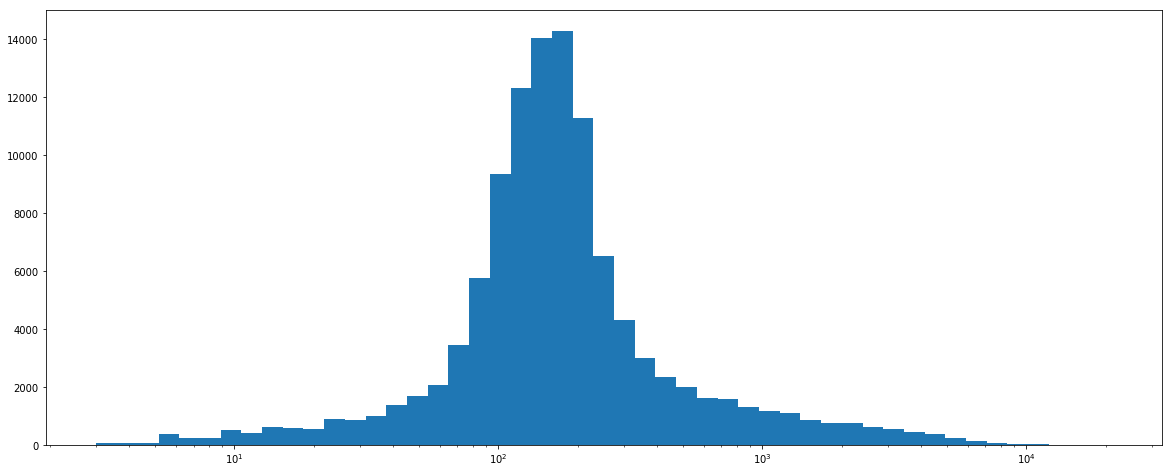

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
exon_lens = np.array(df['exon_len'])
plt.figure(figsize=(20,8))
plt.hist(exon_lens, bins=np.logspace(np.log10(exon_lens.min()),np.log10(exon_lens.max()), 50))
plt.gca().set_xscale("log")
plt.show()

In [14]:
print('number of exons:', len(l),'\nmin length of exons:', df['exon_len'].min(),'\nmax length of exons:', df['exon_len'].max())

number of exons: 112037 
min length of exons: 3 
max length of exons: 20961


get sites for different setting.
```
exon_min_lens = [50,100]
non_gap_ratios = [0.5,0.8]
import itertools
dc_gapfilter = {}
for non_gap_ratio in non_gap_ratios:
    dc_gapfilter[non_gap_ratio] = set(open('/home/xcao/w/20180905Junonia_coenia/20180919wholeGenomeTree/sitesKeep_rmGap_{non_gap_ratio}'.format(non_gap_ratio=non_gap_ratio)).read().split())

file_exons = '/home/xcao/w/20180905Junonia_coenia/20180919Info/sitesKeep_individual_exons'
l = open(file_exons).readlines()

for exon_min_len, non_gap_ratio in itertools.product(exon_min_lens, non_gap_ratios):
    fout = open('/home/xcao/w/20180905Junonia_coenia/20180919Info/sitesKeep_individual_exons.rmGAP{non_gap_ratio}.minlen{exon_min_len}'.format(exon_min_len=exon_min_len,non_gap_ratio=non_gap_ratio),'w')
    for e in l:
        es = e.split(':')
        exon_id = es[0]
        exons = [i for i in es[1].split() if i in dc_gapfilter[non_gap_ratio]]
        exon_len = len(exons)
        if exon_len >= exon_min_len:
            fout.write(exon_id+':'+' '.join(exons)+'\n')
    fout.close()
```
exons:  
* 83927:sitesKeep_individual_exons.rmGAP0.5.minlen50  
* 68550:sitesKeep_individual_exons.rmGAP0.5.minlen100  
* 34440:sitesKeep_individual_exons.rmGAP0.8.minlen50  
* 19262:sitesKeep_individual_exons.rmGAP0.8.minlen100  

#### get fasta sequences

run the linux scripts below

```
python3 /home/xcao/p/xiaolongTools/utils/getMultipleSequencesFromMapFilesInMultipleSites.py -i /home/xcao/w/20180905Junonia_coenia/20180919Info/20180919mapFileLocations.txt -b /home/xcao/w/20180905Junonia_coenia/20180919Info/sitesKeep_individual_exons.rmGAP0.5.minlen50 -o /home/xcao/w/20180905Junonia_coenia/20180925geneTree/sitesKeep_individual_exons.rmGAP0.5.minlen50 -t 32
 
python3 /home/xcao/p/xiaolongTools/utils/getMultipleSequencesFromMapFilesInMultipleSites.py -i /home/xcao/w/20180905Junonia_coenia/20180919Info/20180919mapFileLocations.txt -b /home/xcao/w/20180905Junonia_coenia/20180919Info/sitesKeep_individual_exons.rmGAP0.5.minlen100 -o /home/xcao/w/20180905Junonia_coenia/20180925geneTree/sitesKeep_individual_exons.rmGAP0.5.minlen100 -t 30

python3 /home/xcao/p/xiaolongTools/utils/getMultipleSequencesFromMapFilesInMultipleSites.py -i /home/xcao/w/20180905Junonia_coenia/20180919Info/20180919mapFileLocations.txt -b /home/xcao/w/20180905Junonia_coenia/20180919Info/sitesKeep_individual_exons.rmGAP0.8.minlen50 -o /home/xcao/w/20180905Junonia_coenia/20180925geneTree/sitesKeep_individual_exons.rmGAP0.5.minlen50 -t 32
 
python3 /home/xcao/p/xiaolongTools/utils/getMultipleSequencesFromMapFilesInMultipleSites.py -i /home/xcao/w/20180905Junonia_coenia/20180919Info/20180919mapFileLocations.txt -b /home/xcao/w/20180905Junonia_coenia/20180919Info/sitesKeep_individual_exons.rmGAP0.5.minlen100 -o /home/xcao/w/20180905Junonia_coenia/20180925geneTree/sitesKeep_individual_exons.rmGAP0.8.minlen100 -t 30

```

get exon sequences
```
python3 /home/xcao/p/xiaolongTools/utils/getMultipleSequencesFromMapFilesInMultipleSites.py -i /home/xcao/w/20180905Junonia_coenia/20180919Info/20180919mapFileLocations.txt -b /home/xcao/w/20180905Junonia_coenia/20180919Info/sitesKeep_individual_exons -o /home/xcao/w/20180905Junonia_coenia/20180925geneTree/sitesKeep_individual_exons -t 30
```

#### transfer the file to bioHPC

compress files

```
cp -r /home/xcao/w/20180905Junonia_coenia/20180925geneTree/sitesKeep_individual_exons.rmGAP0.8.minlen50/ /dev/shm/sitesKeep_individual_exons.rmGAP0.8.minlen50/ && tar cf - /dev/shm/sitesKeep_individual_exons.rmGAP0.8.minlen50/ |pigz >/home/xcao/w/20180905Junonia_coenia/20180925geneTree/sitesKeep_individual_exons.rmGAP0.8.minlen50.tar.gz && rm -rf /dev/shm/sitesKeep_individual_exons.rmGAP0.8.minlen50/ 
cp -r /home/xcao/w/20180905Junonia_coenia/20180925geneTree/sitesKeep_individual_exons.rmGAP0.8.minlen100/ /dev/shm/sitesKeep_individual_exons.rmGAP0.8.minlen100/ && tar cf - /dev/shm/sitesKeep_individual_exons.rmGAP0.8.minlen100/ |pigz >/home/xcao/w/20180905Junonia_coenia/20180925geneTree/sitesKeep_individual_exons.rmGAP0.8.minlen100.tar.gz && rm -rf /dev/shm/sitesKeep_individual_exons.rmGAP0.8.minlen100/ 
cp -r /home/xcao/w/20180905Junonia_coenia/20180925geneTree/sitesKeep_individual_exons.rmGAP0.5.minlen50/ /dev/shm/sitesKeep_individual_exons.rmGAP0.5.minlen50/ && tar cf - /dev/shm/sitesKeep_individual_exons.rmGAP0.5.minlen50/ |pigz >/home/xcao/w/20180905Junonia_coenia/20180925geneTree/sitesKeep_individual_exons.rmGAP0.5.minlen50.tar.gz && rm -rf /dev/shm/sitesKeep_individual_exons.rmGAP0.5.minlen50/ 
cp -r /home/xcao/w/20180905Junonia_coenia/20180925geneTree/sitesKeep_individual_exons.rmGAP0.5.minlen100/ /dev/shm/sitesKeep_individual_exons.rmGAP0.5.minlen100/ && tar cf - /dev/shm/sitesKeep_individual_exons.rmGAP0.5.minlen100/ |pigz >/home/xcao/w/20180905Junonia_coenia/20180925geneTree/sitesKeep_individual_exons.rmGAP0.5.minlen100.tar.gz && rm -rf /dev/shm/sitesKeep_individual_exons.rmGAP0.5.minlen100/ 

```

scp
```
scp /home/xcao/w/20180905Junonia_coenia/20180925geneTree/sitesKeep_individual_exons.rmGAP0.8.minlen100.tar.gz s185491@nucleus.biohpc.swmed.edu:/work/biophysics/s185491/2018junonia/geneTrees/
scp /home/xcao/w/20180905Junonia_coenia/20180925geneTree/sitesKeep_individual_exons.rmGAP0.8.minlen50.tar.gz s185491@nucleus.biohpc.swmed.edu:/work/biophysics/s185491/2018junonia/geneTrees/
scp /home/xcao/w/20180905Junonia_coenia/20180925geneTree/sitesKeep_individual_exons.rmGAP0.5.minlen100.tar.gz s185491@nucleus.biohpc.swmed.edu:/work/biophysics/s185491/2018junonia/geneTrees/
scp /home/xcao/w/20180905Junonia_coenia/20180925geneTree/sitesKeep_individual_exons.rmGAP0.5.minlen50.tar.gz s185491@nucleus.biohpc.swmed.edu:/work/biophysics/s185491/2018junonia/geneTrees/
```

#### run RAxML

Only focus on the two groups with milen50.

request a node to work interactively
`salloc -p 256GB -t 12:00:00 srun --pty $SHELL`

decompress the two target files
```
cd /work/biophysics/s185491/2018junonia/geneTrees
tar xzf sitesKeep_individual_exons.rmGAP0.5.minlen50.tar.gz
tar xzf sitesKeep_individual_exons.rmGAP0.8.minlen50.tar.gz
mv /work/biophysics/s185491/2018junonia/geneTrees/dev/shm/* ./
```

get a full file paths for all exon files.
```{python}
import glob
file_fas = glob.glob('/work/biophysics/s185491/2018junonia/geneTrees/sitesKeep_individual_exons.rmGAP*.minlen50/exon*')
print(len(file_fas))
open('/work/biophysics/s185491/2018junonia/geneTrees/20180927fastaFiles.minlen50','w').write('\n'.join(file_fas))
```
total number of alignments to run RAxML: 118367

scripts to run RAxML and keep the `RAxML_bestTree` files. Works for single input. Python file stored in `/home2/s185491/p/xiaolongTools/utils/runRAxMLForIndividualSmallFiles.py`
```
import os
import shutil
import sys

filename = sys.argv[1]

def runRAxMLForIndividualSmallFiles(filename):
    '''
    filename is the full path of a aligned fasta file
    output and save the best tree in a folder by adding '.RAxMLbestTree' to the folder name.
    filename = '/work/biophysics/s185491/2018junonia/geneTrees/sitesKeep_individual_exons.rmGAP0.5.minlen50/exon78368'
    bestTree is stored in '/work/biophysics/s185491/2018junonia/geneTrees/sitesKeep_individual_exons.rmGAP0.5.minlen50.RAxMLbestTree/exon78368'
    '''
    folder = os.path.dirname(filename)
    name = os.path.basename(filename)
    outfolder = folder + '.RAxMLbestTree/'
    if not os.path.exists(outfolder):
        os.makedirs(outfolder)
    
    workFolder = '/dev/shm/'+name
    if not os.path.exists(workFolder):
        os.makedirs(workFolder)
    os.chdir(workFolder)
    shutil.copy(filename,'./')
    commandline = '/home2/s185491/p/raxml/standard-RAxML-master/raxmlHPC -m GTRGAMMA -p 234 -s {name} -n {name}'.format(name=name)
    os.system(commandline)
    shutil.copy('RAxML_bestTree.' + name, outfolder + name)
    shutil.rmtree(workFolder)
    print('done for', name)

description = '''
    filename is the full path of a aligned fasta file
    output and save the best tree in a folder by adding '.RAxMLbestTree' to the folder name.
    filename = '/work/biophysics/s185491/2018junonia/geneTrees/sitesKeep_individual_exons.rmGAP0.5.minlen50/exon78368'
    bestTree is stored in '/work/biophysics/s185491/2018junonia/geneTrees/sitesKeep_individual_exons.rmGAP0.5.minlen50.RAxMLbestTree/exon78368'
    '''
if __name__ == '__main__':
    import argparse
    print(description)
    parser = argparse.ArgumentParser(description=description)
    parser.add_argument('-i','--input', help = 'input file storing the location of aligned fasta file', required=True)
    f = parser.parse_args()
    runRAxMLForIndividualSmallFiles(f.input)

```

test one:  
`python3 /home2/s185491/p/xiaolongTools/utils/runRAxMLForIndividualSmallFiles.py -i /work/biophysics/s185491/2018junonia/geneTrees/sitesKeep_individual_exons.rmGAP0.5.minlen50/exon78369`

totally 118367 jobs. Split them to 40 jobs. Generate 40 cmd files and 40 qsub files. (note: there is a limitation for BioHPC. only 16 nodes can be used at a single time point)
```
files = open('/work/biophysics/s185491/2018junonia/geneTrees/20180927fastaFiles.minlen50').read().split()
tasks = 40
outfolder = '/work/biophysics/s185491/2018junonia/geneTrees/20180927qsub_scripts/'
file_cmd_names = [outfolder+'RAxML.cmds'+str(i) for i in range(tasks)]
file_cmds = [open(f,'w') for f in file_cmd_names]
for n, file in enumerate(files):
    cmd = 'python3 /home2/s185491/p/xiaolongTools/utils/runRAxMLForIndividualSmallFiles.py -i '+file+'\n'
    file_cmds[n % tasks].write(cmd)

for e in file_cmds:
    e.close()

qsub_txt = '''#!/bin/bash
#SBATCH --job-name={jobname}
#SBATCH --partition=super
#SBATCH --nodes=1
#SBATCH --ntasks=32
#SBATCH --time=5-00:00:00
#SBATCH --output={jobname}.%j.out
#SBATCH --mail-user=xiaolong.cao@utsouthwestern.edu
#SBATCH --mail-type=ALL

/home2/s185491/p/anaconda3/anaconda520/bin/python3 /home2/s185491/p/xiaolongTools/multiThread.py 32 {file_cmd}


'''
for n in range(tasks):
    fout = open(outfolder+'qsub_RAxML.cmds'+str(n),'w')
    fout.write(qsub_txt.format(jobname = 'qsub_RAxML.cmds'+str(n), file_cmd = file_cmd_names[n]))
    fout.close()

    
```

#### run ASTRUL

split the trees from `sitesKeep_individual_exons.rmGAP0.5.minlen50.RAxMLbestTree.all` to 1000 parts
```
python /home/xcao/p/xiaolongTools/utils/splitFiles2Nparts.py -i /home/xcao/w/20180905Junonia_coenia/20180925geneTree/sitesKeep_individual_exons.rmGAP0.5.minlen50.RAxMLbestTree.all -N 1000 -o /home/xcao/w/20180905Junonia_coenia/20180925geneTree/sitesKeep_individual_exons.rmGAP0.5.minlen50.RAxMLbestTreeSplit1000
```
run Astral
```
txt = '''java -Xmx3000m -jar /home2/s185491/p/Astral/astral.5.6.2.jar -i /work/biophysics/s185491/2018junonia/geneTrees/sitesKeep_individual_exons.rmGAP0.8.minlen50.RAxMLbestTree.split/sitesKeep_individual_exons.rmGAP0.8.minlen50.RAxMLbestTree.all.split{n} -o /work/biophysics/s185491/2018junonia/geneTrees/sitesKeep_individual_exons.rmGAP0.8.minlen50.RAxMLbestTree.split/sitesKeep_individual_exons.rmGAP0.8.minlen50.RAxMLbestTree.all.split{n}.sum
'''
fout = open('/work/biophysics/s185491/2018junonia/geneTrees/sitesKeep_individual_exons.rmGAP0.8.minlen50.RAxMLbestTree.split.cmd','w')
for n in range(500):
    fout.write(txt.format(n=n))
fout.close()
```

```

```

## STRUCTURE

### first look at the result and test with some previous scripts

#### get input from aligned fasta files

```
cd /home/xcao/w/20180905Junonia_coenia/20180928STRUCTURE/
python3 /home/xcao/p/xiaolongTools/WenlinTools.Python3/scripts/fasta2STRUCTUREinput.py /home/xcao/w/20180905Junonia_coenia/20180919wholeGenomeTree/junonia_whole_genome_0_filter_CDS_noZ_rmGap0.85.fa

cd /home/xcao/w/20180905Junonia_coenia/20180928STRUCTURE/
python3 /home/xcao/p/xiaolongTools/WenlinTools.Python3/scripts/fasta2STRUCTUREinput.py /home/xcao/w/20180905Junonia_coenia/20180919wholeGenomeTree/junonia_whole_genome_0_rmGap_0.9.fa 

cd /home/xcao/w/20180905Junonia_coenia/20180928STRUCTURE/
python3 /home/xcao/p/xiaolongTools/WenlinTools.Python3/scripts/fasta2STRUCTUREinput.py /home/xcao/w/20180905Junonia_coenia/20180913Zchromsome/20180913junonia_z_all_rmGap_0.8.fasta
```

many of Wenlin's code go work with both strand of samples. e.g. Sample '5999', the sequence should include 5999_1 and 5999_2. That's why I cannot use some of the code directly, because I only have single stranded sequence.

### 20181017 structure with CDS, z, and whole genome

modified the `/home/xcao/p/xiaolongTools/utils/fasta2STRUCTUREinput_haploid_nt.py` file to work with haploid.

#### convert files to structure input

default Ncut=4, gapcut=0.8
```
python /home/xcao/p/xiaolongTools/utils/fasta2STRUCTUREinput_haploid_nt.py -i /home/xcao/w/20180905Junonia_coenia/20181010Trees/20181010junoniaSeq_CDS
python /home/xcao/p/xiaolongTools/utils/fasta2STRUCTUREinput_haploid_nt.py -i /home/xcao/w/20180905Junonia_coenia/20181010Trees/20181010junoniaSeq_whole_max30Gap
python /home/xcao/p/xiaolongTools/utils/fasta2STRUCTUREinput_haploid_nt.py -i /home/xcao/w/20180905Junonia_coenia/20181010Trees/20181010junoniaSeq_z
```
numbers of snps that can be used by STRUCTURE
* CDS: 1687546 (total bases 22515575, ratio 0.075)
* whole_max30Gap: 10325979  (total bases 57707714, ratio 0.179)
* z: 702392 (total bases 19003383, ratio 0.037)

#### extract from strucure input and further filter


the four key species, the sample count is
```
Junonia coenia coenia:20
Junonia nigrosuffusa:20
Junonia coenia grisea:16
Junonia nigrosuffusaTX:9
```
and `Junonia MEXICANspecies:31`  
filter with `Filter_7USA Filter4groups_withMX Filter_4groups`, with the second SNP greater than 9, gapcut 0.9

```
import pandas as pd
import numpy as np
from collections import Counter
import os

def filter_eachPosition(x, gapcut = 0.9, second_snp_min = 9):
    basecount = Counter(x)
    totalcount = len(x)
    if basecount[-9] <= totalcount * (1-gapcut):
        basecount_sort = basecount.most_common()
        basecount_sort = [e for e in basecount_sort if e[0]!= -9]
        if len(basecount_sort) > 1:
            if basecount_sort[1][1]>second_snp_min:
                return True
    return False

outfolder = '/home/xcao/w/20180905Junonia_coenia/20181010Trees/20181017STRUCTURE/'
file_summary = '/home/xcao/w/20180905Junonia_coenia/20180919Info/20181003Junonia-all-sample-summary.xlsx'
df_summary = pd.read_excel(file_summary,sheet_name='all')
df_summary['Number'] = df_summary['Number'].astype(str)
sample_prefix = [e.split('-')[-1] for e in df_summary['Number']]
df_summary['Number'] = sample_prefix
print('unique sample prefix', len(set(df_summary['Number'])))
df_summary = df_summary[df_summary['permanet_remove'] == 0]
print('samples in use', len(set(df_summary['Number'])))

filter_columns = 'Filter_7USA Filter4groups_withMX Filter_4groups'.split()
files_STRUCTUREinput = '''/home/xcao/w/20180905Junonia_coenia/20181010Trees/20181010junoniaSeq_CDS.STRUCTURE
/home/xcao/w/20180905Junonia_coenia/20181010Trees/20181010junoniaSeq_whole_max30Gap.STRUCTURE
/home/xcao/w/20180905Junonia_coenia/20181010Trees/20181010junoniaSeq_z.STRUCTURE
'''.split()

#sample_keep = list(df_summary[df_summary[filter_columns[0]] != 0]['Number'])
#df_STRUCTURE = pd.read_csv(files_STRUCTUREinput[0],sep='\t',index_col=0,header=None,low_memory=False)
#df_STRUCTURE = df_STRUCTURE.astype(np.int8)
#df_STRUCTURE_keep = df_STRUCTURE.loc[sample_keep]
#df_STRUCTURE_keep_filter = df_STRUCTURE_keep.loc[:,df_STRUCTURE_keep.apply(filter_eachPosition,axis=0)]
#outname = os.path.join(outfolder,os.path.basename('.'.join([files_STRUCTUREinput[0],filter_columns[0]])))
#df_STRUCTURE_keep_filter.to_csv(outname,sep='\t',header=None)


for f_STRUCTUREinput in files_STRUCTUREinput:
    df_STRUCTURE = pd.read_csv(f_STRUCTUREinput,sep='\t',index_col=0,header=None,low_memory=False)
    df_STRUCTURE = df_STRUCTURE.astype(np.int8)
    for f_column in filter_columns:
        sample_keep = list(df_summary[df_summary[f_column] != 0]['Number'])
        df_STRUCTURE_keep = df_STRUCTURE.loc[sample_keep]
        print('wroking on', f_STRUCTUREinput, f_column)
        df_STRUCTURE_keep_filter =      df_STRUCTURE_keep.loc[:,df_STRUCTURE_keep.apply(filter_eachPosition,axis=0)]
        outname = os.path.join(outfolder,os.path.basename('.'.join([f_STRUCTUREinput,f_column])))
        df_STRUCTURE_keep_filter.to_csv(outname,sep='\t',header=None)


```

#### run STRUCTURE
```
import os


folder = '/home/xcao/w/20180905Junonia_coenia/20181010Trees/20181017STRUCTURE/test'
filename = '/home/xcao/w/20180905Junonia_coenia/20181010Trees/20181017STRUCTURE/test/test.STRUCTURE'
file_para = '/home/xcao/w/20180905Junonia_coenia/20181010Trees/20181017STRUCTURE/mainparams.ref'
out_para = os.path.join(folder,'mainparams')

num_population = 2
num_burnin = 10000
num_numreps = 20000
infile = filename
outfile = filename+'.result'
num_individuals = 0
num_loci = 0
num_ploidy = 1


with open(filename) as f:
    fout = open(filename+'.1','w')
    for e in f:
        e1,e2 = e.split('\t',1)
        fout.write('\t'.join([e1,'1',e2]))
    fout.close()


mainparams = open(file_para).read()
open(out_para,'w').write(mainparams.format(num_population=num_population, num_burnin=num_burnin, num_numreps=num_numreps, infile=infile, outfile=outfile, num_individuals=num_individuals, num_loci=num_loci, num_ploidy=num_ploidy))
```

split the large files to small ones and run

```
cd /work/biophysics/s185491/2018junonia/20181018STRUCTURE
python /home2/s185491/p/xiaolongTools/utils/splitSTRUCTUREinput2NPartsContinuingEqualStepOrRandom.py -i /work/biophysics/s185491/2018junonia/20181018STRUCTURE/20181010junoniaSeq_CDS.STRUCTURE.Filter_7USA -N 3 -m 1
```

```
import os

#folder = '/home/xcao/w/20180905Junonia_coenia/20181010Trees/20181017STRUCTURE/'
folder = '/work/biophysics/s185491/2018junonia/20181018STRUCTURE'

files_STRUCTURE = '''20181010junoniaSeq_whole_max30Gap.STRUCTURE.Filter_4groups.split3.0
20181010junoniaSeq_whole_max30Gap.STRUCTURE.Filter_4groups.split3.1
20181010junoniaSeq_whole_max30Gap.STRUCTURE.Filter_4groups.split3.2
20181010junoniaSeq_whole_max30Gap.STRUCTURE.Filter_7USA.split12.0
20181010junoniaSeq_whole_max30Gap.STRUCTURE.Filter_7USA.split12.1
20181010junoniaSeq_whole_max30Gap.STRUCTURE.Filter_7USA.split12.2
20181010junoniaSeq_whole_max30Gap.STRUCTURE.Filter_7USA.split12.3
20181010junoniaSeq_whole_max30Gap.STRUCTURE.Filter_7USA.split12.4
20181010junoniaSeq_whole_max30Gap.STRUCTURE.Filter_7USA.split12.5
20181010junoniaSeq_whole_max30Gap.STRUCTURE.Filter_7USA.split12.6
20181010junoniaSeq_whole_max30Gap.STRUCTURE.Filter_7USA.split12.7
20181010junoniaSeq_whole_max30Gap.STRUCTURE.Filter_7USA.split12.8
20181010junoniaSeq_whole_max30Gap.STRUCTURE.Filter_7USA.split12.9
20181010junoniaSeq_whole_max30Gap.STRUCTURE.Filter_7USA.split12.10
20181010junoniaSeq_whole_max30Gap.STRUCTURE.Filter_7USA.split12.11
20181010junoniaSeq_whole_max30Gap.STRUCTURE.Filter4groups_withMX.split6.0
20181010junoniaSeq_whole_max30Gap.STRUCTURE.Filter4groups_withMX.split6.1
20181010junoniaSeq_whole_max30Gap.STRUCTURE.Filter4groups_withMX.split6.2
20181010junoniaSeq_whole_max30Gap.STRUCTURE.Filter4groups_withMX.split6.3
20181010junoniaSeq_whole_max30Gap.STRUCTURE.Filter4groups_withMX.split6.4
20181010junoniaSeq_whole_max30Gap.STRUCTURE.Filter4groups_withMX.split6.5
20181010junoniaSeq_CDS.STRUCTURE.Filter_7USA.split3.0
20181010junoniaSeq_CDS.STRUCTURE.Filter_7USA.split3.1
20181010junoniaSeq_CDS.STRUCTURE.Filter_7USA.split3.2
'''.split()

filename = 'test.STRUCTURE'
file_para = os.path.join(folder,'mainparams.ref')
file_paraExtra = os.path.join(folder,'extraparams.ref')
#STRUCTURE = '/home/xcao/p/STRUCTURE/structure_kernel_src6/structure'
STRUCTURE = '/home2/s185491/p/STRUCTURE/structure_kernel_src/structure'

num_population = 2
num_burnin = 10000
num_numreps = 20000
infile = filename
outfile = filename+'.result'
num_individuals = 0
num_loci = 0
num_ploidy = 1

scripts = open(os.path.join(folder,'20181019scripts.txt'),'w')
for filename in files_STRUCTURE:
    workfolder = os.path.join(folder,filename+'.run')
    if not os.path.exists(workfolder):
        os.makedirs(workfolder)
    mainparams = open(file_para).read()
    num_individuals = 0
    num_loci = 0
    for line in open(os.path.join(folder,filename)):
        num_individuals += 1
    num_loci = line.count('\t')
    print(filename,'samples',num_individuals,'loci',num_loci)
    for num_population in range(2,9):
        for seed in [1000]:
            outfile = os.path.join(workfolder,filename+'.pop'+str(num_population)+'.seed'+str(seed))
            out_para = os.path.join(workfolder,'mainparams.pop'+str(num_population)+'.seed'+str(seed))
            open(out_para,'w').write(mainparams.format(num_population=num_population, num_burnin=num_burnin, num_numreps=num_numreps, infile=os.path.join(folder, filename), outfile=outfile, num_individuals=num_individuals, num_loci=num_loci, num_ploidy=num_ploidy))
            scripts.write('nohup {STRUCTURE} -e {file_paraExtra} -m {out_para} -D {seed} &\n'.format(workfolder=workfolder, STRUCTURE=STRUCTURE, file_paraExtra=file_paraExtra, out_para=out_para,seed=seed))
#    break
scripts.close()


```

if the file path is too long, STRUCTURE will run into problems. The 20181010junoniaSeq_whole_max30Gap.STRUCTURE.Filter4groups_withMX.split were re-runned, and changed to w30G.F40

#### collect data

```
import glob
import os

folder = '/work/biophysics/s185491/2018junonia/20181018STRUCTURE/'
files = glob.glob(folder+'*/*_f')
files_name = [os.path.basename(f) for f in files]

outfolder = '/work/biophysics/s185491/2018junonia/20181018STRUCTURE/20181025result/'
for f in files:
    commandline = 'python3 /home2/s185491/p/xiaolongTools/utils/extractStructureTableFromCommandlineOutput.py -i {filein} -o {fileout}'.format(filein = f, fileout = os.path.join(outfolder, os.path.basename(f)))
    os.system(commandline)

#group them to three folders manually: 4groups, 4groups_withMX, 7USA
#generate a tsv file with discription of files manually. copy the result from bioHPC to alea
```

#### plot

```
library(readxl)
library(tidyr)
library(dplyr)
library(ggplot2)
library(gridExtra)

filename <- '/home/xcao/w/20180905Junonia_coenia/20181010Trees/20181017STRUCTURE/20181025result/files.txt'
xdf_files = read.csv(filename,header = TRUE,sep='\t',stringsAsFactors = FALSE)
xdf_files <- xdf_files[order(xdf_files$Filter,xdf_files$baseType,xdf_files$population,xdf_files$splitParts,xdf_files$splitID,xdf_files$seed),]
#xdf_filegroup <- split(xdf_files, list(xdf_files$Filter, xdf_files$baseType))
#"4goupMX" "4group"  "7USA"   
# "CDS"   "whole" "z"

filename2 <- '/home/xcao/w/20180905Junonia_coenia/20180919Info/20181003Junonia-all-sample-summary.xlsx'
xdf_info <- read_excel(filename2,sheet = 'all')
v_id2Treename <- xdf_info$Treename
names(v_id2Treename) <- sapply(xdf_info$ID, function(x)substring(x,2))
v_id2species <- xdf_info$Species
names(v_id2species) <- sapply(xdf_info$ID, function(x)substring(x,2))


F.renameHead <- function(x){
  x[1] = 'sample'
  x[2:length(x)] = paste0('pop',1:(length(x)-1))
  return(x)
}

F.plotOneline <- function(file,xtext = FALSE){
  xdf_s <- read.csv(file$filename,header = FALSE,sep = '\t', stringsAsFactors = FALSE)
  colnames(xdf_s) <- F.renameHead(colnames(xdf_s))
  xdf_s$species <- v_id2species[xdf_s$sample]
  xdf_s$treename <- v_id2Treename[xdf_s$sample]
  xdf_s.clear <- gather(xdf_s,key = 'pop',value = 'fraction',-sample,-species,-treename)
  xdf_s.clear <- xdf_s.clear[order(xdf_s.clear$species,xdf_s.clear$pop,-xdf_s.clear$fraction),]
  
  p <- ggplot(xdf_s.clear,aes(x=treename,y=fraction,fill=pop)) + geom_bar(stat = 'identity') + ylab(paste0(file$Filter,'_s',file$seed,'_',file$baseType,'_K=',file$population," ",file$splitParts,'_',file$splitID))
  if (xtext) p <- p + theme(legend.position="none", axis.text.x= element_text(angle = 90, hjust = 1), axis.title.x = element_blank())
  else p <- p <- p + theme(legend.position="none", axis.text.x= element_blank(), axis.title.x = element_blank())
  return(p)
}


F.plotMultipleLines <- function(filelines){
  p <- list()
  for (i in 1:nrow(filelines)){
    p[[i]] <- F.plotOneline(filelines[i,])
  }
  #p[[i+1]] <- F.plotOneline(filelines[i+1,], xtext = TRUE)
  return(grid.arrange(grobs=p,ncol=1))
}

filelines = xdf_files[xdf_files$Filter == '4group' & xdf_files$baseType == 'CDS' & xdf_files$population<5,]
F.plotMultipleLines(filelines)
filelines = xdf_files[xdf_files$Filter == '4group' & xdf_files$baseType == 'z' & xdf_files$population<5,]
F.plotMultipleLines(filelines)
filelines = xdf_files[xdf_files$Filter == '4group' & xdf_files$baseType == 'whole' & xdf_files$population<5,]
F.plotMultipleLines(filelines)

filelines = xdf_files[xdf_files$Filter == '4goupMX' & xdf_files$baseType == 'CDS' & xdf_files$population<8,]
F.plotMultipleLines(filelines)
filelines = xdf_files[xdf_files$Filter == '4goupMX' & xdf_files$baseType == 'z' & xdf_files$population<8,]
F.plotMultipleLines(filelines)
filelines = xdf_files[xdf_files$Filter == '4goupMX' & xdf_files$baseType == 'whole' & xdf_files$population<8,]
F.plotMultipleLines(filelines)

filelines = xdf_files[xdf_files$Filter == '7USA' & xdf_files$baseType == 'CDS' & xdf_files$population<8,]
F.plotMultipleLines(filelines)
filelines = xdf_files[xdf_files$Filter == '7USA' & xdf_files$baseType == 'z' & xdf_files$population<8,]
F.plotMultipleLines(filelines)
filelines = xdf_files[xdf_files$Filter == '7USA' & xdf_files$baseType == 'whole' & xdf_files$population<8,]
F.plotMultipleLines(filelines)

file <- xdf_files[1,]
xdf_s <- read.csv(file$filename,header = FALSE,sep = '\t', stringsAsFactors = FALSE)
colnames(xdf_s) <- F.renameHead(colnames(xdf_s))
xdf_s$species <- v_id2species[xdf_s$sample]
xdf_s$treename <- v_id2Treename[xdf_s$sample]
xdf_s.clear <- gather(xdf_s,key = 'pop',value = 'fraction',-sample,-species,-treename)
xdf_s.clear <- xdf_s.clear[order(xdf_s.clear$species,xdf_s.clear$pop,-xdf_s.clear$fraction),]

ggplot(xdf_s.clear,aes(x=treename,y=fraction,fill=pop)) + geom_bar(stat = 'identity')+ theme(legend.position="none", axis.text.x=element_blank(),axis.title.x = element_blank()) + ylab(paste0(file$Filter,'_s',file$seed,'_',file$baseType,'_K=',file$population," ",file$splitParts,'_',file$splitID))

```

### run structure 7 USA 9 samples per group

#### select best samples
```
import pandas as pd

file_summary = '/home/xcao/w/20180905Junonia_coenia/20180919Info/20181003Junonia-all-sample-summary.xlsx'
df_summary = pd.read_excel(file_summary,sheet_name='all',dtype=str)
df_summary['Number'] = df_summary['Number'].apply(lambda x:x.split('-')[-1])
df_use = df_summary[df_summary['short_names'] != 'nan'].loc[:,['Number','short_names','genome_coverage']]
df_use['genome_coverage'] = df_use['genome_coverage'].astype(float)
df_use = df_use.sort_values(by = ['short_names','genome_coverage'], ascending=[True,False])
species = list(df_use['short_names'].unique())
df_use = df_use.reset_index()
df_use.loc[0,'speciesID'] = 1
for i in range(df_use.shape[0]-1):
    if df_use.loc[i+1, 'short_names'] == df_use.loc[i, 'short_names']:
        df_use.loc[i+1,'speciesID'] = df_use.loc[i,'speciesID'] + 1
    else:
        df_use.loc[i+1,'speciesID'] = 1
df_use_keep = df_use[df_use['speciesID']<=9]
df_use_keep.to_csv('/home/xcao/w/20180905Junonia_coenia/20181010Trees/20181030STRUCTURE7USA/species', columns=['Number','short_names'], header=None, sep='\t', index=None)
```

#### extract sequences

bioHPC
```
import pandas as pd
import os

filename = '/work/biophysics/s185491/2018junonia/20181030STRUCTURE7USA/species'
df = pd.read_csv(filename,sep='\t',header=None)
samples = set(df[0])

file_structures = '''/work/biophysics/s185491/2018junonia/20181018STRUCTURE/20181010junoniaSeq_CDS.STRUCTURE.Filter_7USA
/work/biophysics/s185491/2018junonia/20181018STRUCTURE/20181010junoniaSeq_whole_max30Gap.STRUCTURE.Filter_7USA
/work/biophysics/s185491/2018junonia/20181018STRUCTURE/20181010junoniaSeq_z.STRUCTURE.Filter_7USA
'''.split()
outfoler = '/work/biophysics/s185491/2018junonia/20181030STRUCTURE7USA/'

for f in file_structures:
    outfile = os.path.join(outfoler,os.path.basename(f).split('Seq_')[1])
    fout = open(outfile,'w')
    for line in open(f):
        if line.split('\t',maxsplit=1)[0] in samples:
            fout.write(line)
    fout.close()
```

#### run structure

split whole_max30Gap to 6 parts

```
import os
files_STRUCTURE = '''/work/biophysics/s185491/2018junonia/20181030STRUCTURE7USA/CDS.STRUCTURE.Filter_7USA
/work/biophysics/s185491/2018junonia/20181030STRUCTURE7USA/whole_max30Gap.STRUCTURE.Filter_7USA.split6.0
/work/biophysics/s185491/2018junonia/20181030STRUCTURE7USA/whole_max30Gap.STRUCTURE.Filter_7USA.split6.1
/work/biophysics/s185491/2018junonia/20181030STRUCTURE7USA/whole_max30Gap.STRUCTURE.Filter_7USA.split6.2
/work/biophysics/s185491/2018junonia/20181030STRUCTURE7USA/whole_max30Gap.STRUCTURE.Filter_7USA.split6.3
/work/biophysics/s185491/2018junonia/20181030STRUCTURE7USA/whole_max30Gap.STRUCTURE.Filter_7USA.split6.4
/work/biophysics/s185491/2018junonia/20181030STRUCTURE7USA/whole_max30Gap.STRUCTURE.Filter_7USA.split6.5
/work/biophysics/s185491/2018junonia/20181030STRUCTURE7USA/z.STRUCTURE.Filter_7USA
'''.split()

folder = '/work/biophysics/s185491/2018junonia/20181018STRUCTURE'
filename = 'test.STRUCTURE'
file_para = os.path.join(folder,'mainparams.ref')
file_paraExtra = os.path.join(folder,'extraparams.ref')
STRUCTURE = '/home2/s185491/p/STRUCTURE/structure_kernel_src/structure'

num_population = 2
num_burnin = 10000
num_numreps = 20000
infile = filename
outfile = filename+'.result'
num_individuals = 0
num_loci = 0
num_ploidy = 1

folder = '/work/biophysics/s185491/2018junonia/20181030STRUCTURE7USA'
scripts = open(os.path.join(folder,'20181030scripts.txt'),'w')
for filename in files_STRUCTURE:
    workfolder = os.path.join(folder,filename+'.run')
    if not os.path.exists(workfolder):
        os.makedirs(workfolder)
    mainparams = open(file_para).read()
    num_individuals = 0
    num_loci = 0
    for line in open(os.path.join(folder,filename)):
        num_individuals += 1
    num_loci = line.count('\t')
    print(filename,'samples',num_individuals,'loci',num_loci)
    for num_population in range(2,9):
        if 'split' in filename:
            seeds = [1000]
        else:
            seeds = [1000,3000,5000]
        for seed in seeds:
            outfile = os.path.join(workfolder,filename+'.pop'+str(num_population)+'.seed'+str(seed))
            out_para = os.path.join(workfolder,'mainparams.pop'+str(num_population)+'.seed'+str(seed))
            open(out_para,'w').write(mainparams.format(num_population=num_population, num_burnin=num_burnin, num_numreps=num_numreps, infile=os.path.join(folder, filename), outfile=outfile, num_individuals=num_individuals, num_loci=num_loci, num_ploidy=num_ploidy))
            scripts.write('nohup {STRUCTURE} -e {file_paraExtra} -m {out_para} -D {seed} &\n'.format(workfolder=workfolder, STRUCTURE=STRUCTURE, file_paraExtra=file_paraExtra, out_para=out_para,seed=seed))
#    break
scripts.close()
```

#### collect data
```
import glob
import os

folder = '/work/biophysics/s185491/2018junonia/20181030STRUCTURE7USA/'
files = glob.glob(folder+'**/*_f', recursive=True)
files_name = [os.path.basename(f) for f in files]

outfolder = '/work/biophysics/s185491/2018junonia/20181030STRUCTURE7USA/20181104result/'
for f in files:
    commandline = 'python3 /home2/s185491/p/xiaolongTools/utils/extractStructureTableFromCommandlineOutput.py -i {filein} -o {fileout}'.format(filein = f, fileout = os.path.join(outfolder, os.path.basename(f)))
    os.system(commandline)
```

#### plot with R

### run structure 9 species 80 samples

add J_Mexican and wMex species
#### get input for STRUCTURE
```
import pandas as pd
import numpy as np
from collections import Counter
import os

def filter_eachPosition(x, gapcut = 0.5, second_snp_min = 5):
    basecount = Counter(x)
    totalcount = len(x)
    if basecount[-9] <= totalcount * (1-gapcut):
        basecount_sort = basecount.most_common()
        basecount_sort = [e for e in basecount_sort if e[0]!= -9]
        if len(basecount_sort) > 1:
            if basecount_sort[1][1]>second_snp_min:
                return True
    return False

outfolder = '/work/biophysics/s185491/2018junonia/20181119STRUCTURE9Species/'
filename = '/work/biophysics/s185491/2018junonia/20181119STRUCTURE9Species/species'
df = pd.read_csv(filename,sep='\t',header=None)
samples = list(df[0])

files_STRUCTUREinput = '''/work/biophysics/s185491/2018junonia/20181119STRUCTURE9Species/20181010junoniaSeq_CDS.STRUCTURE
/work/biophysics/s185491/2018junonia/20181119STRUCTURE9Species/20181010junoniaSeq_whole_max30Gap.STRUCTURE
/work/biophysics/s185491/2018junonia/20181119STRUCTURE9Species/20181010junoniaSeq_z.STRUCTURE
'''.split()

for f_STRUCTUREinput in files_STRUCTUREinput:
    df_STRUCTURE = pd.read_csv(f_STRUCTUREinput,sep='\t',index_col=0,header=None,low_memory=False)
    df_STRUCTURE = df_STRUCTURE.astype(np.int8)
    df_STRUCTURE_keep = df_STRUCTURE.loc[samples]
    df_STRUCTURE_keep_filter =      df_STRUCTURE_keep.loc[:,df_STRUCTURE_keep.apply(filter_eachPosition,axis=0)]
    outname = os.path.join(outfolder,os.path.basename(f_STRUCTUREinput).split('Seq_')[1]+'9')
    df_STRUCTURE_keep_filter.to_csv(outname,sep='\t',header=None)
```

#### run structure

split file. remove .STRUCTURE in filename.
```
cd /work/biophysics/s185491/2018junonia/20181119STRUCTURE9Species
python /home2/s185491/p/xiaolongTools/utils/splitSTRUCTUREinput2NPartsContinuingEqualStepOrRandom.py -i /work/biophysics/s185491/2018junonia/20181119STRUCTURE9Species/whole_max30Gap9 -N 6 -m 1

```

run (6 seeds now, may run up to 7 days.)
```
import os
files_STRUCTURE = '''/work/biophysics/s185491/2018junonia/20181119STRUCTURE9Species/CDS9
/work/biophysics/s185491/2018junonia/20181119STRUCTURE9Species/whole_max30Gap9.split6.0
/work/biophysics/s185491/2018junonia/20181119STRUCTURE9Species/whole_max30Gap9.split6.1
/work/biophysics/s185491/2018junonia/20181119STRUCTURE9Species/whole_max30Gap9.split6.2
/work/biophysics/s185491/2018junonia/20181119STRUCTURE9Species/whole_max30Gap9.split6.3
/work/biophysics/s185491/2018junonia/20181119STRUCTURE9Species/whole_max30Gap9.split6.4
/work/biophysics/s185491/2018junonia/20181119STRUCTURE9Species/whole_max30Gap9.split6.5
/work/biophysics/s185491/2018junonia/20181119STRUCTURE9Species/z9
'''.split()

folder = '/work/biophysics/s185491/2018junonia/20181018STRUCTURE'
file_para = os.path.join(folder,'mainparams.ref')
file_paraExtra = os.path.join(folder,'extraparams.ref')

folder = '/work/biophysics/s185491/2018junonia/20181119STRUCTURE9Species'
scripts = open(os.path.join(folder,'20181120scripts.txt'),'w')
STRUCTURE = '/home2/s185491/p/STRUCTURE/structure_kernel_src/structure'
num_population = 2
num_burnin = 10000
num_numreps = 20000
num_individuals = 0
num_loci = 0
num_ploidy = 1

for filename in files_STRUCTURE:
    workfolder = os.path.join(folder,filename+'.run')
    if not os.path.exists(workfolder):
        os.makedirs(workfolder)
    mainparams = open(file_para).read()
    num_individuals = 0
    num_loci = 0
    for line in open(os.path.join(folder,filename)):
        num_individuals += 1
    num_loci = line.count('\t')
    print(filename,'samples',num_individuals,'loci',num_loci)
    for num_population in range(2,9):
        if 'split' in filename:
            seeds = [1000]
        else:
            seeds = [1000,3000,5000,7000,9000,11000]
        for seed in seeds:
            outfile = filename+'.pop'+str(num_population)+'.seed'+str(seed)
            out_para = os.path.join(workfolder,'mainparams.pop'+str(num_population)+'.seed'+str(seed))
            open(out_para,'w').write(mainparams.format(num_population=num_population, num_burnin=num_burnin, num_numreps=num_numreps, infile=os.path.join(folder, filename), outfile=outfile, num_individuals=num_individuals, num_loci=num_loci, num_ploidy=num_ploidy))
            scripts.write('nohup {STRUCTURE} -e {file_paraExtra} -m {out_para} -D {seed} &\n'.format(workfolder=workfolder, STRUCTURE=STRUCTURE, file_paraExtra=file_paraExtra, out_para=out_para,seed=seed))
#    break
scripts.close()
```

## ML Tree

### Test split to 100 parts and run RAxML

In bioHPC, `python /home2/s185491/p/xiaolongTools/utils/splitFastaAlignments2NContinueingParts.py -i /work/biophysics/s185491/2018junonia/alignments/junonia_whole_genome_0_rmGap_0.85.fa -o /work/biophysics/s185491/2018junonia/alignments/junonia_whole_genome_0_rmGap_0.85.split100
`, split to 100 parts

generate qsub jobs for 100 files.

```
qsub_txt = '''#!/bin/bash
#SBATCH --job-name={file_id}
#SBATCH --partition=32GB
#SBATCH --nodes=1
#SBATCH --ntasks=32
#SBATCH --time=5-00:00:00
#SBATCH --output={file_id}.%j.out
#SBATCH --mail-user=xiaolong.cao@utsouthwestern.edu
#SBATCH --mail-type=ALL

/home2/s185491/p/anaconda3/anaconda520/bin/python3 /home2/s185491/p/xiaolongTools/utils/runRAxMLForIndividualSmallFiles.py -i /work/biophysics/s185491/2018junonia/alignments/junonia_whole_genome_0_rmGap_0.85.split100/junonia_whole_genome_0_rmGap_0.85.fa.split100.{file_id} -T 32

'''
for n in range(100):
    fout = open('/work/biophysics/s185491/2018junonia/alignments/junonia_whole_genome_0_rmGap_0.85.split100.jobs/'+str(n),'w')
    fout.write(qsub_txt.format(file_id=n))
    fout.close()
```



### 263 high quality samples whole Genome, CDS, z-chromosmoe Trees, 100 parts

263 high quality samples. or sites info will be ordered according to the chromosome match with Heliconius   
For genome Tree, only keep sites with less or equal to 30 gaps, which is equal to 9.85% (57,707,714bp) of the genome size.  
For CDS Tree, all sites will be kept, which will be 3.84% (22,515,575) of the genome size
For z-chromosome Trees, still use the scaffolds that agrees with 3 species, which is 3.24% (19,003,382) of the genome size  

#### get sites

```
import numpy as np
import pickle


file_gapCounts = '/home/xcao/w/20180905Junonia_coenia/20180919Info/20181010mapFile263.GapCounts.npInt16'
file_match2Heliconius = '/home/xcao/w/genomes/Junonia_coenia/20181005JunoniaPositionHeliconiusChrOrder.txt'
file_CDS_sites = '/home/xcao/w/20180905Junonia_coenia/20180919Info/sitesKeep_CDS'
file_z_scaffolds = '/home/xcao/w/20180905Junonia_coenia/20180913junonia_scaffolds_z_by_3species'
out_wholeGenome_max30Gap = '/home/xcao/w/20180905Junonia_coenia/20181010Trees/sitesKeep_ordered_whole_max30Gap'
out_CDS_sites = '/home/xcao/w/20180905Junonia_coenia/20181010Trees/sitesKeep_ordered_CDS'
out_z_sites = '/home/xcao/w/20180905Junonia_coenia/20181010Trees/sitesKeep_ordered_z'

def iterateJunoniaMatch2Helicounius(filename):
    '''
    given the 20181005JunoniaPositionHeliconiusChrOrder
    yield the chromosome_id, scaffold_id and base position each time
    the file is like:
    '1:(000635F:558391428,558537911);(000793F:575740860,575815531);...'
    return 1,000635F,558391428
    '''
    l = open(filename).readlines()
    l_chr = []
    dc_chr = {}
    dc_scf = {}
    
    for line in l:
        chr_id, scfs_info = line.strip().split(':',1)
        l_chr.append(chr_id)
        dc_chr[chr_id] = []
        for scf_info in scfs_info.strip(';').split(';'):
            scf_id, start_end = scf_info[1:-1].split(':')
            dc_chr[chr_id].append(scf_id)
            start,end = start_end.split(',')
            start = int(start)
            end = int(end)
            dc_scf[scf_id] =(start,end)
    
    for chr_id in l_chr:
        for scf_id in dc_chr[chr_id]:
            start, end = dc_scf[scf_id]
            for location in range(start,end):
                yield chr_id, scf_id, location
        

with open(file_gapCounts,'rb') as f:
    gapCounts = pickle.load(f)

sites_max30Gap = np.where(gapCounts <= 30)[0]
sites_max30Gap = set(sites_max30Gap)

fout = open(out_wholeGenome_max30Gap,'w')
for location in iterateJunoniaMatch2Helicounius(file_match2Heliconius):
    if location[2] in sites_max30Gap:
        fout.write(str(location[2])+'\n')
fout.close()

sites_CDS = open(file_CDS_sites).read().split()
sites_CDS = [int(e) for e in sites_CDS]
sites_CDS = set(sites_CDS)
fout = open(out_CDS_sites,'w')
for location in iterateJunoniaMatch2Helicounius(file_match2Heliconius):
    if location[2] in sites_CDS:
        fout.write(str(location[2])+'\n')
fout.close()

z_scf = open(file_z_scaffolds).read().split()
z_scf = set(z_scf)
fout = open(out_z_sites,'w')
for location in iterateJunoniaMatch2Helicounius(file_match2Heliconius):
    if location[1] in z_scf:
        fout.write(str(location[2])+'\n')
fout.close()
```

#### extract sequences

get map file locations
```
file_summary = '/home/xcao/w/20180905Junonia_coenia/20180919Info/20181003Junonia-all-sample-summary.xlsx'
import pandas as pd
df_summary = pd.read_excel(file_summary,sheet_name='all')
df_summary['Number'] = df_summary['Number'].astype(str)
df_summary = df_summary[df_summary['permanet_remove'] == 0]
sample_prefix = [e.split('-')[-1] for e in df_summary['Number']]
print('unique sample prefix', len(set(sample_prefix)))

out_mapfile_locations = '/home/xcao/w/20180905Junonia_coenia/20181010Trees/20181010mapfile_location263.txt'
fout = open(out_mapfile_locations,'w')
for e in sample_prefix:
    fout.write('/archive/butterfly/maps/debiased/'+e+'_Junonia_coenia_JC_v1.0.scaffolds_snp_step2.map\n')
fout.close()
```
extract sequences
```
python3 /home/xcao/p/xiaolongTools/utils/getSequencesFromMapFilesInSites.py -i /home/xcao/w/20180905Junonia_coenia/20181010Trees/20181010mapfile_location263.txt -b /home/xcao/w/20180905Junonia_coenia/20181010Trees/sitesKeep_ordered_CDS -o /home/xcao/w/20180905Junonia_coenia/20181010Trees/20181010junoniaSeq_CDS -t 32 -s 0
python3 /home/xcao/p/xiaolongTools/utils/getSequencesFromMapFilesInSites_small_memory.py -i /home/xcao/w/20180905Junonia_coenia/20181010Trees/20181010mapfile_location263.txt -b /home/xcao/w/20180905Junonia_coenia/20181010Trees/sitesKeep_ordered_whole_max30Gap -o /home/xcao/w/20180905Junonia_coenia/20181010Trees/20181010junoniaSeq_whole_max30Gap -t 32 -s 0
python3 /home/xcao/p/xiaolongTools/utils/getSequencesFromMapFilesInSites.py -i /home/xcao/w/20180905Junonia_coenia/20181010Trees/20181010mapfile_location263.txt -b /home/xcao/w/20180905Junonia_coenia/20181010Trees/sitesKeep_ordered_z -o /home/xcao/w/20180905Junonia_coenia/20181010Trees/20181010junoniaSeq_z -t 32 -s 0

```

note: getSequencesFromMapFilesInSites_small_memory will significantly reduces memory consumption, but also runs slower.

#### split files and run RAxML

split files
```
python /home2/s185491/p/xiaolongTools/utils/splitFastaAlignments2NPartsContinuingEqualStepOrRandom.py -i /work/archive/biophysics/Nick_lab/shared/Xiaolong/20181010Tree/20181010junoniaSeq_whole_max30Gap -o /work/archive/biophysics/Nick_lab/shared/Xiaolong/20181010Tree/20181010junoniaSeq_whole_max30Gap_split -N 100 -b 10000 -s 0 -m 1
```

generate qsub files, an example
```
qsub_txt = '''#!/bin/bash
#SBATCH --job-name={file_id}
#SBATCH --partition=32GB
#SBATCH --nodes=1
#SBATCH --ntasks=32
#SBATCH --time=5-00:00:00
#SBATCH --output={file_id}.%j.out
#SBATCH --mail-user=xiaolong.cao@utsouthwestern.edu
#SBATCH --mail-type=ALL

/home2/s185491/p/anaconda3/anaconda520/bin/python3 /home2/s185491/p/xiaolongTools/utils/runRAxMLForIndividualSmallFiles.py -i /work/archive/biophysics/Nick_lab/shared/Xiaolong/20181010Tree/20181010junoniaSeq_CDS_split/20181010junoniaSeq_CDS.split100.{file_id} -T 32

'''
for n in range(100):
    fout = open('/work/archive/biophysics/Nick_lab/shared/Xiaolong/20181010Tree/20181010junoniaJobs/CDS'+str(n),'w')
    fout.write(qsub_txt.format(file_id=n))
    fout.close()
```

#### combine and sumtrees

combine
```
cat /work/archive/biophysics/Nick_lab/shared/Xiaolong/20181010Tree/20181010junoniaSeq_CDS_split.RAxMLbestTree/* >/work/archive/biophysics/Nick_lab/shared/Xiaolong/20181010Tree/20181010junoniaSeq_CDS_split.RAxMLbestTree.all
```
sumtrees
```
/home2/s185491/p/anaconda3/anaconda520/bin/sumtrees.py -f 0.00 /work/archive/biophysics/Nick_lab/shared/Xiaolong/20181010Tree/20181010junoniaSeq_CDS_split.RAxMLbestTree.all >/work/archive/biophysics/Nick_lab/shared/Xiaolong/20181010Tree/20181010junoniaSeq_CDS_split.RAxMLbestTree.sum
```
change format 
```{python3}
import dendropy
mle = dendropy.Tree.get(path="/work/archive/biophysics/Nick_lab/shared/Xiaolong/20181010Tree/20181010junoniaSeq_CDS_split.RAxMLbestTree.sum", schema="nexus")
mle.write(path="/work/archive/biophysics/Nick_lab/shared/Xiaolong/20181010Tree/20181010junoniaSeq_CDS_split.RAxMLbestTree.sum.newick", schema="newick")
```
rename
```
/home2/mtang/anaconda2/bin/python /work/biophysics/mtang/SNP_calling/scripts/rename_tree_fullname.py /work/archive/biophysics/Nick_lab/shared/Xiaolong/20181010Tree/20181010junoniaSeq_CDS_split.RAxMLbestTree.sum.newick

```

#### split the sequences with walking step method

```
python3 /home/xcao/p/xiaolongTools/utils/getMultipleSequencesFromMapFilesInMultipleSites_small_memory.py -i /home/xcao/w/20180905Junonia_coenia/20181010Trees/20181106All263sample/mapfiles -t 32 -b /home/xcao/w/20180905Junonia_coenia/20180919Info/sitesKeep_2HmelChrOrder_fraglen10000 -o /home/xcao/w/20180905Junonia_coenia/20181010Trees/20181106All263sample/fraglen10000

python3 /home/xcao/p/xiaolongTools/utils/getMultipleSequencesFromMapFilesInMultipleSites_small_memory.py -i /home/xcao/w/20180905Junonia_coenia/20181010Trees/20181106All263sample/mapfiles -t 32 -b /home/xcao/w/20180905Junonia_coenia/20180919Info/sitesKeep_2HmelChrOrder_fraglen20000 -o /home/xcao/w/20180905Junonia_coenia/20181010Trees/20181106All263sample/fraglen20000

python3 /home/xcao/p/xiaolongTools/utils/getMultipleSequencesFromMapFilesInMultipleSites_small_memory.py -i /home/xcao/w/20180905Junonia_coenia/20181010Trees/20181106All263sample/mapfiles -t 32 -b /home/xcao/w/20180905Junonia_coenia/20180919Info/sitesKeep_2HmelChrOrder_fraglen50000 -o /home/xcao/w/20180905Junonia_coenia/20181010Trees/20181106All263sample/fraglen50000

python3 /home/xcao/p/xiaolongTools/utils/getMultipleSequencesFromMapFilesInMultipleSites_small_memory.py -i /home/xcao/w/20180905Junonia_coenia/20181010Trees/20181106All263sample/mapfiles -t 32 -b /home/xcao/w/20180905Junonia_coenia/20180919Info/sitesKeep_2HmelChrOrder_fraglen100000 -o /home/xcao/w/20180905Junonia_coenia/20181010Trees/20181106All263sample/fraglen100000
```

### run MrBayes/ExaML to get trees from whole Genome, CDS, z-chromosome

again, use the splitted sequences to speed up.
#### filter sequences, only keep sites with information to tell the differences
baseKeepMinCount=4, minNonGapRatio=0.8. Apply the same filter parameter to the whole genome  
baseKeepMinCount=2, minNonGapRatio=0.2. Apply the same filter parameter to CDS and z

```
python /home2/s185491/p/xiaolongTools/utils/fastaAlignmentFilter.py -i /work/archive/biophysics/Nick_lab/shared/Xiaolong/20181010Tree/20181010junoniaSeq_CDS -o /work/biophysics/s185491/2018junonia/20181118MrBayes/20181010junoniaSeq_CDS.filter -t 48 -b 2 -g 0.2
python /home2/s185491/p/xiaolongTools/utils/fastaAlignmentFilter.py -i /work/archive/biophysics/Nick_lab/shared/Xiaolong/20181010Tree/20181010junoniaSeq_whole_max30Gap -o /work/biophysics/s185491/2018junonia/20181118MrBayes/20181010junoniaSeq_whole_max30Gap.filter -t 48 -b 4 -g 0.8
python /home2/s185491/p/xiaolongTools/utils/fastaAlignmentFilter.py -i /work/archive/biophysics/Nick_lab/shared/Xiaolong/20181010Tree/20181010junoniaSeq_z -o /work/biophysics/s185491/2018junonia/20181118MrBayes/20181010junoniaSeq_z.filter -t 48 -b 2 -g 0.2
```

#### run ExaML
MyBayes will be too slow. Run ExaML instead. Note: use 256GP CPUs for whole_max30Gap
```
txt_qsub = '''#!/bin/bash
#SBATCH --job-name={n}
#SBATCH --partition=32GB
#SBATCH --nodes=10
#SBATCH --ntasks=320
#SBATCH --time=5-00:00:00
#SBATCH --output=0.%j.out
#SBATCH --mail-user=xiaolong.cao@utsouthwestern.edu
#SBATCH --mail-type=ALL

python3 /home2/s185491/p/xiaolongTools/utils/runExaML_withFastaForLargeFiles.py -i {filename} -r {referenceTree} -T 320
'''

files = '''/work/biophysics/s185491/2018junonia/20181118MrBayes/20181010junoniaSeq_CDS.filter
/work/biophysics/s185491/2018junonia/20181118MrBayes/20181010junoniaSeq_whole_max30Gap.filter
/work/biophysics/s185491/2018junonia/20181118MrBayes/20181010junoniaSeq_z.filter
'''.split()
referenceTrees = '''/work/archive/biophysics/Nick_lab/shared/Xiaolong/20181010Tree/20181010junoniaSeq_CDS_split.RAxMLbestTree.sum.newick
/work/archive/biophysics/Nick_lab/shared/Xiaolong/20181010Tree/20181010junoniaSeq_whole_max30Gap_split.RAxMLbestTree.sum.newick
/work/archive/biophysics/Nick_lab/shared/Xiaolong/20181010Tree/20181010junoniaSeq_z_split.RAxMLbestTree.sum.newick
'''.split()

import os
for filename, referenceTree in zip(files,referenceTrees):
    fout = open('/work/biophysics/s185491/2018junonia/20181118MrBayes/'+'qsub.'+os.path.basename(filename),'w')
    fout.write(txt_qsub.format(filename=filename, referenceTree=referenceTree,n=os.path.basename(filename)))
    fout.close()

```

#### sum trees with astral, 20190222

```
txt = '''java -Xmx3000m -jar /home2/s185491/p/Astral/astral.5.6.2.jar -i {f} -o {f}.astral '''

files = '''/work/biophysics/s185491/2018junonia/20181010Tree/20181010junoniaSeq_CDS_split.RAxMLbestTree.all
/work/biophysics/s185491/2018junonia/20181010Tree/20181010junoniaSeq_whole_max30Gap_split.RAxMLbestTree.all
/work/biophysics/s185491/2018junonia/20181010Tree/20181010junoniaSeq_z_split.RAxMLbestTree.all
'''.split()

for f in files:
    print(txt.format(f=f))

for f in files:
    print('/home2/mtang/anaconda2/bin/python /work/biophysics/mtang/SNP_calling/scripts/rename_tree_fullname.py  ' + f +'.astral')
```

### gene tree, 4 groups with Neldi, totally 10 samples

select the best genome coverage for these groups, each with 2 samples, totally 10 samples.
10385 and 5322 are very different. 5322 is close to that 4 groups. Change to 5322 and 10385

#### each group with 2 samples

In [1]:
file_summary = '/home/xcao/w/20180905Junonia_coenia/20180919Info/20181003Junonia-all-sample-summary.xlsx'
import pandas as pd
df_summary = pd.read_excel(file_summary,sheet_name='all')
df_summary['Number'] = df_summary['Number'].astype(str)
df_summary = df_summary[df_summary['Filter_4groups_Keep2_neildi'] == 1]
sample_prefix = [e.split('-')[-1] for e in df_summary['Number']]
print('unique sample prefix', len(set(sample_prefix)))

out_mapfile_locations = '/home/xcao/w/20180905Junonia_coenia/20181010Trees/20181010mapfile_location4groupswithNeldi.txt'
fout = open(out_mapfile_locations,'w')
for e in sample_prefix:
    fout.write('/archive/butterfly/maps/debiased/'+e+'_Junonia_coenia_JC_v1.0.scaffolds_snp_step2.map\n')
fout.close()
print(sample_prefix)

unique sample prefix 10
['8215', '5256', '6049', '6704', '10385', '5332', '15117D12', '5950', '5397', '5438']


extract sequences
```
python /home/xcao/p/xiaolongTools/utils/getMultipleSequencesFromMapFilesInMultipleSites_small_memory.py -i /home/xcao/w/20180905Junonia_coenia/20181010Trees/20181010mapfile_location4groupswithNeldi.txt -t 10 -b /home/xcao/w/20180905Junonia_coenia/20180919Info/sitesKeep_2HmelChrOrder_fraglen100000 -o /home/xcao/w/20180905Junonia_coenia/20181010Trees/20181011_4groupswithNeldi_100kb -s 0
```

check if all files with 10 sequences # Yes, all files with 10 sequences.  
generate scripts to run RAxML

```
import glob
import os
from collections import Counter
folder = '/home/xcao/w/20180905Junonia_coenia/20181010Trees/20181011_4groupswithNeldi_100kb/'
outfolder = '/home/xcao/w/20180905Junonia_coenia/20181010Trees/20181011_4groupswithNeldi_100kb_tree'
outfile_cmds = '/home/xcao/w/20180905Junonia_coenia/20180913scripts/20181011_4groupswithNeldi_100kb_tree'
files = glob.glob(folder+'*')
countline = lambda x: len(open(x).readlines())
file_lines = [countline(f) for f in files]
print(Counter(file_lines))

commandline = 'cd /dev/shm && /home/xcao/p/RAxML/standard-RAxML-master/raxmlHPC-PTHREADS-SSE3 -m GTRGAMMA -p 234 -s {fullname} -n {basename} -o 10385,5332 && mv RAxML_bestTree.{basename} {outfolder}/{basename} && rm RAxML_*.{basename}'
open(outfile_cmds,'w').write('\n'.join(commandline.format(outfolder=outfolder, fullname = e, basename=os.path.basename(e)) for e in files))
```

run commands
```
python /home/xcao/p/xiaolongTools/multiThread.py 48 /home/xcao/w/20180905Junonia_coenia/20180913scripts/20181011_4groupswithNeldi_100kb_tree
```

#### each group with 1 sample

```
selected = {'8215',  '6049',  '10385',  '5950', '5397'}
from Bio import SeqIO
import os
import glob
folder_ori = '/home/xcao/w/20180905Junonia_coenia/20181010Trees/20181011_4groupswithNeldi_100kb/'
files_ori = glob.glob(folder_ori+'*')
folder = '/home/xcao/w/20180905Junonia_coenia/20181010Trees/20181012_4groupswithNeldi5sample_100kb/'
outfolder = '/home/xcao/w/20180905Junonia_coenia/20181010Trees/20181012_4groupswithNeldi5sample_100kb_tree/'
outfile_cmds = '/home/xcao/w/20180905Junonia_coenia/20180913scripts/20181012_4groupswithNeldi5sample_100kb_tree'

def extractSeq(filename,outfolder,selected):
    l = SeqIO.parse(filename,'fasta')
    fout = open(os.path.join(outfolder,os.path.basename(filename)),'w')
    for s in l:
        if s.id in selected:
            fout.write('>'+s.id+'\n'+str(s.seq)+'\n')
    fout.close()
for f in files_ori:
    if not f.endswith('reduced'):
        extractSeq(f,outfolder=folder, selected=selected)

#changed to add bootstrap
files = glob.glob(folder+'*')
commandline = 'cd /dev/shm && cp {fullname} ./ && /home/xcao/p/RAxML/standard-RAxML-master/raxmlHPC-PTHREADS-SSE3 -m GTRGAMMA -p 234 -s {basename} -n {basename} -o 10385 -x 234 -N 100 -f a && mv RAxML_bipartitions.{basename} {outfolder}/{basename} && rm *{basename}*'
open(outfile_cmds,'w').write('\n'.join(commandline.format(outfolder=outfolder, fullname = e, basename=os.path.basename(e)) for e in files))
```

run commands
```
python /home/xcao/p/xiaolongTools/multiThread.py 32 /home/xcao/w/20180905Junonia_coenia/20180913scripts/20181012_4groupswithNeldi5sample_100kb_tree
```

sum up the result
```
import glob
from ete3 import Tree
import os

folder = '/home/xcao/w/20180905Junonia_coenia/20181010Trees/20181012_4groupswithNeldi5sample_100kb_tree'
files = glob.glob(folder+'/*')
print('total number of trees',len(files))

def getSimplifiedTrees(filename,dc_leafname):
    '''
    tree file with info like
        '((8215:0.025,(5397:0.022,(5950:0.017,6049:0.025):0.003):0.003):0.010,10385:0.010);'
    change label name according to dc_leafname
    sort leaves
    ouput topology only
        '((C,((G,N),X)),O);'
    '''
    t = Tree(filename)
    for leaf in t.iter_leaves():
        leaf.name = dc_leafname[leaf.name]
    t.sort_descendants()
    return t.write(format=9)

dc_leafname = {'8215':'C','6049':'G','10385':'O','5950':'N','5397':'X'}
outfile = '/home/xcao/w/20180905Junonia_coenia/20181010Trees/20181012_4groupswithNeldi5sample_100kb_tree.topology.all'
fout = open(outfile,'w')
for f in files:
    basename = os.path.basename(f)
    t = getSimplifiedTrees(f,dc_leafname)
    fout.write(basename+'\t'+t+'\n')
fout.close()
```

plot and save result in figure.
```

filename = r"C:\Users\K\OneDrive\Lab\UTSW\2018JunoniaProject_Xiaolong\20180927geneTree\20181012_4groupswithNeldi5sample_100kb_tree\20181012_4groupswithNeldi5sample_100kb_tree.topology.all"

chromosomes_order = list(range(1,22)) + [0] # chromosome_id
dc_chromosomes = {k:[] for k in chromosomes_order} # key: chromsome_id, value, list of fragment_id
dc_trees = {} #key: (chromosome_id, fragment_id), 
#((15, 60), '((((C,G),N),X),O);')
lis = open(filename).readlines()
for line in lis:
    _chromosome_frag, _tree = line.split()
    _chr,_fragid = _chromosome_frag[3:].split('_')
    _chr = int(_chr)
    _fragid = int(_fragid)
    dc_trees[(_chr,_fragid)] = _tree
    dc_chromosomes[_chr].append(_fragid)

for _chr in dc_chromosomes:#store the number of fragments. All fragments exist in the tree
    dc_chromosomes[_chr] = len(dc_chromosomes[_chr])

start = 0
dc_chromosomes_plot = {}
for _chr in chromosomes_order:
    end = start + dc_chromosomes[_chr]
    dc_chromosomes_plot[_chr] = [start,end]
    start = end


from collections import Counter
uniTreeCount =Counter(dc_trees.values())
uniTreeCount = uniTreeCount.most_common() # count of trees. Totally 15 possibilities. All exist
dc_uniTreeOrder = {}
for n,_tree in enumerate(uniTreeCount):
    dc_uniTreeOrder[_tree[0]] = n


# plot all 15 trees in chromsome
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (12,200)

#import matplotlib
def get_cmap(n, name='hsv'):
    '''Returns a function that maps each index in 0, 1, ..., n-1 to a distinct 
    RGB color; the keyword argument name must be a standard mpl colormap name.'''
    return plt.cm.get_cmap(name, n)
l = len(chromosomes_order)
if l % 2 != 0:
    l += 1
colors = get_cmap(l)
colors_int = []
for n in range(l//2):
    colors_int += [n,n+len(chromosomes_order)//2]
colors_use = [colors(i) for i in colors_int]


#plt.vlines(1,ymin=0,ymax=1)
#matplotlib.pyplot.ion()
#matplotlib.pyplot.ioff()
fig, ax = plt.subplots()
fig.patch.set_visible(False)
ax.axis('off')

ymax = 0
for n,chr_id in enumerate(chromosomes_order):
    plt.vlines(x=0,ymin= -dc_chromosomes_plot[chr_id][1],ymax= -dc_chromosomes_plot[chr_id][0],colors=colors_use[n])
    plt.text(x=0,y= -sum(dc_chromosomes_plot[chr_id])/2,s='chr%d'%chr_id, horizontalalignment='right')

nnn = 0
for tree_key,tree in dc_trees.items():
    tree_id = dc_uniTreeOrder[tree]
    y = -(dc_chromosomes_plot[tree_key[0]][0] + tree_key[1])
    plt.hlines(y=y,xmin=tree_id+0.1,xmax=tree_id+1,colors=colors_use[tree_id])
    plt.text(x=tree_id+0.55, y=1, s=tree+'count:%d'%uniTreeCount[tree_id][1], rotation=90, horizontalalignment='center', verticalalignment='bottom', name='Arial')
    nnn += 1
#    if nnn == 1000:
#        break
description = '''
C: Junonia coenia coenia
G: Junonia coenia grisea
N: Junonia nigrosuffusa
X: Junonia nigrosuffusaTX
O: Outgroup, Junonia neildi
'''
plt.text(x = 0, y = -dc_chromosomes_plot[0][1], s = description,horizontalalignment='left', verticalalignment='top')
#plt.show()
plt.ylim(-5900,100)
plt.tight_layout()
plt.savefig(r'C:\Users\K\Downloads\figure.pdf')


#import matplotlib.pyplot as plt
#plt.ion() # turn one interactive mode for plt
#plt.plot([1.6, 2.7])
#plt.ioff() # turn off interactive mode for plt

## summerize dcTrees
from collections import defaultdict,Counter
import pandas as pd
dc_chromosomes_trees = defaultdict(list)
for tree_key, tree in dc_trees.items():
    dc_chromosomes_trees[tree_key[0]].append(tree)
ls_chromosome_trees=[]
for chr_id, trees in dc_chromosomes_trees.items():
    chr_trees = Counter(trees)
    chr_trees['chr_id'] = chr_id
    ls_chromosome_trees.append(chr_trees)
df_chromosome_trees = pd.DataFrame(ls_chromosome_trees)

```

sum up the result, with bootstrap
```
import glob
from ete3 import Tree
import os

folder = '/home/xcao/w/20180905Junonia_coenia/20181010Trees/20181012_4groupswithNeldi5sample_100kb_tree'
files = glob.glob(folder+'/*')
print('total number of trees',len(files))

def getSimplifiedTreesOnlyChangeName(filename,dc_leafname):
    '''
    tree file with info like
        '((8215:0.025,(5397:0.022,(5950:0.017,6049:0.025):0.003):0.003):0.010,10385:0.010);'
    change label name according to dc_leafname
    sort leaves
    
        '((C,((G,N),X)),O);'
    '''
    t = Tree(filename)
    for leaf in t.iter_leaves():
        leaf.name = dc_leafname[leaf.name]
    t.sort_descendants()
    return t.write(format=0)

dc_leafname = {'8215':'C','6049':'G','10385':'O','5950':'N','5397':'X'}
outfile = '/home/xcao/w/20180905Junonia_coenia/20181010Trees/20181013_4groupswithNeldi5sample_100kb_tree.topology.all.bootstrap'
fout = open(outfile,'w')
for f in files:
    basename = os.path.basename(f)
    t = getSimplifiedTreesOnlyChangeName(f,dc_leafname)
    fout.write(basename+'\t'+t+'\n')
fout.close()
```

plot the trees along the chromosome
```

filename = r"C:\Users\K\OneDrive\Lab\UTSW\2018JunoniaProject_Xiaolong\20180927geneTree\20181012_4groupswithNeldi5sample_100kb_tree\20181013_4groupswithNeldi5sample_100kb_tree.topology.all.bootstrap"

chromosomes_order = list(range(1,22)) + [0] # chromosome_id
dc_chromosomes = {k:[] for k in chromosomes_order} # key: chromsome_id, value, list of fragment_id
dc_trees = {} #key: (chromosome_id, fragment_id), 
#((15, 60), '((((C,G),N),X),O);')
lis = open(filename).readlines()
for line in lis:
    _chromosome_frag, _tree = line.split()
    _chr,_fragid = _chromosome_frag[3:].split('_')
    _chr = int(_chr)
    _fragid = int(_fragid)
    dc_trees[(_chr,_fragid)] = _tree
    dc_chromosomes[_chr].append(_fragid)

from ete3 import Tree
def getSupportValues(t):
    '''
    t = '((C:0.0251469,((G:0.0254845,N:0.0175748)91:0.0032768,X:0.0221408)89:0.00343486)1:0.0107784,O:0.0107784);'
    return '((C,((G,N),X)),O);', (91,89)
    '''
    tree = Tree(t)
    boots = []
    for leaf in tree.iter_descendants():
        if leaf.support > 1:
            boots.append(leaf.support)
    tree = tree.write(format=9)
    return tree, boots

dc_trees_boots = {}
for key in dc_trees:
    dc_trees[key], dc_trees_boots[key] = getSupportValues(dc_trees[key])

for _chr in dc_chromosomes:#store the number of fragments. All fragments exist in the tree
    dc_chromosomes[_chr] = len(dc_chromosomes[_chr])

start = 0
dc_chromosomes_plot = {}
for _chr in chromosomes_order:
    end = start + dc_chromosomes[_chr]
    dc_chromosomes_plot[_chr] = [start,end]
    start = end


# filter dc_trees based on bootstrap value
# only these with 2 boots larger than 80%
min_boots = 80
dc_trees_filter = {}
for key in dc_trees:
    if all(e > min_boots for e in dc_trees_boots[key]):
        dc_trees_filter[key] = dc_trees[key]


from collections import Counter
uniTreeCount =Counter(dc_trees.values())
uniTreeCount = uniTreeCount.most_common() # count of trees. Totally 15 possibilities. All exist
dc_uniTreeOrder = {}
for n,_tree in enumerate(uniTreeCount):
    dc_uniTreeOrder[_tree[0]] = n

uniTreeCount_filter =Counter(dc_trees_filter.values())
uniTreeCount_filter = uniTreeCount_filter.most_common() # count of trees. Totally 15 possibilities. All exist
dc_uniTreeOrder_filter = {}
for n,_tree in enumerate(uniTreeCount_filter):
    dc_uniTreeOrder_filter[_tree[0]] = n

# plot all 15 trees in chromsome
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (12,200)

#import matplotlib
def get_cmap(n, name='hsv'):
    '''Returns a function that maps each index in 0, 1, ..., n-1 to a distinct 
    RGB color; the keyword argument name must be a standard mpl colormap name.'''
    return plt.cm.get_cmap(name, n)
l = len(chromosomes_order)
if l % 2 != 0:
    l += 1
colors = get_cmap(l)
colors_int = []
for n in range(l//2):
    colors_int += [n,n+len(chromosomes_order)//2]
colors_use = [colors(i) for i in colors_int]


#plt.vlines(1,ymin=0,ymax=1)
#matplotlib.pyplot.ion()
#matplotlib.pyplot.ioff()
fig, ax = plt.subplots()
fig.patch.set_visible(False)
ax.axis('off')

ymax = 0
for n,chr_id in enumerate(chromosomes_order):
    plt.vlines(x=0,ymin= -dc_chromosomes_plot[chr_id][1],ymax= -dc_chromosomes_plot[chr_id][0],colors=colors_use[n])
    plt.text(x=0,y= -sum(dc_chromosomes_plot[chr_id])/2,s='chr%d'%chr_id, horizontalalignment='right')

nnn = 0
for tree_key,tree in dc_trees.items():
    tree_id = dc_uniTreeOrder_filter[tree]
    y = -(dc_chromosomes_plot[tree_key[0]][0] + tree_key[1])
    if tree_key in dc_trees_filter:
        linestyle = 'solid'
    else:
        linestyle = 'dotted'
    plt.hlines(y=y,xmin=tree_id+0.1,xmax=tree_id+1,colors=colors_use[tree_id], linestyle=linestyle)
    plt.text(x=tree_id+0.55, y=1, s=tree+'count:%d'%uniTreeCount[tree_id][1], rotation=90, horizontalalignment='center', verticalalignment='bottom', name='Arial')
    nnn += 1
#    if nnn == 1000:
#        break
description = '''
C: Junonia coenia coenia
G: Junonia coenia grisea
N: Junonia nigrosuffusa
X: Junonia nigrosuffusaTX
O: Outgroup, Junonia neildi
'''
plt.text(x = 0, y = -dc_chromosomes_plot[0][1], s = description,horizontalalignment='left', verticalalignment='top')
#plt.show()
plt.ylim(-5900,100)
plt.tight_layout()
plt.savefig(r'C:\Users\K\Downloads\figure.pdf')
plt.close()

#import matplotlib.pyplot as plt
#plt.ion() # turn one interactive mode for plt
#plt.plot([1.6, 2.7])
#plt.ioff() # turn off interactive mode for plt

## summerize dcTrees
from collections import defaultdict,Counter
import pandas as pd
dc_chromosomes_trees = defaultdict(list)
for tree_key, tree in dc_trees.items():
    dc_chromosomes_trees[tree_key[0]].append(tree)
ls_chromosome_trees=[]
for chr_id, trees in dc_chromosomes_trees.items():
    chr_trees = Counter(trees)
    chr_trees['chr_id'] = chr_id
    ls_chromosome_trees.append(chr_trees)
df_chromosome_trees = pd.DataFrame(ls_chromosome_trees)

dc_chromosomes_trees = defaultdict(list)
for tree_key, tree in dc_trees_filter.items():
    dc_chromosomes_trees[tree_key[0]].append(tree)
ls_chromosome_trees=[]
for chr_id, trees in dc_chromosomes_trees.items():
    chr_trees = Counter(trees)
    chr_trees['chr_id'] = chr_id
    ls_chromosome_trees.append(chr_trees)
df_chromosome_filter_trees = pd.DataFrame(ls_chromosome_trees)
df_chromosome_filter_trees.index = df_chromosome_filter_trees['chr_id']
df_chromosome_filter_trees =  df_chromosome_filter_trees.drop(labels=['chr_id'],axis=1)
df_chromosome_filter_trees = df_chromosome_filter_trees.loc[chromosomes_order,list(dc_uniTreeOrder_filter)]
df_chromosome_filter_trees.to_excel(r"C:\Users\K\Downloads\temp.xlsx")

```

#### calculate T1, T2 based on Tree topology

for trees in folder `/home/xcao/w/20180905Junonia_coenia/20181010Trees/20181012_4groupswithNeldi5sample_100kb_tree`, the samples are {'8215',  '6049',  '10385',  '5950', '5397'}
* 8215: Junonia coenia coenia, JCC, C
* 6049: Junonia coenia grisea, JCG, G,
* 10385: Junonia neildi, NDI, D,
* 5950: Junonia nigrosuffusa, JNG, N
* 5397: Junonia nigrosuffusaTX, JNX, X

Generate a table. set `D` as outgroup. Get bootstrap values, and get topology of with `CGND`,`CGXD`,`GNXD`,`CNXD`.

collect data
```
import glob
from ete3 import Tree
import os
from multiprocessing import Pool
import sys
sys.path.append('/home/xcao/p/xiaolongTools/utils')
import calculateT1T2FromMultipleFastaAlignment

folder = '/home/xcao/w/20180905Junonia_coenia/20181010Trees/20181012_4groupswithNeldi5sample_100kb_tree/'
folder_fasta = '/home/xcao/w/20180905Junonia_coenia/20181010Trees/20181012_4groupswithNeldi5sample_100kb/'

files = glob.glob(folder+'*')

file = files[0]

def getInfoFromTrees(file):
    t = Tree(open(file).read())
    # set '10385' as outgroup. it is already the outgroup. just to make sure
    t.set_outgroup('10385')
    samples = ['8215', '6049', '5950', '5397']
    dc_samples = dict(zip(['8215',  '6049',  '10385',  '5950', '5397'],'CGDNX'))
    bootstraps = []
    for node in t.traverse(strategy='levelorder'):
        if node.support > 1:
            bootstraps.append(node.support)
    #print(bootstraps)
    bootstraps = ','.join(str(e) for e in bootstraps)
    samples_orders = []
    for sample in samples:
        t_working = t.copy()
        for leaf in t_working.iter_leaves():
            if leaf.name == sample:
                leaf.delete(preserve_branch_length=True)
        #print(t_working)
        t_working.sort_descendants()
        sample_orders = []
        for node in t_working.traverse(strategy='levelorder'):
            if node.is_leaf():
                sample_orders.append(node.name)
        sample_orders.reverse()
        T1T2=calculateT1T2FromMultipleFastaAlignment.calculateT1T2FromFastaAlignment(os.path.join(folder_fasta,os.path.basename(file)), orders = sample_orders,minlen= 5000)
        if T1T2 is not None:
            T1, T2 = T1T2
        else:
            T1,T2 = 0,0
        sample_letters = ''.join(dc_samples[e] for e in sample_orders)
        sample_orders = ','.join(sample_orders)
        sample_t1t2 = str(T1)+','+str(T2)
        samples_orders.append(sample_orders)
        samples_orders.append(sample_letters)
        samples_orders.append(sample_t1t2)
    to_write = '\t'.join([os.path.basename(file)]+[bootstraps] + samples_orders)
    return to_write

pool = Pool(32)
results = pool.map(getInfoFromTrees,files)
pool.close()
open('/home/xcao/w/20180905Junonia_coenia/20181010Trees/20181012_4groupswithNeldi5sample_100kb.summary','w').write('\n'.join(results))


```

each line contains 14 elements
```
chr15_60: fragment name
100.0,100.0: bootstrap values
6049,5950,5397,10385: tree order
GNXD: tree order coded in single letter
0.037763884605680004,0.026353416131654938: T1T2
8215,5950,5397,10385: tree order
CNXD: tree order coded in single letter
0.03910747219583077,0.028181411725255685: T1T2
6049,8215,5397,10385: tree order
GCXD: tree order coded in single letter
0.038698151730066625,0.02421824629271438: T1T2
6049,8215,5950,10385: tree order
GCND: tree order coded in single letter
0.033613020622725434,0.023402749696724626: T1T2
```

plot with R
```
library(ggplot2)
library(gridExtra)
library(tidyr)

filename <- '/home/xcao/w/20180905Junonia_coenia/20181010Trees/20181012_4groupswithNeldi5sample_100kb.summary'

x.df <- read.csv(filename,header = FALSE,sep = '\t',stringsAsFactors = FALSE)



getNthElementFromStr <- function(x, split='_', N=1) strsplit(x,split = split)[[1]][N]

x.dw <- data.frame(chr = sapply(x.df$V1, getNthElementFromStr, split='_',N=1), chr_loc = as.numeric(sapply(x.df$V1, getNthElementFromStr, split='_',N=2)))
x.dw$bootstrap1 = as.numeric(sapply(x.df$V2, getNthElementFromStr,split=',',N=1))
x.dw$bootstrap2 = as.numeric(sapply(x.df$V2, getNthElementFromStr,split=',',N=2))
x.dw$GNXD <- x.df$V4
x.dw$GNXD.T1 <- as.numeric(sapply(x.df$V5, getNthElementFromStr,split=',',N=1))
x.dw$GNXD.T2 <- as.numeric(sapply(x.df$V5, getNthElementFromStr,split=',',N=2))
x.dw$CNXD <- x.df$V7
x.dw$CNXD.T1 <- as.numeric(sapply(x.df$V8, getNthElementFromStr,split=',',N=1))
x.dw$CNXD.T2 <- as.numeric(sapply(x.df$V8, getNthElementFromStr,split=',',N=2))
x.dw$CGXD <- x.df$V10
x.dw$CGXD.T1 <- as.numeric(sapply(x.df$V11, getNthElementFromStr,split=',',N=1))
x.dw$CGXD.T2 <- as.numeric(sapply(x.df$V11, getNthElementFromStr,split=',',N=2))
x.dw$CGND <- x.df$V13
x.dw$CGND.T1 <- as.numeric(sapply(x.df$V14, getNthElementFromStr,split=',',N=1))
x.dw$CGND.T2 <- as.numeric(sapply(x.df$V14, getNthElementFromStr,split=',',N=2))
x.dw$isZ <- sapply(x.dw$chr, function(x) { if (x == 'chr21') 'Z' else 'auto'})

x.dw.boots80 <- x.dw[x.dw$bootstrap1 >80 & x.dw$bootstrap2>80,] #filter both bootstrap greater than 80

#plot GNXD
x.dw.GNXD <- x.dw.boots80[x.dw.boots80$GNXD.T1 !=0 & x.dw.boots80$GNXD.T2!=0,] # remove bad alignments
x.dw.GNXD <- x.dw.GNXD[,c('GNXD',"GNXD.T1",'GNXD.T2','isZ')]
x.dw.GNXD <- gather(x.dw.GNXD,key='T1T2',value = 'Height',-GNXD, -isZ)
print(unique(x.dw.GNXD$GNXD))

ggplot(x.dw.GNXD,aes(x=isZ,y=Height)) + geom_boxplot() + facet_wrap(~T1T2)+ stat_summary(fun.y=mean, colour="red", geom="point", size=3) + stat_summary(fun.y=mean, colour="blue", geom="text", vjust=-0.7, aes( label=round(..y.., digits=5)))
ggplot(x.dw.GNXD[x.dw.GNXD$isZ != 'Z',],aes(x=GNXD,y=Height)) + geom_boxplot() + facet_wrap(~T1T2)+ stat_summary(fun.y=mean, colour="red", geom="point", size=3) + stat_summary(fun.y=mean, colour="blue", geom="text", vjust=-0.7, aes( label=round(..y.., digits=5)))

#plot CNXD
x.dw.CNXD <- x.dw.boots80[x.dw.boots80$CNXD.T1 !=0 & x.dw.boots80$CNXD.T2!=0,] # remove bad alignments
x.dw.CNXD <- x.dw.CNXD[,c('CNXD',"CNXD.T1",'CNXD.T2','isZ')]
x.dw.CNXD <- gather(x.dw.CNXD,key='T1T2',value = 'Height',-CNXD, -isZ)
print(unique(x.dw.CNXD$CNXD))

ggplot(x.dw.CNXD,aes(x=isZ,y=Height)) + geom_boxplot() + facet_wrap(~T1T2)+ stat_summary(fun.y=mean, colour="red", geom="point", size=3) + stat_summary(fun.y=mean, colour="blue", geom="text", vjust=-0.7, aes( label=round(..y.., digits=5)))
ggplot(x.dw.CNXD[x.dw.CNXD$isZ != 'Z',],aes(x=CNXD,y=Height)) + geom_boxplot() + facet_wrap(~T1T2)+ stat_summary(fun.y=mean, colour="red", geom="point", size=3) + stat_summary(fun.y=mean, colour="blue", geom="text", vjust=-0.7, aes( label=round(..y.., digits=5)))

#plot CGXD
x.dw.CGXD <- x.dw.boots80[x.dw.boots80$CGXD.T1 !=0 & x.dw.boots80$CGXD.T2!=0,] # remove bad alignments
x.dw.CGXD <- x.dw.CGXD[,c('CGXD',"CGXD.T1",'CGXD.T2','isZ')]
x.dw.CGXD <- gather(x.dw.CGXD,key='T1T2',value = 'Height',-CGXD, -isZ)
print(unique(x.dw.CGXD$CGXD))

ggplot(x.dw.CGXD,aes(x=isZ,y=Height)) + geom_boxplot() + facet_wrap(~T1T2)+ stat_summary(fun.y=mean, colour="red", geom="point", size=3) + stat_summary(fun.y=mean, colour="blue", geom="text", vjust=-0.7, aes( label=round(..y.., digits=5)))
ggplot(x.dw.CGXD[x.dw.CGXD$isZ != 'Z',],aes(x=CGXD,y=Height)) + geom_boxplot() + facet_wrap(~T1T2)+ stat_summary(fun.y=mean, colour="red", geom="point", size=3) + stat_summary(fun.y=mean, colour="blue", geom="text", vjust=-0.7, aes( label=round(..y.., digits=5)))


#plot CGND
x.dw.CGND <- x.dw.boots80[x.dw.boots80$CGND.T1 !=0 & x.dw.boots80$CGND.T2!=0,] # remove bad alignments
x.dw.CGND <- x.dw.CGND[,c('CGND',"CGND.T1",'CGND.T2','isZ')]
x.dw.CGND <- gather(x.dw.CGND,key='T1T2',value = 'Height',-CGND, -isZ)
print(unique(x.dw.CGND$CGND))

ggplot(x.dw.CGND,aes(x=isZ,y=Height)) + geom_boxplot() + facet_wrap(~T1T2) + stat_summary(fun.y=mean, colour="red", geom="point", size=3) + stat_summary(fun.y=mean, colour="blue", geom="text", vjust=-0.7, aes( label=round(..y.., digits=5)))
ggplot(x.dw.CGND[x.dw.CGND$isZ != 'Z',],aes(x=CGND,y=Height)) + geom_boxplot() + facet_wrap(~T1T2) + stat_summary(fun.y=mean, colour="red", geom="point", size=3) + stat_summary(fun.y=mean, colour="blue", geom="text", vjust=-0.7, aes( label=round(..y.., digits=5)))



```

### gene tree from merged samples 6 groups

make gene trees. with 6 groups. samples were put into groups based on trees made from CDS and z-chromosome  
J_c_coenia
J_neildi
J_z_zonalis
J_nigrosuffusa
J_c_grisea
J_nigrosuffusaTX

For each group, merge the map files. First keep the one with the highest coverage, than the second best coverage.

#### get merged sequences

```
import pandas as pd
import os
import sys
sys.path.append('/home/xcao/p/xiaolongTools/utils')
from mapFile import mapfileIO

file_summary = '/home/xcao/w/20180905Junonia_coenia/20180919Info/20181003Junonia-all-sample-summary.xlsx'
df_summary = pd.read_excel(file_summary,sheet_name='all',dtype=str)
df_summary['Number'] = df_summary['Number'].apply(lambda x:x.split('-')[-1])
df_use = df_summary[df_summary['Filter_4groups_withNeildiZonalis'] != 'nan'].loc[:,['Number','Filter_4groups_withNeildiZonalis','genome_coverage']]
df_use['genome_coverage'] = df_use['genome_coverage'].astype(float)
df_use['mapfile'] = df_use['Number'].apply(lambda x:'/archive/butterfly/maps/debiased/'+x+'_Junonia_coenia_JC_v1.0.scaffolds_snp_step2.map')
df_use = df_use.sort_values(by = ['Filter_4groups_withNeildiZonalis','genome_coverage'], ascending=[True,False])

ls_int8 = mapfileIO.read2Int8s(list(df_use['mapfile']),threads=32)
df_use['int8'] = ls_int8

species = list(df_use['Filter_4groups_withNeildiZonalis'].unique())

def getFirstATCG(elements):
    for i in elements:
        if chr(i) in 'ATCG':
            return chr(i)
    return '-'
def mergeSeqs(seqs):
    '''
    seqs is a list of sequences, sort by coverange
    '''
    return ''.join(getFirstATCG(e) for e in zip(*seqs))

def mergeSeqsThread(seqs,threads=32):
    '''
    seqs is a list of sequences, sort by coverange
    '''
    seqlen = len(seqs[0])
    import numpy as np
    seqs_s = []
    step = int(np.ceil(seqlen/threads))
    for i in range(0,seqlen,step):
        seqs_s.append([e[i:i+step] for e in seqs])
    from multiprocessing import Pool
    pool = Pool(threads)
    results = pool.map(mergeSeqs, seqs_s)
    pool.close()
    return ''.join(results)

import pickle
with open('/home/xcao/w/20180905Junonia_coenia/20181010Trees/20181026MergeSample/ls_int8','wb') as f:
    pickle.dump(ls_int8,f)

dc_seqs = dict.fromkeys(species)
for s in dc_seqs:
    dc_seqs[s] = mergeSeqsThread(list(df_use[df_use['Filter_4groups_withNeildiZonalis'] == s]['int8']))

fout = open('/home/xcao/w/20180905Junonia_coenia/20181010Trees/20181026MergeSample/6species.fa','w')
for k,v in dc_seqs.items():
    fout.write('>'+str(k)+'\n'+str(v)+'\n')
fout.close()

#write to map files
for k in dc_seqs:
    fout = open(os.path.join('/home/xcao/w/20180905Junonia_coenia/20181010Trees/20181026MergeSample', k+'.map'),'w')
    fout.write('\n'.join(list(dc_seqs[k])))
    fout.close()

```

completeness changed to  
J_c_coenia 0.9426292953462839  
J_c_grisea 0.9088682414684224  
J_neildi 0.8628496013422835  
J_nigrosuffusa 0.9337466294900651  
J_nigrosuffusaTX 0.8962087413250812  
J_z_zonalis 0.8886533269982024  

#### extract sequences
```
python3 /home/xcao/p/xiaolongTools/utils/getMultipleSequencesFromMapFilesInMultipleSites_small_memory.py -i /home/xcao/w/20180905Junonia_coenia/20181010Trees/20181026MergeSample/mapfiles -t 32 -b /home/xcao/w/20180905Junonia_coenia/20180919Info/sitesKeep_2HmelChrOrder_fraglen10000 -o /home/xcao/w/20180905Junonia_coenia/20181010Trees/20181026MergeSample/fraglen10000

python3 /home/xcao/p/xiaolongTools/utils/getMultipleSequencesFromMapFilesInMultipleSites_small_memory.py -i /home/xcao/w/20180905Junonia_coenia/20181010Trees/20181026MergeSample/mapfiles -t 32 -b /home/xcao/w/20180905Junonia_coenia/20180919Info/sitesKeep_2HmelChrOrder_fraglen20000 -o /home/xcao/w/20180905Junonia_coenia/20181010Trees/20181026MergeSample/fraglen20000

python3 /home/xcao/p/xiaolongTools/utils/getMultipleSequencesFromMapFilesInMultipleSites_small_memory.py -i /home/xcao/w/20180905Junonia_coenia/20181010Trees/20181026MergeSample/mapfiles -t 32 -b /home/xcao/w/20180905Junonia_coenia/20180919Info/sitesKeep_2HmelChrOrder_fraglen50000 -o /home/xcao/w/20180905Junonia_coenia/20181010Trees/20181026MergeSample/fraglen50000

python3 /home/xcao/p/xiaolongTools/utils/getMultipleSequencesFromMapFilesInMultipleSites_small_memory.py -i /home/xcao/w/20180905Junonia_coenia/20181010Trees/20181026MergeSample/mapfiles -t 32 -b /home/xcao/w/20180905Junonia_coenia/20180919Info/sitesKeep_2HmelChrOrder_fraglen100000 -o /home/xcao/w/20180905Junonia_coenia/20181010Trees/20181026MergeSample/fraglen100000

```

#### run RAxml

Generate scripts
```
import os
import glob

folders = '''/home/xcao/w/20180905Junonia_coenia/20181010Trees/20181026MergeSample/fraglen10000/
/home/xcao/w/20180905Junonia_coenia/20181010Trees/20181026MergeSample/fraglen20000/
/home/xcao/w/20180905Junonia_coenia/20181010Trees/20181026MergeSample/fraglen50000/
/home/xcao/w/20180905Junonia_coenia/20181010Trees/20181026MergeSample/fraglen100000/
'''.split()
outfolders = [e[:-1]+'_tree' for e in folders]
outcommands = [e[:-1] + '.cmds' for e in folders]

for folder, outfolder, outfile_cmds in zip(folders, outfolders, outcommands):
#changed to add bootstrap
    files = glob.glob(folder+'*')
    if not os.path.exists(outfolder):
        os.makedirs(outfolder)
    commandline = 'cd /dev/shm && cp {fullname} ./ && /home/xcao/p/RAxML/standard-RAxML-master/raxmlHPC-PTHREADS-SSE3 -m GTRGAMMA -p 234 -s {basename} -n {basename} -o J_neildi,J_z_zonalis -x 234 -N 100 -f a && mv RAxML_bipartitions.{basename} {outfolder}/{basename} && rm *{basename}*'
    open(outfile_cmds,'w').write('\n'.join(commandline.format(outfolder=outfolder, fullname = e, basename=os.path.basename(e)) for e in files))
```

Run

```
python3 /home/xcao/p/xiaolongTools/multiThread.py 48 /home/xcao/w/20180905Junonia_coenia/20181010Trees/20181026MergeSample/fraglen10000.cmds
python3 /home/xcao/p/xiaolongTools/multiThread.py 48 /home/xcao/w/20180905Junonia_coenia/20181010Trees/20181026MergeSample/fraglen20000.cmds
python3 /home/xcao/p/xiaolongTools/multiThread.py 48 /home/xcao/w/20180905Junonia_coenia/20181010Trees/20181026MergeSample/fraglen50000.cmds
python3 /home/xcao/p/xiaolongTools/multiThread.py 48 /home/xcao/w/20180905Junonia_coenia/20181010Trees/20181026MergeSample/fraglen100000.cmds

```

#### collect trees

```
import glob
import os
folders = '''
/home/xcao/w/20180905Junonia_coenia/20181010Trees/20181026MergeSample/fraglen10000_tree/
/home/xcao/w/20180905Junonia_coenia/20181010Trees/20181026MergeSample/fraglen20000_tree/
/home/xcao/w/20180905Junonia_coenia/20181010Trees/20181026MergeSample/fraglen50000_tree/
/home/xcao/w/20180905Junonia_coenia/20181010Trees/20181026MergeSample/fraglen100000_tree/
'''.split()

for folder in folders:
    dirname = os.path.dirname(folder)
    outfilename = dirname+'.sum'
    files = glob.glob(folder +'*')
    fout = open(outfilename,'w')
    for f in files:
        tree = open(f).read()
        fout.write(os.path.basename(f) + '\t' + tree)
    fout.close()
```

#### outgroup not together ratio vs bootstrap values
data process suggested by Nick

For each tree, get the minimum bootstrap value, and plot the proportion of trees that two outgroups is not together. 

```
from ete3 import Tree
import pandas as pd
import numpy as np
from multiprocessing import Pool

filename = '/home/xcao/w/20180905Junonia_coenia/20181010Trees/20181026MergeSample/fraglen10000_tree.sum'

def getlowestBootstrap(tree):
    '''
    return the lowest bootstrap value for a tree
    '''
    supports = []
    for t in tree.traverse():
        if t.support >1:
            supports.append(t.support)
    if len(supports) != 0:
        return min(supports)
    return 0

def checkOneNode(tree,name1,name2):
    children = tree.children
    if len(children) !=2:
        print('children number not 2',tree)
        return False
    c1,c2 = children
    if c1.name == name1 and c2.name == name2:
        return True
    if c1.name == name2 and c2.name == name1:
        return True
    return False

def checkIfTogether(tree, name1,name2):
    '''
    check if name1 and name2 forms a group in tree
    '''
    tree = tree.copy()

    for t in tree.iter_descendants():
        if not t.is_leaf():
            t2 = tree.copy()
            t2.sort_descendants()
            t2.set_outgroup(t.name)
            #print(t.name, t2)
            for c in t2.children:
                if len(c.get_children()) == 2:
                    if checkOneNode(c,name1,name2):
                        return True
    return False

def processTXT(txt):
    tree_id, tree_txt = txt.split()
    tree_chr, tree_chrN = tree_id.split('_')
    tree = Tree(tree_txt)
    tree.unroot()
    node_name = 1#add name for all trees
    for t in tree.traverse():
        if t.name == '':
            t.name = 'node'+str(node_name)
            node_name += 1
    dc ={}
    dc['chr'] = int(tree_chr[3:])
    dc['chrN'] = int(tree_chrN)
    dc['minBoots'] = getlowestBootstrap(tree)
    dc['outgroupTogether'] = checkIfTogether(tree, 'J_z_zonalis','J_neildi')
    dc['tree'] = tree
    return dc

txts = open(filename).readlines()
pool = Pool(32)
df_tree = pd.DataFrame(pool.map(processTXT,txts))
pool.close()

df_tree = df_tree.sort_values(by=['chr','chrN'])
df_tree = df_tree.reset_index()

#split minBoots to 20 fractions, count the number of False in outgorupTogether column
bins = [[i*5,(i+1)*5] for i in range(20)]
bincounts = [0 for i in bins]
binFalseOut = [0 for i in bins]
for n, line in df_tree.iterrows():
    minBoots = line['minBoots']
    bin_loc = int(np.ceil(minBoots /5)) -1
    bincounts[bin_loc] += 1
    if not line['outgroupTogether']:
        binFalseOut[bin_loc] += 1
df_FalseOut = pd.DataFrame()
df_FalseOut['bins'] = bins
df_FalseOut['counts'] = bincounts
df_FalseOut['OutgroupNotTogether'] = binFalseOut
df_FalseOut['ratio_outNotTogether'] = df_FalseOut['OutgroupNotTogether'] / df_FalseOut['counts']

import pickle
with open('/home/xcao/w/20180905Junonia_coenia/20181010Trees/20181026MergeSample/fraglen10000_tree.sum.memory.df_tree','wb') as f:
    pickle.dump(df_tree, f)
with open('/home/xcao/w/20180905Junonia_coenia/20181010Trees/20181026MergeSample/fraglen10000_tree.sum.memory.df_FalseOut','wb') as f:
    pickle.dump(df_FalseOut, f)
```

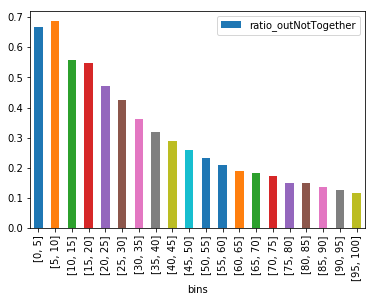

In [5]:
import pickle

with open('/home/xcao/w/20180905Junonia_coenia/20181010Trees/20181026MergeSample/fraglen10000_tree.sum.memory.df_FalseOut','rb') as f:
    df_FalseOut = pickle.load(f)
%matplotlib inline
df_FalseOut.plot.bar(x='bins',y='ratio_outNotTogether')

minBoots (there are 3 bootstrap values. the minimum bootstrap value) 75 is a good points that the ratio two outgroup not together is not together. Below that, it is is possibly due to no phylogenetic resolution (not enough informative positions) and the tree is random

#### plot distribution of relative distance between two outgroups

```
def getRelativeDistance(tree,node1 = 'J_neildi',node2='J_z_zonalis'):
    '''
    get the relative distance of node1 and node2 in a tree
    '''
    total_distance = 0
    for i in tree.traverse():
        total_distance += i.dist
    #print(total_distance)
    outgroup_distance = tree.get_distance('J_neildi','J_z_zonalis')
    outgroup_relative_distance = outgroup_distance / total_distance
    return outgroup_relative_distance

from multiprocessing import Pool
pool = Pool(32)
df_tree['outgroup_relative_distance'] = pool.map(getRelativeDistance, df_tree['tree'])
pool.close()

df_tree.to_csv('/home/xcao/w/20180905Junonia_coenia/20181010Trees/20181026MergeSample/fraglen10000_tree.sum.csv',columns=['chr','chrN','minBoots','outgroupTogether','outgroup_relative_distance'],sep='\t')
```

code below run with R

```
library(ggplot2)

filename = '/home/xcao/w/20180905Junonia_coenia/20181010Trees/20181026MergeSample/fraglen10000_tree.sum.csv'
xdf = read.csv(filename,sep = '\t',stringsAsFactors = FALSE)
xdf$outgroupTogether <- xdf$outgroupTogether =='True'
xdf$Boots75 <-  xdf$minBoots >= 75

xdf$minBootsRange <- cut(xdf$minBoots,seq(0,100,20))
#ggplot(xdf,aes(x=minBootsRange)) + geom_boxplot(aes(y=outgroup_relative_distance))
ggplot(xdf) + geom_histogram(aes(x=outgroup_relative_distance))
ggplot(xdf) + geom_histogram(aes(x=outgroup_relative_distance)) + facet_grid(outgroupTogether~.)
ggplot(xdf) + geom_histogram(aes(x=outgroup_relative_distance)) + facet_grid(Boots75~.)
ggplot(xdf) + geom_histogram(aes(x=outgroup_relative_distance)) + facet_grid(outgroupTogether~minBootsRange)
```

#### count and plot good tree topologies
minBoots>75, outgorupTogether is True

```
df_tree_b75_O2 = df_tree[(df_tree['minBoots']>=75) & (df_tree['outgroupTogether']==True)]
df_tree_b75_O2 = df_tree_b75_O2.reset_index().copy()
def getTopology(tree):
    tree = tree.copy()
    tree.set_outgroup(tree.get_common_ancestor('J_z_zonalis','J_neildi'))
    tree.sort_descendants()
    return tree.write(format=9)
df_tree_b75_O2['treeTopology'] = df_tree_b75_O2['tree'].apply(getTopology)
from collections import Counter
treeTopology = Counter(df_tree_b75_O2['treeTopology'])

fout = open('/home/xcao/w/20180905Junonia_coenia/20181010Trees/20181026MergeSample/fraglen10000_tree.b75o2.names','w')
for chromosome, chrN in zip(df_tree_b75_O2['chr'],df_tree_b75_O2['chrN']):
    fout.write('chr'+str(chromosome)+'_'+str(chrN)+'\n')
fout.close() #store filenames of trees with minBoots >=75 and outgroupTogether

from collections import Counter
treeTopology = {}
for chromosome in df_tree_b75_O2.chr.unique():
    treeTopology['chr'+str(chromosome)] = Counter(df_tree_b75_O2[df_tree_b75_O2['chr']==chromosome]['treeTopology'])
df_treeTopology = pd.DataFrame(treeTopology)
df_treeTopology.to_excel('/home/xcao/w/20180905Junonia_coenia/20181010Trees/20181026MergeSample/fraglen10000_tree.sum.b75o2.xlsx') #store the tree toplogy count in each chromosome

from ete3 import TreeStyle,TextFace,NodeStyle,Tree

for n,t in enumerate(txt):
    tt,tn = t.split(':')
    tt = Tree(tt)
    ts = TreeStyle()
    ts.title.add_face(TextFace('count:'+tn, fsize=20),column=0)
    ts.show_branch_length = False
    ts.show_scale = False
    nstyle = NodeStyle()
    nstyle["size"] = 0
    nstyle['hz_line_width'] = 1
    nstyle['vt_line_width'] = 1
    for node in tt.traverse():
       node.set_style(nstyle)
    tt.render('20181029Trees_'+str(n)+'.pdf',tree_style=ts)
    #break

files = ['20181029Trees_'+str(n)+'.pdf' for n in range(15)]
from PyPDF2 import PdfFileMerger
merger = PdfFileMerger()
for pdf in files:
    merger.append(open(pdf, 'rb'))
with open('result.pdf', 'wb') as fout:
    merger.write('20181029Trees.pdf')
```

#### calculate T1T2 for outgroup together and bootsMin>=75 trees. 
13050 out of 58534 trees are good.
```
import glob
from ete3 import Tree
import os
from multiprocessing import Pool
import sys
sys.path.append('/home/xcao/p/xiaolongTools/utils')
import calculateT1T2FromMultipleFastaAlignment

folder = '/home/xcao/w/20180905Junonia_coenia/20181010Trees/20181026MergeSample/fraglen10000_tree/'
folder_fasta = '/home/xcao/w/20180905Junonia_coenia/20181010Trees/20181026MergeSample/fraglen10000/'

files = open('/home/xcao/w/20180905Junonia_coenia/20181010Trees/20181026MergeSample/fraglen10000_tree.b75o2.names').read().split()

file = files[0]


treeTXT='((J_nigrosuffusaTX:0.02653114204746282248,((J_c_grisea:0.02850490624017898780,J_c_coenia:0.02532914758048187068)95:0.00397364234452561322,J_nigrosuffusa:0.02831559295854962910)99:0.00439717379237309063)100:0.00397298745329234797,(J_neildi:0.02513506551944225814,J_z_zonalis:0.02562707214028403513)100:0.00397298745329234797);'
file_alignment = r"C:\Users\K\Downloads\chr0_4"
tree = Tree(treeTXT)

def processTree(file):
    file_tree = os.path.join(folder,file)
    file_alignment = os.path.join(folder_fasta,file)
    tree = Tree(open(file_tree).read())
    chromosome, chromosomeN = file.split('_')
    ls_outinfo = []
    def addNodeNames(tree):
        '''
        the internal nodes have no names. add unique names like node1, node2 to them
        '''
        n = 1
        for node in tree.traverse():
            if not node.is_leaf():
                node.name = 'node' + str(n)
                n += 1
        return None
    addNodeNames(tree)
    tree.set_outgroup(tree.get_common_ancestor('J_neildi','J_z_zonalis'))
    outgroups = ['J_neildi','J_z_zonalis']
    testgroups = ['J_nigrosuffusaTX', 'J_c_grisea', 'J_c_coenia', 'J_nigrosuffusa']
    for node in outgroups:
        for testnode in testgroups:
            dc = {}
            dc['chr'] = chromosome
            dc['chrN'] = chromosomeN
            t2 = tree.copy()
            for leaf in t2.iter_leaves():
                if leaf.name == node or leaf.name == testnode:
                    leaf.delete(preserve_branch_length=True)
            #print(t2)
            t2.sort_descendants()
            sample_orders = []
            for n2 in t2.traverse(strategy='levelorder'):
                if n2.is_leaf():
                    sample_orders.append(n2.name)
            sample_orders.reverse()
            #print(t2.write(format=9))
            #print(calculateT1T2FromFastaAlignment(file_alignment,sample_orders))
            T1T2=calculateT1T2FromMultipleFastaAlignment.calculateT1T2FromFastaAlignment(file_alignment, orders = sample_orders,minlen= 1000)
            if T1T2 is not None:
                T1, T2 = T1T2
                dc['T1'] = T1
                dc['T2'] = T2
                dc['tree'] = t2.write(format=9)
            ls_outinfo.append(dc)
    return ls_outinfo

pool = Pool(32)
results = pool.map(processTree,files)
pool.close()
df_final = pd.DataFrame([j for i in results for j in i])
df_final.to_csv('/home/xcao/w/20180905Junonia_coenia/20181010Trees/20181026MergeSample/fraglen10000_tree.b75o2.summary',sep='\t')
```

#### plot T1,T2 based on different tree structures with R
```
library(ggplot2)
library(gridExtra)
library(tidyr)
library(scales)
library(dplyr)

filename <- '/home/xcao/w/20180905Junonia_coenia/20181010Trees/20181026MergeSample/fraglen10000_tree.b75o2.summary'

x.df <- read.csv(filename,sep = '\t',stringsAsFactors = FALSE,row.names = 1)
x.df$Z <- sapply(x.df$chr,function(x) if (x=='chr21') return ('Z') else return('auto'))
x.df <- x.df[x.df$tree !='',]
x.df$tree <- gsub('J_z_zonalis|J_neildi','O',x.df$tree)

groupXTrees <- function(tree_topology,outgroups = c('J_z_zonalis','J_neildi','O')){
  # tree topology lookes like '(((J_c_coenia,J_c_grisea),J_nigrosuffusa),J_z_zonalis);'
  # return "J_c_grisea,J_nigrosuffusa,J_nigrosuffusaTX"
  a <- strsplit(tree_topology,split = '\\(|\\)| |,|;')
  a <- a[[1]]
  a <- a[a!='']
  a <- a[!(a %in% outgroups)]
  a <- sort(a)
  return(paste(a,collapse = ','))
}

x.df$group <- sapply(x.df$tree,groupXTrees)
# x.df$outgroup <- sapply(x.df$tree,getOutgroupXtrees)
x.trees <- unique(x.df$tree)
x.groups <- unique(x.df$group)
# x.outgroups <- unique(x.df$outgroup)
x.dfm <- x.df %>% group_by(chr, chrN, tree, Z, group) %>% summarise(T1=mean(T1),T2=mean(T2))

pdf('/home/xcao/w/20180905Junonia_coenia/20181010Trees/20181026MergeSample/20181104mergedSamplesT1T2.pdf',width = 18,height = 9)


workgroup <- x.groups[1]
for (workgroup in x.groups){
  x.df.1 <- x.dfm[x.dfm$group==workgroup,]
  x.df.2 <- gather(x.df.1, key='T1T2',value = 'Height',-chr, -chrN, -tree, -Z,-group)
  tvalue.T1 <- t.test(as.data.frame(x.df.2[x.df.2$T1T2 == 'T1' & x.df.2$Z =='auto','Height']), as.data.frame(x.df.2[x.df.2$T1T2 == 'T1' & x.df.2$Z =='Z','Height']))
  tvalue.T2 <- t.test(as.data.frame(x.df.2[x.df.2$T1T2 == 'T2' & x.df.2$Z =='auto','Height']), as.data.frame(x.df.2[x.df.2$T1T2 == 'T2' & x.df.2$Z =='Z','Height']))
  dat_text <- data.frame(label=paste0('pvalue: ',c(scientific(tvalue.T1$p.value,3), scientific(tvalue.T2$p.value,3))),T1T2=c('T1','T2'))
  p1 <- ggplot(x.df.2, aes(x=Z,y=Height)) + geom_boxplot() + facet_wrap(~T1T2)+ stat_summary(fun.y=mean, colour="red", geom="point", size=3) + stat_summary(fun.y=mean, colour="blue", geom="text", vjust=-0.7, aes( label=round(..y.., digits=5))) + geom_text(data=dat_text,mapping = aes(x = -Inf, y = -Inf, label=label), hjust = -0.1, vjust = -1,color='red') + ggtitle(workgroup)
  
  
  p2 <- ggplot(x.df.2, aes(x=tree,y=Height)) + geom_boxplot() + facet_wrap(~T1T2) + stat_summary(fun.y=mean, colour="red", geom="point", size=3) + stat_summary(fun.y=mean, colour="blue", geom="text", vjust=-0.7, aes( label=round(..y.., digits=5))) + ggtitle(workgroup) + theme(axis.text.x = element_text(angle = 10))
  x.df.3 <- x.df.2 %>% filter(T1T2=='T1')
  tvalue.T1p <- pairwise.t.test(x.df.3$Height, x.df.3$tree,p.adjust.method = 'BH')
  a <- tvalue.T1p$p.value
  x.txt1 <- c(paste0(rownames(a)[1], colnames(a)[1],': ', scientific(a[rownames(a)[1],colnames(a)[1]],3)), paste0(rownames(a)[2], colnames(a)[1],': ', scientific(a[rownames(a)[2],colnames(a)[1]],3)),paste0(rownames(a)[2], colnames(a)[2],': ', scientific(a[rownames(a)[2],colnames(a)[2]],3)))
  x.df.4 <- x.df.2 %>% filter(T1T2=='T2')
  tvalue.T2p <- pairwise.t.test(x.df.4$Height, x.df.3$tree,p.adjust.method = 'BH')
  a <- tvalue.T2p$p.value
  x.txt2 <- c(paste0(rownames(a)[1], colnames(a)[1],': ', scientific(a[rownames(a)[1],colnames(a)[1]],3)), paste0(rownames(a)[2], colnames(a)[1],': ', scientific(a[rownames(a)[2],colnames(a)[1]],3)),paste0(rownames(a)[2], colnames(a)[2],': ', scientific(a[rownames(a)[2],colnames(a)[2]],3)))
  dat_text2 <- data.frame(label=c(paste(x.txt1,collapse = '\n'), paste(x.txt2, collapse = '\n')),T1T2=c('T1','T2'))
  p2 <- p2 + geom_text(data=dat_text2,mapping = aes(x = -Inf, y = -Inf, label=label), hjust = 0, vjust = -1,color='red')
  print(workgroup)
  print('T1 T2 comparison between Z and auto chromosomes')
  print(p1)
  print('T1 T2 comparison of different topology in auto chromosomes')
  print(p2)
  print('T1 pvalue')
  print(x.txt1)
  print("T2 pvalue")
  print(x.txt2)
}


dev.off()

```

#### count outgroup confidently not together
```
df_tree_b99_notO2 = df_tree[(~ df_tree['outgroupTogether']) & (df_tree['minBoots']>99)]
```

### gene tree from merged samples 6 group with BPP

#### run BPP for one aligned fasta file

run BPP for one aligned fasta file
```

from Bio import SeqIO
import os

BPP = '/home2/s185491/p/bpp/bpp-master/bpp'
TREE1 = '(((J_c_coenia,(J_c_grisea,J_nigrosuffusa)),J_nigrosuffusaTX),(J_neildi,J_z_zonalis));'
TREE2 = '((((J_c_coenia,J_c_grisea),J_nigrosuffusa),J_nigrosuffusaTX),(J_neildi,J_z_zonalis));'
TREE3 = '(((J_c_coenia,J_nigrosuffusaTX),(J_c_grisea,J_nigrosuffusa)),(J_neildi,J_z_zonalis));'
TREES = [TREE1,TREE2,TREE3]
FOLDER_WORKING = '/work/biophysics/s185491/2018junonia/20181105bpp/temp/'
FOLDER_OUTPUT1 = '/work/biophysics/s185491/2018junonia/20181105bpp/fraglen100000BPP1/'
FOLDER_OUTPUT2 = '/work/biophysics/s185491/2018junonia/20181105bpp/fraglen100000BPP2/'
FOLDER_OUTPUT3 = '/work/biophysics/s185491/2018junonia/20181105bpp/fraglen100000BPP3/'
FOLDER_OUTPUTS = [FOLDER_OUTPUT1,FOLDER_OUTPUT2,FOLDER_OUTPUT3]
IMAPFILE = '/work/biophysics/s185491/2018junonia/20181105bpp/Imap'
THETA_A = 3
THETA_B = 0.008
TAU_A = 3
TAU_B = 0.04

A01 = '''
          seed =  {SEED}

       seqfile = {SEQFILE}
      Imapfile = {IMAPFILE}
       outfile = {OUTFILE}
      mcmcfile = {MCMCFILE}

  speciesdelimitation = 0 * fixed species tree
         speciestree = 1  0.4 0.2 0.1   * speciestree pSlider ExpandRatio ShrinkRatio

   speciesmodelprior = 1  * 0: uniform LH; 1:uniform rooted trees; 2: uniformSLH; 3: uniformSRooted

  species&tree = 6  J_c_coenia  J_c_grisea  J_neildi  J_nigrosuffusa J_nigrosuffusaTX J_z_zonalis
                    1  1  1  1  1  1
                 {TREE}
        diploid =   0  0  0  0  0  0
   
       usedata = 1  * 0: no data (prior); 1:seq like
         nloci = 1  * number of data sets in seqfile

     cleandata = 0    * remove sites with ambiguity data (1:yes, 0:no)?

    thetaprior = {THETA_A} {THETA_B}   # invgamma(a, b) for theta
      tauprior = {TAU_A} {TAU_B}    # invgamma(a, b) for root tau & Dirichlet(a) for other tau's

      finetune =  1: 5 0.001 0.001  0.001 0.3 0.33 1.0  # finetune for GBtj, GBspr, theta, tau, mix, locusrate, seqerr

         print = 1 0 0 0   * MCMC samples, locusrate, heredityscalars, Genetrees
        burnin = 40000
      sampfreq = 10
       nsample = 200000

'''

def alignmentFasta2PhylipBPP(filename):
    '''
    filename is a filename of alignments in fasta format
    if outfilename is None, write to filename+'.phylip'
    '''
    basename = os.path.basename(filename)
    outfilename = os.path.join(FOLDER_WORKING,basename + '.phylip')
    fout = open(outfilename,'w')
    
    seqNum = 0
    seqIDs = []
    for s in SeqIO.parse(filename,'fasta'):
        seqNum += 1
        seqIDs.append(s.id)
    
    nameLen = max(len(e) for e in seqIDs) + 3
    
    seqLen = len(s.seq)
    fout.write('%d %d\n'%(seqNum,seqLen))
    
    for s in SeqIO.parse(filename,'fasta'):
        fout.write(s.id + '^'+ s.id +' '*(nameLen - len(s.id))+str(s.seq)+'\n')
    fout.close()
    print('Format converting Finished!')
    
    # make A01 file and get commandline
    commandlines = []
    for n in range(3):
        outfile_A01 = os.path.join(FOLDER_WORKING,basename+'.A01_%d'%(n+1))
        outfile_result = os.path.join(FOLDER_WORKING, basename+'.out_%d'%(n+1))
        outfile_mcmc = os.path.join(FOLDER_WORKING, basename+'.mcmc_%d'%(n+1))
        fout = open(outfile_A01,'w')
        fout.write(A01.format(SEED = -1, SEQFILE=outfilename, IMAPFILE=IMAPFILE, OUTFILE = outfile_result, MCMCFILE = outfile_mcmc, TREE = TREES[n],THETA_A = THETA_A, THETA_B = THETA_B, TAU_A = TAU_A, TAU_B = TAU_B))
        fout.close()
        commandline = '{BPP} --cfile {outfile_A01} && cp -f {outfile_result} {FOLDER_OUTPUT}{basename}'.format(BPP=BPP, outfile_A01 = outfile_A01, outfile_result=outfile_result, FOLDER_OUTPUT = FOLDER_OUTPUTS[n], basename=basename)
        commandlines.append(commandline)
    
    commandlines.append('wait')
    os.system(' & '.join(commandlines))
    print('Finish BPP with tree')
    



if __name__ == '__main__':
    import argparse
    parser = argparse.ArgumentParser(description='input a fasta file of sequence alignments, run BPP for 6 merged genome fragments 100kb, each with 3 individual runs.')
    parser.add_argument('-i','--input', help = 'input file fasta file', required=True)
    f = parser.parse_args()
    alignmentFasta2PhylipBPP(filename=f.input)
```

#### generate cmds and qsub

```
folder = '/work/biophysics/s185491/2018junonia/20181105bpp/fraglen100000/'
import glob
files = glob.glob(folder+'*')
file_cmds = '/work/biophysics/s185491/2018junonia/20181105bpp/cmds/cmds'
cmds = ['python3 /home2/s185491/p/xiaolongTools/project/Junonia/runBPP_6mergedGenome_fraglen100000.py -i '+f for f in files]
open(file_cmds,'w').write('\n'.join(cmds))
import os
os.system('python3 /home2/s185491/p/xiaolongTools/utils/splitFiles2Nparts.py -N 32 -i '+file_cmds)

file_qusb = ''
txt_qsub = '''#!/bin/bash
#SBATCH --job-name={n}
#SBATCH --partition=32GB
#SBATCH --nodes=1
#SBATCH --ntasks=32
#SBATCH --time=5-00:00:00
#SBATCH --output=0.%j.out
#SBATCH --mail-user=xiaolong.cao@utsouthwestern.edu
#SBATCH --mail-type=ALL

python3 /home2/s185491/p/xiaolongTools/multiThread.py 12 {file_cmds}.split{n}
'''
for n in range(32):
    f = open(file_cmds+'.qsub%d'%n,'w')
    f.write(txt_qsub.format(file_cmds=file_cmds,n=n))
    f.close()
```

#### summarize the results

merge results from three runs to one
```

import sys
sys.path.append('/home2/s185491/p/xiaolongTools/utils/BPP')
import bpp
import glob,os
from collections import Counter
from multiprocessing import Pool

folder = '/work/biophysics/s185491/2018junonia/20181105bpp/fraglen100000/'
folders_results = ['/work/biophysics/s185491/2018junonia/20181105bpp/fraglen100000BPP%d/'%n for n in [1,2,3]]
folder_out = '/work/biophysics/s185491/2018junonia/20181105bpp/fraglen100000BPP/'
files_input = glob.glob(folder+'*')
files_results = []
for f in folders_results:
     files_results += glob.glob(f+'*')

dc_results = {}
for f in files_input:
     dc_results[os.path.basename(f)] = []
for f in files_results:
     dc_results[os.path.basename(f)].append(f)

Counter([len(e) for e in dc_results.values()])

l_parameters = []
for k in dc_results:
     l_parameters.append([dc_results[k], 'J_neildi', 0.3, os.path.join(folder_out,k)])

#test1
f1 = '/work/biophysics/s185491/2018junonia/20181105bpp/fraglen100000BPP1.chr16_126'
f2 = '/work/biophysics/s185491/2018junonia/20181105bpp/fraglen100000BPP2.chr16_126'
f3 = '/work/biophysics/s185491/2018junonia/20181105bpp/fraglen100000BPP3.chr16_126'
resultA1 = bpp.processBPPresultPartA(f1)
resultA2 = bpp.processBPPresultPartA(f2)
resultA3 = bpp.processBPPresultPartA(f3)
resultA12 = bpp.combine2BPPresultPartA_List(resultA1,resultA2)
resultA = bpp.combineBPPresultPartAOne([f1,f2,f3])
bpp.combineBPPresultPartAOne(*l_parameters[0])

# run all
pool = Pool(32)
results = pool.starmap(bpp.combineBPPresultPartAOne, l_parameters)
pool.close()
```

of the 5849 gene trees, 45 do not have consistent results. discard them.
Analyze the result
```
import sys
sys.path.append('/home2/s185491/p/xiaolongTools/utils/BPP')
import bpp
import glob,os
from collections import Counter
from multiprocessing import Pool
import pandas as pd


folder = '/work/biophysics/s185491/2018junonia/20181105bpp/fraglen100000BPP/'
files = glob.glob(folder+'*')

def processResultA(file):
     '''
     return a dc with tree as key and prob as value
     '''
     dc = {}
     basename = os.path.basename(file)
     dc['tree_id'] = basename
     dc['chr'] = int(basename[3:].split('_')[0])
     dc['chrN'] = int(basename[3:].split('_')[1])
     for line in open(file):
          tree, prob = line.strip().split('\t')
          prob = float(prob)
          dc[tree] = prob
     return dc

pool = Pool(32)
results = pool.map(processResultA,files)
pool.close()
df_all = pd.DataFrame(results)
df_all = df_all.fillna(0)
columns = ['chr', 'chrN', 'tree_id'] + list(df_all.columns)[:-3]
df_all = df_all.loc[:,columns]
df_all = df_all.sort_values(by = ['chr','chrN'])
df_all.to_csv('/work/biophysics/s185491/2018junonia/20181105bpp/fraglen100000.bpp.all',sep='\t',index=None)

df_sum = df_all.groupby(['chr'], as_index=False).sum()
df_sum = df_sum.drop(columns=['chrN'])
df_sum = df_sum.T
df_sum['sum'] = df_sum.sum(axis=1)
df_sum = df_sum.sort_values(by=['sum'],ascending=False)
df_sum = df_sum.drop(index=['chr'])
df_sum.loc['sum_chr'] = df_sum.sum()

df_all2 = df_all.copy()
trees = list(df_all.columns[3:])
#for each fragment, get max prob, tree with the max prob, and whether outgroup are together for that tree.
def processLine(row):
     dc = {}
     dc['chr'] = row['chr']
     dc['chrN'] = row['chrN']
     dc['tree_id'] = row['tree_id']
     row_trees = row[trees]
     row_trees = row_trees.sort_values(ascending=False)
     dc['max_prob'] = row_trees[0]
     dc['max_tree'] = row_trees.index[0]
     dc['outTogether'] = row_trees.index[0].endswith('J_z_zonalis),J_neildi);')
     return dc

l = df_all.apply(processLine, axis=1)
l = list(l)
df_sum2 = pd.DataFrame(l)
df_sum2.to_csv('/work/biophysics/s185491/2018junonia/20181105bpp/fraglen100000.bpp.bestTree',sep='\t',index=None)

df_sum2good = df_sum2[df_sum2['outTogether'] & (df_sum2['max_prob'] > 0.5)]
df_sum3 = df_sum2good.groupby(['chr','max_tree'], as_index=False)['tree_id'].count()
df_sum4 = df_sum3.pivot(index='max_tree',columns='chr',values='tree_id')
df_sum4 = df_sum4.fillna(0)
df_sum4['sum'] = df_sum4.sum(axis=1)
df_sum4 = df_sum4.sort_values(by=['sum'],ascending=False)
df_sum4.loc['sum_chr'] = df_sum4.sum()
df_sum4 = df_sum4.astype(int)
df_sum4.to_csv('/work/biophysics/s185491/2018junonia/20181105bpp/fraglen100000.bpp.bestTree.sum',sep='\t')

```

#### run BPP by grouping samples to coding and non-conding

split chromosome to coding and non-coding fragments. For coding fragments, discard those shorter than 100 bp. For non-coding fragments, discard those shorter than 100bp and those longer than 2000bp. For each chromosome, group the fragments so that each group have just above 100 fragments.   
789 groups for coding  
688 groups for non-coding
coding sequences is about 3.84% of the genome  
non-coding is about twice of coding.  
totally about 7.26% of the genome. 2018 Anopheles paper, 7.8%
```
file_sitesInfo = '/home/xcao/w/genomes/Junonia_coenia/Junonia_coenia_JC_v1.0.position.base.scf.scfpos.gene.rna.exon.cds'
file_scfInfo = '/home/xcao/w/genomes/Junonia_coenia/20181005JunoniaPositionHeliconiusChrOrder.txt'

dc_scaf2chr = {} #key: scaf_id, value: chromosome and order in chromosome
f = open(file_scfInfo)
for line in f:
     chromosome, scafs = line.strip().split(':',maxsplit=1)
     scafs = scafs.strip(';').split(';')
     scafs = [e[1:-1].split(':')[0] for e in scafs]
     for n, scaf in enumerate(scafs):
          dc_scaf2chr[scaf] = [chromosome,n]
f.close()

dc_scf2coding = {} #key: scaf_id, value, list of start and end of coding ids
dc_scf2noncoding = {} #key: scaf_id, value, list of start and end of non-coding ids
f = open(file_sitesInfo)
for line in f:
     position, base, scf, scfpos, gene, rna, exon, cds = line.split()
     position = int(position)
     if scf not in dc_scf2coding:
          dc_scf2coding[scf] = []
     if scf not in dc_scf2noncoding:
          dc_scf2noncoding[scf] = []
     if cds == '1':
          dc_scf2coding[scf].append(position)
     else:
          dc_scf2noncoding[scf].append(position)
#     break
f.close()


dc_scf2codingLoc = {}
for scf, positions in dc_scf2coding.items():
     if len(positions) == 0:
          continue
     frags = []
     frag = [positions[0],positions[0]+1]
     for p in positions[1:]:
          if p == frag[-1]:
               frag[-1] += 1
          else:
               frags.append(frag)
               frag = [p,p+1]
     frags.append(frag)
     dc_scf2codingLoc[scf] = frags

dc_scf2noncodingLoc = {}
for scf, positions in dc_scf2noncoding.items():
     if len(positions) == 0:
          continue
     frags = []
     frag = [positions[0],positions[0]+1]
     for p in positions[1:]:
          if p == frag[-1]:
               frag[-1] += 1
          else:
               frags.append(frag)
               frag = [p,p+1]
     frags.append(frag)
     dc_scf2noncodingLoc[scf] = frags

#dc_scf2codingLoc['000475F']
ls_frag = [] # a list of dictionary, with type(coding or noncoding), chr, scf, start, end
for scf, loc in dc_scf2codingLoc.items():
     for start, end in loc:
          dc = {}
          dc['start'] = start
          dc['end'] = end
          dc['scf'] = scf
          dc['type'] = 'c'
          dc['chr'] = dc_scaf2chr[scf][0]
          dc['chrN'] = dc_scaf2chr[scf][1]
          ls_frag.append(dc)
for scf, loc in dc_scf2noncodingLoc.items():
     for start, end in loc:
          dc = {}
          dc['start'] = start
          dc['end'] = end
          dc['scf'] = scf
          dc['type'] = 'n'
          dc['chr'] = dc_scaf2chr[scf][0]
          dc['chrN'] = dc_scaf2chr[scf][1]
          ls_frag.append(dc)

import pandas as pd
df_frag = pd.DataFrame(ls_frag)
df_frag = df_frag.sort_values(by=['chr','chrN','start'])
df_frag.to_csv('/home/xcao/w/genomes/Junonia_coenia/20181005JunoniaPositionHeliconiusChrOrder_coding.txt',sep='\t',index=None,columns=['chr','chrN','scf','type','start','end'])

df_frag['len'] = df_frag['end'] - df_frag['start']
df_frag_c = df_frag[(df_frag['type']=='c') & (df_frag['len'] >= 100)]
df_frag_n = df_frag[(df_frag['type']=='n') & (df_frag['len'] >= 100) & (df_frag['len'] <= 2000)]

import numpy as np
#frag in each chromosome, split to N fragments so that each fragments have just over 100 frags
chromosome = list(df_frag_c['chr'].unique())
fout = open('/home/xcao/w/20180905Junonia_coenia/20180919Info/sitesKeep_2HmelChrOrder_coding_100frag','w')
for c in chromosome:
     df_temp = df_frag_c[df_frag_c['chr'] == c]
     #break

     n = df_temp.shape[0]
     num_group = n // 100
     step = int(np.ceil(n/num_group))
     print(n,step)
     for fragn, i in enumerate(list(range(0,n,step))):
          df_temp_group = df_temp.iloc[i:i+step,]
          name = 'chr'+c+'_c_'+str(fragn)
          fout.write(name+':')
          positions = []
          for start, end in zip(df_temp_group['start'],df_temp_group['end']):
               positions = positions + list(range(start,end))
          fout.write(' '.join(str(p) for p in positions))
          fout.write('\n')
          print(name,len(positions))
fout.close()

chromosome = list(df_frag_n['chr'].unique())
fout = open('/home/xcao/w/20180905Junonia_coenia/20180919Info/sitesKeep_2HmelChrOrder_noncoding_100frag','w')
for c in chromosome:
     df_temp = df_frag_n[df_frag_n['chr'] == c]
     #break

     n = df_temp.shape[0]
     num_group = n // 100
     step = int(np.ceil(n/num_group))
     print(n,step)
     for fragn, i in enumerate(list(range(0,n,step))):
          df_temp_group = df_temp.iloc[i:i+step,]
          name = 'chr'+c+'_n_'+str(fragn)
          fout.write(name+':')
          positions = []
          for start, end in zip(df_temp_group['start'],df_temp_group['end']):
               positions = positions + list(range(start,end))
          fout.write(' '.join(str(p) for p in positions))
          fout.write('\n')
          print(name,len(positions))
fout.close()
```

#### extract sequence

get sequences. Combine outputs to same folder after job finished
```
python3 /home/xcao/p/xiaolongTools/utils/getMultipleSequencesFromMapFilesInMultipleSites_small_memory.py -i /home/xcao/w/20180905Junonia_coenia/20181010Trees/20181026MergeSample/mapfiles -t 32 -b /home/xcao/w/20180905Junonia_coenia/20180919Info/sitesKeep_2HmelChrOrder_coding_100frag -o /home/xcao/w/20180905Junonia_coenia/20181010Trees/20181026MergeSample/100frag_bpp

python3 /home/xcao/p/xiaolongTools/utils/getMultipleSequencesFromMapFilesInMultipleSites_small_memory.py -i /home/xcao/w/20180905Junonia_coenia/20181010Trees/20181026MergeSample/mapfiles -t 32 -b /home/xcao/w/20180905Junonia_coenia/20180919Info/sitesKeep_2HmelChrOrder_noncoding_100frag -o /home/xcao/w/20180905Junonia_coenia/20181010Trees/20181026MergeSample/100frag_bpp2
```

#### run BPP
compared to merged sample frag100000, increase the mcmc runs 10 times. change sample frequency from 10 to 20.
```
folder = '/work/biophysics/s185491/2018junonia/20181105bpp/100frag_bpp/'
import glob
files = glob.glob(folder+'*')
file_cmds = '/work/biophysics/s185491/2018junonia/20181105bpp/cmds/cmds'
cmds = ['python /home2/s185491/p/xiaolongTools/project/Junonia/runBPP_6mergedGenome_frags100codingNonecoding.py -i '+f for f in files]
open(file_cmds,'w').write('\n'.join(cmds))
import os
os.system('python3 /home2/s185491/p/xiaolongTools/utils/splitFiles2Nparts.py -N 32 -i '+file_cmds)

file_qusb = ''
txt_qsub = '''#!/bin/bash
#SBATCH --job-name={n}
#SBATCH --partition=32GB
#SBATCH --nodes=1
#SBATCH --ntasks=32
#SBATCH --time=5-00:00:00
#SBATCH --output=0.%j.out
#SBATCH --mail-user=xiaolong.cao@utsouthwestern.edu
#SBATCH --mail-type=ALL

python3 /home2/s185491/p/xiaolongTools/multiThread.py 12 {file_cmds}.split{n}
'''
for n in range(32):
    f = open(file_cmds+'.qsub%d'%n,'w')
    f.write(txt_qsub.format(file_cmds=file_cmds,n=n))
    f.close()
```

#### summarize the results

summarized the result was further summarized in one excel file. coding, non-coding, and all

merge three runs
```
import sys
sys.path.append('/home2/s185491/p/xiaolongTools/utils/BPP')
import bpp
import glob,os
from collections import Counter
from multiprocessing import Pool

folder = '/work/biophysics/s185491/2018junonia/20181105bpp/100frag_bpp/'
folders_results = ['/work/biophysics/s185491/2018junonia/20181105bpp/100frag_bppBPP%d/'%n for n in [1,2,3]]
folder_out = '/work/biophysics/s185491/2018junonia/20181105bpp/100frag_bppBPP/'
files_input = glob.glob(folder+'*')
files_results = []
for f in folders_results:
     files_results += glob.glob(f+'*')

dc_results = {}
for f in files_input:
     dc_results[os.path.basename(f)] = []
for f in files_results:
     dc_results[os.path.basename(f)].append(f)

Counter([len(e) for e in dc_results.values()])

l_parameters = []
for k in dc_results:
     l_parameters.append([dc_results[k], 'J_neildi', 0.3, os.path.join(folder_out,k)])

# run all
pool = Pool(32)
results = pool.starmap(bpp.combineBPPresultPartAOne, l_parameters)
pool.close()
```

```
import sys
sys.path.append('/home2/s185491/p/xiaolongTools/utils/BPP')
import bpp
import glob,os
from collections import Counter
from multiprocessing import Pool
import pandas as pd


folder = '/work/biophysics/s185491/2018junonia/20181105bpp/100frag_bppBPP/'
files = glob.glob(folder+'*')

def processResultA(file):
     '''
     return a dc with tree as key and prob as value
     '''
     dc = {}
     basename = os.path.basename(file)
     dc['tree_id'] = basename
     dc['chr'] = int(basename[3:].split('_')[0])
     dc['type'] = basename[3:].split('_')[1]
     dc['chrN'] = int(basename[3:].split('_')[2])
     for line in open(file):
          tree, prob = line.strip().split('\t')
          prob = float(prob)
          dc[tree] = prob
     return dc

pool = Pool(32)
results = pool.map(processResultA,files)
pool.close()
df_all = pd.DataFrame(results)
df_all = df_all.fillna(0)
columns = ['chr', 'chrN', 'tree_id', 'type'] + list(df_all.columns)[:-4]
df_all = df_all.loc[:,columns]
df_all = df_all.sort_values(by = ['chr','type','chrN'])
df_all.to_csv('/work/biophysics/s185491/2018junonia/20181105bpp/100frag_bpp.bpp.all',sep='\t',index=None)

df_all_ori = df_all.copy()
df_all = df_all_ori.drop(columns=['type'])
df_sum = df_all.groupby(['chr'], as_index=False).sum()
df_sum = df_sum.drop(columns=['chrN'])
df_sum = df_sum.T
df_sum['sum'] = df_sum.sum(axis=1)
df_sum = df_sum.sort_values(by=['sum'],ascending=False)
df_sum = df_sum.drop(index=['chr'])
df_sum.loc['sum_chr'] = df_sum.sum()
df_sum.to_excel('/work/biophysics/s185491/2018junonia/20181105bpp/100frag_bpp.bpp.xlsx')

df_all2 = df_all.copy()
trees = list(df_all.columns[3:])
#for each fragment, get max prob, tree with the max prob, and whether outgroup are together for that tree.
def processLine(row):
     dc = {}
     dc['chr'] = row['chr']
     dc['chrN'] = row['chrN']
     dc['tree_id'] = row['tree_id']
     row_trees = row[trees]
     row_trees = row_trees.sort_values(ascending=False)
     dc['max_prob'] = row_trees[0]
     dc['max_tree'] = row_trees.index[0]
     dc['outTogether'] = row_trees.index[0].endswith('J_z_zonalis),J_neildi);')
     return dc

l = df_all.apply(processLine, axis=1)
l = list(l)
df_sum2 = pd.DataFrame(l)
df_sum2.to_csv('/work/biophysics/s185491/2018junonia/20181105bpp/100frag_bpp.bpp.bestTree',sep='\t',index=None)

df_sum2good = df_sum2[df_sum2['outTogether'] & (df_sum2['max_prob'] > 0.5)]
df_sum3 = df_sum2good.groupby(['chr','max_tree'], as_index=False)['tree_id'].count()
df_sum4 = df_sum3.pivot(index='max_tree',columns='chr',values='tree_id')
df_sum4 = df_sum4.fillna(0)
df_sum4['sum'] = df_sum4.sum(axis=1)
df_sum4 = df_sum4.sort_values(by=['sum'],ascending=False)
df_sum4.loc['sum_chr'] = df_sum4.sum()
df_sum4 = df_sum4.astype(int)
df_sum4.to_csv('/work/biophysics/s185491/2018junonia/20181105bpp/100frag_bpp.bpp.bestTree.sum',sep='\t')

#result for coding
types = ['c','n']
for t in types:
     df_all = df_all_ori[df_all_ori['type']==t].drop(columns=['type'])
     df_sum = df_all.groupby(['chr'], as_index=False).sum()
     df_sum = df_sum.drop(columns=['chrN'])
     df_sum = df_sum.T
     df_sum['sum'] = df_sum.sum(axis=1)
     df_sum = df_sum.sort_values(by=['sum'],ascending=False)
     df_sum = df_sum.drop(index=['chr'])
     df_sum.loc['sum_chr'] = df_sum.sum()
     df_sum.to_excel('/work/biophysics/s185491/2018junonia/20181105bpp/100frag_bpp.bpp.{t}.xlsx'.format(t=t))
     
     df_all2 = df_all.copy()
     trees = list(df_all.columns[3:])
     #for each fragment, get max prob, tree with the max prob, and whether outgroup are together for that tree.
     def processLine(row):
          dc = {}
          dc['chr'] = row['chr']
          dc['chrN'] = row['chrN']
          dc['tree_id'] = row['tree_id']
          row_trees = row[trees]
          row_trees = row_trees.sort_values(ascending=False)
          dc['max_prob'] = row_trees[0]
          dc['max_tree'] = row_trees.index[0]
          dc['outTogether'] = row_trees.index[0].endswith('J_z_zonalis),J_neildi);')
          return dc
     
     l = df_all.apply(processLine, axis=1)
     l = list(l)
     df_sum2 = pd.DataFrame(l)
     df_sum2.to_csv('/work/biophysics/s185491/2018junonia/20181105bpp/100frag_bpp.bpp.bestTree.{t}'.format(t=t),sep='\t',index=None)
     
     df_sum2good = df_sum2[df_sum2['outTogether'] & (df_sum2['max_prob'] > 0.5)]
     df_sum3 = df_sum2good.groupby(['chr','max_tree'], as_index=False)['tree_id'].count()
     df_sum4 = df_sum3.pivot(index='max_tree',columns='chr',values='tree_id')
     df_sum4 = df_sum4.fillna(0)
     df_sum4['sum'] = df_sum4.sum(axis=1)
     df_sum4 = df_sum4.sort_values(by=['sum'],ascending=False)
     df_sum4.loc['sum_chr'] = df_sum4.sum()
     df_sum4 = df_sum4.astype(int)
     df_sum4.to_csv('/work/biophysics/s185491/2018junonia/20181105bpp/100frag_bpp.bpp.bestTree.sum.{t}'.format(t=t),sep='\t')
```

#### run RAxML with frag100_bpp
```
import os
import glob

folders = '''/home/xcao/w/20180905Junonia_coenia/20181010Trees/20181026MergeSample/100frag_bpp/
'''.split()
outfolders = [e[:-1]+'_tree' for e in folders]
outcommands = [e[:-1] + '.cmds' for e in folders]

for folder, outfolder, outfile_cmds in zip(folders, outfolders, outcommands):
#changed to add bootstrap
    files = glob.glob(folder+'*')
    if not os.path.exists(outfolder):
        os.makedirs(outfolder)
    commandline = 'cd /dev/shm && cp {fullname} ./ && /home/xcao/p/RAxML/standard-RAxML-master/raxmlHPC-PTHREADS-SSE3 -m GTRGAMMA -p 234 -s {basename} -n {basename} -o J_neildi,J_z_zonalis -x 234 -N 1000 -f a && mv RAxML_bipartitions.{basename} {outfolder}/{basename} && rm RAxML*{basename} && rm {basename}.*'
    open(outfile_cmds,'w').write('\n'.join(commandline.format(outfolder=outfolder, fullname = e, basename=os.path.basename(e)) for e in files))
```

run
```
python3 /home/xcao/p/xiaolongTools/multiThread.py 48 /home/xcao/w/20180905Junonia_coenia/20181010Trees/20181026MergeSample/100frag_bpp.cmds
```

collect tree
```
import glob
import os
folders = '''/home/xcao/w/20180905Junonia_coenia/20181010Trees/20181026MergeSample/100frag_bpp/
'''.split()

for folder in folders:
    dirname = os.path.dirname(folder)
    outfilename = dirname+'.sum'
    files = glob.glob(folder +'*')
    fout = open(outfilename,'w')
    for f in files:
        tree = open(f).read()
        fout.write(os.path.basename(f) + '\t' + tree)
    fout.close()
```

process result
```
import glob
import os
folder = '/home/xcao/w/20180905Junonia_coenia/20181010Trees/20181026MergeSample/100frag_bpp_tree/'
dirname = os.path.dirname(folder)
outfilename = dirname+'.sum'
files = glob.glob(folder +'*')
fout = open(outfilename,'w')
for f in files:
     tree = open(f).read()
     fout.write(os.path.basename(f) + '\t' + tree)
fout.close()

from ete3 import Tree
import pandas as pd
import numpy as np
from multiprocessing import Pool

filename = '/home/xcao/w/20180905Junonia_coenia/20181010Trees/20181026MergeSample/100frag_bpp_tree.sum'
def getlowestBootstrap(tree):
    '''
    return the lowest bootstrap value for a tree
    '''
    supports = []
    
    for t in tree.traverse():
        if t.support >1:
            supports.append(t.support)
    if len(supports) != 0:
        return min(supports)
    return 0

def checkOneNode(tree,name1,name2):
    children = tree.children
    if len(children) !=2:
        print('children number not 2',tree)
        return False
    c1,c2 = children
    if c1.name == name1 and c2.name == name2:
        return True
    if c1.name == name2 and c2.name == name1:
        return True
    return False

def checkIfTogether(tree, name1,name2):
    '''
    check if name1 and name2 forms a group in tree
    '''
    tree = tree.copy()

    for t in tree.iter_descendants():
        if not t.is_leaf():
            t2 = tree.copy()
            t2.sort_descendants()
            t2.set_outgroup(t.name)
            #print(t.name, t2)
            for c in t2.children:
                if len(c.get_children()) == 2:
                    if checkOneNode(c,name1,name2):
                        return True
    return False

def processTXT(txt):
    tree_id, tree_txt = txt.split()
    tree_chr, tree_type, tree_chrN = tree_id.split('_')
    tree = Tree(tree_txt)
    tree.unroot()
    node_name = 1#add name for all trees
    for t in tree.traverse():
        if t.name == '':
            t.name = 'node'+str(node_name)
            node_name += 1
    dc ={}
    dc['chr'] = int(tree_chr[3:])
    dc['type'] = tree_type
    dc['chrN'] = int(tree_chrN)
    dc['minBoots'] = getlowestBootstrap(tree)
    dc['outgroupTogether'] = checkIfTogether(tree, 'J_z_zonalis','J_neildi')
    dc['tree'] = tree
    return dc

txts = open(filename).readlines()
pool = Pool(32)
df_tree = pd.DataFrame(pool.map(processTXT,txts))
pool.close()

df_tree = df_tree.sort_values(by=['chr','type','chrN'])
df_tree = df_tree.reset_index()
df_tree = df_tree.drop(columns='index')

def getTopology(tree):
    tree = tree.copy()
    tree.set_outgroup(tree.get_common_ancestor('J_z_zonalis','J_neildi'))
    tree.sort_descendants()
    return tree.write(format=9)

df_tree_b75_O2 = df_tree[(df_tree['minBoots']>=35) & (df_tree['outgroupTogether']==True)].copy()
df_tree_b75_O2['treeTopology'] = df_tree_b75_O2['tree'].apply(getTopology)

from collections import Counter
treeTopology = Counter(df_tree_b75_O2['treeTopology'])

from collections import Counter
treeTopology = {}
for chromosome in df_tree_b75_O2.chr.unique():
    treeTopology['chr'+str(chromosome)] = Counter(df_tree_b75_O2[df_tree_b75_O2['chr']==chromosome]['treeTopology'])
df_treeTopology = pd.DataFrame(treeTopology)
df_treeTopology = df_treeTopology.fillna(0)
df_treeTopology['sum'] = df_treeTopology.sum(axis=1)
df_treeTopology = df_treeTopology.sort_values(by=['sum'],ascending=False)
df_treeTopology.loc['sum_chr'] = df_treeTopology.sum()
df_treeTopology.to_excel('/home/xcao/w/20180905Junonia_coenia/20181010Trees/20181026MergeSample/100frag_bpp_tree.sum.b75o2.xlsx') #store the tree toplogy count in each chromosome

for tree_type in 'cn':
    df_tree_b75_O2 = df_tree[(df_tree['minBoots']>=35) & (df_tree['outgroupTogether']==True) & (df_tree['type'] == tree_type)].copy()
    df_tree_b75_O2['treeTopology'] = df_tree_b75_O2['tree'].apply(getTopology)
    treeTopology = Counter(df_tree_b75_O2['treeTopology'])
    treeTopology = {}
    for chromosome in df_tree_b75_O2.chr.unique():
        treeTopology['chr'+str(chromosome)] = Counter(df_tree_b75_O2[df_tree_b75_O2['chr']==chromosome]['treeTopology'])
    df_treeTopology = pd.DataFrame(treeTopology)
    df_treeTopology = df_treeTopology.fillna(0)
    df_treeTopology['sum'] = df_treeTopology.sum(axis=1)
    df_treeTopology = df_treeTopology.sort_values(by=['sum'],ascending=False)
    df_treeTopology.loc['sum_chr'] = df_treeTopology.sum()
    df_treeTopology.to_excel('/home/xcao/w/20180905Junonia_coenia/20181010Trees/20181026MergeSample/100frag_bpp_tree.sum.b75o2.{tree_type}.xlsx'.format(tree_type=tree_type)) #store the tree toplogy count in each chromosome
```

#### run MrBayes

```
folder = '/work/biophysics/s185491/2018junonia/20181105bpp/fraglen100000/'
import glob
files = glob.glob(folder+'*')
file_cmds = '/work/biophysics/s185491/2018junonia/20181105bpp/cmds/cmds'
cmds = ['python3 /home2/s185491/p/xiaolongTools/project/Junonia/runMrBayes.py -i '+f for f in files]
open(file_cmds,'w').write('\n'.join(cmds))


folder = '/work/biophysics/s185491/2018junonia/20181105bpp/100frag_bpp/'
import glob
files = glob.glob(folder+'*')
file_cmds = '/work/biophysics/s185491/2018junonia/20181105bpp/cmds/cmds'
cmds = ['python /home2/s185491/p/xiaolongTools/project/Junonia/runMrBayes.py -i '+f for f in files]
open(file_cmds,'a').write('\n'.join(cmds))



import os
os.system('python3 /home2/s185491/p/xiaolongTools/utils/splitFiles2Nparts.py -N 32 -i '+file_cmds)

file_qusb = ''
txt_qsub = '''#!/bin/bash
#SBATCH --job-name={n}
#SBATCH --partition=32GB
#SBATCH --nodes=1
#SBATCH --ntasks=32
#SBATCH --time=5-00:00:00
#SBATCH --output=0.%j.out
#SBATCH --mail-user=xiaolong.cao@utsouthwestern.edu
#SBATCH --mail-type=ALL

module load openmpi/intel/3.1.1
module load beagle-lib/2.1.2

python3 /home2/s185491/p/xiaolongTools/multiThread.py 4 {file_cmds}.split{n}
'''
for n in range(32):
    f = open(file_cmds+'.qsub%d'%n,'w')
    f.write(txt_qsub.format(file_cmds=file_cmds,n=n))
    f.close()

```

#### MrBayes result
```
import glob
import os
folders = '''
/work/biophysics/s185491/2018junonia/20181105bpp/100frag_bppNewick/
/work/biophysics/s185491/2018junonia/20181105bpp/fraglen100000Newick/
'''.split()

for folder in folders:
    dirname = os.path.dirname(folder)
    outfilename = dirname+'.sum'
    files = glob.glob(folder +'*')
    fout = open(outfilename,'w')
    for f in files:
        tree = open(f).read()
        fout.write(os.path.basename(f) + '\t' + tree+'\n')
    fout.close()


from ete3 import Tree
import pandas as pd
import numpy as np
from multiprocessing import Pool
from collections import Counter

def getlowestBootstrap(tree):
    '''
    return the lowest bootstrap value for a tree
    '''
    supports = []
    for t in tree.traverse():
        if t.support >1:
            supports.append(t.support)
    if len(supports) != 0:
        return min(supports)
    return 0

def checkOneNode(tree,name1,name2):
    children = tree.children
    if len(children) !=2:
        print('children number not 2',tree)
        return False
    c1,c2 = children
    if c1.name == name1 and c2.name == name2:
        return True
    if c1.name == name2 and c2.name == name1:
        return True
    return False

def checkIfTogether(tree, name1,name2):
    '''
    check if name1 and name2 forms a group in tree
    '''
    tree = tree.copy()

    for t in tree.iter_descendants():
        if not t.is_leaf():
            t2 = tree.copy()
            t2.sort_descendants()
            t2.set_outgroup(t.name)
            #print(t.name, t2)
            for c in t2.children:
                if len(c.get_children()) == 2:
                    if checkOneNode(c,name1,name2):
                        return True
    return False

def processTXT(txt):
    tree_id, tree_txt = txt.split()
    tree_chr, tree_chrN = tree_id.split('_')
    tree = Tree(tree_txt)
    tree.unroot()
    node_name = 1#add name for all trees
    for t in tree.traverse():
        if t.name == '':
            t.name = 'node'+str(node_name)
            node_name += 1
    dc ={}
    dc['chr'] = int(tree_chr[3:])
    dc['chrN'] = int(tree_chrN)
    dc['minBoots'] = getlowestBootstrap(tree)
    dc['outgroupTogether'] = checkIfTogether(tree, 'J_z_zonalis','J_neildi')
    dc['tree'] = tree
    return dc

folder = '/work/biophysics/s185491/2018junonia/20181105bpp'
basename = 'fraglen100000Newick.sum'
filename = os.path.join(folder,basename)

txts = open(filename).readlines()
pool = Pool(32)
df_tree = pd.DataFrame(pool.map(processTXT,txts))
pool.close()

df_tree = df_tree.sort_values(by=['chr','chrN'])
df_tree = df_tree.reset_index()

df_tree_b75_O2 = df_tree[(df_tree['minBoots']>=75) & (df_tree['outgroupTogether']==True)]
df_tree_b75_O2 = df_tree_b75_O2.reset_index().copy()
def getTopology(tree):
    tree = tree.copy()
    tree.set_outgroup(tree.get_common_ancestor('J_z_zonalis','J_neildi'))
    tree.sort_descendants()
    return tree.write(format=9)
df_tree_b75_O2['treeTopology'] = df_tree_b75_O2['tree'].apply(getTopology)
treeTopology = Counter(df_tree_b75_O2['treeTopology'])

treeTopology = {}
for chromosome in df_tree_b75_O2.chr.unique():
    treeTopology['chr'+str(chromosome)] = Counter(df_tree_b75_O2[df_tree_b75_O2['chr']==chromosome]['treeTopology'])
df_treeTopology = pd.DataFrame(treeTopology)
df_treeTopology = df_treeTopology.fillna(0)
df_treeTopology['sum'] = df_treeTopology.sum(axis=1)
df_treeTopology = df_treeTopology.sort_values(by=['sum'],ascending=False)
df_treeTopology.loc['sum_chr'] = df_treeTopology.sum()
df_treeTopology.to_excel(os.path.join(folder,basename[:-4]+'.b75o2.xlsx')) #store the tree toplogy count in each chromosome

# '100frag_bpp'
folder = '/work/biophysics/s185491/2018junonia/20181105bpp'
basename = '100frag_bppNewick.sum'
filename = os.path.join(folder,basename)
def processTXT(txt):
    tree_id, tree_txt = txt.split()
    tree_chr, tree_type, tree_chrN = tree_id.split('_')
    tree = Tree(tree_txt)
    tree.unroot()
    node_name = 1#add name for all trees
    for t in tree.traverse():
        if t.name == '':
            t.name = 'node'+str(node_name)
            node_name += 1
    dc ={}
    dc['chr'] = int(tree_chr[3:])
    dc['type'] = tree_type
    dc['chrN'] = int(tree_chrN)
    dc['minBoots'] = getlowestBootstrap(tree)
    dc['outgroupTogether'] = checkIfTogether(tree, 'J_z_zonalis','J_neildi')
    dc['tree'] = tree
    return dc

txts = open(filename).readlines()
pool = Pool(32)
df_tree = pd.DataFrame(pool.map(processTXT,txts))
pool.close()

df_tree = df_tree.sort_values(by=['chr','type','chrN'])
df_tree = df_tree.reset_index()
df_tree = df_tree.drop(columns='index')

df_tree_b75_O2 = df_tree[(df_tree['minBoots']>=75) & (df_tree['outgroupTogether']==True)].copy()
df_tree_b75_O2['treeTopology'] = df_tree_b75_O2['tree'].apply(getTopology)

from collections import Counter
treeTopology = Counter(df_tree_b75_O2['treeTopology'])

from collections import Counter
treeTopology = {}
for chromosome in df_tree_b75_O2.chr.unique():
    treeTopology['chr'+str(chromosome)] = Counter(df_tree_b75_O2[df_tree_b75_O2['chr']==chromosome]['treeTopology'])
df_treeTopology = pd.DataFrame(treeTopology)
df_treeTopology = df_treeTopology.fillna(0)
df_treeTopology['sum'] = df_treeTopology.sum(axis=1)
df_treeTopology = df_treeTopology.sort_values(by=['sum'],ascending=False)
df_treeTopology.loc['sum_chr'] = df_treeTopology.sum()
df_treeTopology.to_excel(os.path.join(folder,basename[:-4]+'.b75o2.xlsx')) #store the tree toplogy count in each chromosome

for tree_type in 'cn':
    df_tree_b75_O2 = df_tree[(df_tree['minBoots']>=75) & (df_tree['outgroupTogether']==True) & (df_tree['type'] == tree_type)].copy()
    df_tree_b75_O2['treeTopology'] = df_tree_b75_O2['tree'].apply(getTopology)
    treeTopology = Counter(df_tree_b75_O2['treeTopology'])
    treeTopology = {}
    for chromosome in df_tree_b75_O2.chr.unique():
        treeTopology['chr'+str(chromosome)] = Counter(df_tree_b75_O2[df_tree_b75_O2['chr']==chromosome]['treeTopology'])
    df_treeTopology = pd.DataFrame(treeTopology)
    df_treeTopology = df_treeTopology.fillna(0)
    df_treeTopology['sum'] = df_treeTopology.sum(axis=1)
    df_treeTopology = df_treeTopology.sort_values(by=['sum'],ascending=False)
    df_treeTopology.loc['sum_chr'] = df_treeTopology.sum()
    df_treeTopology.to_excel(os.path.join(folder,basename[:-4]+'.b75o2.{tree_type}.xlsx'.format(tree_type=tree_type))) #store the tree toplogy count in each chromosome
```

### get all samples in each of 6 groups

#### extract sequences
an example codes shown below

```
python3 /home/xcao/p/xiaolongTools/utils/getMultipleSequencesFromMapFilesInMultipleSites_small_memory.py -i /home/xcao/w/20180905Junonia_coenia/20181010Trees/20181026AllSample6groups/mapfiles -t 32 -b /home/xcao/w/20180905Junonia_coenia/20180919Info/sitesKeep_2HmelChrOrder_fraglen10000 -o /home/xcao/w/20180905Junonia_coenia/20181010Trees/20181026MultiSampe6groups/fraglen10000
```

#### select best 5 sequences from each species

6 species. for each fragmement, each species only keep 5 samples with the least number of gaps. the max allowed gaps in each fragments is 70%. in each group, each species have at least 3 species.  
before filter: 58580. after fileter: 52536

```

from Bio import SeqIO
import os
from multiprocessing import Pool
import glob

keepNum = 5
file_sample2species = '/home/xcao/w/20180905Junonia_coenia/20181010Trees/20181026AllSample6groups/id2species'

dc_sample2species = {}
for line in open(file_sample2species):
    k,v = line.split()
    dc_sample2species[k] = v

def filterSeq(filename, outputfolder, gap_ratio_max=0.7, keepNumMax=5, keepNumMin=3):
    '''
    remove sequences with gap_ratio greater than gap_ratio_max
    for each fragment, keep if all species have at least 3 sequences
    for each species, keep at most 5 sequences
    write the output to outputfolder. filename is the same as input filename
    '''
    fileout = os.path.join(outputfolder,os.path.basename(filename))
    ls_fastas = list(SeqIO.parse(filename,'fasta'))#read in input
    seqlen = len(ls_fastas[0].seq)
    max_gap = seqlen * gap_ratio_max
    ls_fastas = [e for e in ls_fastas if str(e.seq).count('-') <max_gap]#remove sequences with too many gaps
    
    dc_speces2seq = {}# assign each sequences to species
    for fasta in ls_fastas:
        species = dc_sample2species[fasta.id]
        if species not in dc_speces2seq:
            dc_speces2seq[species] = []
        dc_speces2seq[species].append(fasta)
    
    if len(dc_speces2seq) < 6:#return None if not all 6 species identified
        print('less than 6 species in file', os.path.basename(filename))
        return None
    for k,v in dc_speces2seq.items():#return None if any of the 6 species have less than keepNumMin samples
        if len(v) < keepNumMin:
            print(os.path.basename(filename),'less than 3 samples of species', k)
            return None
    to_write = []
    for v in dc_speces2seq.values():
        v.sort(key=lambda x:str(x.seq).count('-'))
        for i in range(min(keepNum,len(v))):
            to_write.append('>'+v[i].id+'\n'+str(v[i].seq)+'\n')
    fout = open(fileout,'w')
    fout.write(''.join(to_write))
    fout.close()

files = glob.glob('/dev/shm/temp/fraglen10000/*')
outputfolder = '/dev/shm/temp/fraglen10000.keep5'
pool = Pool(32)
pool.starmap(filterSeq,[(e,outputfolder) for e in files])
pool.close()

#filterSeq('/home/xcao/w/20180905Junonia_coenia/20181010Trees/20181026AllSample6groups/fraglen10000/chr2_676','/home/xcao/w/20180905Junonia_coenia/20181010Trees/20181026AllSample6groups/')
```

#### run RAxML

no bootstrap testing
```
import os
import glob

folders = '''/home/xcao/w/20180905Junonia_coenia/20181010Trees/20181026AllSample6groups/fraglen10000.keep5/
'''.split()
outfolders = [e[:-1]+'_tree' for e in folders]
outcommands = [e[:-1] + '.cmds' for e in folders]

for folder, outfolder, outfile_cmds in zip(folders, outfolders, outcommands):
#changed to add bootstrap
    files = glob.glob(folder+'*')
    if not os.path.exists(outfolder):
        os.makedirs(outfolder)
    commandline = 'cd /dev/shm && cp {fullname} ./ && /home/xcao/p/RAxML/standard-RAxML-master/raxmlHPC-PTHREADS-SSE3 -m GTRGAMMA -p 234 -s {basename} -n {basename}   && mv RAxML_bestTree.{basename} {outfolder}/{basename} && rm {basename} && rm RAxML*{basename} && rm {basename}.*'
    open(outfile_cmds,'w').write('\n'.join(commandline.format(outfolder=outfolder, fullname = e, basename=os.path.basename(e)) for e in files))
    
    
folder2 = '/home/xcao/w/20180905Junonia_coenia/20181010Trees/20181026AllSample6groups/fraglen10000.keep5_tree/'
files2 = glob.glob(folder2+'*')
files2 = set([os.path.basename(e) for e in files2])
print(len(files2))
files = [e for e in files if os.path.basename(e) not in files2]

```

#### collect trees
```
import glob
import os
folders = '''
/home/xcao/w/20180905Junonia_coenia/20181010Trees/20181026AllSample6groups/fraglen10000.keep5_tree/
'''.split()

for folder in folders:
    dirname = os.path.dirname(folder)
    outfilename = dirname+'.sum'
    files = glob.glob(folder +'*')
    fout = open(outfilename,'w')
    for f in files:
        tree = open(f).read()
        fout.write(os.path.basename(f) + '\t' + tree)
    fout.close()
```

#### get trees where samples from same species are together

```

from ete3 import Tree
from multiprocessing import Pool
import pandas as pd
import numpy as np


#filename = r"C:\Users\K\Downloads\chr10_871"
#tree = Tree(open(filename).read())

def addNodeNames(tree):
    '''
    the internal nodes have no names. add unique names like node1, node2 to them
    '''
    n = 1
    for node in tree.traverse():
        if not node.is_leaf():
            node.name = 'node' + str(n)
            n += 1
    return None

def add_species(tree):
    '''
    add speces based on name for leaves
    '''
    for leaf in tree.iter_leaves():
        if leaf.name in dc_sample2species:
            leaf.add_features(species=dc_sample2species[leaf.name])
    return None

def get_leaf_species(tree):
    '''
    get the species names for a tree node
    '''
    return([e.species for e in tree.get_leaves()])

def checkIfWith6monoTrees(tree):
    '''
    given a tree, check if there are 6 branches with 5 samples from the same species
    '''
    if len(tree.get_leaves()) != 30:
        return False
    tree = tree.copy()
    addNodeNames(tree)
    add_species(tree)
    tr_species = set()
    tree.unroot()
    for node in tree.children:
        if not node.is_leaf():
            if len(node.get_leaves()) == 5:
                leave_species = get_leaf_species(node)
                if len(set(leave_species)) == 1:
                    tr_species.add(leave_species[0])
    for node in tree.iter_descendants():
        tree2 = tree.copy()
        tree2.set_outgroup(node.name)
        for node in tree2.children:
            if not node.is_leaf():
                if len(node.get_leaves()) == 5:
                    leave_species = get_leaf_species(node)
                    if len(set(leave_species)) == 1:
                        tr_species.add(leave_species[0])
    if len(tr_species) == 6:
        return True
    return False

def processTXT(txt):
    tree_id, tree_txt = txt.split()
    tree_chr, tree_chrN = tree_id.split('_')
    tree = Tree(tree_txt)
    tree.unroot()
    addNodeNames(tree)
    dc ={}
    dc['tree_id']=tree_id
    dc['chr'] = int(tree_chr[3:])
    dc['chrN'] = int(tree_chrN)
    dc['tree'] = tree
    dc['6monoTrees'] = checkIfWith6monoTrees(tree)
    return dc


filename = '/home/xcao/w/20180905Junonia_coenia/20181010Trees/20181026AllSample6groups/fraglen10000.keep5_tree.sum'
file_sample2species = '/home/xcao/w/20180905Junonia_coenia/20181010Trees/20181026AllSample6groups/id2species'

dc_sample2species = {}
for line in open(file_sample2species):
    k,v = line.split()
    dc_sample2species[k] = v

txts = open(filename).readlines()
pool = Pool(32)
df_tree = pd.DataFrame(pool.map(processTXT,txts))
pool.close()
df_good = df_tree[df_tree['6monoTrees']][['chr','chrN']]
print(list(df_good['tree_id']))
print(df_good.shape)

```

#### plot trees with R

```
library(ggtree)
library(ggrepel)
library(ggplot2)

tree <- read.tree('/home/xcao/w/20180905Junonia_coenia/20181010Trees/20181026AllSample6groups/fraglen10000.keep5_tree/chr10_20')

xdf.sample2species = read.csv('/home/xcao/w/20180905Junonia_coenia/20181010Trees/20181026AllSample6groups/id2species',sep = '\t',stringsAsFactors = FALSE,header = FALSE,colClasses = 'character')
colnames(xdf.sample2species) <- c('sample','species')

p <- ggtree(tree,layout = 'daylight') 
p %<+% xdf.sample2species + geom_tiplab2(aes(angle=angle),hjust = 0.5,vjust=2) + geom_tippoint(aes(size=5,color=species,shape=species),alpha=0.7) + scale_shape_manual(values=c(15,16,17,15,16,17))+ theme(legend.position="right")+ guides(colour = guide_legend(override.aes = list(size=5))) + ggtitle('chr10_20')

folder <- '/home/xcao/w/20180905Junonia_coenia/20181010Trees/20181026AllSample6groups/fraglen10000.keep5_tree/'
files = c('chr10_871', 'chr11_1841', 'chr11_2043', 'chr11_2097', 'chr12_89', 'chr13_2360', 'chr13_2797', 'chr13_633', 'chr13_881', 'chr15_1020', 'chr15_1255', 'chr16_1019', 'chr18_1196', 'chr18_2020', 'chr19_1715', 'chr4_314', 'chr5_1641', 'chr8_525', 'chr9_466', 'chr9_623')

files <- c('chr21_744', 'chr21_1446', 'chr21_1852', 'chr21_1861', 'chr21_1905', 'chr21_614', 'chr21_1896', 'chr21_1804', 'chr21_1430', 'chr21_1380', 'chr21_1894', 'chr21_669', 'chr21_1930', 'chr21_816', 'chr21_1429', 'chr21_1436', 'chr21_610', 'chr21_1867', 'chr21_1903', 'chr21_661', 'chr16_202', 'chr21_733', 'chr21_1906', 'chr21_621', 'chr21_1434', 'chr21_626', 'chr21_599', 'chr21_1458', 'chr21_1234', 'chr21_558', 'chr21_1819', 'chr21_1878', 'chr21_678', 'chr21_630', 'chr21_660', 'chr21_1907', 'chr21_1854', 'chr21_1926', 'chr21_1923', 'chr21_1882', 'chr21_1452', 'chr21_1447', 'chr21_708', 'chr21_718', 'chr21_1432', 'chr21_1922', 'chr21_1868', 'chr21_613', 'chr21_721', 'chr21_1890', 'chr21_668', 'chr21_1855', 'chr21_688', 'chr21_1378', 'chr21_1398', 'chr21_1286', 'chr21_1383', 'chr21_1880')

pdf('/home/xcao/w/20180905Junonia_coenia/20181010Trees/20181026AllSample6groups/fraglen10000.keep5_tree.good58trees.pdf',width = 15, height = 9)
for (t in files){
  tree <- paste0(folder,t)
  tree <- read.tree(tree)
  p <- ggtree(tree,layout = 'daylight') 
  p <- p %<+% xdf.sample2species + geom_tiplab2(aes(angle=angle),hjust = 0.5,vjust=2) + geom_tippoint(aes(size=5,color=species,shape=species),alpha=0.7) + scale_shape_manual(values=c(15,16,17,15,16,17))+ theme(legend.position="right")+ guides(colour = guide_legend(override.aes = list(size=5))) + ggtitle(t)
  print(p)
}
dev.off()

```

```
folder <- '/home/xcao/w/20180905Junonia_coenia/20181010Trees/20181026AllSample6groups/fraglen20000.keep5_tree/'
files <- c('chr21_699', 'chr21_360', 'chr21_382', 'chr21_649', 'chr21_431', 'chr21_940', 'chr21_930', 'chr21_681', 'chr21_346', 'chr21_953', 'chr21_939', 'chr21_315', 'chr21_637', 'chr21_140', 'chr21_715', 'chr21_728', 'chr21_951', 'chr21_366', 'chr21_299', 'chr21_362', 'chr21_716', 'chr21_723', 'chr16_101', 'chr21_372', 'chr21_279', 'chr21_343', 'chr21_725', 'chr21_948', 'chr21_714', 'chr21_617', 'chr21_640', 'chr21_638', 'chr21_330', 'chr21_717', 'chr21_313', 'chr21_927', 'chr21_689', 'chr21_408', 'chr21_724', 'chr21_704', 'chr21_929', 'chr21_928', 'chr21_961', 'chr21_691')
pdf('/home/xcao/w/20180905Junonia_coenia/20181010Trees/20181026AllSample6groups/fraglen20000.keep5_tree.good44trees.pdf',width = 15, height = 9)
```

```
folder <- '/home/xcao/w/20180905Junonia_coenia/20181010Trees/20181026AllSample6groups/fraglen50000.keep5_tree/'
files <- c('chr21_289', 'chr21_376', 'chr21_267', 'chr21_123', 'chr21_286', 'chr21_381', 'chr21_115', 'chr21_291', 'chr21_163', 'chr21_56', 'chr21_138', 'chr21_280', 'chr21_285', 'chr21_173', 'chr21_144', 'chr21_370', 'chr21_372', 'chr21_361', 'chr21_257', 'chr21_279', 'chr21_259', 'chr21_373', 'chr21_111', 'chr21_125', 'chr21_268', 'chr21_143', 'chr21_383', 'chr21_384', 'chr21_148', 'chr21_377', 'chr21_375', 'chr21_126', 'chr21_124', 'chr21_275', 'chr21_122', 'chr21_146', 'chr16_40')
pdf('/home/xcao/w/20180905Junonia_coenia/20181010Trees/20181026AllSample6groups/fraglen50000.keep5_tree.good37trees.pdf',width = 15, height = 9)
```

```
folder <- '/home/xcao/w/20180905Junonia_coenia/20181010Trees/20181026AllSample6groups/fraglen100000.keep5_tree/'
files <- c('chr21_71', 'chr21_145', 'chr21_86', 'chr21_127', 'chr21_129', 'chr21_73', 'chr21_192', 'chr21_187', 'chr21_133', 'chr21_28', 'chr21_81', 'chr21_55', 'chr21_139', 'chr21_180', 'chr21_103', 'chr21_190', 'chr21_144', 'chr21_128', 'chr21_185', 'chr21_72', 'chr21_137', 'chr21_69', 'chr21_61', 'chr21_142', 'chr21_191', 'chr16_20', 'chr21_62', 'chr21_131', 'chr21_122', 'chr21_189', 'chr21_60', 'chr21_67')
pdf('/home/xcao/w/20180905Junonia_coenia/20181010Trees/20181026AllSample6groups/fraglen100000.keep5_tree.good32trees.pdf',width = 15, height = 9)
```

#### get SAF (simple alignment format for 10kb chr16_202

```

from Bio import SeqIO
import pandas as pd


filename = r"C:\Users\K\OneDrive\Lab\UTSW\2018JunoniaProject_Xiaolong\20180927geneTree\20181031bestSample6species\fraglen10000.chr16_202.263samples.txt"
file_summary = r"C:\Users\K\OneDrive\Lab\UTSW\2018JunoniaProject_Xiaolong\summary\20181003Junonia-all-sample-summary.xlsx"

df_summary = pd.read_excel(file_summary,sheet_name='all',dtype=str)
sample_prefix = [e.split('-')[-1] for e in df_summary['Number']]
df_summary['Number'] = sample_prefix
print('unique sample prefix', len(set(sample_prefix)))
dc_id2shortname = dict(zip(df_summary['Number'], df_summary['Treename']))

ls_seqs = list(SeqIO.parse(filename,'fasta'))
for s in ls_seqs:
    s.id = dc_id2shortname[s.id]
ls_seqs = sorted(ls_seqs,key=lambda x:x.id)

fout = open(filename[:-4]+'SAF.txt','w')
for s in ls_seqs:
    fout.write('{key:<60}  {seq}\n'.format(key=s.id,seq=str(s.seq)))
fout.close()
```

### 6 species, merge each site to chose the most common nt
for selected samples in each species, for each nt in each position, choose the most common nt. If there more than one most common nts, choose one of them randomly. If all gap, choose gap.

#### get sequences
```
import os
from collections import Counter
import random


file_id2species = '/home/xcao/w/20180905Junonia_coenia/20181010Trees/20181026AllSample6groups/id2species'

dc_speciesMapFiles = {}
for line in open(file_id2species):
     sample_id, species = line.split()
     if species not in dc_speciesMapFiles:
          dc_speciesMapFiles[species] = []
     file_sample = '/archive/butterfly/maps/debiased/'+sample_id+'_Junonia_coenia_JC_v1.0.scaffolds_snp_step2.map'
     dc_speciesMapFiles[species].append(file_sample)
     #print(sample_id, os.path.exists(file_sample))

def processSpecies(species):
     files = dc_speciesMapFiles[species]
     ls_openfiles = [open(e) for e in files]
     fout = open('/home/xcao/w/20180905Junonia_coenia/20181010Trees/20181106MergeSampleMostCommon/'+species+'.map','w')
     counts_empty = 0
     counts_common = 0
     counts_dominant = 0
     counts_equalChance = 0
     for lines in zip(*ls_openfiles):
          nts = ''.join(lines).split()
          nts = [e for e in nts if e in "ATCG"]
          if len(nts) == 0:
               fout.write('-\n')
               counts_empty += 1
          else:
               nt_counts = Counter(nts).most_common()
               if len(nt_counts) == 1:
                    counts_common += 1
                    fout.write(nt_counts[0][0]+'\n')
               else:
                    counts_max = nt_counts[0][1]
                    nt_most = [e[0] for e in nt_counts if e[1] == counts_max]
                    if len(nt_most) == 1:
                         fout.write(nt_most[0]+'\n')
                         counts_dominant += 1
                    else:
                         nt_choice = random.choice(nt_most)
                         counts_equalChance += 1
                         fout.write(nt_choice+'\n')
     fout.close()
     print('counts_empty counts_common counts_dominant counts_equalChance',counts_empty, counts_common, counts_dominant,counts_equalChance)

from multiprocessing import Pool
p = Pool(10)
p.map(processSpecies,list(dc_speciesMapFiles.keys()))
```

```
counts_empty counts_common counts_dominant counts_equalChance 60821021 469006931 53157054 3008668
counts_empty counts_common counts_dominant counts_equalChance 53402634 470786095 59682412 2122533
counts_empty counts_common counts_dominant counts_equalChance 80369266 449562308 53992328 2069772
counts_empty counts_common counts_dominant counts_equalChance 33618870 455829136 95018906 1526762
counts_empty counts_common counts_dominant counts_equalChance 38824056 452883294 92510565 1775759
counts_empty counts_common counts_dominant counts_equalChance 65248446 438670511 80211101 1863616
```

#### get informative sites
for aligned sequences of 6 species, for each site if there are <= 2 gaps and more than 1 kind of bases, this site is considered informative
```

file_mapfiles = '/home/xcao/w/20180905Junonia_coenia/20181010Trees/20181106MergeSampleMostCommon/mapfiles'

import sys
from multiprocessing import Pool
sys.path.append('/home/xcao/p/xiaolongTools/utils/mapFile')
import mapfileIO
import os
import numpy as np

dc_species = {}
files = open(file_mapfiles).read().split()
ls_species_names = [os.path.basename(f).split('.')[0] for f in files]
ls_species_seqs = mapfileIO.read2Int8s(files,threads=6)

def checkInformative(sitesInt):
     '''
     informative sites are sites where there is at most 2 gap and other than gaps, there are at least two different kind of bases
     return True or False
     '''
     bases = set()
     gap = 0
     for site in sitesInt:
          if site == 45:
               gap += 1
          else:
               bases.add(site)
     if gap > 2:
          return False
     if len(bases) == 1:
          return False
     return True

seqlen = len(ls_species_seqs[0])

def checkInformative_multipleSites(sitesInts):
     return list(map(checkInformative,sitesInts))

def checkInformative_np(test):
     return  np.apply_along_axis(checkInformative,axis=0, arr=test)

ls_seq2d = np.array(ls_species_seqs)
step = seqlen // 32 + 1
ls_seq2d_ls = [ls_seq2d[:,i:i+step] for i in range(0,seqlen,step)]

#sitesInts = list(zip(*ls_species_seqs))
#sitesInts_ls = np.array_split(sitesInts,32)
pool = Pool(32)
informative_sites = pool.map(checkInformative_np,ls_seq2d_ls)
print(seqlen,len(informative_sites))
pool.close()

sites = np.array([i for j in informative_sites for i in j])
fout = open('/home/xcao/w/20180905Junonia_coenia/20181010Trees/20181106MergeSampleMostCommon/sitesNonIdentical_6MostCommon','w')
fout.write('\n'.join(str(n) for n,e in enumerate(sites) if e))
fout.close()
```

Totally 25917829 sites, 4.42% were considered informative

#### order informative sites according to location in the chromosome

```
filename = '/home/xcao/w/genomes/Junonia_coenia/20181005JunoniaPositionHeliconiusChrOrder.tab'
dc_scfinfo = {}
dc_chrinfo = {}
for line in open(filename):
     chr_id, scf, start, end = line.split()
     dc_scfinfo[scf] = (chr_id, int(start), int(end))
     if chr_id not in dc_chrinfo:
          dc_chrinfo[chr_id] = []
     dc_chrinfo[chr_id].append((scf, int(start), int(end)))

file_sitesNonIdentical = '/home/xcao/w/20180905Junonia_coenia/20181010Trees/20181106MergeSampleMostCommon/sitesNonIdentical_6MostCommon'


import numpy as np
import pandas as pd
sites = np.loadtxt(file_sitesNonIdentical,dtype=int)

df_scf = pd.read_csv(filename,sep='\t',dtype={0:str,1:str,2:int,3:int},header=None)
df_scf.columns = ['chr','scf','start','end']
df_scf = df_scf.sort_values(by='start')
scf_starts = np.array(df_scf['start'])
scf_ends = np.array(df_scf['end'])
scf_ids = np.array(df_scf['scf'])

def getscf(site):
     '''
     given a site, return its scf
     '''
     n = np.argmax(scf_ends>site)
     return scf_ids[n]

ls_scf = np.vectorize(getscf)(sites)

dc_scf_sitesNoeIdentical = {k:[] for k in dc_scfinfo}
for site, scf in zip(sites, ls_scf):
     dc_scf_sitesNoeIdentical[scf].append(site)

dc_chr_sitesNoeIdentical = {k:[] for k in dc_chrinfo}
for chr_id, chr_info in dc_chrinfo.items():
     for scf_info in chr_info:
          scf = scf_info[0]
          dc_chr_sitesNoeIdentical[chr_id] += dc_scf_sitesNoeIdentical[scf]

fout = open('/home/xcao/w/20180905Junonia_coenia/20181010Trees/20181106MergeSampleMostCommon/sitesNonIdentical_6MostCommon.chr','w')
for chr_id, s in dc_chr_sitesNoeIdentical.items():
     fout.write(chr_id +'\t')
     fout.write(' '.join(str(e) for e in s))
     fout.write('\n')
fout.close()

```

#### RAxML scan window 10kb, 20kb, 50kb and 100kb

get sequences
```
python3 /home/xcao/p/xiaolongTools/utils/getMultipleSequencesFromMapFilesInMultipleSites_small_memory.py -i /home/xcao/w/20180905Junonia_coenia/20181010Trees/20181106MergeSampleMostCommon/mapfiles -t 32 -b /home/xcao/w/20180905Junonia_coenia/20180919Info/sitesKeep_2HmelChrOrder_fraglen10000 -o /home/xcao/w/20180905Junonia_coenia/20181010Trees/20181106MergeSampleMostCommon/fraglen10000

python3 /home/xcao/p/xiaolongTools/utils/getMultipleSequencesFromMapFilesInMultipleSites_small_memory.py -i /home/xcao/w/20180905Junonia_coenia/20181010Trees/20181106MergeSampleMostCommon/mapfiles -t 32 -b /home/xcao/w/20180905Junonia_coenia/20180919Info/sitesKeep_2HmelChrOrder_fraglen20000 -o /home/xcao/w/20180905Junonia_coenia/20181010Trees/20181106MergeSampleMostCommon/fraglen20000

python3 /home/xcao/p/xiaolongTools/utils/getMultipleSequencesFromMapFilesInMultipleSites_small_memory.py -i /home/xcao/w/20180905Junonia_coenia/20181010Trees/20181106MergeSampleMostCommon/mapfiles -t 32 -b /home/xcao/w/20180905Junonia_coenia/20180919Info/sitesKeep_2HmelChrOrder_fraglen50000 -o /home/xcao/w/20180905Junonia_coenia/20181010Trees/20181106MergeSampleMostCommon/fraglen50000

python3 /home/xcao/p/xiaolongTools/utils/getMultipleSequencesFromMapFilesInMultipleSites_small_memory.py -i /home/xcao/w/20180905Junonia_coenia/20181010Trees/20181106MergeSampleMostCommon/mapfiles -t 32 -b /home/xcao/w/20180905Junonia_coenia/20180919Info/sitesKeep_2HmelChrOrder_fraglen100000 -o /home/xcao/w/20180905Junonia_coenia/20181010Trees/20181106MergeSampleMostCommon/fraglen100000
```

Generate scripts  
note, boostrap replicates is 1000 for 100frag_bpp. not shown in the scritps
```
import os
import glob

folders = '''/home/xcao/w/20180905Junonia_coenia/20181010Trees/20181106MergeSampleMostCommon/fraglen10000/
/home/xcao/w/20180905Junonia_coenia/20181010Trees/20181106MergeSampleMostCommon/fraglen20000/
/home/xcao/w/20180905Junonia_coenia/20181010Trees/20181106MergeSampleMostCommon/fraglen50000/
/home/xcao/w/20180905Junonia_coenia/20181010Trees/20181106MergeSampleMostCommon/fraglen100000/
/home/xcao/w/20180905Junonia_coenia/20181010Trees/20181106MergeSampleMostCommon/100frag_bpp/
'''.split()
outfolders = [e[:-1]+'_tree' for e in folders]
outcommands = [e[:-1] + '.cmds' for e in folders]

for folder, outfolder, outfile_cmds in zip(folders, outfolders, outcommands):
#changed to add bootstrap
    files = glob.glob(folder+'*')
    if not os.path.exists(outfolder):
        os.makedirs(outfolder)
    commandline = 'cd /dev/shm && cp {fullname} ./ && /home/xcao/p/RAxML/standard-RAxML-master/raxmlHPC-PTHREADS-SSE3 -m GTRGAMMA -p 234 -s {basename} -n {basename} -o J_neildi,J_z_zonalis -x 234 -N 100 -f a && mv RAxML_bipartitions.{basename} {outfolder}/{basename} && rm RAxML*{basename} && rm {basename}.*'
    open(outfile_cmds,'w').write('\n'.join(commandline.format(outfolder=outfolder, fullname = e, basename=os.path.basename(e)) for e in files))
```

Run

```
python3 /home/xcao/p/xiaolongTools/multiThread.py 48 /home/xcao/w/20180905Junonia_coenia/20181010Trees/20181106MergeSampleMostCommon/fraglen10000.cmds
python3 /home/xcao/p/xiaolongTools/multiThread.py 48 /home/xcao/w/20180905Junonia_coenia/20181010Trees/20181106MergeSampleMostCommon/fraglen20000.cmds
python3 /home/xcao/p/xiaolongTools/multiThread.py 48 /home/xcao/w/20180905Junonia_coenia/20181010Trees/20181106MergeSampleMostCommon/fraglen50000.cmds
python3 /home/xcao/p/xiaolongTools/multiThread.py 48 /home/xcao/w/20180905Junonia_coenia/20181010Trees/20181106MergeSampleMostCommon/fraglen100000.cmds
python3 /home/xcao/p/xiaolongTools/multiThread.py 48 /home/xcao/w/20180905Junonia_coenia/20181010Trees/20181106MergeSampleMostCommon/100frag_bpp.cmds
```

collect trees and summarize results

```
import glob
import os
folders = '''
/home/xcao/w/20180905Junonia_coenia/20181010Trees/20181106MergeSampleMostCommon/fraglen10000_tree/
/home/xcao/w/20180905Junonia_coenia/20181010Trees/20181106MergeSampleMostCommon/fraglen20000_tree/
/home/xcao/w/20180905Junonia_coenia/20181010Trees/20181106MergeSampleMostCommon/fraglen50000_tree/
/home/xcao/w/20180905Junonia_coenia/20181010Trees/20181106MergeSampleMostCommon/fraglen100000_tree/
/home/xcao/w/20180905Junonia_coenia/20181010Trees/20181106MergeSampleMostCommon/100frag_bpp_tree/
'''.split()

for folder in folders:
    dirname = os.path.dirname(folder)
    outfilename = dirname+'.sum'
    files = glob.glob(folder +'*')
    fout = open(outfilename,'w')
    for f in files:
        tree = open(f).read()
        fout.write(os.path.basename(f) + '\t' + tree)
    fout.close()


from ete3 import Tree
import pandas as pd
import numpy as np
from multiprocessing import Pool
from collections import Counter

def getlowestBootstrap(tree):
    '''
    return the lowest bootstrap value for a tree
    '''
    supports = []
    for t in tree.traverse():
        if t.support >1:
            supports.append(t.support)
    if len(supports) != 0:
        return min(supports)
    return 0

def checkOneNode(tree,name1,name2):
    children = tree.children
    if len(children) !=2:
        print('children number not 2',tree)
        return False
    c1,c2 = children
    if c1.name == name1 and c2.name == name2:
        return True
    if c1.name == name2 and c2.name == name1:
        return True
    return False

def checkIfTogether(tree, name1,name2):
    '''
    check if name1 and name2 forms a group in tree
    '''
    tree = tree.copy()

    for t in tree.iter_descendants():
        if not t.is_leaf():
            t2 = tree.copy()
            t2.sort_descendants()
            t2.set_outgroup(t.name)
            #print(t.name, t2)
            for c in t2.children:
                if len(c.get_children()) == 2:
                    if checkOneNode(c,name1,name2):
                        return True
    return False

def processTXT(txt):
    tree_id, tree_txt = txt.split()
    tree_chr, tree_chrN = tree_id.split('_')
    tree = Tree(tree_txt)
    tree.unroot()
    node_name = 1#add name for all trees
    for t in tree.traverse():
        if t.name == '':
            t.name = 'node'+str(node_name)
            node_name += 1
    dc ={}
    dc['chr'] = int(tree_chr[3:])
    dc['chrN'] = int(tree_chrN)
    dc['minBoots'] = getlowestBootstrap(tree)
    dc['outgroupTogether'] = checkIfTogether(tree, 'J_z_zonalis','J_neildi')
    dc['tree'] = tree
    return dc

for fraglen in ['fraglen10000', 'fraglen20000', 'fraglen50000', 'fraglen100000']:
    filename = '/home/xcao/w/20180905Junonia_coenia/20181010Trees/20181106MergeSampleMostCommon/{fraglen}_tree.sum'.format(fraglen=fraglen)
    
    txts = open(filename).readlines()
    pool = Pool(32)
    df_tree = pd.DataFrame(pool.map(processTXT,txts))
    pool.close()
    
    df_tree = df_tree.sort_values(by=['chr','chrN'])
    df_tree = df_tree.reset_index()
    
    df_tree_b75_O2 = df_tree[(df_tree['minBoots']>=75) & (df_tree['outgroupTogether']==True)]
    df_tree_b75_O2 = df_tree_b75_O2.reset_index().copy()
    def getTopology(tree):
        tree = tree.copy()
        tree.set_outgroup(tree.get_common_ancestor('J_z_zonalis','J_neildi'))
        tree.sort_descendants()
        return tree.write(format=9)
    df_tree_b75_O2['treeTopology'] = df_tree_b75_O2['tree'].apply(getTopology)
    treeTopology = Counter(df_tree_b75_O2['treeTopology'])
    
    fout = open('/home/xcao/w/20180905Junonia_coenia/20181010Trees/20181106MergeSampleMostCommon/{fraglen}_tree.b75o2.names'.format(fraglen=fraglen),'w')
    for chromosome, chrN in zip(df_tree_b75_O2['chr'],df_tree_b75_O2['chrN']):
        fout.write('chr'+str(chromosome)+'_'+str(chrN)+'\n')
    fout.close() #store filenames of trees with minBoots >=75 and outgroupTogether
    
    treeTopology = {}
    for chromosome in df_tree_b75_O2.chr.unique():
        treeTopology['chr'+str(chromosome)] = Counter(df_tree_b75_O2[df_tree_b75_O2['chr']==chromosome]['treeTopology'])
    df_treeTopology = pd.DataFrame(treeTopology)
    df_treeTopology = df_treeTopology.fillna(0)
    df_treeTopology['sum'] = df_treeTopology.sum(axis=1)
    df_treeTopology = df_treeTopology.sort_values(by=['sum'],ascending=False)
    df_treeTopology.loc['sum_chr'] = df_treeTopology.sum()
    df_treeTopology.to_excel('/home/xcao/w/20180905Junonia_coenia/20181010Trees/20181106MergeSampleMostCommon/{fraglen}_tree.sum.b75o2.xlsx'.format(fraglen=fraglen)) #store the tree toplogy count in each chromosome
    
# '100frag_bpp'
filename = '/home/xcao/w/20180905Junonia_coenia/20181010Trees/20181106MergeSampleMostCommon/{fraglen}_tree.sum'.format(fraglen='100frag_bpp')
def processTXT(txt):
    tree_id, tree_txt = txt.split()
    tree_chr, tree_type, tree_chrN = tree_id.split('_')
    tree = Tree(tree_txt)
    tree.unroot()
    node_name = 1#add name for all trees
    for t in tree.traverse():
        if t.name == '':
            t.name = 'node'+str(node_name)
            node_name += 1
    dc ={}
    dc['chr'] = int(tree_chr[3:])
    dc['type'] = tree_type
    dc['chrN'] = int(tree_chrN)
    dc['minBoots'] = getlowestBootstrap(tree)
    dc['outgroupTogether'] = checkIfTogether(tree, 'J_z_zonalis','J_neildi')
    dc['tree'] = tree
    return dc

txts = open(filename).readlines()
pool = Pool(32)
df_tree = pd.DataFrame(pool.map(processTXT,txts))
pool.close()

df_tree = df_tree.sort_values(by=['chr','type','chrN'])
df_tree = df_tree.reset_index()
df_tree = df_tree.drop(columns='index')

df_tree_b75_O2 = df_tree[(df_tree['minBoots']>=35) & (df_tree['outgroupTogether']==True)].copy()
df_tree_b75_O2['treeTopology'] = df_tree_b75_O2['tree'].apply(getTopology)

from collections import Counter
treeTopology = Counter(df_tree_b75_O2['treeTopology'])

from collections import Counter
treeTopology = {}
for chromosome in df_tree_b75_O2.chr.unique():
    treeTopology['chr'+str(chromosome)] = Counter(df_tree_b75_O2[df_tree_b75_O2['chr']==chromosome]['treeTopology'])
df_treeTopology = pd.DataFrame(treeTopology)
df_treeTopology = df_treeTopology.fillna(0)
df_treeTopology['sum'] = df_treeTopology.sum(axis=1)
df_treeTopology = df_treeTopology.sort_values(by=['sum'],ascending=False)
df_treeTopology.loc['sum_chr'] = df_treeTopology.sum()
df_treeTopology.to_excel('/home/xcao/w/20180905Junonia_coenia/20181010Trees/20181106MergeSampleMostCommon/100frag_bpp_tree.sum.b75o2.xlsx') #store the tree toplogy count in each chromosome

for tree_type in 'cn':
    df_tree_b75_O2 = df_tree[(df_tree['minBoots']>=35) & (df_tree['outgroupTogether']==True) & (df_tree['type'] == tree_type)].copy()
    df_tree_b75_O2['treeTopology'] = df_tree_b75_O2['tree'].apply(getTopology)
    treeTopology = Counter(df_tree_b75_O2['treeTopology'])
    treeTopology = {}
    for chromosome in df_tree_b75_O2.chr.unique():
        treeTopology['chr'+str(chromosome)] = Counter(df_tree_b75_O2[df_tree_b75_O2['chr']==chromosome]['treeTopology'])
    df_treeTopology = pd.DataFrame(treeTopology)
    df_treeTopology = df_treeTopology.fillna(0)
    df_treeTopology['sum'] = df_treeTopology.sum(axis=1)
    df_treeTopology = df_treeTopology.sort_values(by=['sum'],ascending=False)
    df_treeTopology.loc['sum_chr'] = df_treeTopology.sum()
    df_treeTopology.to_excel('/home/xcao/w/20180905Junonia_coenia/20181010Trees/20181106MergeSampleMostCommon/100frag_bpp_tree.sum.b75o2.{tree_type}.xlsx'.format(tree_type=tree_type)) #store the tree toplogy count in each chromosome
```

#### T1T2 caulcuate and plot

```
import glob
import pandas as pd
from ete3 import Tree
import os
from multiprocessing import Pool
import sys
sys.path.append('/home/xcao/p/xiaolongTools/utils')
import calculateT1T2FromMultipleFastaAlignment

def processTree(file,folder,folder_fasta):
    file_tree = os.path.join(folder,file)
    file_alignment = os.path.join(folder_fasta,file)
    tree = Tree(open(file_tree).read())
    chromosome, chromosomeN = file.split('_')
    ls_outinfo = []
    def addNodeNames(tree):
        '''
        the internal nodes have no names. add unique names like node1, node2 to them
        '''
        n = 1
        for node in tree.traverse():
            if not node.is_leaf():
                node.name = 'node' + str(n)
                n += 1
        return None
    addNodeNames(tree)
    tree.set_outgroup(tree.get_common_ancestor('J_neildi','J_z_zonalis'))
    outgroups = ['J_neildi','J_z_zonalis']
    testgroups = ['J_nigrosuffusaTX', 'J_c_grisea', 'J_c_coenia', 'J_nigrosuffusa']
    for node in outgroups:
        for testnode in testgroups:
            dc = {}
            dc['chr'] = chromosome
            dc['chrN'] = chromosomeN
            t2 = tree.copy()
            for leaf in t2.iter_leaves():
                if leaf.name == node or leaf.name == testnode:
                    leaf.delete(preserve_branch_length=True)
            #print(t2)
            t2.sort_descendants()
            sample_orders = []
            for n2 in t2.traverse(strategy='levelorder'):
                if n2.is_leaf():
                    sample_orders.append(n2.name)
            sample_orders.reverse()
            #print(t2.write(format=9))
            #print(calculateT1T2FromFastaAlignment(file_alignment,sample_orders))
            T1T2=calculateT1T2FromMultipleFastaAlignment.calculateT1T2FromFastaAlignment(file_alignment, orders = sample_orders,minlen= 1000)
            if T1T2 is not None:
                T1, T2 = T1T2
                dc['T1'] = T1
                dc['T2'] = T2
                dc['tree'] = t2.write(format=9)
            ls_outinfo.append(dc)
    return ls_outinfo

fraglens = [10000,20000,50000,100000]
for fraglen in fraglens:
    folder = '/home/xcao/w/20180905Junonia_coenia/20181010Trees/20181106MergeSampleMostCommon/fraglen{fraglen}_tree/'.format(fraglen=fraglen)
    folder_fasta = '/home/xcao/w/20180905Junonia_coenia/20181010Trees/20181106MergeSampleMostCommon/fraglen{fraglen}/'.format(fraglen=fraglen)
    files = open('/home/xcao/w/20180905Junonia_coenia/20181010Trees/20181106MergeSampleMostCommon/fraglen{fraglen}_tree.b75o2.names'.format(fraglen=fraglen)).read().split()
    
    pool = Pool(32)
    results = pool.starmap(processTree,[[f, folder,folder_fasta] for f in files])
    pool.close()
    df_final = pd.DataFrame([j for i in results for j in i])
    df_final.to_csv('/home/xcao/w/20180905Junonia_coenia/20181010Trees/20181106MergeSampleMostCommon/fraglen{fraglen}_tree.b75o2.summary'.format(fraglen=fraglen),sep='\t')
```

#### run BPP

get sequences
```
python3 /home/xcao/p/xiaolongTools/utils/getMultipleSequencesFromMapFilesInMultipleSites_small_memory.py -i /home/xcao/w/20180905Junonia_coenia/20181010Trees/20181106MergeSampleMostCommon/mapfiles -t 32 -b /home/xcao/w/20180905Junonia_coenia/20180919Info/sitesKeep_2HmelChrOrder_coding_100frag -o /home/xcao/w/20180905Junonia_coenia/20181010Trees/20181106MergeSampleMostCommon/100frag_bpp 

python3 /home/xcao/p/xiaolongTools/utils/getMultipleSequencesFromMapFilesInMultipleSites_small_memory.py -i /home/xcao/w/20180905Junonia_coenia/20181010Trees/20181106MergeSampleMostCommon/mapfiles -t 32 -b /home/xcao/w/20180905Junonia_coenia/20180919Info/sitesKeep_2HmelChrOrder_noncoding_100frag -o /home/xcao/w/20180905Junonia_coenia/20181010Trees/20181106MergeSampleMostCommon/100frag_bpp2 

mv /home/xcao/w/20180905Junonia_coenia/20181010Trees/20181106MergeSampleMostCommon/100frag_bpp2/* /home/xcao/w/20180905Junonia_coenia/20181010Trees/20181106MergeSampleMostCommon/100frag_bpp/
```

to reuse the scripts, copy the files to the same folder of merged samples 6 species
```
folder = '/work/biophysics/s185491/2018junonia/20181112bpp/fraglen100000/'
import glob
files = glob.glob(folder+'*')
file_cmds = '/work/biophysics/s185491/2018junonia/20181112bpp/cmds/cmds'
cmds = ['python3 /home2/s185491/p/xiaolongTools/project/Junonia/runBPP_6mergedGenome_fraglen100000.py -i '+f for f in files]
open(file_cmds,'w').write('\n'.join(cmds))


folder = '/work/biophysics/s185491/2018junonia/20181112bpp/100frag_bpp/'
import glob
files = glob.glob(folder+'*')
file_cmds = '/work/biophysics/s185491/2018junonia/20181112bpp/cmds/cmds'
cmds = ['python /home2/s185491/p/xiaolongTools/project/Junonia/runBPP_6mergedGenome_frags100codingNonecoding.py -i '+f for f in files]
open(file_cmds,'a').write('\n'.join(cmds))



import os
os.system('python3 /home2/s185491/p/xiaolongTools/utils/splitFiles2Nparts.py -N 32 -i '+file_cmds)

file_qusb = ''
txt_qsub = '''#!/bin/bash
#SBATCH --job-name={n}
#SBATCH --partition=32GB
#SBATCH --nodes=1
#SBATCH --ntasks=32
#SBATCH --time=5-00:00:00
#SBATCH --output=0.%j.out
#SBATCH --mail-user=xiaolong.cao@utsouthwestern.edu
#SBATCH --mail-type=ALL

python3 /home2/s185491/p/xiaolongTools/multiThread.py 12 {file_cmds}.split{n}
'''
for n in range(32):
    f = open(file_cmds+'.qsub%d'%n,'w')
    f.write(txt_qsub.format(file_cmds=file_cmds,n=n))
    f.close()


```

#### analyze the results
```
import sys
sys.path.append('/home2/s185491/p/xiaolongTools/utils/BPP')
import bpp
import glob,os
from collections import Counter
from multiprocessing import Pool
import pandas as pd

folder = '/work/biophysics/s185491/2018junonia/20181112bpp/fraglen100000/'
folders_results = ['/work/biophysics/s185491/2018junonia/20181112bpp/fraglen100000BPP%d/'%n for n in [1,2,3]]
folder_out = '/work/biophysics/s185491/2018junonia/20181112bpp/fraglen100000BPP/'
if not os.path.exists(folder_out):
    os.makedirs(folder_out)
files_input = glob.glob(folder+'*')
files_results = []
for f in folders_results:
     files_results += glob.glob(f+'*')

dc_results = {}
for f in files_input:
     dc_results[os.path.basename(f)] = []
for f in files_results:
     dc_results[os.path.basename(f)].append(f)

Counter([len(e) for e in dc_results.values()])

l_parameters = []
for k in dc_results:
     if len(dc_results[k]) !=0:
          l_parameters.append([dc_results[k], 'J_neildi', 0.3, os.path.join(folder_out,k)])

# run all
pool = Pool(32)
results = pool.starmap(bpp.combineBPPresultPartAOne, l_parameters)
pool.close()

folder = '/work/biophysics/s185491/2018junonia/20181112bpp/fraglen100000BPP/'
files = glob.glob(folder+'*')

def processResultA(file):
     '''
     return a dc with tree as key and prob as value
     '''
     dc = {}
     basename = os.path.basename(file)
     dc['tree_id'] = basename
     dc['chr'] = int(basename[3:].split('_')[0])
     dc['chrN'] = int(basename[3:].split('_')[1])
     for line in open(file):
          tree, prob = line.strip().split('\t')
          prob = float(prob)
          dc[tree] = prob
     return dc

pool = Pool(32)
results = pool.map(processResultA,files)
pool.close()
df_all = pd.DataFrame(results)
df_all = df_all.fillna(0)
columns = ['chr', 'chrN', 'tree_id'] + list(df_all.columns)[:-3]
df_all = df_all.loc[:,columns]
df_all = df_all.sort_values(by = ['chr','chrN'])
df_all.to_csv('/work/biophysics/s185491/2018junonia/20181112bpp/fraglen100000.bpp.all',sep='\t',index=None)

df_sum = df_all.groupby(['chr'], as_index=False).sum()
df_sum = df_sum.drop(columns=['chrN'])
df_sum = df_sum.T
df_sum['sum'] = df_sum.sum(axis=1)
df_sum = df_sum.sort_values(by=['sum'],ascending=False)
df_sum = df_sum.drop(index=['chr'])
df_sum.loc['sum_chr'] = df_sum.sum()
df_sum.to_excel('/work/biophysics/s185491/2018junonia/20181112bpp/100frag_bpp.bpp.xlsx')

df_all2 = df_all.copy()
trees = list(df_all.columns[3:])
#for each fragment, get max prob, tree with the max prob, and whether outgroup are together for that tree.
def processLine(row):
     dc = {}
     dc['chr'] = row['chr']
     dc['chrN'] = row['chrN']
     dc['tree_id'] = row['tree_id']
     row_trees = row[trees]
     row_trees = row_trees.sort_values(ascending=False)
     dc['max_prob'] = row_trees[0]
     dc['max_tree'] = row_trees.index[0]
     dc['outTogether'] = row_trees.index[0].endswith('J_z_zonalis),J_neildi);')
     return dc

l = df_all.apply(processLine, axis=1)
l = list(l)
df_sum2 = pd.DataFrame(l)
df_sum2.to_csv('/work/biophysics/s185491/2018junonia/20181112bpp/fraglen100000.bpp.bestTree',sep='\t',index=None)

df_sum2good = df_sum2[df_sum2['outTogether'] & (df_sum2['max_prob'] > 0.5)]
df_sum3 = df_sum2good.groupby(['chr','max_tree'], as_index=False)['tree_id'].count()
df_sum4 = df_sum3.pivot(index='max_tree',columns='chr',values='tree_id')
df_sum4 = df_sum4.fillna(0)
df_sum4['sum'] = df_sum4.sum(axis=1)
df_sum4 = df_sum4.sort_values(by=['sum'],ascending=False)
df_sum4.loc['sum_chr'] = df_sum4.sum()
df_sum4 = df_sum4.astype(int)
df_sum4.to_csv('/work/biophysics/s185491/2018junonia/20181112bpp/fraglen100000.bpp.bestTree.sum',sep='\t')


folder = '/work/biophysics/s185491/2018junonia/20181112bpp/100frag_bpp/'
folders_results = ['/work/biophysics/s185491/2018junonia/20181112bpp/100frag_bppBPP%d/'%n for n in [1,2,3]]
folder_out = '/work/biophysics/s185491/2018junonia/20181112bpp/100frag_bppBPP/'
if not os.path.exists(folder_out):
    os.makedirs(folder_out)
files_input = glob.glob(folder+'*')
files_results = []
for f in folders_results:
     files_results += glob.glob(f+'*')

dc_results = {}
for f in files_input:
     dc_results[os.path.basename(f)] = []
for f in files_results:
     dc_results[os.path.basename(f)].append(f)

Counter([len(e) for e in dc_results.values()])

l_parameters = []
for k in dc_results:
     l_parameters.append([dc_results[k], 'J_neildi', 0.3, os.path.join(folder_out,k)])

# run all
pool = Pool(32)
results = pool.starmap(bpp.combineBPPresultPartAOne, l_parameters)
pool.close()
import sys
sys.path.append('/home2/s185491/p/xiaolongTools/utils/BPP')
import bpp
import glob,os
from collections import Counter
from multiprocessing import Pool
import pandas as pd


folder = '/work/biophysics/s185491/2018junonia/20181112bpp/100frag_bppBPP/'
files = glob.glob(folder+'*')

def processResultA(file):
     '''
     return a dc with tree as key and prob as value
     '''
     dc = {}
     basename = os.path.basename(file)
     dc['tree_id'] = basename
     dc['chr'] = int(basename[3:].split('_')[0])
     dc['type'] = basename[3:].split('_')[1]
     dc['chrN'] = int(basename[3:].split('_')[2])
     for line in open(file):
          tree, prob = line.strip().split('\t')
          prob = float(prob)
          dc[tree] = prob
     return dc

pool = Pool(32)
results = pool.map(processResultA,files)
pool.close()
df_all = pd.DataFrame(results)
df_all = df_all.fillna(0)
columns = ['chr', 'chrN', 'tree_id', 'type'] + list(df_all.columns)[:-4]
df_all = df_all.loc[:,columns]
df_all = df_all.sort_values(by = ['chr','type','chrN'])
df_all.to_csv('/work/biophysics/s185491/2018junonia/20181112bpp/100frag_bpp.bpp.all',sep='\t',index=None)

df_all_ori = df_all.copy()
df_all = df_all_ori.drop(columns=['type'])
df_sum = df_all.groupby(['chr'], as_index=False).sum()
df_sum = df_sum.drop(columns=['chrN'])
df_sum = df_sum.T
df_sum['sum'] = df_sum.sum(axis=1)
df_sum = df_sum.sort_values(by=['sum'],ascending=False)
df_sum = df_sum.drop(index=['chr'])
df_sum.loc['sum_chr'] = df_sum.sum()
df_sum.to_excel('/work/biophysics/s185491/2018junonia/20181112bpp/100frag_bpp.bpp.xlsx')

df_all2 = df_all.copy()
trees = list(df_all.columns[3:])
#for each fragment, get max prob, tree with the max prob, and whether outgroup are together for that tree.
def processLine(row):
     dc = {}
     dc['chr'] = row['chr']
     dc['chrN'] = row['chrN']
     dc['tree_id'] = row['tree_id']
     row_trees = row[trees]
     row_trees = row_trees.sort_values(ascending=False)
     dc['max_prob'] = row_trees[0]
     dc['max_tree'] = row_trees.index[0]
     dc['outTogether'] = row_trees.index[0].endswith('J_z_zonalis),J_neildi);')
     return dc

l = df_all.apply(processLine, axis=1)
l = list(l)
df_sum2 = pd.DataFrame(l)
df_sum2.to_csv('/work/biophysics/s185491/2018junonia/20181112bpp/100frag_bpp.bpp.bestTree',sep='\t',index=None)

df_sum2good = df_sum2[df_sum2['outTogether'] & (df_sum2['max_prob'] > 0.5)]
df_sum3 = df_sum2good.groupby(['chr','max_tree'], as_index=False)['tree_id'].count()
df_sum4 = df_sum3.pivot(index='max_tree',columns='chr',values='tree_id')
df_sum4 = df_sum4.fillna(0)
df_sum4['sum'] = df_sum4.sum(axis=1)
df_sum4 = df_sum4.sort_values(by=['sum'],ascending=False)
df_sum4.loc['sum_chr'] = df_sum4.sum()
df_sum4 = df_sum4.astype(int)
df_sum4.to_csv('/work/biophysics/s185491/2018junonia/20181112bpp/100frag_bpp.bpp.bestTree.sum',sep='\t')

#result for coding
types = ['c','n']
for t in types:
     df_all = df_all_ori[df_all_ori['type']==t].drop(columns=['type'])
     df_sum = df_all.groupby(['chr'], as_index=False).sum()
     df_sum = df_sum.drop(columns=['chrN'])
     df_sum = df_sum.T
     df_sum['sum'] = df_sum.sum(axis=1)
     df_sum = df_sum.sort_values(by=['sum'],ascending=False)
     df_sum = df_sum.drop(index=['chr'])
     df_sum.loc['sum_chr'] = df_sum.sum()
     df_sum.to_excel('/work/biophysics/s185491/2018junonia/20181112bpp/100frag_bpp.bpp.{t}.xlsx'.format(t=t))

     df_all2 = df_all.copy()
     trees = list(df_all.columns[3:])
     #for each fragment, get max prob, tree with the max prob, and whether outgroup are together for that tree.
     def processLine(row):
          dc = {}
          dc['chr'] = row['chr']
          dc['chrN'] = row['chrN']
          dc['tree_id'] = row['tree_id']
          row_trees = row[trees]
          row_trees = row_trees.sort_values(ascending=False)
          dc['max_prob'] = row_trees[0]
          dc['max_tree'] = row_trees.index[0]
          dc['outTogether'] = row_trees.index[0].endswith('J_z_zonalis),J_neildi);')
          return dc

     l = df_all.apply(processLine, axis=1)
     l = list(l)
     df_sum2 = pd.DataFrame(l)
     df_sum2.to_csv('/work/biophysics/s185491/2018junonia/20181112bpp/100frag_bpp.bpp.bestTree.{t}'.format(t=t),sep='\t',index=None)

     df_sum2good = df_sum2[df_sum2['outTogether'] & (df_sum2['max_prob'] > 0.5)]
     df_sum3 = df_sum2good.groupby(['chr','max_tree'], as_index=False)['tree_id'].count()
     df_sum4 = df_sum3.pivot(index='max_tree',columns='chr',values='tree_id')
     df_sum4 = df_sum4.fillna(0)
     df_sum4['sum'] = df_sum4.sum(axis=1)
     df_sum4 = df_sum4.sort_values(by=['sum'],ascending=False)
     df_sum4.loc['sum_chr'] = df_sum4.sum()
     df_sum4 = df_sum4.astype(int)
     df_sum4.to_csv('/work/biophysics/s185491/2018junonia/20181112bpp/100frag_bpp.bpp.bestTree.sum.{t}'.format(t=t),sep='\t')
```

#### run MrBayes

generate scripts and run MrBayes
```
folder = '/work/biophysics/s185491/2018junonia/20181112bpp/fraglen100000/'
import glob
files = glob.glob(folder+'*')
file_cmds = '/work/biophysics/s185491/2018junonia/20181112bpp/cmds/cmds'
cmds = ['python3 /home2/s185491/p/xiaolongTools/project/Junonia/runMrBayes.py -i '+f for f in files]
open(file_cmds,'w').write('\n'.join(cmds))


folder = '/work/biophysics/s185491/2018junonia/20181112bpp/100frag_bpp/'
import glob
files = glob.glob(folder+'*')
file_cmds = '/work/biophysics/s185491/2018junonia/20181112bpp/cmds/cmds'
cmds = ['python /home2/s185491/p/xiaolongTools/project/Junonia/runMrBayes.py -i '+f for f in files]
open(file_cmds,'a').write('\n'.join(cmds))



import os
os.system('python3 /home2/s185491/p/xiaolongTools/utils/splitFiles2Nparts.py -N 32 -i '+file_cmds)

file_qusb = ''
txt_qsub = '''#!/bin/bash
#SBATCH --job-name={n}
#SBATCH --partition=32GB
#SBATCH --nodes=1
#SBATCH --ntasks=32
#SBATCH --time=5-00:00:00
#SBATCH --output=0.%j.out
#SBATCH --mail-user=xiaolong.cao@utsouthwestern.edu
#SBATCH --mail-type=ALL

module load openmpi/intel/3.1.1
module load beagle-lib/2.1.2

python3 /home2/s185491/p/xiaolongTools/multiThread.py 4 {file_cmds}.split{n}
'''
for n in range(32):
    f = open(file_cmds+'.qsub%d'%n,'w')
    f.write(txt_qsub.format(file_cmds=file_cmds,n=n))
    f.close()

```

#### MrBayes results
```
import glob
import os
folders = '''
/work/biophysics/s185491/2018junonia/20181112bpp/100frag_bppNewick/
/work/biophysics/s185491/2018junonia/20181112bpp/fraglen100000Newick/
'''.split()

for folder in folders:
    dirname = os.path.dirname(folder)
    outfilename = dirname+'.sum'
    files = glob.glob(folder +'*')
    fout = open(outfilename,'w')
    for f in files:
        tree = open(f).read()
        fout.write(os.path.basename(f) + '\t' + tree+'\n')
    fout.close()


from ete3 import Tree
import pandas as pd
import numpy as np
from multiprocessing import Pool
from collections import Counter

def getlowestBootstrap(tree):
    '''
    return the lowest bootstrap value for a tree
    '''
    supports = []
    for t in tree.traverse():
        if t.support >1:
            supports.append(t.support)
    if len(supports) != 0:
        return min(supports)
    return 0

def checkOneNode(tree,name1,name2):
    children = tree.children
    if len(children) !=2:
        print('children number not 2',tree)
        return False
    c1,c2 = children
    if c1.name == name1 and c2.name == name2:
        return True
    if c1.name == name2 and c2.name == name1:
        return True
    return False

def checkIfTogether(tree, name1,name2):
    '''
    check if name1 and name2 forms a group in tree
    '''
    tree = tree.copy()

    for t in tree.iter_descendants():
        if not t.is_leaf():
            t2 = tree.copy()
            t2.sort_descendants()
            t2.set_outgroup(t.name)
            #print(t.name, t2)
            for c in t2.children:
                if len(c.get_children()) == 2:
                    if checkOneNode(c,name1,name2):
                        return True
    return False

def processTXT(txt):
    tree_id, tree_txt = txt.split()
    tree_chr, tree_chrN = tree_id.split('_')
    tree = Tree(tree_txt)
    tree.unroot()
    node_name = 1#add name for all trees
    for t in tree.traverse():
        if t.name == '':
            t.name = 'node'+str(node_name)
            node_name += 1
    dc ={}
    dc['chr'] = int(tree_chr[3:])
    dc['chrN'] = int(tree_chrN)
    dc['minBoots'] = getlowestBootstrap(tree)
    dc['outgroupTogether'] = checkIfTogether(tree, 'J_z_zonalis','J_neildi')
    dc['tree'] = tree
    return dc

folder = '/work/biophysics/s185491/2018junonia/20181112bpp'
basename = 'fraglen100000Newick.sum'
filename = os.path.join(folder,basename)

txts = open(filename).readlines()
pool = Pool(32)
df_tree = pd.DataFrame(pool.map(processTXT,txts))
pool.close()

df_tree = df_tree.sort_values(by=['chr','chrN'])
df_tree = df_tree.reset_index()

df_tree_b75_O2 = df_tree[(df_tree['minBoots']>=75) & (df_tree['outgroupTogether']==True)]
df_tree_b75_O2 = df_tree_b75_O2.reset_index().copy()
def getTopology(tree):
    tree = tree.copy()
    tree.set_outgroup(tree.get_common_ancestor('J_z_zonalis','J_neildi'))
    tree.sort_descendants()
    return tree.write(format=9)
df_tree_b75_O2['treeTopology'] = df_tree_b75_O2['tree'].apply(getTopology)
treeTopology = Counter(df_tree_b75_O2['treeTopology'])

treeTopology = {}
for chromosome in df_tree_b75_O2.chr.unique():
    treeTopology['chr'+str(chromosome)] = Counter(df_tree_b75_O2[df_tree_b75_O2['chr']==chromosome]['treeTopology'])
df_treeTopology = pd.DataFrame(treeTopology)
df_treeTopology = df_treeTopology.fillna(0)
df_treeTopology['sum'] = df_treeTopology.sum(axis=1)
df_treeTopology = df_treeTopology.sort_values(by=['sum'],ascending=False)
df_treeTopology.loc['sum_chr'] = df_treeTopology.sum()
df_treeTopology.to_excel(os.path.join(folder,basename[:-4]+'.b75o2.xlsx')) #store the tree toplogy count in each chromosome

# '100frag_bpp'
folder = '/work/biophysics/s185491/2018junonia/20181112bpp'
basename = '100frag_bppNewick.sum'
filename = os.path.join(folder,basename)
def processTXT(txt):
    tree_id, tree_txt = txt.split()
    tree_chr, tree_type, tree_chrN = tree_id.split('_')
    tree = Tree(tree_txt)
    tree.unroot()
    node_name = 1#add name for all trees
    for t in tree.traverse():
        if t.name == '':
            t.name = 'node'+str(node_name)
            node_name += 1
    dc ={}
    dc['chr'] = int(tree_chr[3:])
    dc['type'] = tree_type
    dc['chrN'] = int(tree_chrN)
    dc['minBoots'] = getlowestBootstrap(tree)
    dc['outgroupTogether'] = checkIfTogether(tree, 'J_z_zonalis','J_neildi')
    dc['tree'] = tree
    return dc

txts = open(filename).readlines()
pool = Pool(32)
df_tree = pd.DataFrame(pool.map(processTXT,txts))
pool.close()

df_tree = df_tree.sort_values(by=['chr','type','chrN'])
df_tree = df_tree.reset_index()
df_tree = df_tree.drop(columns='index')

df_tree_b75_O2 = df_tree[(df_tree['minBoots']>=75) & (df_tree['outgroupTogether']==True)].copy()
df_tree_b75_O2['treeTopology'] = df_tree_b75_O2['tree'].apply(getTopology)

from collections import Counter
treeTopology = Counter(df_tree_b75_O2['treeTopology'])

from collections import Counter
treeTopology = {}
for chromosome in df_tree_b75_O2.chr.unique():
    treeTopology['chr'+str(chromosome)] = Counter(df_tree_b75_O2[df_tree_b75_O2['chr']==chromosome]['treeTopology'])
df_treeTopology = pd.DataFrame(treeTopology)
df_treeTopology = df_treeTopology.fillna(0)
df_treeTopology['sum'] = df_treeTopology.sum(axis=1)
df_treeTopology = df_treeTopology.sort_values(by=['sum'],ascending=False)
df_treeTopology.loc['sum_chr'] = df_treeTopology.sum()
df_treeTopology.to_excel(os.path.join(folder,basename[:-4]+'.b75o2.xlsx')) #store the tree toplogy count in each chromosome

for tree_type in 'cn':
    df_tree_b75_O2 = df_tree[(df_tree['minBoots']>=75) & (df_tree['outgroupTogether']==True) & (df_tree['type'] == tree_type)].copy()
    df_tree_b75_O2['treeTopology'] = df_tree_b75_O2['tree'].apply(getTopology)
    treeTopology = Counter(df_tree_b75_O2['treeTopology'])
    treeTopology = {}
    for chromosome in df_tree_b75_O2.chr.unique():
        treeTopology['chr'+str(chromosome)] = Counter(df_tree_b75_O2[df_tree_b75_O2['chr']==chromosome]['treeTopology'])
    df_treeTopology = pd.DataFrame(treeTopology)
    df_treeTopology = df_treeTopology.fillna(0)
    df_treeTopology['sum'] = df_treeTopology.sum(axis=1)
    df_treeTopology = df_treeTopology.sort_values(by=['sum'],ascending=False)
    df_treeTopology.loc['sum_chr'] = df_treeTopology.sum()
    df_treeTopology.to_excel(os.path.join(folder,basename[:-4]+'.b75o2.{tree_type}.xlsx'.format(tree_type=tree_type))) #store the tree toplogy count in each chromosome
```

###  20181213 analyze 10 species


The 10 species will be: J_c_coenia J_c_grisea J_neildi J_nigrosuffusa J_nigrosuffusaTX J_z_zonalis J_vestina J_wMex J_neildiTX J_MEXICANspecies

1. J_c_coenia ['3935', '8142', '8215', '4256', '8340', '4879', '4758', '5256', '5258', '5235', '8163', '5417', '5436', '5422', '6862', '7171', '5490', '5707', '7579']
1. J_c_grisea ['6049', '6048', '6704', 'PAO33', '8278', '5989', '5962', '8266', '15105C07', '15101E07', '5704', '5582', '5705', '5583', '5517']
1. J_neildi ['10385', '5332', '8206', '10350', '4806', '8205', '10396', '4818', '5330', '15112B02', '15101F01', '15117E05', '15117E06', '6652', '5327', '16106C08', '15112A11', '5325', '6650', '6651', '5742', '5750']
1. J_nigrosuffusa ['15117D12', '5950', '5982', '15117E01', '5990', '5667', '5993', '15117E04', '5668', '15117F07', '15117E03', '16106B05', '16106B06', '16106B09', '16106B07', '5669', '15101E04', '15117E02', '15112B03', '15101E05']
1. J_nigrosuffusaTX ['5397', '5438', '5581', '4507', '5409', '5470', '5424', '5451', '6658']
1. J_z_zonalis ['8145', '8146', '8143', '10296', '8164', '8148', '8165', '8216', '8214', '10538', '8174', '10249', '7156', '15101E06', '7158', '15117E08', '7157', '7153', '16106C06', '15112B11', '7101', '6657', '7155', '5455', '7103', '7075', '5706', '5487']
1. J_vestina ['5660', '15117F01', '5658', '5659', '5661', '15113A12']
1. J_wMex ['15112A12', '15112B01', '7080', '15117E11', '15117E10', '7076', '7077', '7079']
1. J_neildiTX ['15117F02', '5709', '5500', '5387', '5390', '5392', '5437', '6801', '6804', '6817']
1. J_MEXICANspecies ['5477', '16106B11', '16106B12', '15113B10', '15117F06', '7083', '7086', '5492', '5516', '5476', '16106C01', '16106C03', '5708', '7087']



#### get merged sequences mostCommon method
For each map file, the two strand were used. The output map file is with only one strand.

```
import sys
sys.path.append('/home/xcao/p/xiaolongTools/utils/mapFile')
import npMap

J_c_coenia=['3935', '8142', '8215', '4256', '8340', '4879', '4758', '5256', '5258', '5235', '8163', '5417', '5436', '5422', '6862', '7171', '5490', '5707', '7579']
J_c_grisea=['6049', '6048', '6704', 'PAO33', '8278', '5989', '5962', '8266', '15105C07', '15101E07', '5704', '5582', '5705', '5583', '5517']
J_neildi=['10385', '5332', '8206', '10350', '4806', '8205', '10396', '4818', '5330', '15112B02', '15101F01', '15117E05', '15117E06', '6652', '5327', '16106C08', '15112A11', '5325', '6650', '6651', '5742', '5750']
J_nigrosuffusa=['15117D12', '5950', '5982', '15117E01', '5990', '5667', '5993', '15117E04', '5668', '15117F07', '15117E03', '16106B05', '16106B06', '16106B09', '16106B07', '5669', '15101E04', '15117E02', '15112B03', '15101E05']
J_nigrosuffusaTX=['5397', '5438', '5581', '4507', '5409', '5470', '5424', '5451', '6658']
J_z_zonalis=['8145', '8146', '8143', '10296', '8164', '8148', '8165', '8216', '8214', '10538', '8174', '10249', '7156', '15101E06', '7158', '15117E08', '7157', '7153', '16106C06', '15112B11', '7101', '6657', '7155', '5455', '7103', '7075', '5706', '5487']
J_vestina=['5660', '15117F01', '5658', '5659', '5661', '15113A12']
J_wMex=['15112A12', '15112B01', '7080', '15117E11', '15117E10', '7076', '7077', '7079']
J_neildiTX=['15117F02', '5709', '5500', '5387', '5390', '5392', '5437', '6801', '6804', '6817']
J_MEXICANspecies=['5477', '16106B11', '16106B12', '15113B10', '15117F06', '7083', '7086', '5492', '5516', '5476', '16106C01', '16106C03', '5708', '7087']

dc = {}
dc['J_c_coenia'] = J_c_coenia
dc['J_c_grisea'] = J_c_grisea
dc['J_neildi'] = J_neildi
dc['J_nigrosuffusa'] = J_nigrosuffusa
dc['J_nigrosuffusaTX'] = J_nigrosuffusaTX
dc['J_z_zonalis'] = J_z_zonalis
dc['J_vestina'] = J_vestina
dc['J_wMex'] = J_wMex
dc['J_neildiTX'] = J_neildiTX
dc['J_MEXICANspecies'] = J_MEXICANspecies
folder_map = '/archive/butterfly/maps/debiased/'
ls_speciesMap = list(dc.items())

for species, sample_prefix in ls_speciesMap:
    files = ['{folder_map}{sample_id}_Junonia_coenia_JC_v1.0.scaffolds_snp_step2.map'.format(folder_map=folder_map, sample_id = sample_id) for sample_id in sample_prefix]
    npMap.combineMap(files,outfile='/home/xcao/w/20180905Junonia_coenia/20180919Info/HelperFileMap/{species}.map'.format(species=species), method=2, threads =32, AsOne=True)
```

transfer files to BioHPC
```
scp xcao@alea.swmed.edu:/home/xcao/w/20180905Junonia_coenia/20180919Info/HelperFileMap/* /work/biophysics/s185491/2018junonia/20181203MrBayes10species/
```

#### split files to 100kb scan window
```
python3 /home/xcao/p/xiaolongTools/utils/getMultipleSequencesFromMapFilesInMultipleSites_small_memory.py -i /home/xcao/w/20180905Junonia_coenia/20181010Trees/20181203MergedMostCommon10species/mapfiles -t 32 -b /home/xcao/w/20180905Junonia_coenia/20180919Info/sitesKeep_2HmelChrOrder_fraglen100000 -o /home/xcao/w/20180905Junonia_coenia/20181010Trees/20181203MergedMostCommon10species/fraglen100000
```
```
scp xcao@alea.swmed.edu:/home/xcao/w/20180905Junonia_coenia/20181010Trees/20181203MergedMostCommon10species/fraglen100000/* /work/biophysics/s185491/2018junonia/20181203MrBayes10species/fraglen100000/
```
or
```
python3 /home2/s185491/p/xiaolongTools/utils/getMultipleSequencesFromMapFilesInMultipleSites_small_memory.py -i /work/biophysics/s185491/2018junonia/20181203MrBayes10species/mapfiles -t 32 -b /work/biophysics/s185491/2018junonia/20181203MrBayes10species/sitesKeep_2HmelChrOrder_fraglen100000 -o /work/biophysics/s185491/2018junonia/20181203MrBayes10species/fraglen100000
```

#### generate scripts run MrBayes For scan window 100kb

```
folder = '/work/biophysics/s185491/2018junonia/20181203MrBayes10species/fraglen100000/'
import glob
files = glob.glob(folder+'*')
file_cmds = '/work/biophysics/s185491/2018junonia/20181203MrBayes10species/cmds/cmds'
cmds = ['python3 /home2/s185491/p/xiaolongTools/project/Junonia/runMrBayes.py -i '+f for f in files]
open(file_cmds,'w').write('\n'.join(cmds))


folder = '/work/biophysics/s185491/2018junonia/20181203MrBayes10species/100frag_bpp/'
import glob
files = glob.glob(folder+'*')
file_cmds = '/work/biophysics/s185491/2018junonia/20181203MrBayes10species/cmds/cmds'
cmds = ['python /home2/s185491/p/xiaolongTools/project/Junonia/runMrBayes.py -i '+f for f in files]
open(file_cmds,'a').write('\n'.join(cmds))



import os
os.system('python3 /home2/s185491/p/xiaolongTools/utils/splitFiles2Nparts.py -N 32 -i '+file_cmds)

file_qusb = ''
txt_qsub = '''#!/bin/bash
#SBATCH --job-name={n}
#SBATCH --partition=32GB
#SBATCH --nodes=1
#SBATCH --ntasks=32
#SBATCH --time=5-00:00:00
#SBATCH --output=0.%j.out
#SBATCH --mail-user=xiaolong.cao@utsouthwestern.edu
#SBATCH --mail-type=ALL

module load openmpi/intel/3.1.1
module load beagle-lib/2.1.2

python3 /home2/s185491/p/xiaolongTools/multiThread.py 4 {file_cmds}.split{n}
'''
for n in range(32):
    f = open(file_cmds+'.qsub%d'%n,'w')
    f.write(txt_qsub.format(file_cmds=file_cmds,n=n))
    f.close()
```

#### collect data and process result

```
# combine trees
import glob
import os
folders = '''
/work/biophysics/s185491/2018junonia/20181203MrBayes10species/fraglen100000Newick/
'''.split()

for folder in folders:
    dirname = os.path.dirname(folder)
    outfilename = dirname+'.sum'
    files = glob.glob(folder +'*')
    fout = open(outfilename,'w')
    for f in files:
        tree = open(f).read()
        fout.write(os.path.basename(f) + '\t' + tree+'\n')
    fout.close()

#deal with trees
from ete3 import Tree
import pandas as pd
import numpy as np
from multiprocessing import Pool
from collections import Counter

def getlowestBootstrap(tree):
    '''
    return the lowest bootstrap value for a tree
    '''
    supports = []
    for t in tree.traverse():
        if t.support >1:
            supports.append(t.support)
    if len(supports) != 0:
        return min(supports)
    return 0


def processTXT(txt):
    tree_id, tree_txt = txt.split()
    tree_chr, tree_chrN = tree_id.split('_')
    tree = Tree(tree_txt)
    tree.unroot()
    if 'J_vestina' in tree.get_leaf_names():
        tree.set_outgroup('J_vestina')
    tree.sort_descendants()
    dc ={}
    dc['tree_id'] = tree_id
    dc['chr'] = int(tree_chr[3:])
    dc['chrN'] = int(tree_chrN)
    dc['minBoots'] = getlowestBootstrap(tree)
    dc['tree'] = tree.write(format=9)
    return dc

folder = '/work/biophysics/s185491/2018junonia/20181203MrBayes10species/'
basename = 'fraglen100000Newick.sum'
filename = os.path.join(folder,basename)

txts = open(filename).readlines()
pool = Pool(32)
df_tree = pd.DataFrame(pool.map(processTXT,txts))
pool.close()

df_tree = df_tree.sort_values(by=['chr','chrN'])
df_tree = df_tree.set_index('tree_id')
df_tree = df_tree.reset_index()
df_tree.to_csv(os.path.join(folder,basename[:-4]+'.all.csv'),sep='\t')

df_sum3 = df_tree.groupby(['chr','tree'], as_index=False)['tree_id'].count()
df_sum4 = df_sum3.pivot(index='tree',columns='chr',values='tree_id')
df_sum4 = df_sum4.fillna(0)
df_sum4['sum'] = df_sum4.sum(axis=1)
df_sum4 = df_sum4.sort_values(by=['sum'],ascending=False)
df_sum4.loc['sum_chr'] = df_sum4.sum()
df_sum4 = df_sum4.astype(int)
df_sum4.to_csv(os.path.join(folder,basename[:-4]+'.csv'),sep='\t')
```

#### plot some trees with R
```
filename <- '/home/xcao/w/20180905Junonia_coenia/20181010Trees/20181203MergedMostCommon10species/fraglen100000Newick.csv'
df <- read.csv(filename,sep='\t',stringsAsFactors = FALSE)
library(ggtree)
pdf('/home/xcao/w/20180905Junonia_coenia/20181010Trees/20181203MergedMostCommon10species/fraglen100000Newick.sometree.pdf',width = 12, height = 6)
atree = df[1,]
atree.tree = read.newick(text=atree$tree)
dd <- data.frame(taxa=atree.tree$tip.label, species = factor(atree.tree$tip.label),group=c('coenia','coenia','coenia','coenia','coenia','wMex','mangrove','mangrove','mangrove','outgroup'))
for (n in c(1:80,185,204)){
  atree = df[n,]
  atree.tree = read.newick(text=atree$tree)
  p <- ggtree(atree.tree,branch.length = 'none')+ geom_tiplab(hjust = 1,vjust=-0.5) +coord_cartesian(clip = 'off')
  p <- p %<+% dd + geom_tippoint(aes(color=group), size=3) + ggtitle(paste0("tree count: ",atree$sum, ' each chr: ',paste(atree[2:23],collapse = ' ')))
  print(p)
}
dev.off()
```

#### collect tree with branch length
20181212
```
file_treeTable = '/work/biophysics/s185491/2018junonia/20181203MrBayes10species/fraglen100000Newick.all.csv'
file_treeTopology = '/work/biophysics/s185491/2018junonia/20181203MrBayes10species/fraglen100000Newick.csv'
file_treeAll = '/work/biophysics/s185491/2018junonia/20181203MrBayes10species/fraglen100000Newick.sum'

import pandas as pd

dc_treeID2newick = {}#treeID is like "chr16_126", value is tree in newick format
for line in open(file_treeAll):
    k,v = line.split()
    dc_treeID2newick[k] = v

df_tree = pd.read_csv(file_treeTable, sep='\t', index_col=0)
df_topology = pd.read_csv(file_treeTopology, sep='\t', index_col=0)

import os
from ete3 import Tree
outfolder = '/work/biophysics/s185491/2018junonia/20181203MrBayes10species/fraglen100000NewickSum/individual/'
for n,index in enumerate(df_topology.index):
    if '(' not in index:#the index is "sum_chr", not a tree
        continue
    d = df_tree[df_tree['tree'] == index]['tree_id']
    if d.shape[0] <5:
        continue
    f = open(os.path.join(outfolder,str(n)),'w')
    for t in d:
        t = Tree(dc_treeID2newick[t])
        t.set_outgroup('J_vestina')
        t.sort_descendants()
        total_dist = 0
        for i in t.traverse():
            total_dist += i.dist
        for i in t.traverse():
            i.dist = i.dist / total_dist
        f.write(t.write()+'\n')
    f.close()

# sumtrees and change format
import dendropy
from multiprocessing import Pool
def processOneFile(f):
    '''
    f is files in outfolder, get nex and newick trees
    '''
    if '.' in f:
        return None
    file1 = os.path.join(outfolder,f)
    commandline = '''/home2/s185491/p/anaconda3/anaconda520/bin/sumtrees.py -f 0.00 {file1} >{file1}.nex'''.format(file1=file1)
    os.system(commandline)
    mle = dendropy.Tree.get(path="{file1}.nex".format(file1=file1), schema="nexus")
    mle.write(path="{file1}.new".format(file1=file1), schema="newick")
    

files = os.listdir(outfolder)
pool = Pool(32)
pool.map(processOneFile,files)
pool.close()

# generate new df_topology, use tree with length as key
df_topology_branch = df_topology[df_topology['sum']>=5][:-1].copy()
index = []
for n,i in enumerate(df_topology_branch.index):
    tree = open(os.path.join(outfolder,str(n)+'.new')).read().split()[1]
    t = Tree(tree)
    #t.unroot()
    t.set_outgroup('J_vestina')
    t.sort_descendants()
    index.append(t.write())
df_topology_branch.index = index

df_topology_branch.to_csv('/work/biophysics/s185491/2018junonia/20181203MrBayes10species/fraglen100000Newick.sum.branch',sep='\t')
```

#### summarize result by selecting 5 species or 6 species
```
filename = '/home/xcao/w/20180905Junonia_coenia/20181010Trees/20181203MergedMostCommon10species/fraglen100000Newick.csv'

import pandas as pd
from ete3 import Tree

df = pd.read_csv(filename,sep='\t', index_col=0)
ls_trees = [Tree(e) for e in df.index[:-1]]

species5 = 'J_c_coenia J_c_grisea J_nigrosuffusaTX J_nigrosuffusa J_vestina'.split()
species6 = 'J_c_coenia J_c_grisea J_nigrosuffusaTX J_nigrosuffusa J_neildi J_z_zonalis'.split()
def prune(tree, speciesKeep, outgroup=False):
    tree = tree.copy()
    tree.prune(speciesKeep)
    if outgroup:
        tree.set_outgroup(outgroup)
    tree.sort_descendants()
    return tree

ls_trees5 = [prune(tree,species5,outgroup='J_vestina') for tree in ls_trees]
ls_trees6 = [prune(tree,species6,outgroup='J_z_zonalis') for tree in ls_trees]

df5 = df.iloc[:-1].copy()
df5['tree5'] = [t.write(format=9) for t in ls_trees5]
df5 = df5.groupby('tree5').sum()
df5 = df5.sort_values(by='sum',ascending=False)
df5.to_csv('/home/xcao/w/20180905Junonia_coenia/20181010Trees/20181203MergedMostCommon10species/fraglen100000Newick_5species_J_vestina.csv', sep='\t')

df6 = df.iloc[:-1].copy()
df6['tree6'] = [t.write(format=9) for t in ls_trees6]
df6 = df6.groupby('tree6').sum()
df6 = df6.sort_values(by='sum',ascending=False)
df6.to_csv('/home/xcao/w/20180905Junonia_coenia/20181010Trees/20181203MergedMostCommon10species/fraglen100000Newick_6species_J_neildi_J_z_zonalis.csv', sep='\t')
```

## Densitree

## PCA

### 301 files
#### check existence of files

conclusion: '3935' do not have fasta file, but the vcf and map files all exist

In [6]:
filename = '/home/xcao/w/20180905Junonia_coenia/junonia_coenia_sequenced_genomes_prefixes.txt'
l_junoniaPrefixes = open(filename).read().split()
print('total number of sequenced genomes is', len(l_junoniaPrefixes))
#convert names like 'NVG-15112B04' to '15112B04'
l_junoniaPrefixes = [e if '-' not in e else e.split('-')[-1] for e in l_junoniaPrefixes ]

total number of sequenced genomes is 301


In [11]:
import glob
files_fastqs = glob.glob('/archive/butterfly/ready_fastq/*.*')
print('total number of fastq files is',len(files_fastqs))
files_fastqs = set(files_fastqs)
l_junonia_withfastq = [e for e in l_junoniaPrefixes \
                       if '/archive/butterfly/ready_fastq/'+e+'_R1.fastq' in files_fastqs and \
                      '/archive/butterfly/ready_fastq/'+e+'_R2.fastq' in files_fastqs]
print('number of Junonia samples with fastq is', len(l_junonia_withfastq))
print('the missing file is', [e for e in l_junoniaPrefixes \
                       if '/archive/butterfly/ready_fastq/'+e+'_R1.fastq' not in files_fastqs or \
                      '/archive/butterfly/ready_fastq/'+e+'_R2.fastq' not in files_fastqs])

total number of fastq files is 23005
number of Junonia samples with fastq is 300
the missing file is ['3935']


In [8]:
import glob
folders_vfc = glob.glob('/archive/butterfly/SNP_results/debiased/*/')
print(folders_vfc[:2])
folders_vfc = set(folders_vfc)
print('number of vfc folders',len(folders_vfc))
l_junoia_withVFC = [e for e in l_junoniaPrefixes \
                   if '/archive/butterfly/SNP_results/debiased/'+e+'_Junonia_coenia_JC_v1.0.scaffolds/' in folders_vfc]
print('number of Junonia samples with VFC is', len(l_junoia_withVFC))
print('the following Junonia sample do not have a VFC file against Junonia_coenia_JC_v1.0.scaffolds')
print([e for e in l_junoniaPrefixes \
                   if '/archive/butterfly/SNP_results/debiased/'+e+'_Junonia_coenia_JC_v1.0.scaffolds/' not in folders_vfc])

['/archive/butterfly/SNP_results/debiased/7888_Lerema_accius_assembly_V1.1_withMito/', '/archive/butterfly/SNP_results/debiased/7412_Lerema_accius_assembly_V1.1_withMito/']
number of vfc folders 7680
number of Junonia samples with VFC is 301
the following Junonia sample do not have a VFC file against Junonia_coenia_JC_v1.0.scaffolds
[]


In [9]:
import glob
files_map = glob.glob('/archive/butterfly/maps/debiased/*.map')
print(files_map[:2])
files_map = set(files_map)
print('number of map files',len(files_map))
l_junoia_withMap = ['/archive/butterfly/maps/debiased/'+e+'_Junonia_coenia_JC_v1.0.scaffolds_snp_step2.map'\
                    for e in l_junoniaPrefixes \
                   if '/archive/butterfly/maps/debiased/'+e+'_Junonia_coenia_JC_v1.0.scaffolds_snp_step2.map' in files_map]
print('number of Junonia samples with Map file is', len(l_junoia_withMap))
print('the following Junonia sample do not have a map file against Junonia_coenia_JC_v1.0.scaffolds')
print([e for e in l_junoniaPrefixes \
                   if '/archive/butterfly/maps/debiased/'+e+'_Junonia_coenia_JC_v1.0.scaffolds_snp_step2.map' not in files_map])

['/archive/butterfly/maps/debiased/3284_pxu_genome_snp_step2.map', '/archive/butterfly/maps/debiased/15109G07_3574_assembly_v1_withMito_snp_step2.map']
number of map files 13329
number of Junonia samples with Map file is 301
the following Junonia sample do not have a map file against Junonia_coenia_JC_v1.0.scaffolds
[]


#### list of 301 .map files

In [12]:
import glob
files_map = glob.glob('/archive/butterfly/maps/debiased/*.map')
files_map = set(files_map)
print('number of map files',len(files_map))
l_junoia_withMap = ['/archive/butterfly/maps/debiased/'+e+'_Junonia_coenia_JC_v1.0.scaffolds_snp_step2.map'\
                    for e in l_junoniaPrefixes \
                   if '/archive/butterfly/maps/debiased/'+e+'_Junonia_coenia_JC_v1.0.scaffolds_snp_step2.map' in files_map]
print('number of Junonia samples with Map file is', len(l_junoia_withMap),l_junoia_withMap[:2])
open('/home/xcao/w/20180905Junonia_coenia/20180919Info/20180928mapFileLocations.txt','w').write('\n'.join(l_junoia_withMap))
print('number of selected map files', len(l_junoia_withMap))

number of map files 13329
number of Junonia samples with Map file is 301 ['/archive/butterfly/maps/debiased/15102E08_Junonia_coenia_JC_v1.0.scaffolds_snp_step2.map', '/archive/butterfly/maps/debiased/5490_Junonia_coenia_JC_v1.0.scaffolds_snp_step2.map']
number of selected map files 301


#### count gaps

A lot of files need to be re-generated, since the total number of files were changed.

```
python3 /home/xcao/p/xiaolongTools/utils/countGapEachPositionFromMapFiles.py -i /home/xcao/w/20180905Junonia_coenia/20180919Info/20180928mapFileLocations.txt -o /home/xcao/w/20180905Junonia_coenia/20180919Info/20180928mapFileStrand0.GapCounts -t 32 -s 0
```

#### generate site filtered files

Genome with different coverage
```{python}
# genome sites to keep
non_gap_ratios = [0.4,0.5,0.6,0.7,0.8,0.90]
for non_gap_ratio in non_gap_ratios:
    number_map_files = 301
    number_map_max = int(number_map_files * (1-non_gap_ratio))
    file_GapCounts = '/home/xcao/w/20180905Junonia_coenia/20180919Info/20180928mapFileStrand0.GapCounts'
    file_siteKeep = '/home/xcao/w/20180905Junonia_coenia/20180928wholeGenomeTree/sitesKeep_rmGap_'+str(non_gap_ratio)

    fout = open(file_siteKeep,'w')
    for n,v in enumerate(open(file_GapCounts)):
        if int(v.replace('\n','')) < number_map_max:
            fout.write(str(n)+'\n')
    fout.close()
```

CDS_noZ, interGene_noZ, intron_noZ, UTR_noZ, Z with different coverage
```
import os
folder = '/home/xcao/w/20180905Junonia_coenia/20180919wholeGenomeTree'
files_sitesKeep = '''sitesKeep_CDS_noZ
sitesKeep_interGene_noZ
sitesKeep_intron_noZ
sitesKeep_UTR_noZ
sitesKeep_Z
'''.split()

coverages = [0.5,0.8]
base_groups = files_sitesKeep

for coverage in coverages:
    file_rmGap = '/home/xcao/w/20180905Junonia_coenia/20180928wholeGenomeTree/sitesKeep_rmGap_'+str(coverage)
    st_rmGap = set(open(file_rmGap).read().split())
    for base_group in base_groups:
        file_group = os.path.join(folder,base_group)
        outfile_rmGap = '/home/xcao/w/20180905Junonia_coenia/20180928wholeGenomeTree/sitesKeep_filter_{group}_rmGap{coverage}'.format(group=base_group,coverage=coverage)
        fout = open(outfile_rmGap,'w')
        for e in open(file_group):
            if e.strip('\n') in st_rmGap:
                fout.write(e)
        fout.close()
```  

#### get fasta sequences

run the code generated below

In [14]:
import os
folder = '/home/xcao/w/20180905Junonia_coenia/20180928wholeGenomeTree'
files_sitesKeep = '''sitesKeep_filter_sitesKeep_CDS_noZ_rmGap0.8
sitesKeep_filter_sitesKeep_interGene_noZ_rmGap0.8
sitesKeep_filter_sitesKeep_intron_noZ_rmGap0.8
sitesKeep_filter_sitesKeep_UTR_noZ_rmGap0.8
sitesKeep_filter_sitesKeep_Z_rmGap0.8
sitesKeep_rmGap_0.8
'''.split()

txt = '''python3 /home/xcao/p/xiaolongTools/utils/getSequencesFromMapFilesInSites.py -i /home/xcao/w/20180905Junonia_coenia/20180919Info/20180928mapFileLocations.txt -b {folder}/{filename} -o {folder}/20180928junonia_301_0_{keywords}.fa -t 32 -s 0'''
for filename in files_sitesKeep:
    keywords = filename.split('_',1)[1].replace('filter_','')
    print(txt.format(folder = folder, filename=filename, keywords=keywords))

python3 /home/xcao/p/xiaolongTools/utils/getSequencesFromMapFilesInSites.py -i /home/xcao/w/20180905Junonia_coenia/20180919Info/20180928mapFileLocations.txt -b /home/xcao/w/20180905Junonia_coenia/20180928wholeGenomeTree/sitesKeep_filter_sitesKeep_CDS_noZ_rmGap0.8 -o /home/xcao/w/20180905Junonia_coenia/20180928wholeGenomeTree/20180928junonia_301_0_sitesKeep_CDS_noZ_rmGap0.8.fa -t 32 -s 0
python3 /home/xcao/p/xiaolongTools/utils/getSequencesFromMapFilesInSites.py -i /home/xcao/w/20180905Junonia_coenia/20180919Info/20180928mapFileLocations.txt -b /home/xcao/w/20180905Junonia_coenia/20180928wholeGenomeTree/sitesKeep_filter_sitesKeep_interGene_noZ_rmGap0.8 -o /home/xcao/w/20180905Junonia_coenia/20180928wholeGenomeTree/20180928junonia_301_0_sitesKeep_interGene_noZ_rmGap0.8.fa -t 32 -s 0
python3 /home/xcao/p/xiaolongTools/utils/getSequencesFromMapFilesInSites.py -i /home/xcao/w/20180905Junonia_coenia/20180919Info/20180928mapFileLocations.txt -b /home/xcao/w/20180905Junonia_coenia/20180928whol

In [15]:
import os
folder = '/home/xcao/w/20180905Junonia_coenia/20180928wholeGenomeTree'
files_sitesKeep = '''sitesKeep_filter_sitesKeep_CDS_noZ_rmGap0.5
sitesKeep_filter_sitesKeep_interGene_noZ_rmGap0.5
sitesKeep_filter_sitesKeep_intron_noZ_rmGap0.5
sitesKeep_filter_sitesKeep_UTR_noZ_rmGap0.5
sitesKeep_filter_sitesKeep_Z_rmGap0.5
sitesKeep_rmGap_0.5
'''.split()

txt = '''python3 /home/xcao/p/xiaolongTools/utils/getSequencesFromMapFilesInSites.py -i /home/xcao/w/20180905Junonia_coenia/20180919Info/20180928mapFileLocations.txt -b {folder}/{filename} -o {folder}/20180928junonia_301_0_{keywords}.fa -t 32 -s 0'''
for filename in files_sitesKeep:
    keywords = filename.split('_',1)[1].replace('filter_','')
    print(txt.format(folder = folder, filename=filename, keywords=keywords))

python3 /home/xcao/p/xiaolongTools/utils/getSequencesFromMapFilesInSites.py -i /home/xcao/w/20180905Junonia_coenia/20180919Info/20180928mapFileLocations.txt -b /home/xcao/w/20180905Junonia_coenia/20180928wholeGenomeTree/sitesKeep_filter_sitesKeep_CDS_noZ_rmGap0.5 -o /home/xcao/w/20180905Junonia_coenia/20180928wholeGenomeTree/20180928junonia_301_0_sitesKeep_CDS_noZ_rmGap0.5.fa -t 32 -s 0
python3 /home/xcao/p/xiaolongTools/utils/getSequencesFromMapFilesInSites.py -i /home/xcao/w/20180905Junonia_coenia/20180919Info/20180928mapFileLocations.txt -b /home/xcao/w/20180905Junonia_coenia/20180928wholeGenomeTree/sitesKeep_filter_sitesKeep_interGene_noZ_rmGap0.5 -o /home/xcao/w/20180905Junonia_coenia/20180928wholeGenomeTree/20180928junonia_301_0_sitesKeep_interGene_noZ_rmGap0.5.fa -t 32 -s 0
python3 /home/xcao/p/xiaolongTools/utils/getSequencesFromMapFilesInSites.py -i /home/xcao/w/20180905Junonia_coenia/20180919Info/20180928mapFileLocations.txt -b /home/xcao/w/20180905Junonia_coenia/20180928whol

#### generate PCA input files

upload files
```
cd /work/biophysics/s185491/2018junonia/alignments
scp xcao@alea.swmed.edu:/home/xcao/w/20180905Junonia_coenia/20180928wholeGenomeTree/*rmGAP0.8.fa ./
```

note:
`sshpass -p 'passwd' scp xcao@alea.swmed.edu:/home/xcao/w/20180905Junonia_coenia/20180928wholeGenomeTree/{filename} ./` to save the time of using passwd.

In [21]:
txt = '''
cd /work/biophysics/s185491/2018junonia/20180928PCA/  &&  python /home2/s185491/p/xiaolongTools/WenlinTools.Python3/scripts/fasta2EIGinput.py /work/biophysics/s185491/2018junonia/alignments/{filename}  &&  /home2/wli/local/EIG6.1.1/bin/smartpca.pl -i {filename}.geno -a {filename}.snp -b {filename}.ind -o {filename}.pca -p {filename}.plot -e {filename}.eval -l {filename}.log -snpweightoutname {filename}.snp_weights.txt &
'''
files_sitesKeep = '''sitesKeep_filter_sitesKeep_CDS_noZ_rmGap0.8
sitesKeep_filter_sitesKeep_interGene_noZ_rmGap0.8
sitesKeep_filter_sitesKeep_intron_noZ_rmGap0.8
sitesKeep_filter_sitesKeep_UTR_noZ_rmGap0.8
sitesKeep_filter_sitesKeep_Z_rmGap0.8
sitesKeep_rmGap_0.8
'''.split()
for _f in files_sitesKeep:
    keywords = _f.split('_',1)[1].replace('filter_','')
    filename = '20180928junonia_301_0_{keywords}.fa'.format(keywords=keywords)
    print(txt.format(filename=filename))


cd /work/biophysics/s185491/2018junonia/20180928PCA/  &&  python /home2/s185491/p/xiaolongTools/WenlinTools.Python3/scripts/fasta2EIGinput.py /work/biophysics/s185491/2018junonia/alignments/20180928junonia_301_0_sitesKeep_CDS_noZ_rmGap0.8.fa  &&  /home2/wli/local/EIG6.1.1/bin/smartpca.pl -i 20180928junonia_301_0_sitesKeep_CDS_noZ_rmGap0.8.fa.geno -a 20180928junonia_301_0_sitesKeep_CDS_noZ_rmGap0.8.fa.snp -b 20180928junonia_301_0_sitesKeep_CDS_noZ_rmGap0.8.fa.ind -o 20180928junonia_301_0_sitesKeep_CDS_noZ_rmGap0.8.fa.pca -p 20180928junonia_301_0_sitesKeep_CDS_noZ_rmGap0.8.fa.plot -e 20180928junonia_301_0_sitesKeep_CDS_noZ_rmGap0.8.fa.eval -l 20180928junonia_301_0_sitesKeep_CDS_noZ_rmGap0.8.fa.log -snpweightoutname 20180928junonia_301_0_sitesKeep_CDS_noZ_rmGap0.8.fa.snp_weights.txt &


cd /work/biophysics/s185491/2018junonia/20180928PCA/  &&  python /home2/s185491/p/xiaolongTools/WenlinTools.Python3/scripts/fasta2EIGinput.py /work/biophysics/s185491/2018junonia/alignments/20180928junoni

###  High quality 263 Files

run PCA with the code below.
Don't forget the code below

```
export PATH=$PATH:/home2/wli/local/EIG6.1.1/bin;
module add gsl/1.15;
module add openblas/intel/0.2.14;

```

In [162]:
txt = '''
cd /work/archive/biophysics/Nick_lab/shared/Xiaolong/20181010Tree/20181011PCA/  &&  python /home2/s185491/p/xiaolongTools/WenlinTools.Python3/scripts/fasta2EIGinput.py /work/archive/biophysics/Nick_lab/shared/Xiaolong/20181010Tree/{filename}  &&  /home2/wli/local/EIG6.1.1/bin/smartpca.pl -i {filename}.geno -a {filename}.snp -b {filename}.ind -o {filename}.pca -p {filename}.plot -e {filename}.eval -l {filename}.log -snpweightoutname {filename}.snp_weights.txt &
'''
files_sitesKeep = '''20181010junoniaSeq_CDS
20181010junoniaSeq_whole_max30Gap
20181010junoniaSeq_z
'''.split()
for _f in files_sitesKeep:
    print(txt.format(filename=_f))


cd /work/archive/biophysics/Nick_lab/shared/Xiaolong/20181010Tree/20181011PCA/  &&  python /home2/s185491/p/xiaolongTools/WenlinTools.Python3/scripts/fasta2EIGinput.py /work/archive/biophysics/Nick_lab/shared/Xiaolong/20181010Tree/20181010junoniaSeq_CDS  &&  /home2/wli/local/EIG6.1.1/bin/smartpca.pl -i 20181010junoniaSeq_CDS.geno -a 20181010junoniaSeq_CDS.snp -b 20181010junoniaSeq_CDS.ind -o 20181010junoniaSeq_CDS.pca -p 20181010junoniaSeq_CDS.plot -e 20181010junoniaSeq_CDS.eval -l 20181010junoniaSeq_CDS.log -snpweightoutname 20181010junoniaSeq_CDS.snp_weights.txt &


cd /work/archive/biophysics/Nick_lab/shared/Xiaolong/20181010Tree/20181011PCA/  &&  python /home2/s185491/p/xiaolongTools/WenlinTools.Python3/scripts/fasta2EIGinput.py /work/archive/biophysics/Nick_lab/shared/Xiaolong/20181010Tree/20181010junoniaSeq_whole_max30Gap  &&  /home2/wli/local/EIG6.1.1/bin/smartpca.pl -i 20181010junoniaSeq_whole_max30Gap.geno -a 20181010junoniaSeq_whole_max30Gap.snp -b 20181010junoniaSeq_whole_m

#### plot with R
```
filename <- 'C:\\Users\\K\\OneDrive\\Lab\\UTSW\\2018JunoniaProject_Xiaolong\\summary\\20181003Junonia-all-sample-summary.xlsx'

mydata1 <- read_excel(filename,sheet = 'all')
PCAs = c('PCA_263_CDS_PC1',
         'PCA_263_CDS_PC2',
         'PCA_263_CDS_PC3',
         'PCA_263_whole_PC1',
         'PCA_263_whole_PC2',
         'PCA_263_whole_PC3',
         'PCA_263_z_PC1',
         'PCA_263_z_PC2',
         'PCA_263_z_PC3')
group_titles = c('Filter_7USA', 'Filter4groups_withMX', 'Filter_4groups','Filter_keep_all_available')

pdf('C:\\Users\\K\\OneDrive\\Lab\\UTSW\\2018JunoniaProject_Xiaolong\\20180922PCA\\20181016PCA_3baseTypes_4Groups.pdf',width = 30, height = 18)

for (group_title in group_titles){
    mydata <- mydata1[mydata1[,group_title] == 1,]
    for (n in 1:(length(PCAs)/3)){
        p <- ggplot(mydata, aes_string(x=PCAs[3*n-2],y=PCAs[3*n-1])) + geom_point(aes(color=Species, size = 10))  + geom_label_repel(aes(label=Number),label.size=NA,fill=NA) + ggtitle(group_title)
        print(p)
    }
}

dev.off()
```

## introgression

### J_vestina as outgroup

####  ABBA/BABA test
combine ABBA with RAxML. Calculate all possible topologies with three species

calculate D-statistics
```
import glob
import os,sys
sys.path.append('/home/xcao/p/xiaolongTools/utils/seq')
import ABBA_BABA
import itertools
import pandas as pd
#calculate D for all possible permutations
folder = '/home/xcao/w/20180905Junonia_coenia/20181010Trees/20181121MergedSample/fraglen100000_J_vestina/'
files = glob.glob(folder+'*')
workfolder = '/home/xcao/w/20180905Junonia_coenia/20181010Trees/20181126Introgression'
outfile = os.path.join(workfolder,'20181126fastaFilesLoc.J_vestina')
open(outfile,'w').write('\n'.join(files))
ls_species = 'J_c_coenia J_c_grisea J_nigrosuffusa J_nigrosuffusaTX J_vestina'.split()
file_results_pos = []
file_results = []
for ss in itertools.permutations(ls_species[:-1],3):
    ls_orders = list(ss) + ['J_vestina']
    s = '.'.join(ls_orders)
    output = os.path.join(workfolder,'20181126Jvestina_D_4species.'+s)
    file_results_pos.append(s)
    file_results.append(output)
    ABBA_BABA.calculate_Dstatistics_FromMultipleFastaAlignment(outfile, ls_orders, minlen = 5000, threads = 32, output=output)

#collect data
fastafiles = open(os.path.join(workfolder,'20181126fastaFilesLoc.J_vestina')).readlines()
filenames = [os.path.basename(e.strip()) for e in fastafiles]

df = pd.DataFrame()
df['chr_ID'] = filenames
df['chr'] = df['chr_ID'].apply(lambda x:int(x[3:].split('_')[0]))
df['chrN'] = df['chr_ID'].apply(lambda x:int(x[3:].split('_')[1]))
df = df.set_index('chr_ID')

ls_species = 'J_c_coenia J_c_grisea J_nigrosuffusa J_nigrosuffusaTX'.split()
for s, file_D in zip(file_results_pos,file_results):
    df[s] = 0
    for line in open(file_D):
        chr_ID, D = line.strip().split(':')
        chr_ID = os.path.basename(chr_ID)
        D = float(D)
        df.loc[chr_ID,s] = D

df = df.sort_values(by=['chr','chrN'])
df = df.reset_index()
df.to_csv(os.path.join(workfolder,'20181126Jvestina_D_4species.csv'), sep='\t')

df2 = pd.read_csv('/home/xcao/w/20180905Junonia_coenia/20181010Trees/20181121MergedSample/fraglen100000_J_vestina5_tree.all',sep='\t',index_col=0)
df2 = df2.set_index('chr_ID')
df2 = df2.drop(['chr', 'chrN', 'minBoots'],axis=1)

df3 = df.join(df2,on='chr_ID')
df3.to_csv(os.path.join(workfolder,'20181126Jvestina_D_4species.csv'), sep='\t')
```

#### RAxML result

```
from ete3 import Tree
import pandas as pd
import numpy as np
from multiprocessing import Pool
import itertools

filename = '/home/xcao/w/20180905Junonia_coenia/20181010Trees/20181121MergedSample/fraglen100000_J_vestina5_tree.sum'
ls_species = 'J_c_coenia J_c_grisea J_nigrosuffusa J_nigrosuffusaTX'.split()
outgroup = 'J_vestina'

def getlowestBootstrap(tree):
    '''
    return the lowest bootstrap value for a tree
    '''
    supports = []
    for t in tree.traverse():
        if t.support >1:
            supports.append(t.support)
    if len(supports) != 0:
        return min(supports)
    return 0

def checkOneNode(tree,name1,name2):
    children = tree.children
    if len(children) !=2:
        print('children number not 2',tree)
        return False
    c1,c2 = children
    if c1.name == name1 and c2.name == name2:
        return True
    if c1.name == name2 and c2.name == name1:
        return True
    return False

def checkIfTogether(tree, name1,name2):
    '''
    check if name1 and name2 forms a group in tree
    '''
    tree = tree.copy()

    for t in tree.iter_descendants():
        if not t.is_leaf():
            t2 = tree.copy()
            t2.sort_descendants()
            t2.set_outgroup(t.name)
            #print(t.name, t2)
            for c in t2.children:
                if len(c.get_children()) == 2:
                    if checkOneNode(c,name1,name2):
                        return True
    return False

def processTXT(txt):
    tree_id, tree_txt = txt.split()
    tree_chr, tree_chrN = tree_id.split('_')
    tree = Tree(tree_txt)
    tree.unroot()
    node_name = 1#add name for all trees
    for t in tree.traverse():
        if t.name == '':
            t.name = 'node'+str(node_name)
            node_name += 1
    dc ={}
    dc['chr_ID'] = tree_id
    dc['chr'] = int(tree_chr[3:])
    dc['chrN'] = int(tree_chrN)
    dc['minBoots'] = getlowestBootstrap(tree)
    for ss in itertools.permutations(ls_species,3):
        ls_orders = list(ss) + ['J_vestina']
        s = '.'.join(ls_orders)
        tree_temp = tree.copy()
        for leaf in tree_temp.iter_leaves():
            if leaf.name not in ls_orders:
                leaf.delete()
        dc[s+'.top'] = checkIfTogether(tree_temp,ss[0],ss[1])
        #print(tree_temp,ss[0],ss[1])
    tree.set_outgroup('J_vestina')
    tree.sort_descendants()
    dc['tree'] = tree.write(format=9)
    return dc

txts = open(filename).readlines()
pool = Pool(32)
df_tree = pd.DataFrame(pool.map(processTXT,txts))
pool.close()

df_tree = df_tree.set_index('chr_ID')
df_tree = df_tree.sort_values(by=['chr','chrN'])
df_tree = df_tree.reset_index()
columns = ['chr_ID','chr','chrN', 'minBoots','tree']
columns_top = [e for e in df_tree.columns if e not in columns]
for c in columns_top:
    df_tree[c] = df_tree[c].astype(int)
df_tree = df_tree.loc[:,columns+columns_top]
df_tree.to_csv('/home/xcao/w/20180905Junonia_coenia/20181010Trees/20181121MergedSample/fraglen100000_J_vestina5_tree.all',sep='\t')

df_sum3 = df_tree.groupby(['chr','tree'], as_index=False)['chr_ID'].count()
df_sum4 = df_sum3.pivot(index='tree',columns='chr',values='chr_ID')
df_sum4 = df_sum4.fillna(0)
df_sum4['sum'] = df_sum4.sum(axis=1)
df_sum4 = df_sum4.sort_values(by=['sum'],ascending=False)
df_sum4.loc['sum_chr'] = df_sum4.sum()
df_sum4 = df_sum4.astype(int)
df_sum4.to_csv('/home/xcao/w/20180905Junonia_coenia/20181010Trees/20181121MergedSample/fraglen100000_J_vestina5_tree.bestTree.sum',sep='\t')
df_sum3 = df_tree[df_tree['minBoots']>80].groupby(['chr','tree'], as_index=False)['chr_ID'].count()
df_sum4 = df_sum3.pivot(index='tree',columns='chr',values='chr_ID')
df_sum4 = df_sum4.fillna(0)
df_sum4['sum'] = df_sum4.sum(axis=1)
df_sum4 = df_sum4.sort_values(by=['sum'],ascending=False)
df_sum4.loc['sum_chr'] = df_sum4.sum()
df_sum4 = df_sum4.astype(int)
df_sum4.to_csv('/home/xcao/w/20180905Junonia_coenia/20181010Trees/20181121MergedSample/fraglen100000_J_vestina5_tree.bestTree.minBoots80.sum',sep='\t')
```

#### combine ABBA with RAxML

## new analysis 20190131


### identify types for Junonia by making CDS trees of whole genome and zChr

#### get fasta alignments 20190131

```
import sys
sys.path.append('/home/xcao/p/xiaolongTools/utils/mapFile')
import mapfileIO
import glob

folder = '/home/xcao/w/20180905Junonia_coenia/20180919Info/HelperFileMapInNumpyArray/strand0/'
files = glob.glob(folder+'*')
print('total map npInt8 files', len(files))

outfile = '/home/xcao/w/20180905Junonia_coenia/20190131New/phylo/Junonia324.zChr'
file_filter = '/home/xcao/w/20180905Junonia_coenia/20180919Info/HelperFileMapInNumpyArray/map.sitesInfo/zChrFilter'
mapfileIO.npInt8stoFastas(files, threads=32, output=outfile, headerFun=lambda x:x.split('_')[0], npFilter=file_filter, npFilterFun=None, merged=True)

outfile = '/home/xcao/w/20180905Junonia_coenia/20190131New/phylo/Junonia324.zChrCDS'
file_filter = '/home/xcao/w/20180905Junonia_coenia/20180919Info/HelperFileMapInNumpyArray/map.sitesInfo/zChrFilterCDS'
mapfileIO.npInt8stoFastas(files, threads=32, output=outfile, headerFun=lambda x:x.split('_')[0], npFilter=file_filter, npFilterFun=None, merged=True)

outfile = '/home/xcao/w/20180905Junonia_coenia/20190131New/phylo/Junonia324.CDS'
file_filter = '/home/xcao/w/20180905Junonia_coenia/20180919Info/HelperFileMapInNumpyArray/map.sitesInfo/gff.0inter.2intron.6CDS.14UTR'
mapfileIO.npInt8stoFastas(files, threads=32, output=outfile, headerFun=lambda x:x.split('_')[0], npFilter=file_filter, npFilterFun=lambda x:x==6, merged=True)


```

keep nongap ratio 0.8 for CDS and zChrCDS
```
cd /home/xcao/w/20180905Junonia_coenia/20190131New/phylo && python /home/xcao/p/xiaolongTools/utils/fastaAlignmentFilter.py -i Junonia324.CDS -o Junonia324.CDS.filter0.8 -t 32 -b 0 -g 0.8 -B 0
cd /home/xcao/w/20180905Junonia_coenia/20190131New/phylo && python /home/xcao/p/xiaolongTools/utils/fastaAlignmentFilter.py -i Junonia324.zChrCDS -o Junonia324.zChrCDS.filter0.8 -t 32 -b 0 -g 0.8 -B 0
```

#### run ExaML
for zChrCDS, run RAxML with test  
for CDS, split to 30 parts and run ExaML

split sequence
```
python /home2/s185491/p/xiaolongTools/utils/splitFastaAlignments2NPartsContinuingEqualStepOrRandom.py -t 32 -m 1 -N 30 -i /home2/s185491/w/2018junonia/20190131ExaML/seqs/Junonia324.CDS.filter0.8 -o /home2/s185491/w/2018junonia/20190131ExaML/seqs/
```

```
#!/bin/bash
#SBATCH --job-name=zCDS
#SBATCH --partition=32GB
#SBATCH --nodes=1
#SBATCH --ntasks=32
#SBATCH --time=5-00:00:00
#SBATCH --output=0.%j.out
#SBATCH --mail-user=xiaolong.cao@utsouthwestern.edu
#SBATCH --mail-type=ALL

module load openmpi/intel/3.1.1
module load beagle-lib/2.1.2

cd /work/biophysics/s185491/2018junonia/20190131ExaML/seqs
/home2/s185491/p/raxml/standard-RAxML-master/raxmlHPC-PTHREADS-AVX -m GTRGAMMA -p 234 -s Junonia324.zChrCDS.filter0.8 -n Junonia324.zChrCDS.filter0.8 -x 234 -N 100 -f a -T 32
```

```
txt = '''#!/bin/bash
#SBATCH --job-name=zCDS
#SBATCH --partition=32GB
#SBATCH --nodes=1
#SBATCH --ntasks=32
#SBATCH --time=5-00:00:00
#SBATCH --output=0.%j.out
#SBATCH --mail-user=xiaolong.cao@utsouthwestern.edu
#SBATCH --mail-type=ALL

module load openmpi/intel/3.1.1
module load beagle-lib/2.1.2

cd /work/biophysics/s185491/2018junonia/20190131ExaML/seqs
/home2/s185491/p/raxml/standard-RAxML-master/raxmlHPC-PTHREADS-AVX -m GTRGAMMA -p 234 -s Junonia324.CDS.filter0.8.split30.{N} -n Junonia324.CDS.filter0.8.split30.{N} -T 32 -t /work/biophysics/s185491/2018junonia/20180921ExaML/ExaML_result.junonia_whole_genome_0_filter_CDS_noZ_rmGap0.85.ExaML'''

folder_cmds = '/work/biophysics/s185491/2018junonia/20190131ExaML/cmds/'
for N in range(30):
    fout = open(folder_cmds+'qsub_junonia.'+str(N),'w')
    fout.write(txt.format(N=N))
    fout.close()
```

#### get tree

```
cat /work/biophysics/s185491/2018junonia/20190131ExaML/seqs/RAxML_bestTree.Junonia324.CDS.filter0.8.split30.* >/work/biophysics/s185491/2018junonia/20190131ExaML/Junonia324.CDS.all
/home2/s185491/p/anaconda3/anaconda520/bin/sumtrees.py -f 0.00 /work/biophysics/s185491/2018junonia/20190131ExaML/Junonia324.CDS.all >/work/biophysics/s185491/2018junonia/20190131ExaML/Junonia324.CDS.sum
 python /home2/s185491/p/xiaolongTools/utils/trees/sumtreesNEXUS2newick.py -i /work/biophysics/s185491/2018junonia/20190131ExaML/Junonia324.CDS.sum
/home2/mtang/anaconda2/bin/python /work/biophysics/mtang/SNP_calling/scripts/rename_tree_fullname.py /work/biophysics/s185491/2018junonia/20190131ExaML/Junonia324.CDS.sum.nwk

java -Xmx3000m -jar /home2/s185491/p/Astral/astral.5.6.2.jar -i /work/biophysics/s185491/2018junonia/20190131ExaML/Junonia324.CDS.all -o /work/biophysics/s185491/2018junonia/20190131ExaML/Junonia324.CDS.astral -t 2 
/home2/mtang/anaconda2/bin/python /work/biophysics/mtang/SNP_calling/scripts/rename_tree_fullname.py /work/biophysics/s185491/2018junonia/20190131ExaML/Junonia324.CDS.astral

/home2/mtang/anaconda2/bin/python /work/biophysics/mtang/SNP_calling/scripts/rename_tree_fullname.py /work/biophysics/s185491/2018junonia/20190131ExaML/zChr/ExaML_result.Junonia324.zChrCDS.filter0.8

#zChrCDS, combine bootstrap with tree
/home2/s185491/p/raxml/standard-RAxML-master/raxmlHPC-AVX -f b -z RAxML_bootstrap.Junonia324.zChrCDS.filter0.8 -t RAxML_bestTree.ExaML_result.Junonia324.zChrCDS.filter0.8.boots -m GTRGAMMA -n ExaML_result.Junonia324.zChrCDS.filter0.8.B
/home2/mtang/anaconda2/bin/python /work/biophysics/mtang/SNP_calling/scripts/rename_tree_fullname.py /work/biophysics/s185491/2018junonia/20190131ExaML/zChr/RAxML_bipartitions.ExaML_result.Junonia324.zChrCDS.filter0.8.B

```

### find z chromosome based on coverage

```
import sys
sys.path.append('/home/xcao/p/xiaolongTools/utils/mapFile')
import mapfileIO
import pandas as pd
import os
import glob
from multiprocessing import Pool
import numpy as np


file_summary = '/home/xcao/w/20180905Junonia_coenia/20180919Info/20190130Junonia-all-sample-summary.xlsx'
df_summary = pd.read_excel(file_summary,sheet_name='all')
df_summary['Number'] = df_summary['Number'].astype(str)
sample_prefix = [e.split('-')[-1] for e in df_summary['Number']]
print(len(sample_prefix))
files_bam = ['/archive/butterfly/SNP_results/debiased/{sample}_Junonia_coenia_JC_v1.0.scaffolds/realigned_reads_step2.bam'.format(sample=e) for e in sample_prefix]
files_bam = [e for e in files_bam if os.path.exists(e)]

workfolder = '/home/xcao/w/20180905Junonia_coenia/20190131New/zChr/bam/'
def processBam(filename):
    outname = os.path.basename(os.path.dirname(filename))
    cmd = '''cd {workfolder} &&\
    ln -s {filename} {outname}.bam &&\
    samtools index {outname}.bam &&\
    samtools idxstats {outname}.bam >{outname}.idxstats
    '''.format(workfolder=workfolder,outname=outname,filename=filename)
    os.system(cmd)
    
pool = Pool(32)
pool.map(processBam, files_bam)
pool.close()

files_idxstats = glob.glob(workfolder+'*.idxstats')
def readIdxstats(filename):
    '''
    return a dataframe
    '''
    df = pd.read_csv(filename,sep='\t',dtype=str, header=None)
    df = df.iloc[:-1,:-1]
    df.columns = ['scf','scf_len','reads']
    df['reads'] = df['reads'].astype(int)
    df['scf_len'] = df['scf_len'].astype(int)
    return df

dc_df_idxstats = {os.path.basename(f).split('_')[0]: readIdxstats(f) for f in files_idxstats}
#get median number of total reads
median_reads_count = np.median([df['reads'].sum() for df in dc_df_idxstats.values()])
#get samples with reads count greater than median_reads_count
ls_sample_good = [e for e in dc_df_idxstats if dc_df_idxstats[e]['reads'].sum() >= median_reads_count]
#get depth for each scf in each sample
df_depth = dc_df_idxstats[ls_sample_good[0]].copy()
df_depth = df_depth[['scf','scf_len']]
for key in ls_sample_good:
    df = dc_df_idxstats[key]
    average_depth = df['reads'].sum()/df['scf_len'].sum()
    df_depth[key] = df['reads'] / df['scf_len'] / average_depth

samples_female = [e.split('-')[-1] for e in df_summary[df_summary['Sex'] == 'F']['Number'] if '.' not in e]#keep only female libaries
samples_male = [e.split('-')[-1] for e in df_summary[df_summary['Sex'] == 'M']['Number'] if '.' not in e]#keep only male libaries

df_depth['female_average'] = df_depth[[e for e in samples_female if e in ls_sample_good]].mean(axis=1)
df_depth['male_average'] = df_depth[[e for e in samples_male if e in ls_sample_good]].mean(axis=1)
def getSex(t):
    if t in samples_female:
        return 'female'
    if t in samples_male:
        return 'male'
    return None
df_depth.loc['sex'] = [getSex(t) for t in df_depth.columns]

df_depth.to_excel('/home/xcao/w/20180905Junonia_coenia/20190131New/zChr/20190201junonia_scf_depth.xlsx')
```

### analysizing new hybrids 20190214

#### get sequences
99 samples
```
import sys
sys.path.append('/home/xcao/p/xiaolongTools/utils/mapFile')
import itertools
import mapfileIO

J_c_coenia=['3935', '8142', '8215', '4256', '8340', '4879', '4758', '5256', '5258', '5235', '8163', '5417', '5436', '5422', '6862', '7171', '5490', '5707', '7579']
J_c_grisea=['6049', '6048', '6704', 'PAO33', '8278', '5989', '5962', '8266', '15105C07', '15101E07', '5704', '5582', '5705', '5583', '5517']
J_nigrosuffusa=['15117D12', '5950', '5982', '15117E01', '5990', '5667', '5993', '15117E04', '5668', '15117F07', '15117E03', '16106B05', '16106B06', '16106B09', '16106B07', '5669', '15101E04', '15117E02', '15112B03', '15101E05']
J_nigrosuffusaTX=['5397', '5438', '5581', '4507', '5409', '5470', '5424', '5451', '6658']
J_MEXICANspecies=['5477', '16106B11', '16106B12', '15113B10', '15117F06', '7083', '7086', '5492', '5516', '5476', '16106C01', '16106C03', '5708', '7087']
J_vestina=['5660', '15117F01', '5658', '5659', '5661', '15113A12']
J_new = ['18098H06', '18098H07', '18098H08', '18098H09', '18098H10', '18098H11', '18098H12', '18126E01', '18126E02', '18126E03', '18126E04', '18126E05', '18126E06', '18126E07', '18126E08', '18126E09']

dc = {}
dc['J_c_coenia'] = J_c_coenia
dc['J_c_grisea'] = J_c_grisea
dc['J_nigrosuffusa'] = J_nigrosuffusa
dc['J_nigrosuffusaTX'] = J_nigrosuffusaTX
dc['J_vestina'] = J_vestina
dc['J_MEXICANspecies'] = J_MEXICANspecies
dc['J_new'] = J_new
samples = list(itertools.chain.from_iterable(dc.values()))

#get npMap files to work with
folder = '/home/xcao/w/20180905Junonia_coenia/20180919Info/HelperFileMapInNumpyArray/strand0/'
files = [folder + e + '_Junonia_coenia_JC_v1.0.scaffolds_snp_step2.map' for e in samples]
print('total map npInt8 files', len(files))

outfile = '/home/xcao/w/20180905Junonia_coenia/20190131New/phylo/JunoniaHybrid99.zChr'
file_filter = '/home/xcao/w/20180905Junonia_coenia/20180919Info/HelperFileMapInNumpyArray/map.sitesInfo/zChrFilter'
mapfileIO.npInt8stoFastas(files, threads=32, output=outfile, headerFun=lambda x:x.split('_')[0], npFilter=file_filter, npFilterFun=None, merged=True)

outfile = '/home/xcao/w/20180905Junonia_coenia/20190131New/phylo/JunoniaHybrid99.zChrCDS'
file_filter = '/home/xcao/w/20180905Junonia_coenia/20180919Info/HelperFileMapInNumpyArray/map.sitesInfo/zChrFilterCDS'
mapfileIO.npInt8stoFastas(files, threads=32, output=outfile, headerFun=lambda x:x.split('_')[0], npFilter=file_filter, npFilterFun=None, merged=True)

outfile = '/home/xcao/w/20180905Junonia_coenia/20190131New/phylo/JunoniaHybrid99.CDS'
file_filter = '/home/xcao/w/20180905Junonia_coenia/20180919Info/HelperFileMapInNumpyArray/map.sitesInfo/gff.0inter.2intron.6CDS.14UTR'
mapfileIO.npInt8stoFastas(files, threads=32, output=outfile, headerFun=lambda x:x.split('_')[0], npFilter=file_filter, npFilterFun=lambda x:x==6, merged=True)


```

#### get trees
transfer
```
scp /home/xcao/w/20180905Junonia_coenia/20190131New/phylo/JunoniaHybrid99.* s185491@nucleus.biohpc.swmed.edu:/work/biophysics/s185491/2018junonia/20190214ExaML/seqs/
```

run with full sequences.
Also, split files to add bootstrap values for full sequence trees
```
python /home2/s185491/p/xiaolongTools/utils/splitFastaAlignments2NPartsContinuingEqualStepOrRandom.py -t 32 -o /work/biophysics/s185491/2018junonia/20190214ExaML/seqs/split/ -m 1 -i /work/biophysics/s185491/2018junonia/20190214ExaML/seqs/JunoniaHybrid99.CDS -N 100
python /home2/s185491/p/xiaolongTools/utils/splitFastaAlignments2NPartsContinuingEqualStepOrRandom.py -t 32 -o /work/biophysics/s185491/2018junonia/20190214ExaML/seqs/split/ -m 1 -i /work/biophysics/s185491/2018junonia/20190214ExaML/seqs/JunoniaHybrid99.zChr -N 100
python /home2/s185491/p/xiaolongTools/utils/splitFastaAlignments2NPartsContinuingEqualStepOrRandom.py -t 32 -o /work/biophysics/s185491/2018junonia/20190214ExaML/seqs/split/ -m 1 -i /work/biophysics/s185491/2018junonia/20190214ExaML/seqs/JunoniaHybrid99.zChrCDS -N 5
python /home2/s185491/p/xiaolongTools/utils/splitFastaAlignments2NPartsContinuingEqualStepOrRandom.py -t 32 -o /work/biophysics/s185491/2018junonia/20190214ExaML/seqs/split/ -m 2 -i /work/biophysics/s185491/2018junonia/20190214ExaML/seqs/JunoniaHybrid99.zChrCDS -N 5

```
run for each individual

```
folder = '/work/biophysics/s185491/2018junonia/20190214ExaML/seqs/split/'
folder_cmd = '/work/biophysics/s185491/2018junonia/20190214ExaML/cmds/'

import glob
import os

files = glob.glob(folder+'*')

txt_qsub = '''#!/bin/bash
#SBATCH --job-name=zChr
#SBATCH --partition=32GB
#SBATCH --nodes=1
#SBATCH --ntasks=32
#SBATCH --time=5-00:00:00
#SBATCH --output=0.%j.out
#SBATCH --mail-user=xiaolong.cao@utsouthwestern.edu
#SBATCH --mail-type=ALL

module load openmpi/intel/3.1.1

/home2/s185491/p/anaconda3/anaconda520/bin/python3 /home2/s185491/p/xiaolongTools/utils/runExaMLForIndividualSmallFiles.py -i {filename} -T 32 -r /work/biophysics/s185491/2018junonia/20190214ExaML/JunoniaHybrid99.zChrCDS.NJ
'''

for f in files:
    basename = os.path.basename(f)
    open(os.path.join(folder_cmd,'qsub_individual_'+basename),'w').write(txt_qsub.format(filename = f))
```


combine trees and rename trees
```
cat /work/biophysics/s185491/2018junonia/20190214ExaML/seqs/split.ExaMLbestTree/JunoniaHybrid99.CDS.split100.* > /work/biophysics/s185491/2018junonia/20190214ExaML/seqs/JunoniaHybrid99.CDS.splitTrees
cat /work/biophysics/s185491/2018junonia/20190214ExaML/seqs/split.ExaMLbestTree/JunoniaHybrid99.zChr.split100.* > /work/biophysics/s185491/2018junonia/20190214ExaML/seqs/JunoniaHybrid99.zChr.splitTrees
cat /work/biophysics/s185491/2018junonia/20190214ExaML/seqs/split.ExaMLbestTree/JunoniaHybrid99.zChrCDS* > /work/biophysics/s185491/2018junonia/20190214ExaML/seqs/JunoniaHybrid99.zChrCDS.splitTrees

/home2/s185491/p/raxml/standard-RAxML-master/raxmlHPC-AVX -f b -z JunoniaHybrid99.CDS.splitTrees -t ExaML_result.JunoniaHybrid99.CDS -m GTRGAMMA -n JunoniaHybrid99.CDS.boots
/home2/mtang/anaconda2/bin/python /work/biophysics/mtang/SNP_calling/scripts/rename_tree_fullname.py RAxML_bipartitions.JunoniaHybrid99.CDS.boots

/home2/s185491/p/raxml/standard-RAxML-master/raxmlHPC-AVX -f b -z JunoniaHybrid99.zChr.splitTrees -t ExaML_result.JunoniaHybrid99.zChr -m GTRGAMMA -n JunoniaHybrid99.zChr.boots
/home2/mtang/anaconda2/bin/python /work/biophysics/mtang/SNP_calling/scripts/rename_tree_fullname.py RAxML_bipartitions.JunoniaHybrid99.zChr.boots

/home2/s185491/p/raxml/standard-RAxML-master/raxmlHPC-AVX -f b -z JunoniaHybrid99.zChrCDS.splitTrees -t ExaML_result.JunoniaHybrid99.zChrCDS -m GTRGAMMA -n JunoniaHybrid99.zChrCDS.boots
/home2/mtang/anaconda2/bin/python /work/biophysics/mtang/SNP_calling/scripts/rename_tree_fullname.py RAxML_bipartitions.JunoniaHybrid99.zChrCDS.boots

/home2/s185491/p/anaconda3/anaconda520/bin/sumtrees.py -f 0.00 JunoniaHybrid99.CDS.splitTrees >JunoniaHybrid99.CDS.splitTrees.sum
python /home2/s185491/p/xiaolongTools/utils/trees/sumtreesNEXUS2newick.py -i JunoniaHybrid99.CDS.splitTrees.sum
/home2/mtang/anaconda2/bin/python /work/biophysics/mtang/SNP_calling/scripts/rename_tree_fullname.py JunoniaHybrid99.CDS.splitTrees.sum.nwk

/home2/s185491/p/anaconda3/anaconda520/bin/sumtrees.py -f 0.00 JunoniaHybrid99.zChr.splitTrees >JunoniaHybrid99.zChr.splitTrees.sum
python /home2/s185491/p/xiaolongTools/utils/trees/sumtreesNEXUS2newick.py -i JunoniaHybrid99.zChr.splitTrees.sum
/home2/mtang/anaconda2/bin/python /work/biophysics/mtang/SNP_calling/scripts/rename_tree_fullname.py JunoniaHybrid99.zChr.splitTrees.sum.nwk

/home2/s185491/p/anaconda3/anaconda520/bin/sumtrees.py -f 0.00 JunoniaHybrid99.zChrCDS.splitTrees >JunoniaHybrid99.zChrCDS.splitTrees.sum
python /home2/s185491/p/xiaolongTools/utils/trees/sumtreesNEXUS2newick.py -i JunoniaHybrid99.zChrCDS.splitTrees.sum
/home2/mtang/anaconda2/bin/python /work/biophysics/mtang/SNP_calling/scripts/rename_tree_fullname.py JunoniaHybrid99.zChrCDS.splitTrees.sum.nwk


```

#### get sequences for structure
remove J_vestina
```
files = '''/work/biophysics/s185491/2018junonia/20190214ExaML/seqs/JunoniaHybrid99.CDS
/work/biophysics/s185491/2018junonia/20190214ExaML/seqs/JunoniaHybrid99.zChr
/work/biophysics/s185491/2018junonia/20190214ExaML/seqs/JunoniaHybrid99.zChrCDS
'''.split()
outfolder = '/work/biophysics/s185491/2018junonia/20190214ExaML/seq4structure/'

J_vestina=['5660', '15117F01', '5658', '5659', '5661', '15113A12']

from Bio import SeqIO
import os
def cleanSample(filename):
    '''
    remove J_vestina
    '''
    basename = os.path.basename(filename)
    basename = basename.replace('99','93')
    outfile = os.path.join(outfolder, basename)
    fout = open(outfile,'w')
    for s in SeqIO.parse(filename,'fasta'):
        if s.id not in J_vestina:
            fout.write('>'+s.id+'\n'+str(s.seq)+'\n')
    fout.close()
    return None

for filename in files:
    cleanSample(filename)
```

#### run structure
split file
```
python /home2/s185491/p/xiaolongTools/utils/splitFastaAlignments2NPartsContinuingEqualStepOrRandom.py -t 32 -m 1 -i /work/biophysics/s185491/2018junonia/20190214ExaML/seq4structure/JunoniaHybrid93.CDS -N 10
python /home2/s185491/p/xiaolongTools/utils/splitFastaAlignments2NPartsContinuingEqualStepOrRandom.py -t 32 -m 1 -i /work/biophysics/s185491/2018junonia/20190214ExaML/seq4structure/JunoniaHybrid93.zChr -N 10

```

run
```
files = '''
/work/biophysics/s185491/2018junonia/20190214ExaML/seq4structure/JunoniaHybrid93.CDS.split10.0
/work/biophysics/s185491/2018junonia/20190214ExaML/seq4structure/JunoniaHybrid93.CDS.split10.1
/work/biophysics/s185491/2018junonia/20190214ExaML/seq4structure/JunoniaHybrid93.CDS.split10.2
/work/biophysics/s185491/2018junonia/20190214ExaML/seq4structure/JunoniaHybrid93.zChr.split10.0
/work/biophysics/s185491/2018junonia/20190214ExaML/seq4structure/JunoniaHybrid93.zChr.split10.1
/work/biophysics/s185491/2018junonia/20190214ExaML/seq4structure/JunoniaHybrid93.zChr.split10.2
/work/biophysics/s185491/2018junonia/20190214ExaML/seq4structure/JunoniaHybrid93.zChrCDS
'''.split()


commandline = 'python /home2/s185491/p/xiaolongTools/utils/STRUCTURE/fasta2STRUCTUREinput_haploid_nt.py -i {file_in} -o {file_out} -t 32 -g {gap} -N 4 -H True'
outfolder = '/work/biophysics/s185491/2018junonia/20190214ExaML/structure/'
import os

for file in files:
    gap = 0.8
    os.system(commandline.format(file_in = file,gap=gap, file_out = os.path.join(outfolder, os.path.basename(file))))
    
    
    
files = '''
/work/biophysics/s185491/2018junonia/20190214ExaML/structure/JunoniaHybrid93.CDS.split10.0
/work/biophysics/s185491/2018junonia/20190214ExaML/structure/JunoniaHybrid93.CDS.split10.1
/work/biophysics/s185491/2018junonia/20190214ExaML/structure/JunoniaHybrid93.CDS.split10.2
/work/biophysics/s185491/2018junonia/20190214ExaML/structure/JunoniaHybrid93.zChr.split10.0
/work/biophysics/s185491/2018junonia/20190214ExaML/structure/JunoniaHybrid93.zChr.split10.1
/work/biophysics/s185491/2018junonia/20190214ExaML/structure/JunoniaHybrid93.zChr.split10.2
/work/biophysics/s185491/2018junonia/20190214ExaML/structure/JunoniaHybrid93.zChrCDS
'''.split()

snps = '''
111281
110636
111171
74537
75077
74819
34605
'''.split()

commandline = 'python /home2/s185491/p/xiaolongTools/utils/STRUCTURE/runSTRUCTUREwithSTRUCTUREinput.py -i {file_in} -I 93 -L {snp_len} -s 1000 -P 2,3,4,5,6,7 -o /work/biophysics/s185491/2018junonia/20190214ExaML/cmds/structrue_jobs'
outfolder = '/work/biophysics/s185491/2018junonia/20190214ExaML/structure/'

for file_in, snp_len in zip(files,snps):
    os.system(commandline.format(file_in=file_in, snp_len=snp_len))
```



#### collect structure data
```
import os
import glob
import sys
sys.path.append('/home2/s185491/p/xiaolongTools/utils/STRUCTURE')
import extractStructureTableFromCommandlineOutput
folder_structure = '/work/biophysics/s185491/2018junonia/20190214ExaML/structure/'
outfolder = '/work/biophysics/s185491/2018junonia/20190214ExaML/structure/results/'
files_structure = glob.glob(folder_structure +'runSTRUCTURE*/*_f')
for f in files_structure:
    key = os.path.basename(f)
    outfile = os.path.join(outfolder, key)

dc_results = {}
for f in files_structure:
    key = os.path.basename(f)
    outfile = os.path.join(outfolder, key)
    dc_results[key] = extractStructureTableFromCommandlineOutput.extractStructureTableFromCommandlineOutput(filename=f, output=outfile, processLineForR=1)
```

#### plot structure
```
library(readxl)
library(tidyr)
library(dplyr)
library(ggplot2)
library(gridExtra)

folder_files <- '/home/xcao/w/20180905Junonia_coenia/20190131New/structure/results/'
result_files <- list.files(folder_files,full.names = FALSE)
basetypes <- c("zChrCDS","CDS","zChr")

f.getbasetype <- function(x){
  for (keyword in basetypes){
    if (grepl(keyword,x)) return(keyword)
  }
}

f.getSplitgroup <- function(x){
  if (grepl('.split',x)) {
    return(as.integer(gsub("(.*split\\d*\\.)|(\\.STRUCTUREresult.*)","",x)))
  } else return(0)
}

f.getRandint <- function(x){
  #x="Calephelis266.zChr.split5.4.STRUCTUREresult.s1000.pop8_f" return 1000
  return(as.integer(gsub('(.*STRUCTUREresult.s)|(.pop.*_f)','',x)))
}

f.getPopulation <- function(x) {
  return(as.integer(gsub('(.*STRUCTUREresult.s\\d*.pop)|(_f)','',x)))
}

df_files <- data.frame(baseType=sapply(result_files, f.getbasetype),
                       splitID=sapply(result_files, f.getSplitgroup),
                       seed=sapply(result_files, f.getRandint),
                       population=sapply(result_files,f.getPopulation),
                       filename=file.path(folder_files,result_files), stringsAsFactors = FALSE)

df_files <- df_files[order(df_files$baseType, df_files$population,df_files$seed,df_files$splitID),]

F.renameHead <- function(x){
  x[1] = 'sample'
  x[2:length(x)] = paste0('pop',1:(length(x)-1))
  return(x)
}

filename2 <- '/home/xcao/w/20180905Junonia_coenia/20180919Info/20190130Junonia-all-sample-summary.xlsx'
xdf_info <- read_excel(filename2,sheet = 'Sheet1')
# xdf_info <- xdf_info[!is.na(xdf_info$order_266mitoTree),]
# v_id2Treename <- xdf_info$Treename
# names(v_id2Treename) <- sapply(xdf_info$ID, function(x)substring(x,2))
v_id2species <- xdf_info$`Taxon name`
names(v_id2species) <- sapply(xdf_info$ID, function(x)substring(x,2))
species_in_order <- xdf_info[order(xdf_info$species),]$ID
species_in_order <- substr(species_in_order,2,length(species_in_order))
species_in_order <- species_in_order[species_in_order %in% xdf_s$sample]


oneline = df_files[1,]
xdf_s <- read.csv(oneline$filename,header = FALSE,sep = '\t', stringsAsFactors = FALSE)
colnames(xdf_s) <- F.renameHead(colnames(xdf_s))
xdf_s$species <- v_id2species[xdf_s$sample]
#xdf_s$treename <- v_id2Treename[xdf_s$sample]
xdf_s.clear <- gather(xdf_s,key = 'pop',value = 'fraction',-sample,-species)
xdf_s.clear <- xdf_s.clear[order(xdf_s.clear$species,xdf_s.clear$pop,-xdf_s.clear$fraction),]

p <- ggplot(xdf_s.clear,aes(x=sample,y=fraction,fill=pop)) + geom_bar(stat = 'identity') + scale_x_discrete(limits=species_in_order)



F.plotOneline <- function(oneline,xtext=FALSE){
  xdf_s <- read.csv(oneline$filename,header = FALSE,sep = '\t', stringsAsFactors = FALSE)
  colnames(xdf_s) <- F.renameHead(colnames(xdf_s))
  xdf_s$species <- v_id2species[xdf_s$sample]
  #xdf_s$treename <- v_id2Treename[xdf_s$sample]
  xdf_s.clear <- gather(xdf_s,key = 'pop',value = 'fraction',-sample,-species)
  xdf_s.clear <- xdf_s.clear[order(xdf_s.clear$species,xdf_s.clear$pop,-xdf_s.clear$fraction),]
  
  p <- ggplot(xdf_s.clear,aes(x=sample,y=fraction,fill=pop)) + geom_bar(stat = 'identity') + scale_x_discrete(limits=species_in_order[species_in_order %in% xdf_s$sample]) + ylab(paste0('seed',oneline$seed,'_',oneline$baseType,'_K=',oneline$population," ",oneline$splitID))
  if (xtext) {
    p <- p + geom_text(aes(x=sample,y=0,label=paste(sample,species)),angle=90,hjust=0)+ theme(legend.position="none", axis.text.x= element_blank(), axis.title.x = element_blank())
    #p <- p + theme(legend.position="none", axis.text.x= element_text(angle = 90, hjust = 1), axis.title.x = element_blank())
  }
  else {
    p <-  p + theme(legend.position="none", axis.text.x= element_blank(), axis.title.x = element_blank())
  }
  return(p)
}

F.plotMultipleLines <- function(filelines,xtext=FALSE){
  p <- list()
  for (i in 1:nrow(filelines)){
    p[[i]] <- F.plotOneline(filelines[i,],xtext = xtext)
  }
  #p[[i+1]] <- F.plotOneline(filelines[i+1,], xtext = TRUE)
  return(grid.arrange(grobs=p,ncol=1))
}

pdf('/home/xcao/w/20180905Junonia_coenia/20190131New/structure/Junonia93structure.pdf',width = 24, height = 24)
filelines = df_files[df_files$baseType == 'CDS' &df_files$splitID==0,]
F.plotMultipleLines(filelines = filelines,xtext = TRUE)
filelines = df_files[df_files$baseType == 'zChrCDS' &df_files$splitID==0,]
F.plotMultipleLines(filelines = filelines,xtext = TRUE)
filelines = df_files[df_files$baseType == 'zChr' &df_files$splitID==0,]
F.plotMultipleLines(filelines = filelines,xtext = TRUE)
dev.off()
```

#### predict father sequences
```
mother = '18098H11'
children = ['18098H12', '18126E01', '18126E02', '18126E03', '18126E04', '18126E05', '18126E06', '18126E07', '18126E08', '18126E09']
child = children[0]

folder1 = '/home/xcao/w/20180905Junonia_coenia/20180919Info/HelperFileMapInNumpyArray/strand0/'
folder2 = '/home/xcao/w/20180905Junonia_coenia/20180919Info/HelperFileMapInNumpyArray/strand1/'

import os
import pickle
import numpy as np
from multiprocessing import Pool

def getFatherBase(m1, m2, c1, c2):
    '''
    A 65, T 84, C 67, G 71, - 45
    if 
    '''
    m_ori = [m1, m2]
    c_ori = [c1, c2]
    #remove gap sites
    m_ori = [e for e in m_ori if e != 45]
    c_ori = [e for e in c_ori if e != 45]
    mol = len(m_ori)
    col = len(c_ori)
    #remove gap sites and keep unique bases
    m = list(set(m_ori))
    c = list(set(c_ori))
    ml = len(m)
    cl = len(c)
    #preserve original order if no duplicated values in mother or child
    if ml == mol:
        m = m_ori
    if cl == col:
        c = c_ori
    #mother is unknown
    if ml == 0:
        return 45
    #child is unknown
    if cl == 0:
        return 45
    #child unique bases
    cx = [e for e in c if e not in m]
    cxl = len(cx)
    if cxl == 0:
        return c[-1]
    else:
        return cx[-1]

def getFatherNp(npMother1,npMother2,npChild1,npChild2):
    '''
    return npFather use the function getFatherBase
    '''
    size = len(npMother1)
    npFather = np.ones(size, dtype=np.uint8) * 45
    N = 0
    for m1, m2, c1, c2 in zip(npMother1,npMother2,npChild1,npChild2):
        npFather[N] = getFatherBase(m1, m2, c1, c2)
        N += 1
    return npFather


def getFather(mother, child, threads = 32):
    '''
    given the sample ID of mother and child, return a numpy array of father
    '''
    post_fix = '_Junonia_coenia_JC_v1.0.scaffolds_snp_step2.map'
    f_mother1 = os.path.join(folder1,mother + post_fix)
    f_mother2 = os.path.join(folder2,mother + post_fix)
    f_child1 = os.path.join(folder1,child + post_fix)
    f_child2 = os.path.join(folder2,child + post_fix)
    npMother1 = pickle.load(open(f_mother1,'rb'))
    npMother2 = pickle.load(open(f_mother2,'rb'))
    npChild1 = pickle.load(open(f_child1,'rb'))
    npChild2 = pickle.load(open(f_child2,'rb'))
    
    ls_np = [npMother1, npMother2, npChild1, npChild2]
    lsls_np = [np.array_split(e, threads) for e in ls_np]
    lsls_np = list(zip(*lsls_np))
    
    pool = Pool(threads)
    ls_npFather = pool.starmap(getFatherNp, lsls_np)
    pool.close()
    npFather = np.concatenate(ls_npFather)
    
    outfile = os.path.join(folder1, child+'F'+post_fix)
    pickle.dump(npFather, open(outfile,'wb',))
    return npFather

for child in children:
    getFather(mother, child, threads = 32)

#getFather(mother, children[0], threads = 32)

```

#### get sequences for 109 samples
```
import sys
sys.path.append('/home/xcao/p/xiaolongTools/utils/mapFile')
import itertools
import mapfileIO

J_c_coenia=['3935', '8142', '8215', '4256', '8340', '4879', '4758', '5256', '5258', '5235', '8163', '5417', '5436', '5422', '6862', '7171', '5490', '5707', '7579']
J_c_grisea=['6049', '6048', '6704', 'PAO33', '8278', '5989', '5962', '8266', '15105C07', '15101E07', '5704', '5582', '5705', '5583', '5517']
J_nigrosuffusa=['15117D12', '5950', '5982', '15117E01', '5990', '5667', '5993', '15117E04', '5668', '15117F07', '15117E03', '16106B05', '16106B06', '16106B09', '16106B07', '5669', '15101E04', '15117E02', '15112B03', '15101E05']
J_nigrosuffusaTX=['5397', '5438', '5581', '4507', '5409', '5470', '5424', '5451', '6658']
J_MEXICANspecies=['5477', '16106B11', '16106B12', '15113B10', '15117F06', '7083', '7086', '5492', '5516', '5476', '16106C01', '16106C03', '5708', '7087']
J_vestina=['5660', '15117F01', '5658', '5659', '5661', '15113A12']
J_new = ['18098H06', '18098H07', '18098H08', '18098H09', '18098H10', '18098H11', '18098H12', '18126E01', '18126E02', '18126E03', '18126E04', '18126E05', '18126E06', '18126E07', '18126E08', '18126E09']
J_father = ['18098H12F', '18126E01F', '18126E02F', '18126E03F', '18126E04F', '18126E05F', '18126E06F', '18126E07F', '18126E08F', '18126E09F']

dc = {}
dc['J_c_coenia'] = J_c_coenia
dc['J_c_grisea'] = J_c_grisea
dc['J_nigrosuffusa'] = J_nigrosuffusa
dc['J_nigrosuffusaTX'] = J_nigrosuffusaTX
dc['J_vestina'] = J_vestina
dc['J_MEXICANspecies'] = J_MEXICANspecies
dc['J_new'] = J_new
dc['J_father'] = J_father
samples = list(itertools.chain.from_iterable(dc.values()))

#get npMap files to work with
import os
folder = '/home/xcao/w/20180905Junonia_coenia/20180919Info/HelperFileMapInNumpyArray/strand0/'
files = [folder + e + '_Junonia_coenia_JC_v1.0.scaffolds_snp_step2.map' for e in samples]
files = [e for e in files if os.path.exists(e)]
print('total map npInt8 files', len(files))

outfile = '/home/xcao/w/20180905Junonia_coenia/20190131New/phylo/JunoniaHybrid109.zChr'
file_filter = '/home/xcao/w/20180905Junonia_coenia/20180919Info/HelperFileMapInNumpyArray/map.sitesInfo/zChrFilter'
mapfileIO.npInt8stoFastas(files, threads=32, output=outfile, headerFun=lambda x:x.split('_')[0], npFilter=file_filter, npFilterFun=None, merged=True)

outfile = '/home/xcao/w/20180905Junonia_coenia/20190131New/phylo/JunoniaHybrid109.zChrCDS'
file_filter = '/home/xcao/w/20180905Junonia_coenia/20180919Info/HelperFileMapInNumpyArray/map.sitesInfo/zChrFilterCDS'
mapfileIO.npInt8stoFastas(files, threads=32, output=outfile, headerFun=lambda x:x.split('_')[0], npFilter=file_filter, npFilterFun=None, merged=True)

outfile = '/home/xcao/w/20180905Junonia_coenia/20190131New/phylo/JunoniaHybrid109.CDS'
file_filter = '/home/xcao/w/20180905Junonia_coenia/20180919Info/HelperFileMapInNumpyArray/map.sitesInfo/gff.0inter.2intron.6CDS.14UTR'
mapfileIO.npInt8stoFastas(files, threads=32, output=outfile, headerFun=lambda x:x.split('_')[0], npFilter=file_filter, npFilterFun=lambda x:x==6, merged=True)
```

#### get trees for 109 sequences
transfer to bioHPC
```
 scp /home/xcao/w/20180905Junonia_coenia/20190131New/phylo/JunoniaHybrid109.* s185491@nucleus.biohpc.swmed.edu:/work/biophysics/s185491/2018junonia/20190214ExaML/seqs109/

```

run ExaML
```
python /home2/s185491/p/xiaolongTools/utils/splitFastaAlignments2NPartsContinuingEqualStepOrRandom.py -t 56 -o /work/biophysics/s185491/2018junonia/20190214ExaML/seqs109/split/ -m 1 -i /work/biophysics/s185491/2018junonia/20190214ExaML/seqs109/JunoniaHybrid109.CDS -N 100
python /home2/s185491/p/xiaolongTools/utils/splitFastaAlignments2NPartsContinuingEqualStepOrRandom.py -t 56 -o /work/biophysics/s185491/2018junonia/20190214ExaML/seqs109/split/ -m 1 -i /work/biophysics/s185491/2018junonia/20190214ExaML/seqs109/JunoniaHybrid109.zChr -N 100
python /home2/s185491/p/xiaolongTools/utils/splitFastaAlignments2NPartsContinuingEqualStepOrRandom.py -t 56 -o /work/biophysics/s185491/2018junonia/20190214ExaML/seqs109/split/ -m 1 -i /work/biophysics/s185491/2018junonia/20190214ExaML/seqs109/JunoniaHybrid109.zChrCDS -N 5
python /home2/s185491/p/xiaolongTools/utils/splitFastaAlignments2NPartsContinuingEqualStepOrRandom.py -t 56 -o /work/biophysics/s185491/2018junonia/20190214ExaML/seqs109/split/ -m 2 -i /work/biophysics/s185491/2018junonia/20190214ExaML/seqs109/JunoniaHybrid109.zChrCDS -N 5


folder = '/work/biophysics/s185491/2018junonia/20190214ExaML/seqs109/split/'
folder_cmd = '/work/biophysics/s185491/2018junonia/20190214ExaML/cmds/'

import glob
import os

files = glob.glob(folder+'*')

txt_qsub = '''#!/bin/bash
#SBATCH --job-name=zChr
#SBATCH --partition=32GB
#SBATCH --nodes=1
#SBATCH --ntasks=32
#SBATCH --time=5-00:00:00
#SBATCH --output=0.%j.out
#SBATCH --mail-user=xiaolong.cao@utsouthwestern.edu
#SBATCH --mail-type=ALL

module load openmpi/intel/3.1.1

/home2/s185491/p/anaconda3/anaconda520/bin/python3 /home2/s185491/p/xiaolongTools/utils/runExaMLForIndividualSmallFiles.py -i {filename} -T 32 -r /work/biophysics/s185491/2018junonia/20190214ExaML/JunoniaHybrid109.zChrCDS.NJ
'''

for f in files:
    basename = os.path.basename(f)
    open(os.path.join(folder_cmd,'qsub_individual_'+basename),'w').write(txt_qsub.format(filename = f))
```

get trees
```
cat /work/biophysics/s185491/2018junonia/20190214ExaML/seqs109/split.ExaMLbestTree/JunoniaHybrid109.CDS.split100.* > /work/biophysics/s185491/2018junonia/20190214ExaML/seqs109/JunoniaHybrid109.CDS.splitTrees
cat /work/biophysics/s185491/2018junonia/20190214ExaML/seqs109/split.ExaMLbestTree/JunoniaHybrid109.zChr.split100.* > /work/biophysics/s185491/2018junonia/20190214ExaML/seqs109/JunoniaHybrid109.zChr.splitTrees
cat /work/biophysics/s185491/2018junonia/20190214ExaML/seqs109/split.ExaMLbestTree/JunoniaHybrid109.zChrCDS* > /work/biophysics/s185491/2018junonia/20190214ExaML/seqs109/JunoniaHybrid109.zChrCDS.splitTrees

cd /work/biophysics/s185491/2018junonia/20190214ExaML/seqs109
/home2/s185491/p/raxml/standard-RAxML-master/raxmlHPC-AVX -f b -z JunoniaHybrid109.CDS.splitTrees -t ExaML_result.JunoniaHybrid109.CDS -m GTRGAMMA -n JunoniaHybrid109.CDS.boots
/home2/mtang/anaconda2/bin/python /work/biophysics/mtang/SNP_calling/scripts/rename_tree_fullname.py RAxML_bipartitions.JunoniaHybrid109.CDS.boots

/home2/s185491/p/raxml/standard-RAxML-master/raxmlHPC-AVX -f b -z JunoniaHybrid109.zChr.splitTrees -t ExaML_result.JunoniaHybrid109.zChr -m GTRGAMMA -n JunoniaHybrid109.zChr.boots
/home2/mtang/anaconda2/bin/python /work/biophysics/mtang/SNP_calling/scripts/rename_tree_fullname.py RAxML_bipartitions.JunoniaHybrid109.zChr.boots

/home2/s185491/p/raxml/standard-RAxML-master/raxmlHPC-AVX -f b -z JunoniaHybrid109.zChrCDS.splitTrees -t ExaML_result.JunoniaHybrid109.zChrCDS -m GTRGAMMA -n JunoniaHybrid109.zChrCDS.boots
/home2/mtang/anaconda2/bin/python /work/biophysics/mtang/SNP_calling/scripts/rename_tree_fullname.py RAxML_bipartitions.JunoniaHybrid109.zChrCDS.boots
```

#### run STRUCTURE 109 samples
get sequences for structure
remove J_vestina
```
files = '''/work/biophysics/s185491/2018junonia/20190214ExaML/seqs109/JunoniaHybrid109.CDS
/work/biophysics/s185491/2018junonia/20190214ExaML/seqs109/JunoniaHybrid109.zChr
/work/biophysics/s185491/2018junonia/20190214ExaML/seqs109/JunoniaHybrid109.zChrCDS
'''.split()
outfolder = '/work/biophysics/s185491/2018junonia/20190214ExaML/seq4structure/'

J_vestina=['5660', '15117F01', '5658', '5659', '5661', '15113A12']

from Bio import SeqIO
import os
def cleanSample(filename):
    '''
    remove J_vestina
    '''
    basename = os.path.basename(filename)
    basename = basename.replace('99','93')
    outfile = os.path.join(outfolder, basename)
    fout = open(outfile,'w')
    for s in SeqIO.parse(filename,'fasta'):
        if s.id not in J_vestina:
            fout.write('>'+s.id+'\n'+str(s.seq)+'\n')
    fout.close()
    return None

for filename in files:
    cleanSample(filename)
```


collect structure data and plot.  
Almost the same as the scripts before for 99 samples.


#### collect structure data
```
import os
import glob
import sys
sys.path.append('/home2/s185491/p/xiaolongTools/utils/STRUCTURE')
import extractStructureTableFromCommandlineOutput
folder_structure = '/work/biophysics/s185491/2018junonia/20190214ExaML/structure/'
outfolder = '/work/biophysics/s185491/2018junonia/20190214ExaML/structure/results/'
files_structure = glob.glob(folder_structure +'runSTRUCTURE*/*_f')
for f in files_structure:
    key = os.path.basename(f)
    outfile = os.path.join(outfolder, key)

dc_results = {}
for f in files_structure:
    key = os.path.basename(f)
    outfile = os.path.join(outfolder, key)
    dc_results[key] = extractStructureTableFromCommandlineOutput.extractStructureTableFromCommandlineOutput(filename=f, output=outfile, processLineForR=1)
```

#### plot structure
```
library(readxl)
library(tidyr)
library(dplyr)
library(ggplot2)
library(gridExtra)

folder_files <- '/home/xcao/w/20180905Junonia_coenia/20190131New/structure/results/'
result_files <- list.files(folder_files,full.names = FALSE)
basetypes <- c("zChrCDS","CDS","zChr")

f.getbasetype <- function(x){
  for (keyword in basetypes){
    if (grepl(keyword,x)) return(keyword)
  }
}

f.getSplitgroup <- function(x){
  if (grepl('.split',x)) {
    return(as.integer(gsub("(.*split\\d*\\.)|(\\.STRUCTUREresult.*)","",x)))
  } else return(0)
}

f.getRandint <- function(x){
  #x="Calephelis266.zChr.split5.4.STRUCTUREresult.s1000.pop8_f" return 1000
  return(as.integer(gsub('(.*STRUCTUREresult.s)|(.pop.*_f)','',x)))
}

f.getPopulation <- function(x) {
  return(as.integer(gsub('(.*STRUCTUREresult.s\\d*.pop)|(_f)','',x)))
}

df_files <- data.frame(baseType=sapply(result_files, f.getbasetype),
                       splitID=sapply(result_files, f.getSplitgroup),
                       seed=sapply(result_files, f.getRandint),
                       population=sapply(result_files,f.getPopulation),
                       filename=file.path(folder_files,result_files), stringsAsFactors = FALSE)

df_files <- df_files[order(df_files$baseType, df_files$population,df_files$seed,df_files$splitID),]

F.renameHead <- function(x){
  x[1] = 'sample'
  x[2:length(x)] = paste0('pop',1:(length(x)-1))
  return(x)
}

filename2 <- '/home/xcao/w/20180905Junonia_coenia/20180919Info/20190130Junonia-all-sample-summary.xlsx'
xdf_info <- read_excel(filename2,sheet = 'Sheet1')
# xdf_info <- xdf_info[!is.na(xdf_info$order_266mitoTree),]
# v_id2Treename <- xdf_info$Treename
# names(v_id2Treename) <- sapply(xdf_info$ID, function(x)substring(x,2))
v_id2species <- xdf_info$`Taxon name`
names(v_id2species) <- sapply(xdf_info$ID, function(x)substring(x,2))
species_in_order <- xdf_info[order(xdf_info$species),]$ID
species_in_order <- substr(species_in_order,2,length(species_in_order))
species_in_order <- species_in_order[species_in_order %in% xdf_s$sample]


oneline = df_files[1,]
xdf_s <- read.csv(oneline$filename,header = FALSE,sep = '\t', stringsAsFactors = FALSE)
colnames(xdf_s) <- F.renameHead(colnames(xdf_s))
xdf_s$species <- v_id2species[xdf_s$sample]
#xdf_s$treename <- v_id2Treename[xdf_s$sample]
xdf_s.clear <- gather(xdf_s,key = 'pop',value = 'fraction',-sample,-species)
xdf_s.clear <- xdf_s.clear[order(xdf_s.clear$species,xdf_s.clear$pop,-xdf_s.clear$fraction),]

p <- ggplot(xdf_s.clear,aes(x=sample,y=fraction,fill=pop)) + geom_bar(stat = 'identity') + scale_x_discrete(limits=species_in_order)



F.plotOneline <- function(oneline,xtext=FALSE){
  xdf_s <- read.csv(oneline$filename,header = FALSE,sep = '\t', stringsAsFactors = FALSE)
  colnames(xdf_s) <- F.renameHead(colnames(xdf_s))
  xdf_s$species <- v_id2species[xdf_s$sample]
  #xdf_s$treename <- v_id2Treename[xdf_s$sample]
  xdf_s.clear <- gather(xdf_s,key = 'pop',value = 'fraction',-sample,-species)
  xdf_s.clear <- xdf_s.clear[order(xdf_s.clear$species,xdf_s.clear$pop,-xdf_s.clear$fraction),]
  
  p <- ggplot(xdf_s.clear,aes(x=sample,y=fraction,fill=pop)) + geom_bar(stat = 'identity') + scale_x_discrete(limits=species_in_order[species_in_order %in% xdf_s$sample]) + ylab(paste0('seed',oneline$seed,'_',oneline$baseType,'_K=',oneline$population," ",oneline$splitID))
  if (xtext) {
    p <- p + geom_text(aes(x=sample,y=0,label=paste(sample,species)),angle=90,hjust=0)+ theme(legend.position="none", axis.text.x= element_blank(), axis.title.x = element_blank())
    #p <- p + theme(legend.position="none", axis.text.x= element_text(angle = 90, hjust = 1), axis.title.x = element_blank())
  }
  else {
    p <-  p + theme(legend.position="none", axis.text.x= element_blank(), axis.title.x = element_blank())
  }
  return(p)
}

F.plotMultipleLines <- function(filelines,xtext=FALSE){
  p <- list()
  for (i in 1:nrow(filelines)){
    p[[i]] <- F.plotOneline(filelines[i,],xtext = xtext)
  }
  #p[[i+1]] <- F.plotOneline(filelines[i+1,], xtext = TRUE)
  return(grid.arrange(grobs=p,ncol=1))
}

pdf('/home/xcao/w/20180905Junonia_coenia/20190131New/structure/Junonia93structure.pdf',width = 24, height = 24)
filelines = df_files[df_files$baseType == 'CDS' &df_files$splitID==0,]
F.plotMultipleLines(filelines = filelines,xtext = TRUE)
filelines = df_files[df_files$baseType == 'zChrCDS' &df_files$splitID==0,]
F.plotMultipleLines(filelines = filelines,xtext = TRUE)
filelines = df_files[df_files$baseType == 'zChr' &df_files$splitID==0,]
F.plotMultipleLines(filelines = filelines,xtext = TRUE)
dev.off()
```

#### check if new hybrids have same mother by comparing mitochondria genome

assemble mitochondria
```
txt = '''cd /home/xcao/w/20180905Junonia_coenia/20181004mitochondrion && mkdir {name} && cd {name} && /home/xcao/p/mira/mira_4.0.2_linux-gnu_x86_64_static/bin/mirabait /home/xcao/w/genomes/mitochondrion/20181004mitochondrionGenome406butterflies.fasta /archive/butterfly/ready_fastq/{name}_R1.fastq {name}_R1.fastq && /home/xcao/p/mira/mira_4.0.2_linux-gnu_x86_64_static/bin/mirabait /home/xcao/w/genomes/mitochondrion/20181004mitochondrionGenome406butterflies.fasta /archive/butterfly/ready_fastq/{name}_R2.fastq {name}_R2.fastq && /home/xcao/p/SPAdes/SPAdes-3.13.0-Linux/bin/spades.py -k 33,55,77,99 -t 4 --s1 {name}_R1.fastq --s2 {name}_R2.fastq -o . && mv contigs.fasta ../{name}_mito.fa && rm -rf /home/xcao/w/20180905Junonia_coenia/20181004mitochondrion/{name}
'''

sample_prefix = ['18098H06', '18098H07', '18098H08', '18098H09', '18098H10', '18098H11', '18098H12', '18126E01', '18126E02', '18126E03', '18126E04', '18126E05', '18126E06', '18126E07', '18126E08', '18126E09']
open('/home/xcao/w/20180905Junonia_coenia/20180913scripts/2019junonia_assemble_mitochondria.cmds','w').write(''.join(txt.format(name = name) for name in sample_prefix))
```

collect mitochondria sequences  
only collect those longer than 1000bp, sequences in each sample as sample name `_N`. keep those with total length > 10k
```
folder = '/home/xcao/w/20180905Junonia_coenia/20181004mitochondrion/'
outfile = '/home/xcao/w/20180905Junonia_coenia/20190131New/mito/20190219Junonia_mito.fa'

from Bio import SeqIO
import os

def collectFa(filename):
    '''
    filename is a assemble result of mitochondria
    return a txt for writing, in fasta format
    '''
    seqkeep = []
    total_len = 0
    for s in SeqIO.parse(filename,'fasta'):
        if len(s.seq) > 500:
            seqkeep.append(s)
            total_len += len(s.seq)
    
    if len(seqkeep) == 0 or total_len < 10000:
        return ''
    
    sample_name = os.path.basename(filename).split('_')[0]
    ls_txt = []
    for n,s in enumerate(seqkeep):
        ls_txt.append('>' + sample_name + '_' + str(n) + '\n' + str(s.seq) +'\n')
    
    return ''.join(ls_txt)

files = os.listdir(folder)
fout = open(outfile,'w')
for f in files:
    fout.write(collectFa(os.path.join(folder,f)))
fout.close()

#get mitochondria sequence based on reference mito
filename = '/home/xcao/w/20180905Junonia_coenia/20190131New/mito/20190219Junonia_mito.fa'
reference = '/home/xcao/w/20180905Junonia_coenia/20190131New/mito/reference.fa'

from Bio.Align.Applications import MuscleCommandline
from Bio import SeqIO
import io
import copy
from collections import Counter
import re

def muscleAlignment(seqs, muscle_exe = "muscle"):
    '''
    align sequences with muscle
    given a list of seqs in SeqIO format,
    return a aligned seqs in SeqIO format
    '''
    f_mem = io.StringIO()
    SeqIO.write(seqs,f_mem,'fasta')
    data = f_mem.getvalue()
    muscle_cline = MuscleCommandline(muscle_exe)
    stdout, stderr = muscle_cline(stdin=data)
    return list(SeqIO.parse(io.StringIO(stdout),'fasta'))

def getAlignLen(seq, minFrag = 10):
    '''
    seq is like 'ATAAA---A-GG-ATCG'
    return alignment length
    do not count fragments shorter than minFrag
    '''
    l = re.split('-+',seq)
    l = [e for e in l if len(e) >= minFrag]
    return sum([len(e) for e in l])

def getAlign(seq1,refseq):
    '''
    seq1 is a Bio.Seq object, refseq is a reference Bio.Seq object
    return str with the same length of refseq, based on alignment result of muslce
    refseq can form a circle, so need to make a new two concatenated copied of reference
    '''
    seqlen = len(refseq.seq)
    refstr = str(refseq.seq).upper()
    r = copy.deepcopy(refseq)
    r.seq = r.seq+r.seq
    aligns = muscleAlignment([seq1, r])
    s1 = str(aligns[0].seq).upper()
    s2 = str(aligns[1].seq).upper()
    
    seq2 = seq1.reverse_complement()
    aligns = muscleAlignment([seq2, r])
    v1 = str(aligns[0].seq).upper()
    v2 = str(aligns[1].seq).upper()
    
    if getAlignLen(s1) < getAlignLen(v1):
        s1 = v1
        s2 = v2
    
    result = ['-' for e in range(seqlen)]
    N = 0
    for b1, b2 in zip(s1,s2):
        if b2 == '-':
            continue
        if N >= seqlen:
            N = N-seqlen
        if b1 != '-':
            if result[N] == '-':
                result[N] = b1
            elif result[N] != refstr[N]:
                result[N] = b1
        N += 1
    return ''.join(result)
    
    
def getMitoBasedRef(dc_seqs, sample_id, refseq):
    '''
    seqs is a list of SeqIO sequences of one sample
    return a sequence based on refseq, a str in fasta format that is ready to write
    refseq is a mito sequences together
    '''
    seqs = dc_seqs[sample_id]
    refstr = str(refseq.seq).upper()
    seqlen = len(refseq.seq)
    ls_align = [getAlign(e,refseq) for e in seqs]
    result = ['-' for e in range(seqlen)]
    for N, bases in enumerate(zip(*ls_align)):
        bases = [e for e in bases if e != '-']
        bases = Counter(bases).most_common()
        if len(bases) != 0:
            if refstr[N] in [e[0] for e in bases]:
                result[N] = refstr[N]
            else:
                result[N] = bases[0][0]
    seq = ''.join(result)
    print(sample_id,'finished')
    return '>'+sample_id+'\n' + seq+'\n'

seqs = list(SeqIO.parse(filename,'fasta'))
refseq = SeqIO.read(reference,'fasta')

dc_seqs = {}
for s in seqs:
    key = s.id.split('_')[0]
    if key not in dc_seqs:
        dc_seqs[key] = []
    dc_seqs[key].append(s)
print('total samples to analyze',len(dc_seqs))


from multiprocessing import Pool
pool = Pool(48)
results = pool.starmap(getMitoBasedRef,[[dc_seqs, k, refseq] for k in dc_seqs])
pool.close()

outfile = '/home/xcao/w/20180905Junonia_coenia/20190131New/mito/20190219Junonia_mito.align.fa'
open(outfile,'w').write(''.join(results))
```

get trees with ExaML

#### check mitochondria alignment by map file

run unbiased pipeline to get mitochondria alignment.

```
samples = '''NVG-18098H11
NVG-18098H12
NVG-18126E01
NVG-18126E02
NVG-18126E03
NVG-18126E04
NVG-18126E05
NVG-18126E06
NVG-18126E07
NVG-18126E08
NVG-18126E09
'''.replace('NVG-','').split()

files = ['/archive/butterfly/maps/debiased/{e}_NC_028207_snp_step2.map'.format(e=e) for e in samples]

import sys
sys.path.append('/home/xcao/p/xiaolongTools/utils/mapFile')
import mapfileIO
import os
outfile = '/home/xcao/w/20180905Junonia_coenia/20190131New/mito/20190225mitoAlignment.fa'
mapfileIO.mapFilestoFastas(files, threads=32, output=outfile, headerFun=lambda x:os.path.basename(x).split('_')[0], npFilter=None, npFilterFun=None, merged=True)
```

#### check mitochondria quality by viewing reads alignment
```
txt = '''
minimap2 -a /home/xcao/w/genomes/Junonia_coenia/NC_028207.fa /home/xcao/w/20180905Junonia_coenia/20190131New/mito/{test}.fas >/home/xcao/w/20180905Junonia_coenia/20190131New/mito/{test}.sam
samtools sort /home/xcao/w/20180905Junonia_coenia/20190131New/mito/{test}.sam -o /home/xcao/w/20180905Junonia_coenia/20190131New/mito/{test}.bam
samtools index /home/xcao/w/20180905Junonia_coenia/20190131New/mito/{test}.bam
'''.format(test='test')
print(txt)
```

#### get alignment of zChr

```
samples = ['18098H11', '18098H12', '18126E03', '18126E04', '18126E07', '18126E08', '18126E09', '18126E01', '18126E02', '18126E05', '18126E06']

folder1 = '/home/xcao/w/20180905Junonia_coenia/20180919Info/HelperFileMapInNumpyArray/strand0/'
folder2 = '/home/xcao/w/20180905Junonia_coenia/20180919Info/HelperFileMapInNumpyArray/strand1/'

import sys
sys.path.append('/home/xcao/p/xiaolongTools/utils/mapFile')
import os
import mapfileIO
from Bio import SeqIO


files1 = [folder1 + e + '_Junonia_coenia_JC_v1.0.scaffolds_snp_step2.map' for e in samples]
files2 = [folder2  + e + '_Junonia_coenia_JC_v1.0.scaffolds_snp_step2.map' for e in samples]
outfile1 = '/home/xcao/w/20180905Junonia_coenia/20190131New/phylo/JunoniaHybrid11.zChr1'
file_filter = '/home/xcao/w/20180905Junonia_coenia/20180919Info/HelperFileMapInNumpyArray/map.sitesInfo/zChrFilter'
mapfileIO.npInt8stoFastas(files1, threads=32, output=outfile1, headerFun=lambda x:x.split('_')[0], npFilter=file_filter, npFilterFun=None, merged=True)
outfile2 = '/home/xcao/w/20180905Junonia_coenia/20190131New/phylo/JunoniaHybrid11.zChr2'
mapfileIO.npInt8stoFastas(files2, threads=32, output=outfile2, headerFun=lambda x:x.split('_')[0], npFilter=file_filter, npFilterFun=None, merged=True)

outfile = '/home/xcao/w/20180905Junonia_coenia/20190131New/phylo/JunoniaHybrid11.zChr'
fout = open(outfile,'w')
for s1, s2 in zip(SeqIO.parse(outfile1,'fasta'), SeqIO.parse(outfile2,'fasta')):
    fout.write('>'+s1.id+'_1\n'+str(s1.seq)+'\n')
    fout.write('>'+s2.id+'_2\n'+str(s2.seq)+'\n')
fout.close()
```

#### analyze SNPs in the whole genome


```
samples = ['18098H11', '18098H12', '18126E03', '18126E04', '18126E07', '18126E08', '18126E09', '18126E01', '18126E02', '18126E05', '18126E06']

folder1 = '/home/xcao/w/20180905Junonia_coenia/20180919Info/HelperFileMapInNumpyArray/strand0/'
folder2 = '/home/xcao/w/20180905Junonia_coenia/20180919Info/HelperFileMapInNumpyArray/strand1/'

import sys
sys.path.append('/home/xcao/p/xiaolongTools/utils/mapFile')
import os
import mapfileIO
from Bio import SeqIO
import pandas as pd
import numpy as np
from multiprocessing import Pool
import itertools
import random

threads = 32
files1 = [folder1 + e + '_Junonia_coenia_JC_v1.0.scaffolds_snp_step2.map' for e in samples]
files2 = [folder2  + e + '_Junonia_coenia_JC_v1.0.scaffolds_snp_step2.map' for e in samples]

df = pd.DataFrame()
for f in files1:
    df[os.path.basename(f).split('_')[0]+'_0'] = mapfileIO.loadMapBinary(f)
for f in files2:
    df[os.path.basename(f).split('_')[0]+'_1'] = mapfileIO.loadMapBinary(f)

np2d = df.values

def goodSNPsites(n):
    '''
    n is index number in np2d
    return True or False to indicate if the index is a good snp site
    a good snp site: with no gap, the bases are not identical, the any base exist at least twice
    '''
    bases = np2d[n,]
    if 45 in bases:
        return False
    base_type, base_count = np.unique(bases, return_counts=True)
    if len(base_type) == 1:
        return False
    if min(base_count) == 1:
        return False
    return True

pool = Pool(threads)
sites = np.array(pool.map(goodSNPsites,range(df.shape[0])))
pool.close()

np2d_snp = np2d[sites,]
df_snp = pd.DataFrame(np2d_snp,columns=df.columns)

dc_snp = dict([[e,df_snp[e]] for e in df_snp.columns])
fout = open('/home/xcao/w/20180905Junonia_coenia/20190131New/phylo/JunoniaHybrid11.snp','w')
for key,seq in dc_snp.items():
    fout.write('>'+key+'\n'+mapfileIO.npInt8toSeq(seq)+'\n')
fout.close()


dc_snp = {}
for seq in SeqIO.parse('/home/xcao/w/20180905Junonia_coenia/20190131New/phylo/JunoniaHybrid11.snp','fasta'):
    dc_snp[seq.id] = np.fromstring(str(seq.seq),dtype=np.uint8)

#re-arrange SNP in children so that one strand is more similar to mother
mother = '18098H11'
children = ['18098H12', '18126E03', '18126E04', '18126E07', '18126E08', '18126E09', '18126E01', '18126E02', '18126E05', '18126E06']

#get father snp
def getFather(child):
    '''
    mother is '18098H11'
    given a child, re-arrange SNP in two strand so that strand0 is more similar to mother
    '''
    mother0 = dc_snp['18098H11_0']
    mother1 = dc_snp['18098H11_1']
    child0 = dc_snp[child+'_0']
    child1 = dc_snp[child+'_1']
    seqlen = len(mother0)
    father =[]
    for n in range(seqlen):
        ms = [mother0[n],mother1[n]]
        c0 = child0[n]
        c1 = child1[n]
        if c0 in ms and c1 not in ms:
            father.append(c1)
        elif c0 not in ms and c1 in ms:
            father.append(c0)
        else:
            father.append(45)
    father = np.array(father,dtype=np.uint8)
    return father


pool = Pool(threads)
ls_father = pool.map(getFather,children)
pool.close()
dc_father = dict(zip(children,ls_father))

def getAlignmentNoGapNoIdentical(dc):
    '''
    return two dict, one is alignment with nogap, one is with nogap and noIdentical
    '''
    keys = list(dc.keys())
    seq2d = np.array(list(dc.values()))
    seq2d = seq2d.T
    seq2d_nogap = seq2d[list(map(lambda x:45 not in x,seq2d))]
    seq2d_noIdentical = seq2d_nogap[list(map(lambda x:len(set(x))>1, seq2d_nogap))]
    return dict(zip(keys, seq2d_nogap.T)), dict(zip(keys,seq2d_noIdentical.T))

dc_fatherNoGap, dc_fatherNoIdentical = getAlignmentNoGapNoIdentical(dc_father)

def writeDcSeq(dc,outfile):
    '''
    write dc seq to outfile in fasta format
    '''
    fout = open(outfile,'w')
    for k,v in dc.items():
        fout.write('>'+k+'\n')
        fout.write(''.join(chr(e) for e in v))
        fout.write('\n')
    fout.close()

writeDcSeq(dc_fatherNoGap,'/home/xcao/w/20180905Junonia_coenia/20190131New/phylo/JunoniaHybrid11.father.noGap')
writeDcSeq(dc_fatherNoIdentical,'/home/xcao/w/20180905Junonia_coenia/20190131New/phylo/JunoniaHybrid11.father.noIdentical')

df_similar = pd.DataFrame()
for col, index in itertools.product(children, repeat=2):
    df_similar.loc[index,col] = ((dc_father[index] == dc_father[col]) & (dc_father[index] != 45)).sum()

df_similar.to_excel('/home/xcao/w/20180905Junonia_coenia/20190131New/phylo/JunoniaHybrid11.father.xlsx')


def getFather2(child):
    '''
    mother is '18098H11'
    given a child, re-arrange SNP in two strand so that strand0 is more similar to mother
    '''
    mother0 = dc_snp['18098H11_0']
    mother1 = dc_snp['18098H11_1']
    child0 = dc_snp[child+'_0']
    child1 = dc_snp[child+'_1']
    seqlen = len(mother0)
    father =[]
    for n in range(seqlen):
        c0,c1,m0,m1 = child0[n],child1[n],mother0[n],mother1[n]
        if c0 == c1 and m0 == m1:
            if c0 != m0:
                father.append(c0)
            else:
                father.append(45)
        else:
            father.append(45)
    father = np.array(father,dtype=np.uint8)
    return father


pool = Pool(threads)
ls_father = pool.map(getFather2,children)
pool.close()
dc_father = dict(zip(children,ls_father))

df_similar = pd.DataFrame()
for col, index in itertools.product(children, repeat=2):
    df_similar.loc[index,col] = ((dc_father[index] == dc_father[col]) & (dc_father[index] != 45)).sum()

df_similar.to_excel('/home/xcao/w/20180905Junonia_coenia/20190131New/phylo/JunoniaHybrid11.father2.xlsx')



def getMother(child):
    '''
    mother is '18098H11'
    given a child, re-arrange SNP in two strand so that strand0 is more similar to mother
    '''
    mother0 = dc_snp['18098H11_0']
    mother1 = dc_snp['18098H11_1']
    child0 = dc_snp[child+'_0']
    child1 = dc_snp[child+'_1']
    seqlen = len(mother0)
    mother =[]
    for n in range(seqlen):
        ms = [mother0[n],mother1[n]]
        c0 = child0[n]
        c1 = child1[n]
        if ms[0] == ms[1]:
            mother.append(45)
        else:
            if c0 in ms and c1 not in ms:
                mother.append(c0)
            elif c0 not in ms and c1 in ms:
                mother.append(c1)
#            elif c0 in ms and c1 in ms:
#                mother.append(c0)
            else:
                mother.append(45)
    mother = np.array(mother,dtype=np.uint8)
    return mother


pool = Pool(threads)
ls_mother = pool.map(getMother,children)
pool.close()
dc_mother = dict(zip(children,ls_mother))

dc_motherNoGap, dc_motherNoIdentical = getAlignmentNoGapNoIdentical(dc_mother)

writeDcSeq(dc_fatherNoGap,'/home/xcao/w/20180905Junonia_coenia/20190131New/phylo/JunoniaHybrid11.mother.noGap')
writeDcSeq(dc_fatherNoIdentical,'/home/xcao/w/20180905Junonia_coenia/20190131New/phylo/JunoniaHybrid11.mother.noIdentical')

df_similar = pd.DataFrame()
for col, index in itertools.product(children, repeat=2):
    df_similar.loc[index,col] = ((dc_mother[index] == dc_mother[col]) & (dc_mother[index] != 45)).sum()

df_similar.to_excel('/home/xcao/w/20180905Junonia_coenia/20190131New/phylo/JunoniaHybrid11.mother.xlsx')

def getMother2(child):
    '''
    mother is '18098H11'
    given a child, re-arrange SNP in two strand so that strand0 is more similar to mother
    '''
    mother0 = dc_snp['18098H11_0']
    mother1 = dc_snp['18098H11_1']
    child0 = dc_snp[child+'_0']
    child1 = dc_snp[child+'_1']
    seqlen = len(mother0)
    mother =[]
    for n in range(seqlen):
        c0,c1,m0,m1 = child0[n],child1[n],mother0[n],mother1[n]
        if m0 == m1 and c0 == c1:
            if c0 == m0:
                mother.append(c0)
            else:
                mother.append(45)
        else:
            mother.append(45)
    mother = np.array(mother,dtype=np.uint8)
    return mother


pool = Pool(threads)
ls_mother = pool.map(getMother2,children)
pool.close()
dc_mother = dict(zip(children,ls_mother))

df_similar = pd.DataFrame()
for col, index in itertools.product(children, repeat=2):
    df_similar.loc[index,col] = ((dc_mother[index] == dc_mother[col]) & (dc_mother[index] != 45)).sum()

df_similar.to_excel('/home/xcao/w/20180905Junonia_coenia/20190131New/phylo/JunoniaHybrid11.mother2.xlsx')

def getNovo(child):
    '''
    mother is '18098H11'
    given a child, re-arrange SNP in two strand so that strand0 is more similar to mother
    '''
    mother0 = dc_snp['18098H11_0']
    mother1 = dc_snp['18098H11_1']
    child0 = dc_snp[child+'_0']
    child1 = dc_snp[child+'_1']
    seqlen = len(mother0)
    novo =[]
    for n in range(seqlen):
        ms = [mother0[n],mother1[n]]
        c0 = child0[n]
        c1 = child1[n]
        if c0 not in ms and c1 not in ms:
            novo.append(random.choice([c0,c1]))
        else:
            novo.append(45)
    novo = np.array(novo,dtype=np.uint8)
    return novo


pool = Pool(threads)
ls_novo = pool.map(getNovo,children)
pool.close()
dc_novo = dict(zip(children,ls_novo))

df_similar = pd.DataFrame()
for col, index in itertools.product(children, repeat=2):
    df_similar.loc[index,col] = ((dc_novo[index] == dc_novo[col]) & (dc_novo[index] != 45)).sum()

df_similar.to_excel('/home/xcao/w/20180905Junonia_coenia/20190131New/phylo/JunoniaHybrid11.novo.xlsx')
```

### get gene trees with gene sequences

#### get a dictionary with gene name as ID and position in map file as value. positions stored in np.int array
```
#get a dictionary with gene name as ID and position in map file as value. positions stored in np.int array

file_scflen = '/home/xcao/w/genomes/Junonia_coenia/Junonia_coenia_JC_v1.0.scaffolds.fa.len'
file_gff = '/home/xcao/w/genomes/Junonia_coenia/Junonia_coenia_JC_v1.0.gff3'
outfile = '/home/xcao/w/20180905Junonia_coenia/20180919Info/HelperFileMapInNumpyArray/map.sitesInfo/genes.locs'

import numpy as np
import pickle


dc_scf_start = {}
l = open(file_scflen).readlines()
n = 0
for e in l:
    es = e.split()
    if len(es) != 2:
        continue
    scf, scf_len = es
    scf_len = int(scf_len)
    dc_scf_start[scf] = n
    n += scf_len
total_len = n

dc_gene2maploc = {}
l = open(file_gff).readlines()
l = [e for e in l if '\tgene\t' in e]
for e in l:
    es = e.split()
    if len(es) != 9:
        continue
    scf = es[0]
    map_start = int(es[3]) - 1 + dc_scf_start[scf]
    map_end = int(es[4]) + dc_scf_start[scf]
    gene = es[8].replace('ID=','')
    dc_gene2maploc[gene] = np.array(range(map_start,map_end))

pickle.dump(dc_gene2maploc,open(outfile,'wb'))
```

#### get sequences for 10 merged species
```
files = '''/home/xcao/w/20180905Junonia_coenia/20180919Info/HelperFileMapInNumpyArray/merged/J_c_coenia.map
/home/xcao/w/20180905Junonia_coenia/20180919Info/HelperFileMapInNumpyArray/merged/J_c_grisea.map
/home/xcao/w/20180905Junonia_coenia/20180919Info/HelperFileMapInNumpyArray/merged/J_MEXICANspecies.map
/home/xcao/w/20180905Junonia_coenia/20180919Info/HelperFileMapInNumpyArray/merged/J_neildi.map
/home/xcao/w/20180905Junonia_coenia/20180919Info/HelperFileMapInNumpyArray/merged/J_neildiTX.map
/home/xcao/w/20180905Junonia_coenia/20180919Info/HelperFileMapInNumpyArray/merged/J_nigrosuffusa.map
/home/xcao/w/20180905Junonia_coenia/20180919Info/HelperFileMapInNumpyArray/merged/J_nigrosuffusaTX.map
/home/xcao/w/20180905Junonia_coenia/20180919Info/HelperFileMapInNumpyArray/merged/J_vestina.map
/home/xcao/w/20180905Junonia_coenia/20180919Info/HelperFileMapInNumpyArray/merged/J_wMex.map
/home/xcao/w/20180905Junonia_coenia/20180919Info/HelperFileMapInNumpyArray/merged/J_z_zonalis.map
'''.split()

file_dc = '/home/xcao/w/20180905Junonia_coenia/20180919Info/HelperFileMapInNumpyArray/map.sitesInfo/genes.locs'
outputfolder = '/home/xcao/w/20180905Junonia_coenia/20190131New/20190225geneTree/seqs10species/'

import sys
import os
sys.path.append('/home/xcao/p/xiaolongTools/utils/mapFile')
import mapfileIO

mapfileIO.npInt8stoMultipleFastas(npInt8s=files, threads=32, outputfolder=outputfolder, headerFun=lambda x:os.path.basename(x).replace('.map',''), npFilter=file_dc, minlen=0.5, minseq=5)


```

#### make trees with MrBayes

#### analyze data

collect trees to a single file
```
folder = '/work/biophysics/s185491/2018junonia/20190226GeneTrees/seqs10speciesNewick/'

import glob
import os

files = glob.glob(folder +'*')
outfile = '/work/biophysics/s185491/2018junonia/20190226GeneTrees/20190301allTrees.txt'
fout = open(outfile,'w')
for f in files:
    fout.write('{gene_id}:{tree}\n'.format(gene_id = os.path.basename(f), tree=open(f).read()))
fout.close()
```

filter trees with J_c_coenia J_c_grisea J_nigrosuffusa J_nigrosuffusaTX J_neildi and use J_neildi as outgroup and summarize different topology


#### get tree topology and GO

```
filename = '/home/xcao/w/20180905Junonia_coenia/20190131New/20190225geneTree/20190301allTrees.txt'

from ete3 import Tree
import pandas as pd

df = pd.DataFrame()
genes = []
tree_txts = []
for line in open(filename):
    gene, tree_txt = line.strip().split(':',1)
    genes.append(gene)
    tree_txts.append(tree_txt)
df['gene'] = genes
df['tree_txt'] = tree_txts

# get tree topology with neildi as outgroup and with all 5 species J_c_coenia J_c_grisea J_nigrosuffusa J_nigrosuffusaTX J_neildi
species = 'J_c_coenia J_c_grisea J_nigrosuffusa J_nigrosuffusaTX J_neildi'.split()
def getTopology(tree_txt):
    '''
    given a tree_txt, return a tree_txt with only the species, and neildi as outgroup.
    if some species is missing, return None
    '''
    tree = Tree(tree_txt)
    if not all([leaf in tree.get_leaf_names() for leaf in species]):
        return None
    for leaf in tree.iter_leaves():
        if leaf.name not in species:
            leaf.delete()
    tree.set_outgroup('J_neildi')
    tree.sort_descendants()
    return tree.write(format=9)

df['topology'] = df['tree_txt'].apply(getTopology)

# get chr for each gene
# get gene order based on chr and scaffold
# get gene GO term and annotation
file_gff = '/home/xcao/w/genomes/Junonia_coenia/Junonia_coenia_JC_v1.0.gff3'
file_scforder = '/home/xcao/w/genomes/Junonia_coenia/20181005JunoniaPositionHeliconiusChrOrder.tab'
df_scf = pd.read_csv(file_scforder,header=None,sep='\t')
df_scf.columns = ['chr','scf','start','end']
df_gene = pd.DataFrame()
genes = []
scfs = []
starts = []
for line in open(file_gff):
    es = line.split()
    if len(es) < 9:
        continue
    if es[2] == 'gene':
        genes.append(es[-1].replace('ID=',''))
        scfs.append(es[0])
        starts.append(int(es[3]))
df_gene['gene'] = genes
df_gene['scf'] = scfs
df_gene['start'] = starts
dc_scf2chr = dict(zip(df_scf['scf'], df_scf['chr']))
df_gene['chr'] = df_gene['scf'].apply(lambda x:dc_scf2chr[x])
dc_scf2order = dict(zip(df_scf['scf'], df_scf.index))
df_gene['scf_order'] = df_gene['scf'].apply(lambda x:dc_scf2order[x])
df_gene = df_gene.sort_values(by=['scf_order','start'])
df_gene = df_gene.reset_index(drop=True)
df_gene['gene_order'] = df_gene.index

file_annotation = '/home/xcao/w/genomes/Junonia_coenia/20190301Junonia_proteinAnno.tsv'
df_anno = pd.read_csv(file_annotation,sep='\t',dtype=str)
df_anno['proteinID'] = df_anno['proteinID'].apply(lambda x:x.split('-')[0])
dc_gene2anno = dict(zip(df_anno['proteinID'], df_anno['annotation']))
dc_gene2go = dict(zip(df_anno['proteinID'], df_anno['go-terms']))
df_gene['anno'] = df_gene['gene'].apply(lambda x:dc_gene2anno[x])
df_gene['GO'] = df_gene['gene'].apply(lambda x:dc_gene2go[x])
df_gene.to_csv('/home/xcao/w/genomes/Junonia_coenia/20190301Junonia_gene_info.tsv',sep='\t')



folder = '/work/biophysics/s185491/2018junonia/20190226GeneTrees/'
threads = 48
import glob
import os
from Bio import SeqIO
from multiprocessing import Pool
files = glob.glob(folder+'seqs10species/*')
target_species = 'J_c_coenia J_c_grisea J_nigrosuffusa J_nigrosuffusaTX'.split()
outgroups = 'J_neildi J_MEXICANspecies J_vestina J_wMex J_z_zonalis'.split()

def filterSeqs(filename,ids_keep,outfile):
    '''
    filename is where sequences are stored. outfile is where to write the output file
    write the output file only if all ids_keep were identified
    only seqs in ids_keep were used
    '''
    seqs = list(SeqIO.parse(filename,'fasta'))
    seqs = [e for e in seqs if e.id in ids_keep]
    seq_ids = [e.id for e in seqs]
    if all([e in seq_ids for e in ids_keep]):
        outfolder = os.path.dirname(outfile)
        if not os.path.exists(outfolder):
            os.makedirs(outfolder)
        fout = open(outfile,'w')
        for e in seqs:
            fout.write('>'+e.id+'\n'+str(e.seq)+'\n')
        fout.close()

parameters = []
for outgroup in outgroups:
    outfolder = folder+'seqs5'+outgroup
    ids_keep = target_species.copy()
    ids_keep.append(outgroup)
    for file in files:
        outfile = os.path.join(outfolder,os.path.basename(file))
        parameters.append([file,ids_keep,outfile])

pool = Pool(threads)
pool.starmap(filterSeqs,parameters)
pool.close()

#generate scripts for mrbayes
folders = [folder+'seqs5'+outgroup for outgroup in outgroups]
files = []
for f in folders:
    files += glob.glob(f+'/*')

cmds = '/work/biophysics/s185491/2018junonia/20190226GeneTrees/cmds/cmds'
open(cmds,'w').write('\n'.join(['python3 /home2/s185491/p/xiaolongTools/project/Junonia/runMrBayes.py -i '+f for f in files]))
os.system('python /home2/s185491/p/xiaolongTools/utils/splitFiles2Nparts.py -i /work/biophysics/s185491/2018junonia/20190226GeneTrees/cmds/cmds -N 32')

txt = '''#!/bin/bash
#SBATCH --job-name=0
#SBATCH --partition=32GB
#SBATCH --nodes=1
#SBATCH --ntasks=32
#SBATCH --time=5-00:00:00
#SBATCH --output=0.%j.out
#SBATCH --mail-user=xiaolong.cao@utsouthwestern.edu
#SBATCH --mail-type=ALL

module load openmpi/intel/3.1.1
module load beagle-lib/2.1.2

python3 /home2/s185491/p/xiaolongTools/multiThread.py 3 /work/biophysics/s185491/2018junonia/20190226GeneTrees/cmds/cmds.split{n}

'''
for n in range(32):
    open('/work/biophysics/s185491/2018junonia/20190226GeneTrees/cmds/cmds.qsub'+str(n),'w').write(txt.format(n=n))


# collect data
folder_up = '/work/biophysics/s185491/2018junonia/20190226GeneTrees/'

import glob
import os

for outgroup in outgroups:
    folder = folder_up+'seqs5'+outgroup+'Newick/'
    files = glob.glob(folder +'*')
    outfile = '/work/biophysics/s185491/2018junonia/20190226GeneTrees/20190304Trees5{outgroup}.txt'.format(outgroup=outgroup)
    fout = open(outfile,'w')
    for f in files:
        fout.write('{gene_id}:{tree}\n'.format(gene_id = os.path.basename(f), tree=open(f).read()))
    fout.close()


folder = '/home/xcao/w/20180905Junonia_coenia/20190131New/20190225geneTree/'
outgroups = 'J_neildi J_MEXICANspecies J_vestina J_wMex J_z_zonalis'.split()
target_species = ['J_c_coenia', 'J_c_grisea', 'J_nigrosuffusa', 'J_nigrosuffusaTX']
file_geneinfo = '/home/xcao/w/genomes/Junonia_coenia/20190301Junonia_gene_info.tsv'

from ete3 import Tree
import pandas as pd
import os
from multiprocessing import Pool
import numpy as np

dc_file = {e:os.path.join(folder,'20190304Trees5{outgroup}.txt'.format(outgroup=e)) for e in outgroups}



def getTopology(tree_txt,target_species,outgroup):
    '''
    given a tree_txt, return a tree_txt by re-root the tree with outgroup, set outgroup name to 'outgroup', and order leaves
    if some species is missing, return None
    '''
    species = target_species.copy()
    species.append(outgroup)
    
    tree = Tree(tree_txt)
    if not all([leaf in tree.get_leaf_names() for leaf in species]):
        return None
    for node in tree.iter_leaves():
        if node.name == outgroup:
            node.name = 'O'
    
    tree.set_outgroup('O')
    tree.sort_descendants()
    return tree.write(format=9)


#get a df store the tree_txt
df = pd.DataFrame()
for outgroup, filename in dc_file.items():
    for line in open(filename):
        gene, tree_txt = line.strip().split(':',1)
        df.loc[gene,outgroup] = getTopology(tree_txt,target_species, outgroup)

df = df.sort_index()
df = df.applymap(str)

#change 'nan' to 'noSeq', and non-binary trees to 'badTop'
def cleanTree(tree_txt):
    '''
    change 'nan' to 'noSeq'
    non-binary tree to 'badTop'
    '''
    if tree_txt == 'nan':
        return 'noSeq'
    tree = Tree(tree_txt)
    for node in tree.traverse():
        if not node.is_leaf():
            if len(node.get_children()) != 2:
                return 'badTop'
    return tree_txt

df1 = df.applymap(cleanTree)

topologies = df.values.flatten()
topologies = np.unique(topologies,return_counts=True)

topologies1 = np.unique(df1.values.flatten(), return_counts=True)
ls_topology = list(zip(topologies1[0], topologies1[1]))
ls_topology = [e for e in ls_topology if e[0] not in ['badTop','noSeq']]
ls_topology.sort(key=lambda x:x[1],reverse=True)
dc_topology = {}
for n,top in enumerate(ls_topology):
    dc_topology[top[0]] = n+1

def topology2number(topology):
    '''
    given a topology txt, return a number based on dc_topology
    '''
    if topology in dc_topology:
        return dc_topology[topology]
    return None

for outgroup in outgroups:
    df1['N_'+outgroup] = df1[outgroup].apply(topology2number)

df_gene = pd.read_csv(file_geneinfo,sep='\t',index_col=0)
df_gene = df_gene.set_index('gene')

df1 = df1.join(df_gene,how='left')
df1 = df1.sort_values(by=['gene_order'])

def getlowestBootstrap(tree_txt):
    '''
    return the lowest bootstrap value for a tree
    '''
    supports = []
    tree = Tree(tree_txt)
    for t in tree.traverse():
        if t.support >1:
            supports.append(t.support)
    if len(supports) != 0:
        return min(supports)
    return 0

for outgroup, filename in dc_file.items():
    for line in open(filename):
        gene, tree_txt = line.strip().split(':',1)
        if df1.loc[gene,outgroup] not in ['badTop','noSeq']:
            df1.loc[gene,outgroup +'_minBoots'] = getlowestBootstrap(tree_txt)
        
df1.to_excel('/home/xcao/w/20180905Junonia_coenia/20190131New/20190225geneTree/20190304Trees5.xlsx')




```

### 20190307 check each sample, scan window

#### split scaffold to fragments about 100kb
```

filename = '/home/xcao/w/genomes/Junonia_coenia/20181005JunoniaPositionHeliconiusChrOrder.tab'

import pandas as pd
import numpy as np
import pickle

df = pd.read_csv(filename,sep='\t',header=None)
df.columns = ['chr','scf','start','end']
df['scf_len'] = df['end'] - df['start']

fraglenlimit = 100000
getFragCount = lambda x:int(np.ceil(x/fraglenlimit))
df['frag_count'] = df['scf_len'].apply(getFragCount)
df['frag_step'] = df.apply(lambda row:int(np.ceil(row['scf_len'] / row['frag_count'])), axis='columns')
#remove scf shorter than half of fraglenlimit
df = df[df['scf_len'] >= fraglenlimit/2]


ls_frag = []
for r, row in df.iterrows():
    for n in range(row['start'], row['end'], row['frag_step']):
        ls_frag.append( [row['chr'], row['scf'], n, min(n + row['frag_step'], row['end'])])

df_frag = pd.DataFrame(ls_frag, columns = ['chr','scf','start','end'])

dc_frag = {}
for r, row in df_frag.iterrows():
    chromosome = row['chr']
    scf = row['scf']
    key = f'{r}_chr{chromosome}_{scf}'
    dc_frag[key] = range(row['start'],row['end'])

df_frag.to_csv('/home/xcao/w/20180905Junonia_coenia/20180919Info/HelperFileMapInNumpyArray/scf_frag100000.csv',sep='\t')
pickle.dump(dc_frag, open('/home/xcao/w/20180905Junonia_coenia/20180919Info/HelperFileMapInNumpyArray/map.sitesInfo/scf_frag100000','wb'))
```

#### re-order SNPs in two strand of SNP call so that strand0 is more similar to its species (most-common bases)

```
import sys
sys.path.append('/home/xcao/p/xiaolongTools/utils/mapFile')
import numpy as np
import pickle
from multiprocessing import Pool
import os

J_c_coenia=['3935', '8142', '8215', '4256', '8340', '4879', '4758', '5256', '5258', '5235', '8163', '5417', '5436', '5422', '6862', '7171', '5490', '5707', '7579']
J_c_grisea=['6049', '6048', '6704', 'PAO33', '8278', '5989', '5962', '8266', '15105C07', '15101E07', '5704', '5582', '5705', '5583', '5517']
J_neildi=['10385', '5332', '8206', '10350', '4806', '8205', '10396', '4818', '5330', '15112B02', '15101F01', '15117E05', '15117E06', '6652', '5327', '16106C08', '15112A11', '5325', '6650', '6651', '5742', '5750']
J_nigrosuffusa=['15117D12', '5950', '5982', '15117E01', '5990', '5667', '5993', '15117E04', '5668', '15117F07', '15117E03', '16106B05', '16106B06', '16106B09', '16106B07', '5669', '15101E04', '15117E02', '15112B03', '15101E05']
J_nigrosuffusaTX=['5397', '5438', '5581', '4507', '5409', '5470', '5424', '5451', '6658']
J_z_zonalis=['8145', '8146', '8143', '10296', '8164', '8148', '8165', '8216', '8214', '10538', '8174', '10249', '7156', '15101E06', '7158', '15117E08', '7157', '7153', '16106C06', '15112B11', '7101', '6657', '7155', '5455', '7103', '7075', '5706', '5487']
J_wMex=['15112A12', '15112B01', '7080', '15117E11', '15117E10', '7076', '7077', '7079']
J_neildiTX=['15117F02', '5709', '5500', '5387', '5390', '5392', '5437', '6801', '6804', '6817']
J_MEXICANspecies=['5477', '16106B11', '16106B12', '15113B10', '15117F06', '7083', '7086', '5492', '5516', '5476', '16106C01', '16106C03', '5708', '7087']

dc = {}
dc['J_c_coenia'] = J_c_coenia
dc['J_c_grisea'] = J_c_grisea
dc['J_neildi'] = J_neildi
dc['J_nigrosuffusa'] = J_nigrosuffusa
dc['J_nigrosuffusaTX'] = J_nigrosuffusaTX
dc['J_z_zonalis'] = J_z_zonalis
dc['J_wMex'] = J_wMex
dc['J_neildiTX'] = J_neildiTX
dc['J_MEXICANspecies'] = J_MEXICANspecies

dc_file = {}
for species in dc:
    dc_file[species] = '/home/xcao/w/20180905Junonia_coenia/20180919Info/HelperFileMapInNumpyArray/merged/'+species+'.map'
    for sample in dc[species]:
        dc_file[sample] = ['/home/xcao/w/20180905Junonia_coenia/20180919Info/HelperFileMapInNumpyArray/strand0/'+sample+'_Junonia_coenia_JC_v1.0.scaffolds_snp_step2.map', '/home/xcao/w/20180905Junonia_coenia/20180919Info/HelperFileMapInNumpyArray/strand1/'+sample+'_Junonia_coenia_JC_v1.0.scaffolds_snp_step2.map']

params = []
for species in dc:
    for sample in dc[species]:
        file_ref = dc_file[species]
        file_query1, file_query2 = dc_file[sample]
        file_out1 = file_query1.replace('/strand0/','/bias0/')
        file_out2 = file_query2.replace('/strand1/','/bias1/')
        params.append([file_ref, file_query1, file_query2,file_out1,file_out2])

def biasSeq(file_ref, file_query1, file_query2,file_out1,file_out2):
    '''
    re-arrange SNPs in file_query1/2, so that file_query1 is more similar to file_ref
    '''
    np_ref = pickle.load(open(file_ref,'rb'))
    np_q1 = pickle.load(open(file_query1,'rb'))
    np_q2 = pickle.load(open(file_query2,'rb'))
    changed_sites = 0
    for n in range(len(np_ref)):
        r,q1,q2 = np_ref[n], np_q1[n], np_q2[n]
        if q2 == r and q1 != r:
            np_q1[n] = q2
            np_q2[n] = q1
            changed_sites += 1
    print(os.path.basename(file_query1).split('_')[0], 'SNP changed', changed_sites,)
    pickle.dump(np_q1, open(file_out1,'wb'))
    pickle.dump(np_q2, open(file_out2,'wb'))
    return None

pool = Pool(32)
pool.starmap(biasSeq, params)
pool.close()



```

#### get sequences for each sample
transfer file to bioHPC
```


#transfer files to bioHPC
import sys
sys.path.append('/home/xcao/p/xiaolongTools/utils/mapFile')
import numpy as np
import pickle
from multiprocessing import Pool
import os

J_c_coenia=['3935', '8142', '8215', '4256', '8340', '4879', '4758', '5256', '5258', '5235', '8163', '5417', '5436', '5422', '6862', '7171', '5490', '5707', '7579']
J_c_grisea=['6049', '6048', '6704', 'PAO33', '8278', '5989', '5962', '8266', '15105C07', '15101E07', '5704', '5582', '5705', '5583', '5517']
J_neildi=['10385', '5332', '8206', '10350', '4806', '8205', '10396', '4818', '5330', '15112B02', '15101F01', '15117E05', '15117E06', '6652', '5327', '16106C08', '15112A11', '5325', '6650', '6651', '5742', '5750']
J_nigrosuffusa=['15117D12', '5950', '5982', '15117E01', '5990', '5667', '5993', '15117E04', '5668', '15117F07', '15117E03', '16106B05', '16106B06', '16106B09', '16106B07', '5669', '15101E04', '15117E02', '15112B03', '15101E05']
J_nigrosuffusaTX=['5397', '5438', '5581', '4507', '5409', '5470', '5424', '5451', '6658']
J_z_zonalis=['8145', '8146', '8143', '10296', '8164', '8148', '8165', '8216', '8214', '10538', '8174', '10249', '7156', '15101E06', '7158', '15117E08', '7157', '7153', '16106C06', '15112B11', '7101', '6657', '7155', '5455', '7103', '7075', '5706', '5487']
J_wMex=['15112A12', '15112B01', '7080', '15117E11', '15117E10', '7076', '7077', '7079']
J_neildiTX=['15117F02', '5709', '5500', '5387', '5390', '5392', '5437', '6801', '6804', '6817']
J_MEXICANspecies=['5477', '16106B11', '16106B12', '15113B10', '15117F06', '7083', '7086', '5492', '5516', '5476', '16106C01', '16106C03', '5708', '7087']

dc = {}
dc['J_c_coenia'] = J_c_coenia
dc['J_c_grisea'] = J_c_grisea
dc['J_neildi'] = J_neildi
dc['J_nigrosuffusa'] = J_nigrosuffusa
dc['J_nigrosuffusaTX'] = J_nigrosuffusaTX
dc['J_z_zonalis'] = J_z_zonalis
dc['J_wMex'] = J_wMex
dc['J_neildiTX'] = J_neildiTX
dc['J_MEXICANspecies'] = J_MEXICANspecies

sys.path.append('/home2/s185491/p/xiaolongTools/utils/mapFile')
params = []
threads = 56
headerFun=lambda x:x.split('_')[0]

def headerFun(x):
    if 'Junonia_coenia_JC' in x:
        return os.path.basename(x).split('_')[0]
    else:
        return os.path.basename(x).replace('.map','')

npFilter='/work/biophysics/s185491/2018junonia/20190307SampleGeneTrees/scf_frag100000'
minlen= 60000
minseq = 6
npInt8s = []
for species in dc:
    npInt8s.append('/work/biophysics/s185491/2018junonia/20190307SampleGeneTrees/merged/{species}.map'.format(species=species))
for species in dc:
    for sample in dc[species]:
        npInt8s_0 = npInt8s.copy()
        npInt8s_1 = npInt8s.copy()
        npInt8s_0.append('/work/biophysics/s185491/2018junonia/20190307SampleGeneTrees/bias0/{}_Junonia_coenia_JC_v1.0.scaffolds_snp_step2.map'.format(sample))
        npInt8s_1.append('/work/biophysics/s185491/2018junonia/20190307SampleGeneTrees/bias1/{}_Junonia_coenia_JC_v1.0.scaffolds_snp_step2.map'.format(sample))
        outputfolder_0= os.path.join('/work/biophysics/s185491/2018junonia/20190307SampleGeneTrees/samples/',sample+'_0')
        outputfolder_1= os.path.join('/work/biophysics/s185491/2018junonia/20190307SampleGeneTrees/samples/',sample+'_1')
        params.append([npInt8s_0, threads, outputfolder_0, headerFun, npFilter, minlen, minseq, [sample]])
        params.append([npInt8s_1, threads, outputfolder_1, headerFun, npFilter, minlen, minseq, [sample]])

import mapfileIO

mapfileIO.npInt8stoMultipleFastas(*params[0])
mapfileIO.npInt8stoMultipleFastas(*params[1])

mapfileIO.npInt8stoMultipleFastas(*params[2])
mapfileIO.npInt8stoMultipleFastas(*params[3])

for n in range(4,20):
    mapfileIO.npInt8stoMultipleFastas(*params[n])

```

#### run RAxML
```

import glob
import os

folders = glob.glob('/work/biophysics/s185491/2018junonia/20190307SampleGeneTrees/samples/*')
folders = [e for e in folders if not any(e.endswith(s) for s in ['MrBayes', 'Newick', 'Temp'])]

files = []
for folder in folders:
    files += glob.glob(folder+'/*')

folder_cmd = '/work/biophysics/s185491/2018junonia/20190307SampleGeneTrees/cmds/'
open(os.path.join(folder_cmd,'cmds'),'w').write('\n'.join('python3 /home2/s185491/p/xiaolongTools/utils/runRAxMLForIndividualSmallFiles.py -T 2 -N 50 -i '+e for e in files))

os.system('python /home2/s185491/p/xiaolongTools/utils/splitFiles2Nparts.py -i /work/biophysics/s185491/2018junonia/20190307SampleGeneTrees/cmds/cmds -N 32')

txt = '''#!/bin/bash
#SBATCH --job-name=0
#SBATCH --partition=32GB
#SBATCH --nodes=1
#SBATCH --ntasks=32
#SBATCH --time=5-00:00:00
#SBATCH --output=0.%j.out
#SBATCH --mail-user=xiaolong.cao@utsouthwestern.edu
#SBATCH --mail-type=ALL

module load openmpi/intel/3.1.1
module load beagle-lib/2.1.2

python3 /home2/s185491/p/xiaolongTools/multiThread.py 16 /work/biophysics/s185491/2018junonia/20190307SampleGeneTrees/cmds/cmds.split{n}
'''
for n in range(32):
    open(os.path.join(folder_cmd,'qsub_cmds'+str(n)),'w').write(txt.format(n=n))


import glob
import os

folders = glob.glob('/work/biophysics/s185491/2018junonia/20190307SampleGeneTrees/samples/*.RAxMLbestTree')
folders2 = [e.replace('.RAxMLbestTree','') for e in folders]
for folder in folders:
    files = glob.glob(os.path.join(folder,'*'))
    fout = open('/work/biophysics/s185491/2018junonia/20190307SampleGeneTrees/trees/'+os.path.basename(folder).replace('.RAxMLbestTree',''), 'w')
    for file in files:
        fout.write(os.path.basename(file)+'\t')
        fout.write(open(file).read())
    fout.close()

for folder1,folder2 in zip(folders,folders2):
    os.system('rm -rf '+folder1+'&')
    os.system('rm -rf '+folder2+'&')


```

#### process the data

```

file_scf = '/work/biophysics/s185491/2018junonia/20190307SampleGeneTrees/scf_frag100000.csv'
folder_trees = '/work/biophysics/s185491/2018junonia/20190307SampleGeneTrees/trees/'
file_order = '/work/biophysics/s185491/2018junonia/20190307SampleGeneTrees/sample_order.txt'

import glob
import pandas as pd
from multiprocessing import Pool
import os
from ete3 import Tree
import numpy as np


files = glob.glob(os.path.join(folder_trees,'*'))
species = '''J_c_coenia J_c_grisea J_nigrosuffusa J_nigrosuffusaTX J_MEXICANspecies J_z_zonalis J_neildi J_neildiTX J_wMex'''.split()
dc_species = {e:n for n,e in enumerate(species)}

df = pd.read_csv(file_scf,sep='\t',index_col=0)

def processFile(file,dc_species=dc_species, treeCountMin=1000):
    '''
    return a library name and a dictionary of with tree_id as key, and the closest species number (defined in dc_species) as value
    if the number of trees is less than treeCountMin, return None
    '''
    lines = open(file).readlines()
    if len(lines) < treeCountMin:
        return None
    
    lib = os.path.basename(file)
    sample = lib.split('_')[0]
    
    dc = {}
    for line in lines:
        key, tree_txt = line.strip().split('\t')
        key = key.split('_')[0]
        tree = Tree(tree_txt)
        leaves = [e for e in tree.iter_leaf_names() if e != sample]
        distances = []
        for leaf in leaves:
            distances.append([leaf,tree.get_distance(sample, leaf)])
            distances.sort(key=lambda x:x[1])
            dc[key] = dc_species[distances[0][0]]
    
    return lib, dc

pool = Pool(32)
ls_results = pool.map(processFile,files)
pool.close()

ls_results = [e for e in ls_results if e is not None]

for lib, dc in ls_results:
    df[lib] = np.array([dc[str(e)] if str(e) in dc else np.nan for e in df.index])

l = open(file_order).read().split()
dc_order = {e:n for n,e in enumerate(l)}


def getOrder(k):
    if k.endswith('_0'):
        return dc_order[k.split('_')[0]]
    elif k.endswith('_1'):
        return dc_order[k.split('_')[0]]+0.5
    return -1

columns = list(df.columns[4:])
columns.sort(key=lambda x:getOrder(x))
df1 = df[list(df.columns[:4])+columns]
df1.to_excel('/work/biophysics/s185491/2018junonia/20190307SampleGeneTrees/20190311SampleFragSpecies.xlsx')


```

#### hybrids

```


filename = '/work/biophysics/s185491/2018junonia/20190312HybridsVCF/18098H11_Junonia_coenia_JC_v1.0.scaffolds_snp_step2.vcf.gz'

import vcf
vcf_reader = vcf.Reader(filename=filename)
n = 0
records = []
for record in vcf_reader:
    records.append(record)
    n += 1
    print(record)
    if n >100:
        break

file_scf = '/work/biophysics/s185491/2018junonia/20190307SampleGeneTrees/scf_frag100000.csv'
folder_trees = '/work/biophysics/s185491/2018junonia/20190307SampleGeneTrees/trees/'
file_order = '/work/biophysics/s185491/2018junonia/20190307SampleGeneTrees/sample_order.txt'

import glob
import pandas as pd
from multiprocessing import Pool
import os
from ete3 import Tree
import numpy as np


files = glob.glob(os.path.join(folder_trees,'*'))
J_new = ['18098H11', '18098H12', '18126E01', '18126E02', '18126E03', '18126E04', '18126E05', '18126E06', '18126E07', '18126E08', '18126E09']
files = [os.path.join(folder_trees,e) + '_0' for e in J_new] + [os.path.join(folder_trees,e) + '_1' for e in J_new]
species = '''J_c_coenia J_c_grisea J_nigrosuffusa J_nigrosuffusaTX J_MEXICANspecies J_z_zonalis J_neildi J_neildiTX J_wMex'''.split()
dc_species = {e:n for n,e in enumerate(species)}

df = pd.read_csv(file_scf,sep='\t',index_col=0)

def processFile(file,dc_species=dc_species, treeCountMin=1000):
    '''
    return a library name and a dictionary of with tree_id as key, and the closest species number (defined in dc_species) as value
    if the number of trees is less than treeCountMin, return None
    '''
    lines = open(file).readlines()
    if len(lines) < treeCountMin:
        return None

    lib = os.path.basename(file)
    sample = lib.split('_')[0]

    dc = {}
    for line in lines:
        key, tree_txt = line.strip().split('\t')
        key = key.split('_')[0]
        tree = Tree(tree_txt)
        leaves = [e for e in tree.iter_leaf_names() if e != sample]
        distances = []
        for leaf in leaves:
            distances.append([leaf,tree.get_distance(sample, leaf)])
            distances.sort(key=lambda x:x[1])
            dc[key] = dc_species[distances[0][0]]

    return lib, dc

pool = Pool(32)
ls_results = pool.map(processFile,files)
pool.close()

ls_results = [e for e in ls_results if e is not None]

for lib, dc in ls_results:
    df[lib] = np.array([dc[str(e)] if str(e) in dc else np.nan for e in df.index])

l = open(file_order).read().split()
dc_order = {e:n for n,e in enumerate(l)}


def getOrder(k):
    if k.endswith('_0'):
        return dc_order[k.split('_')[0]]
    elif k.endswith('_1'):
        return dc_order[k.split('_')[0]]+0.5
    return -1

columns = list(df.columns[4:])
columns.sort()
df1 = df[list(df.columns[:4])+columns]
df1.to_excel('/work/biophysics/s185491/2018junonia/20190307SampleGeneTrees/20190314HybridsFragSpecies.grisea.xlsx')




```